  

  <span style="color: black; font-family: Babas; font-size: 2em;">Reinforcement Learning Series</span>
  
  <span style="color: black; font-family: Garamond; font-size: 1.3em;">Chi-Town Machine Learning Meetup</span>
  
  
  <p><img src= "demo_images/RL_images/maze.gif",style=border:0px;margin:0px;float:left;width:400px;> 
  </p>
  <p> <br></p>

<p>
<img src= "demo_images/RL_images/looping_pacman.gif",style=border:0px;margin:0px;float:left;width:400px;> 
  </p>


<p> <br><br><br><br><br></p>

<p>
  <img src="demo_images/RL_images/lunar_lander.gif",style=border:0px;margin:30px;float:left;width:400px;> 
    </p>

<p>  
 <img src="demo_images/RL_images/chess.gif",style=border:0px;margin:20px;float:left;width:300px;> 
  </p>




  

  <span style="color: black; font-family: Babas; font-size: 2em;">Reinforcement Learning Series</span>
  
  <span style="color: black; font-family: Garamond; font-size: 1.3em;">Chi-Town Machine Learning Meetup</span>
  
  






  

  <span style="color: black; font-family: Babas; font-size: 2em;">Reinforcement Learning Series</span>
  
  <span style="color: black; font-family: Garamond; font-size: 1.3em;">Part 2: Q-Learning Enhancements and Large State Spaces</span>
  
  
 <p> <img src= "demo_images/RL_images/cartpole.gif",style=border:0px;margin:0px;float:center;width:700px;> 
  
</p>



# What this presentation is all about

## What this presentation is all about

- Generalizability of learners

- Simple but powerful Q-Learning enhancements

- Huge state spaces and function approximators

#  From last time...

## Example: Robotics (e.g., shortest path) - Gridworld

<p>
<img src="demo_images/RL_images/maze.gif",width=600,height=600></p>

# The fundamental components of an RL problem

1\.    A **state** is a specific configuration of all objects in a problem's environment
    - Defined by environment

2\.  The agent can then take an **action** 
    - Defined by environment

3\.  A **reward** is a numerical signal communicating our desired goal to the agent
    - Defined by we humans

## Example: Gridworld

- A **state**  current location of the player (the blue square). 

- **Actions** the agent can one square adjacently up, down, left or right.  

- **Rewards** 
    - -1 to all actions leading to non-goal/non-hazard
    - -100 for those leading to hazard
    - 0 for actions leading to goal


# Modeling and jargon of Reinforcement

- **Principle 3:** A Reinforcement Learning agent learns by repeated trial-and-error interactions with a problem environment or simulator. <p> <img src="demo_images/RL_images/gridworld_training.gif" width="600" height="600" align="middle"> </p> 

1\.  Run through many **simulations**

2\.  Each simulation run is called an **episode**

3\. Each movement is called a **step**

<p> <img src="demo_images/RL_images/gridworld_training.gif" width="900" align="middle"> </p>

4\. Each step consists of 4 events: 
    - begin at a state
    - take an action
    - move to a new state based on action taken
    - receive reward based on action taken

## The Q cost function

- take a sequence of steps:

($s_0$, $a_1$, $r_1$), ($s_1$, $a_2$, $r_2$), ($s_2$, $a_3$, $r_3$), ($s_3$,...

- $Q\left(s_{k-1},\,a_{k}\right)$ denotes *maximum* reward beginning at state $s_{k-1}$ taking action $a_k$

- A recursive argument gave Q-Learning algorithm for learning this cost function from simulation

- updating $Q$ recursively at each step of each simulation

- exactly as shown here
<p>
<img src="demo_images/RL_images/gridworld_training.gif" width="800" align="middle"> </p>

### Q -Learning pseudo-code
Initialize $Q$

**for** e = 1...E (the maximum number of episodes)
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Select a random initial state $s_0$ and set $k=1$
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **while** end state not reached AND maximum iteration count not met

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;select the action $a_k$ at random and record the resulting state $s_k$ and corresponding reward $r_k$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;update $Q$ as 
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Q\left(s_{k-1},\,a_{k}\right)=r_{k}+\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{k},\,\alpha_{i}\right)$
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \longleftarrow k+1$

## Applying Q-learning to the gridworld maze

In [1]:
# import gridworld library - make sure this is executed prior to running any gridworld cell
import sys
sys.path.append('demo_python_backend_files')
%matplotlib inline

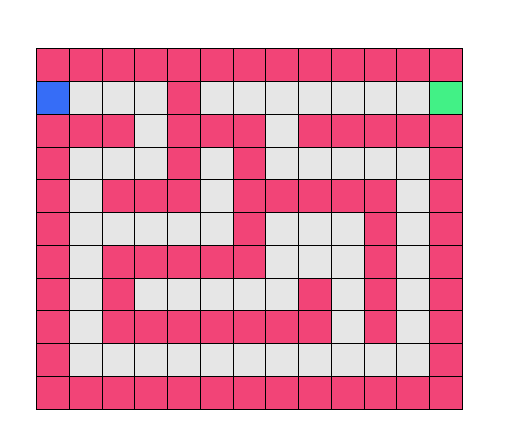

In [2]:
# import custom gridworld simulator 
from gridworld_lib import gridworld_enviro

# generate instance of gridworld
small_maze = gridworld_enviro.environment(world_size = 'small', world_type = 'maze')

# show the grid
small_maze.color_gridworld(lights = 'on')

## Applying Q-learning to the gridworld maze

In [4]:
# import q-learning module
from gridworld_lib import gridworld_qlearn

# create an instance of the q-learner
small_maze_qlearner = gridworld_qlearn.learner(gridworld = small_maze,action_method = 'random')

# run q-learning
small_maze_qlearner.train(verbose = False)

q-learning algorithm complete



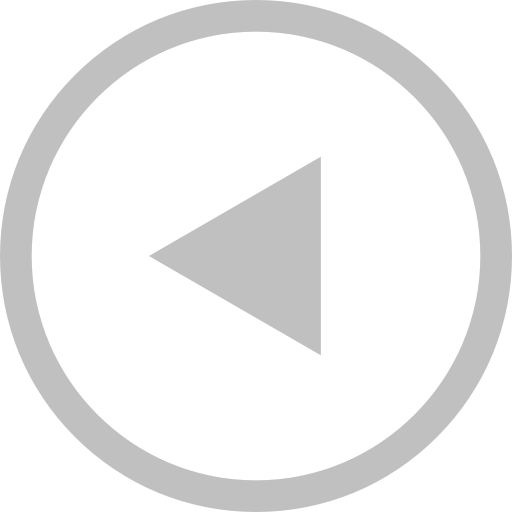
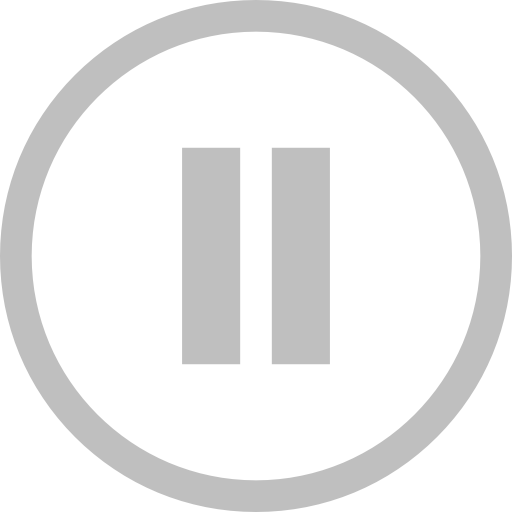
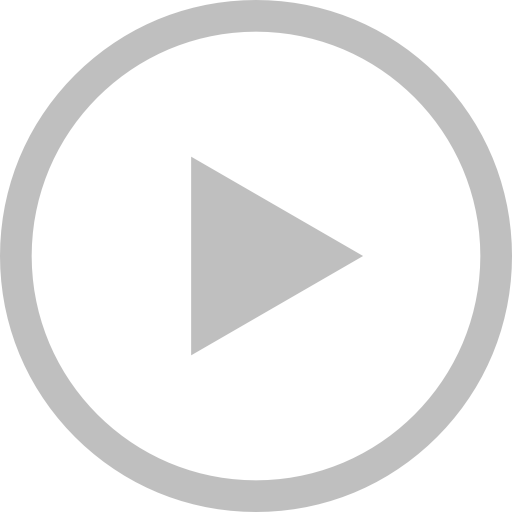
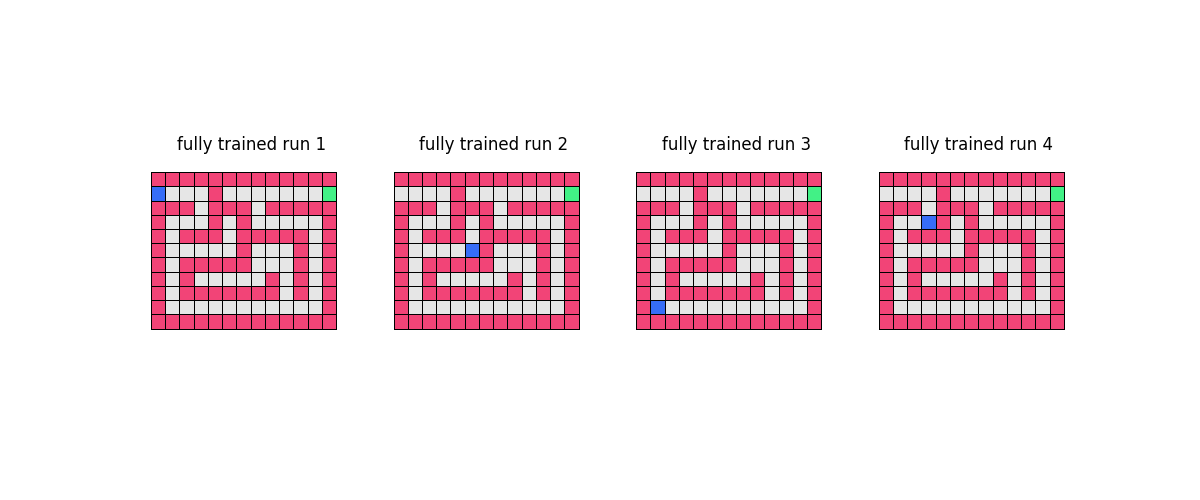
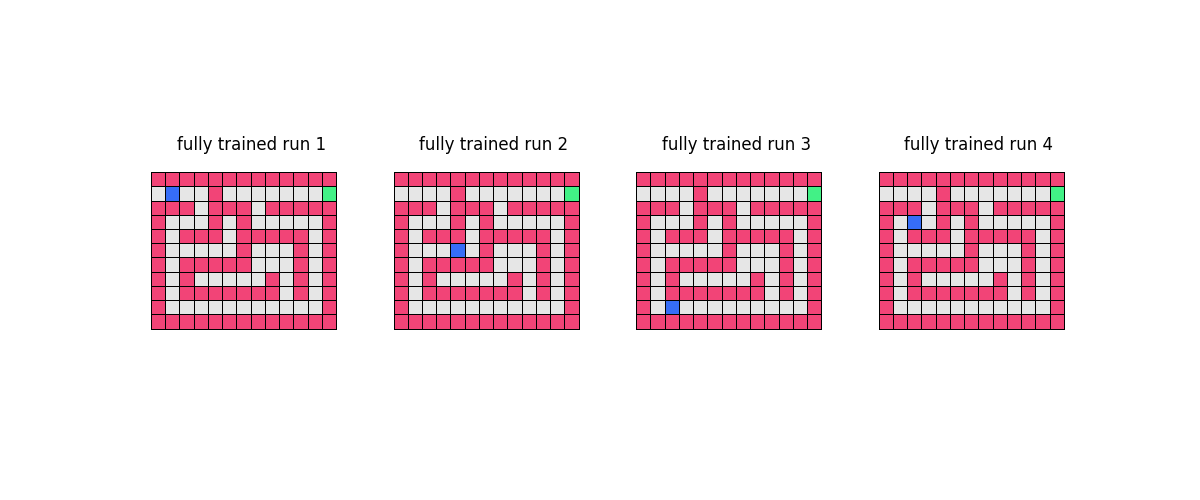
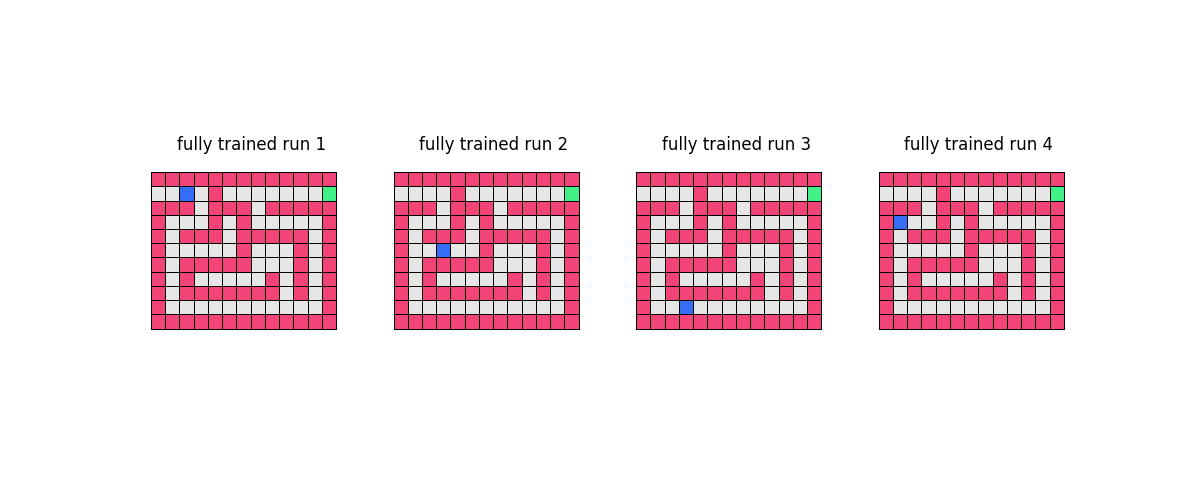
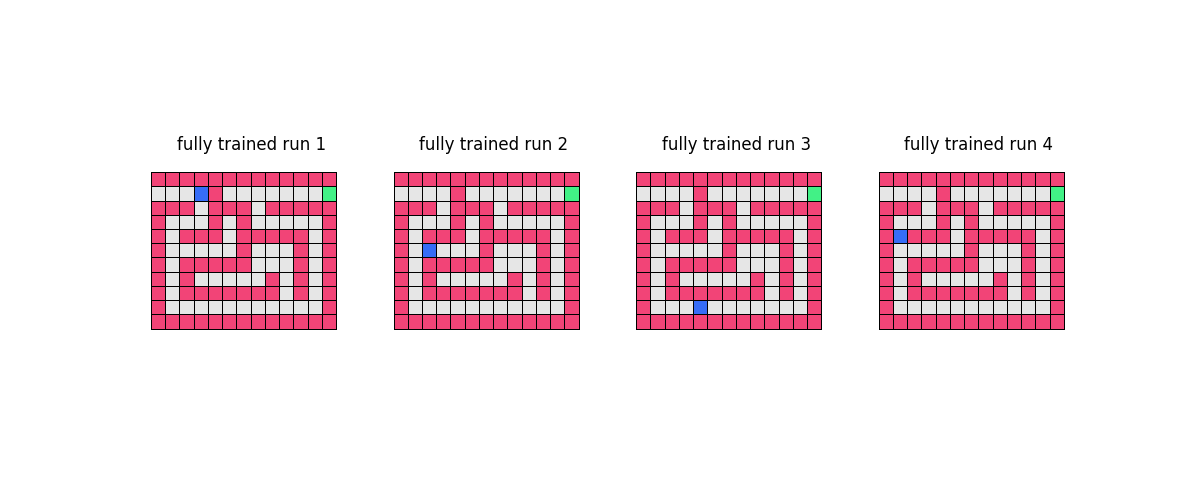
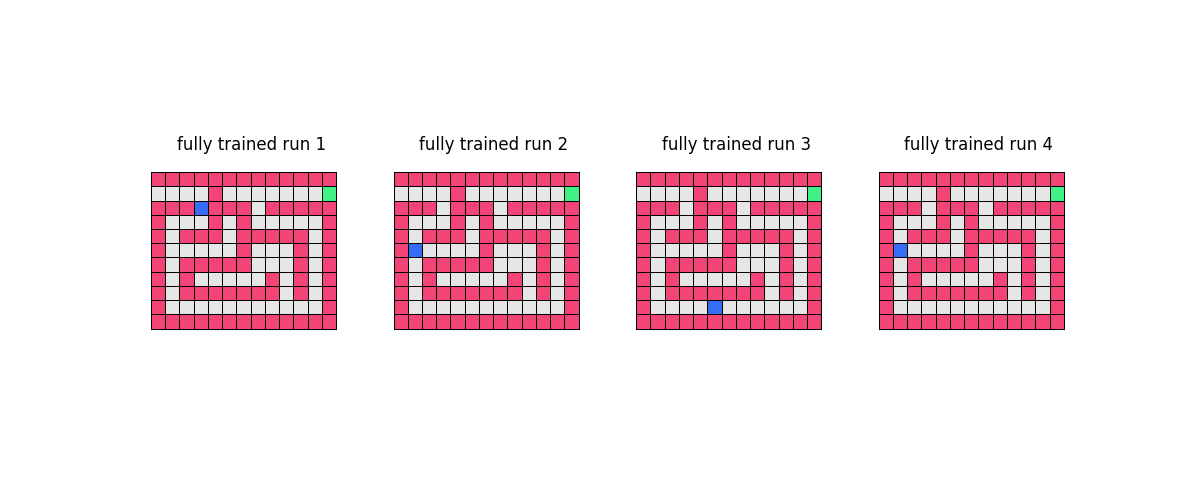
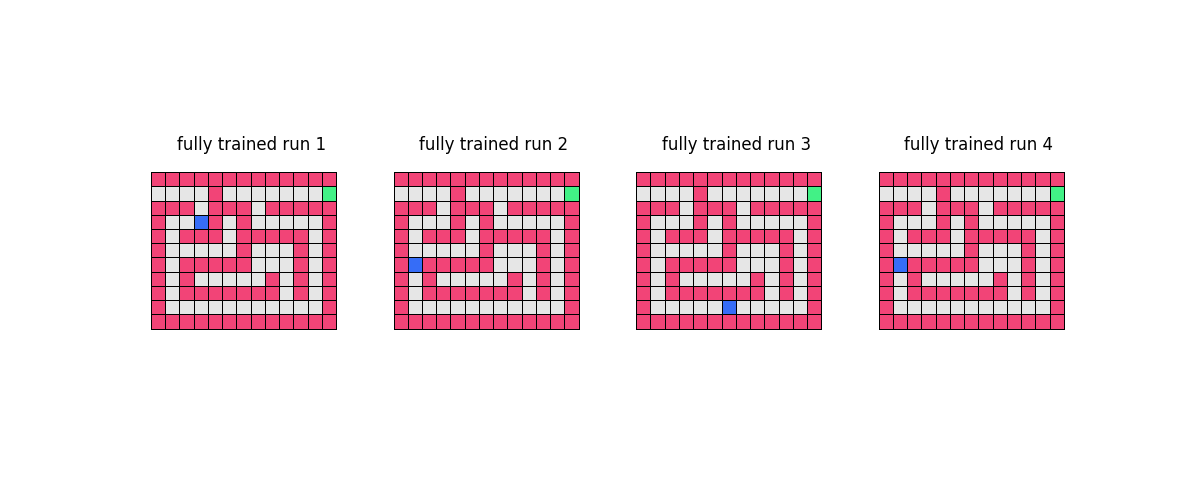
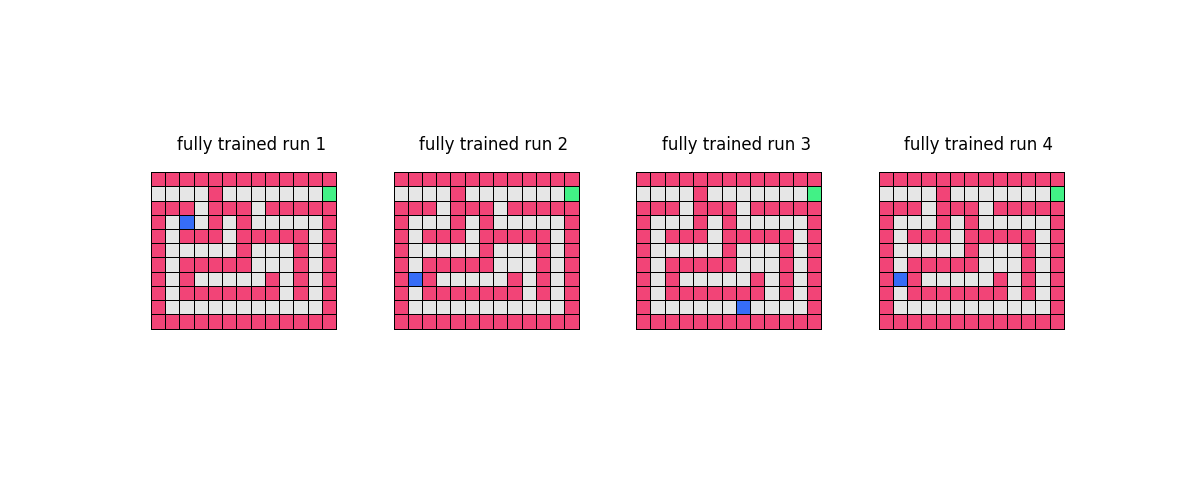
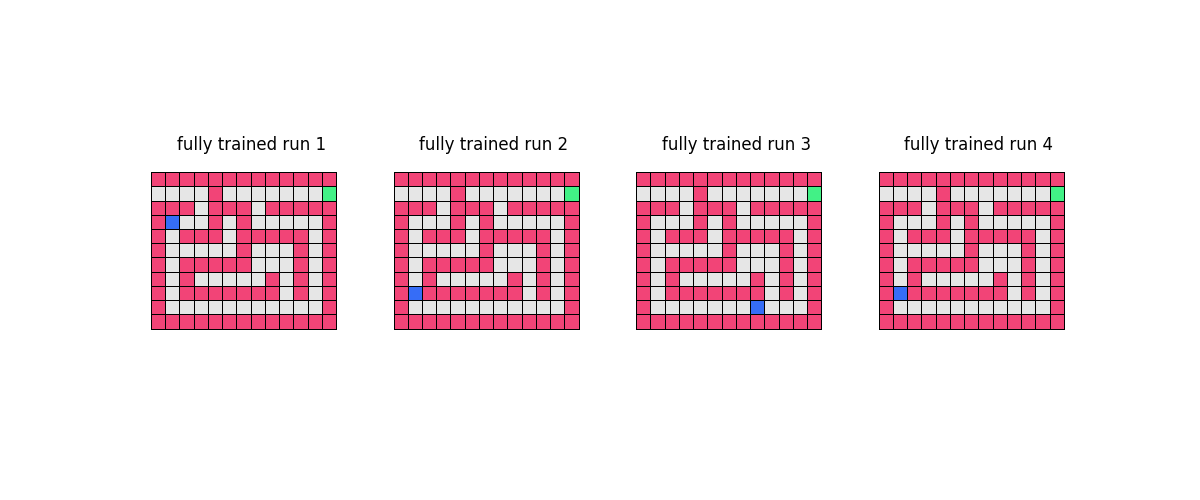
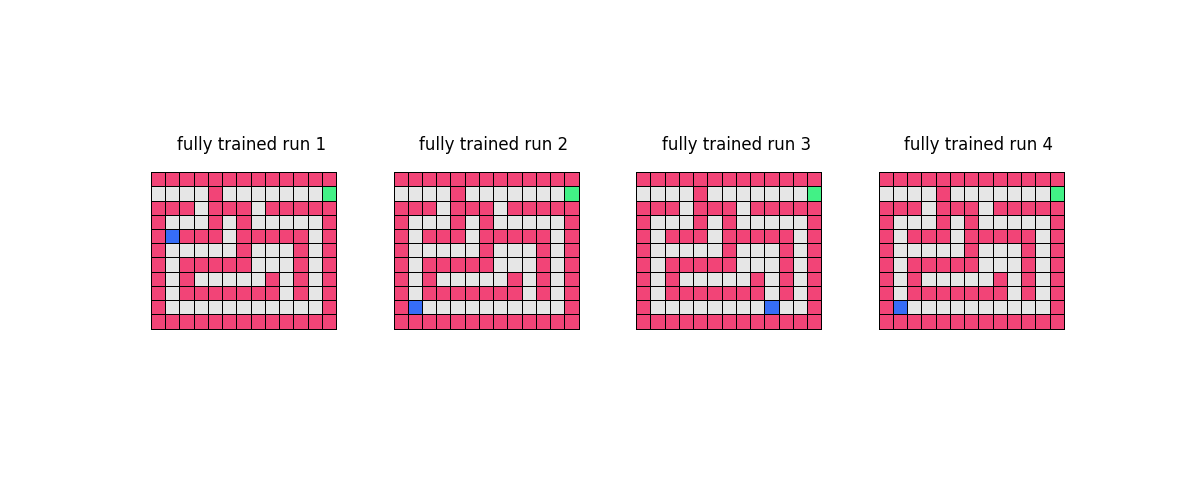
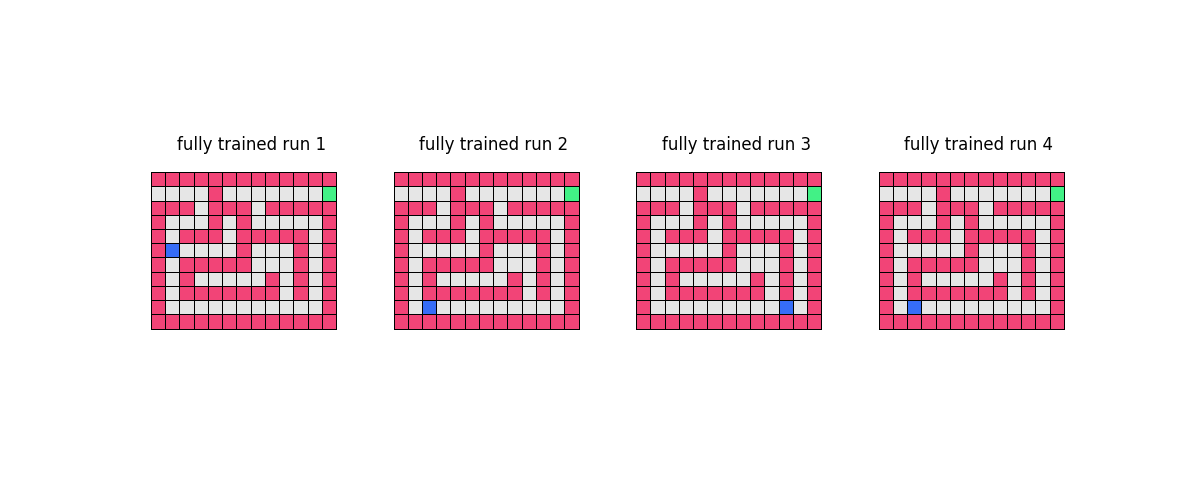
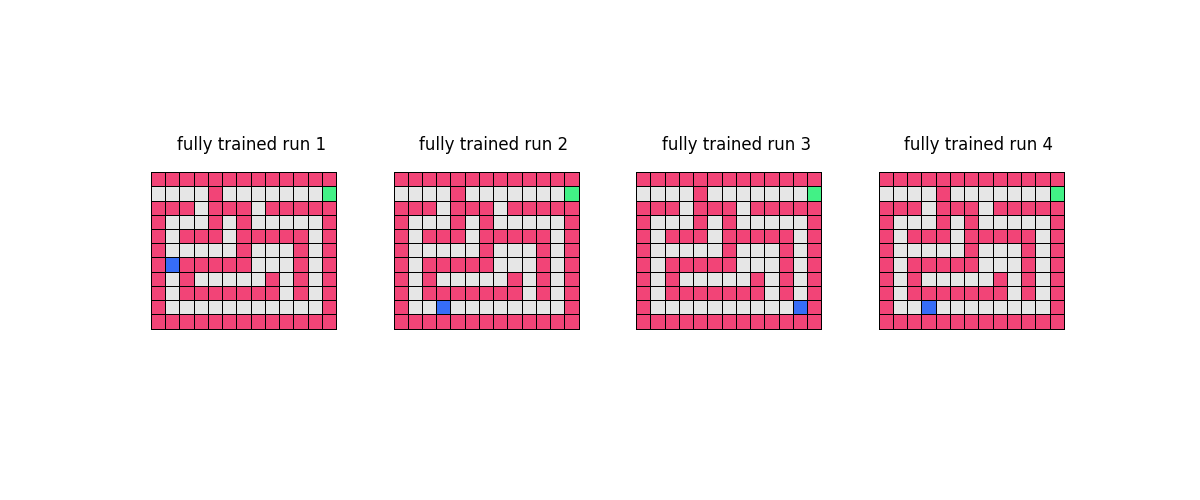
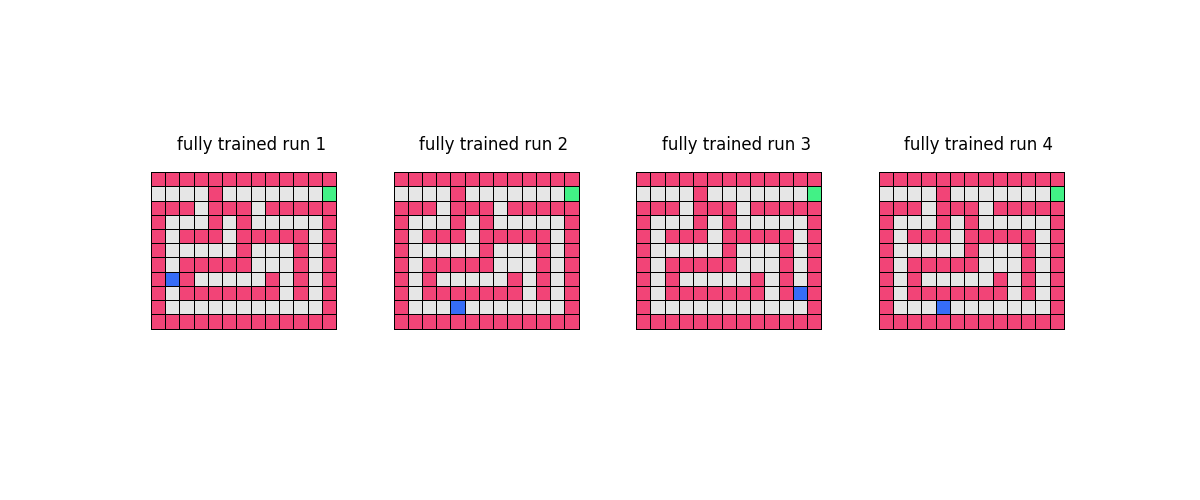
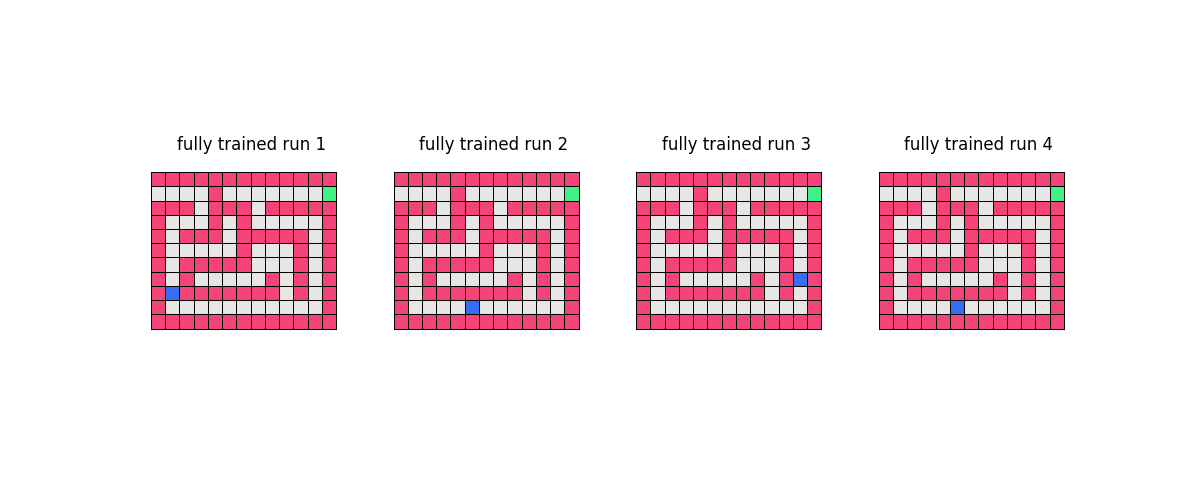
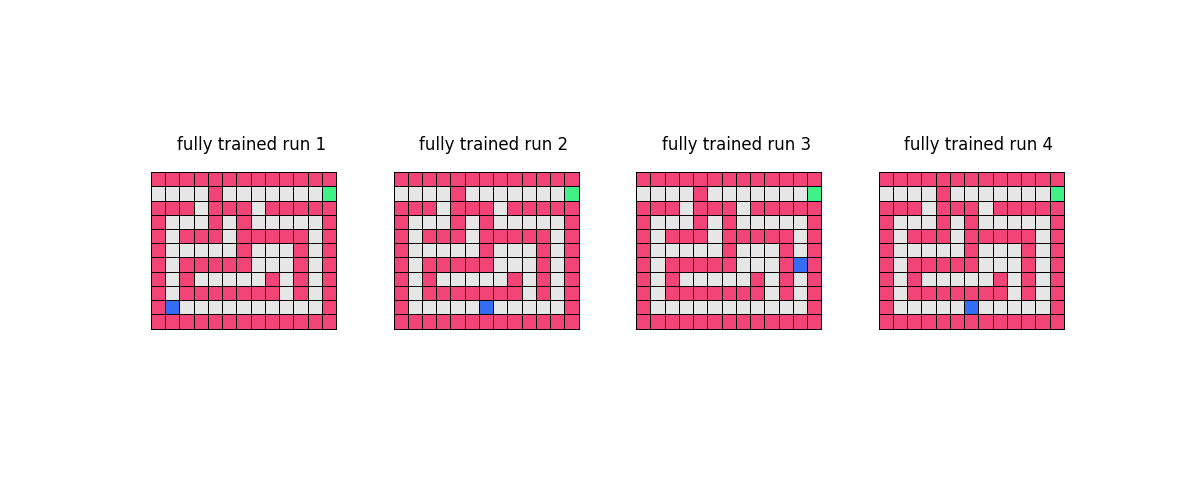
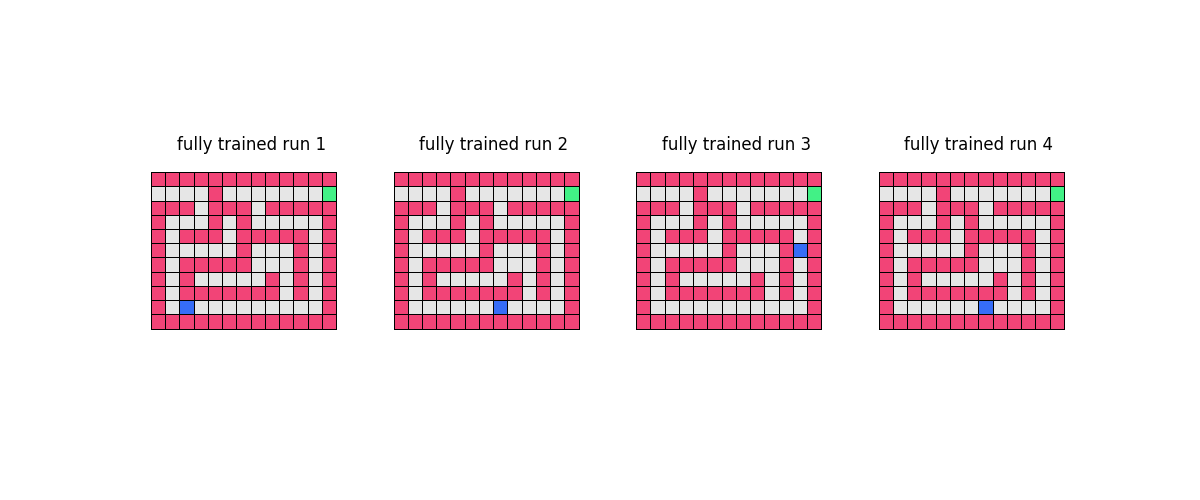
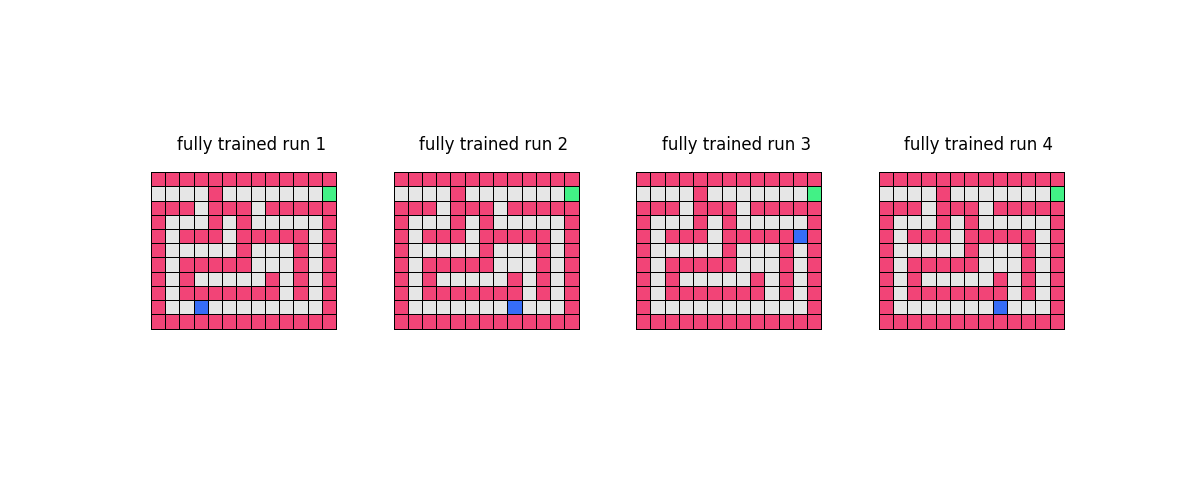
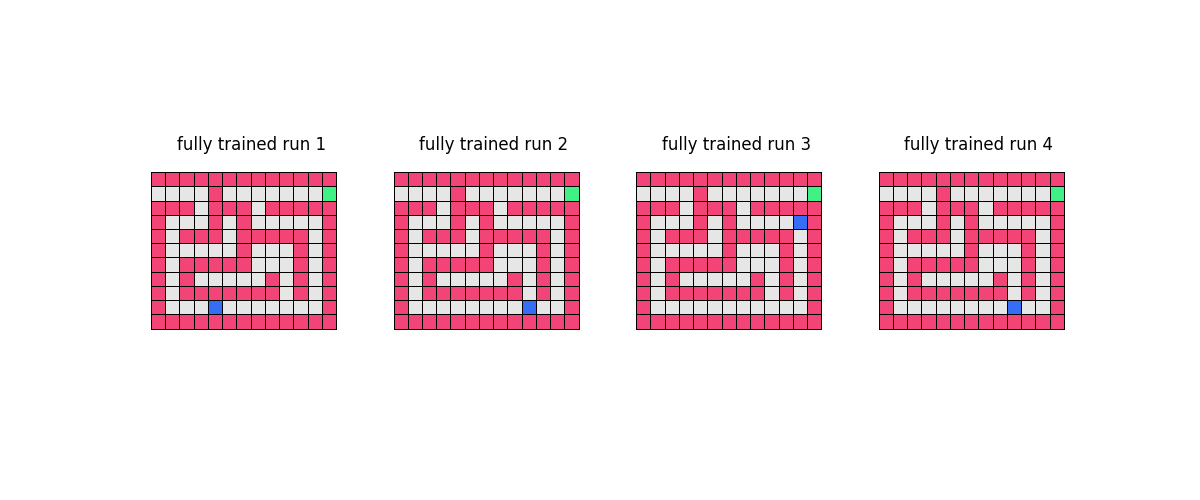
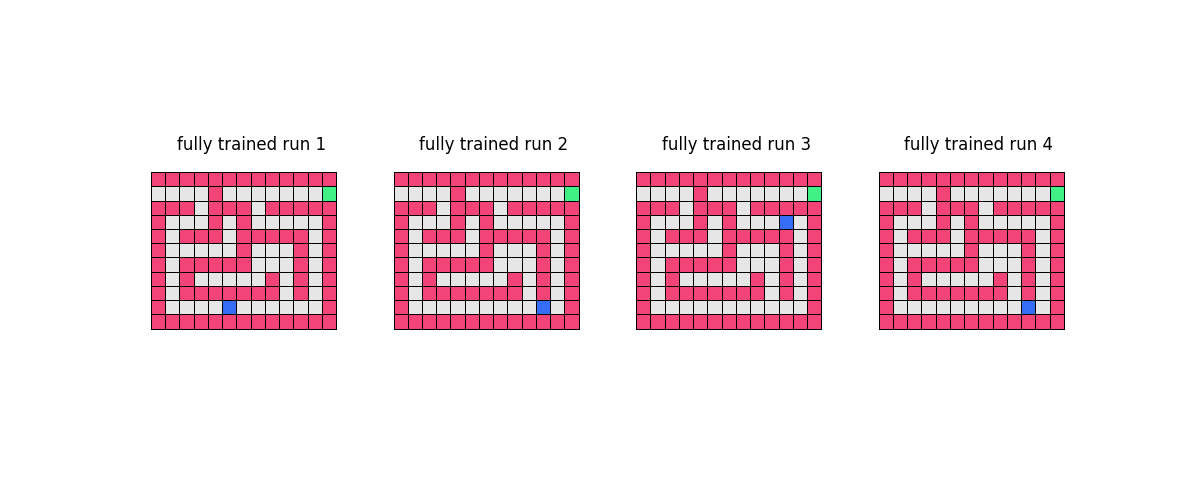
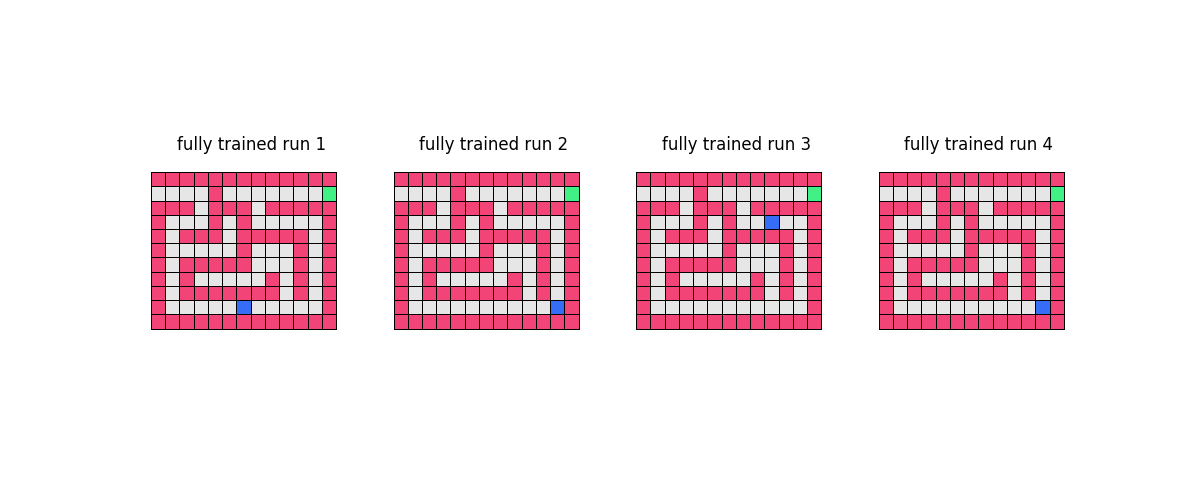
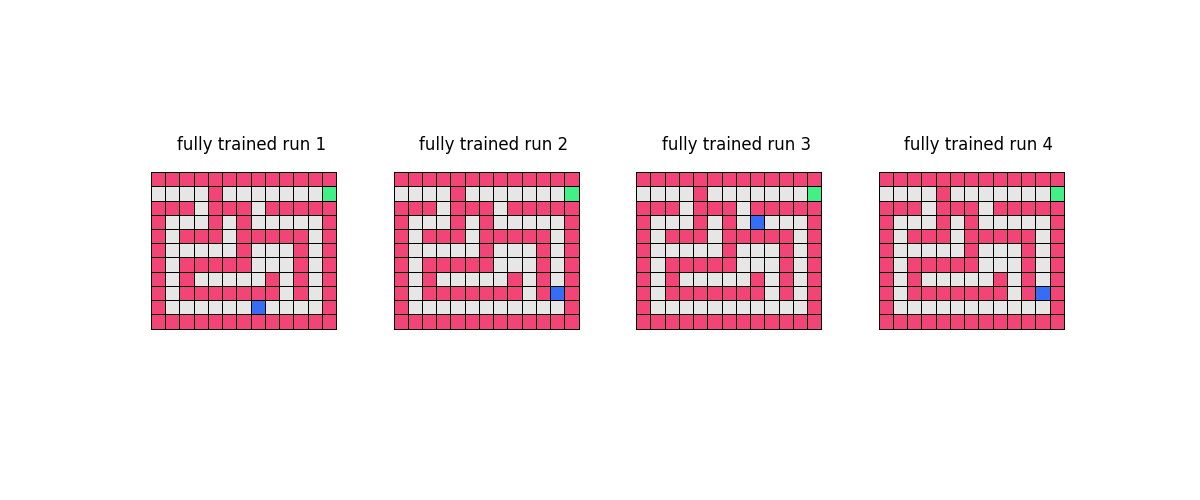
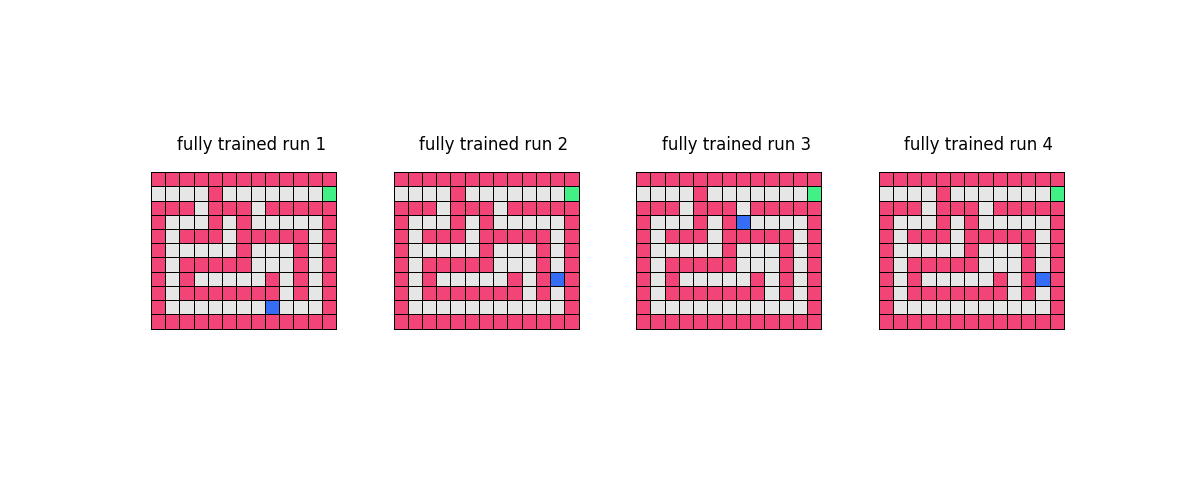
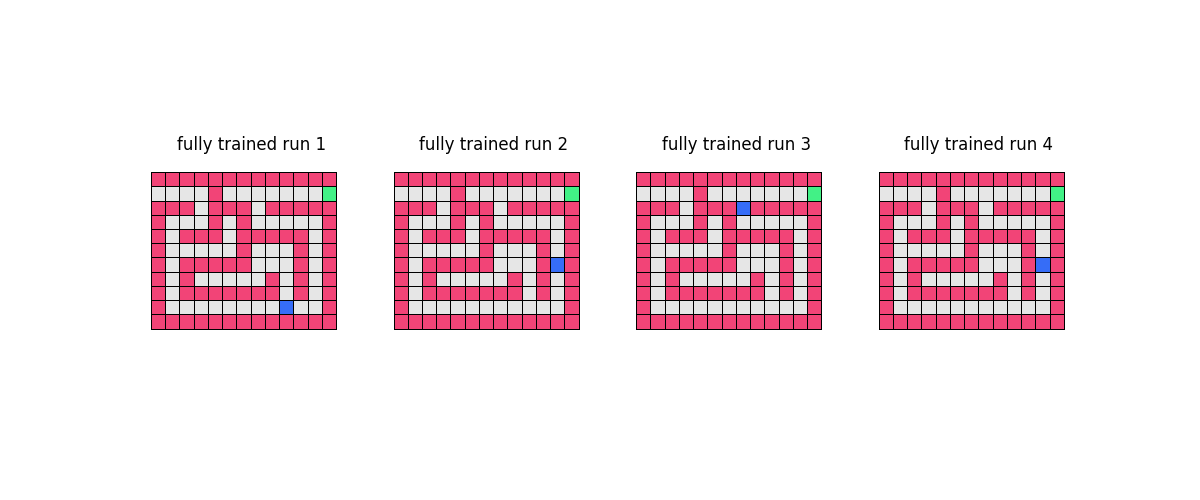
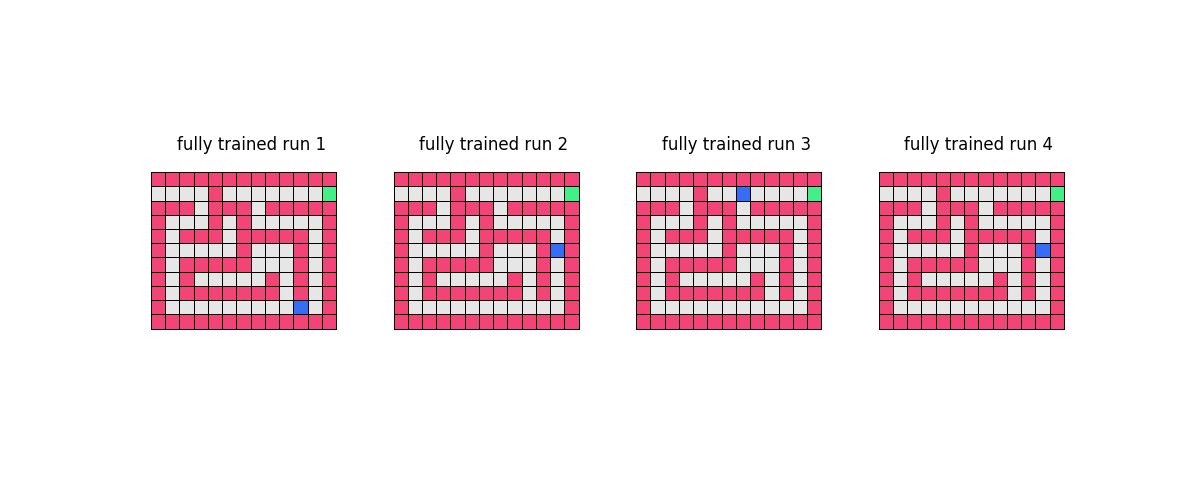
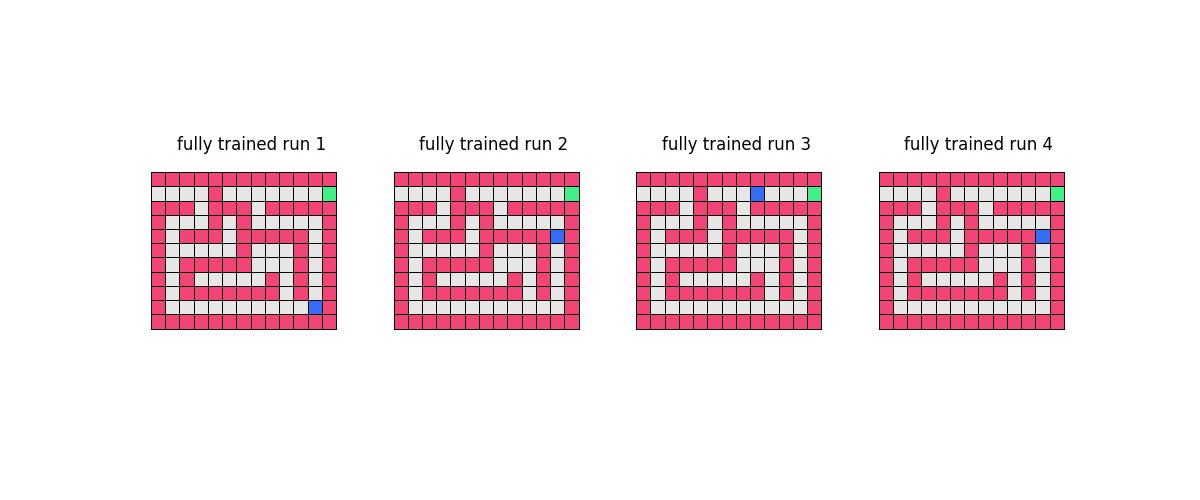
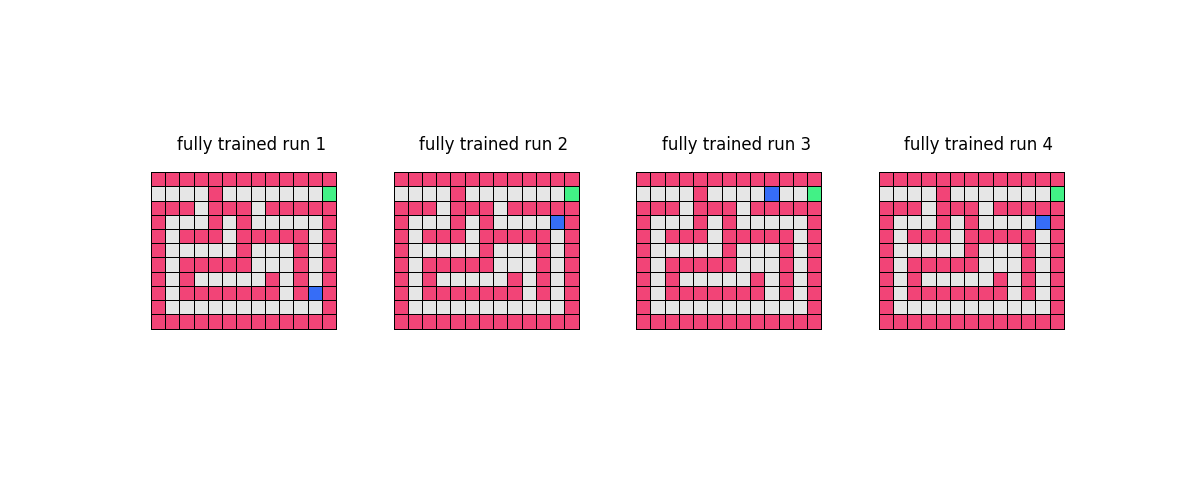
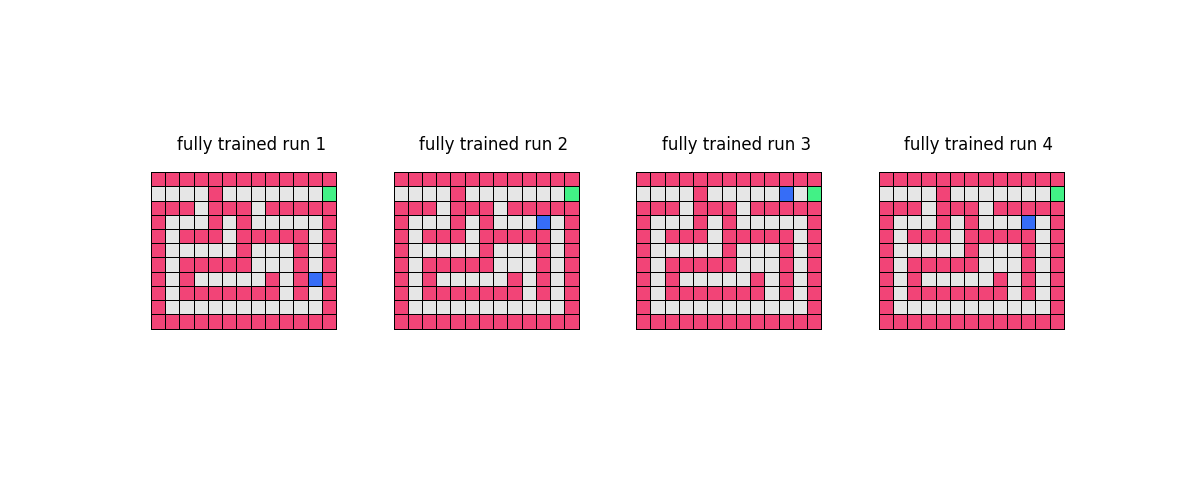
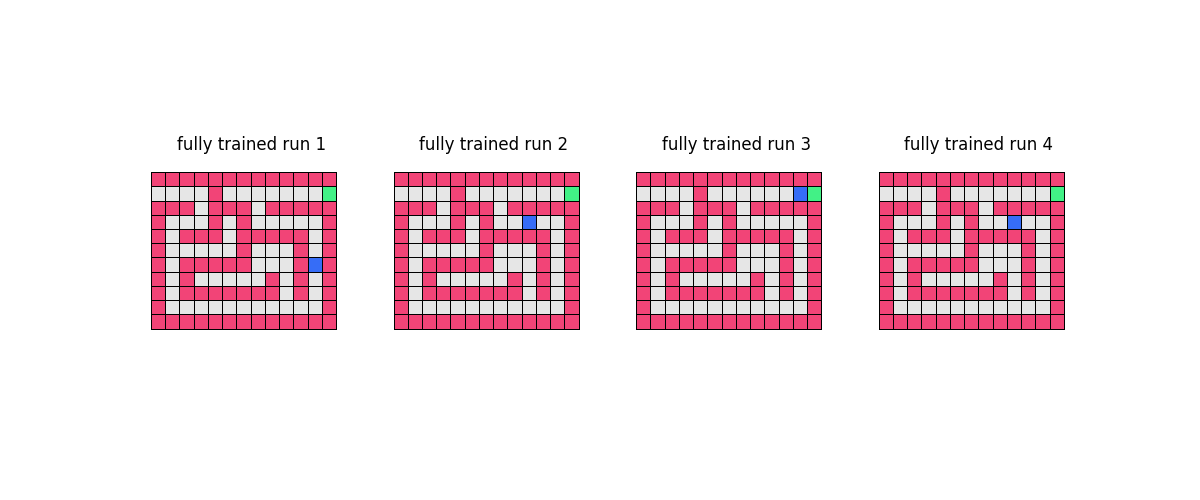
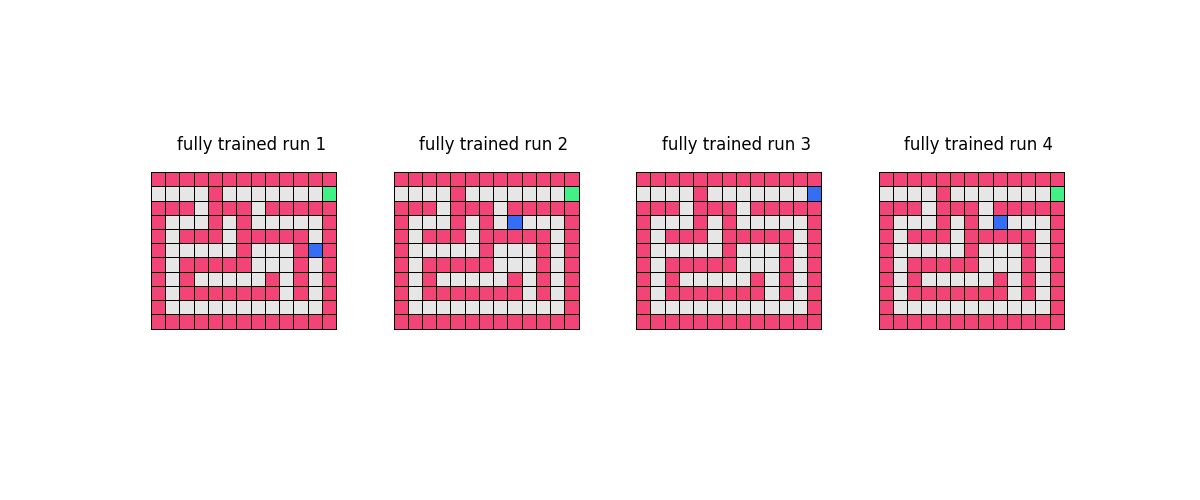
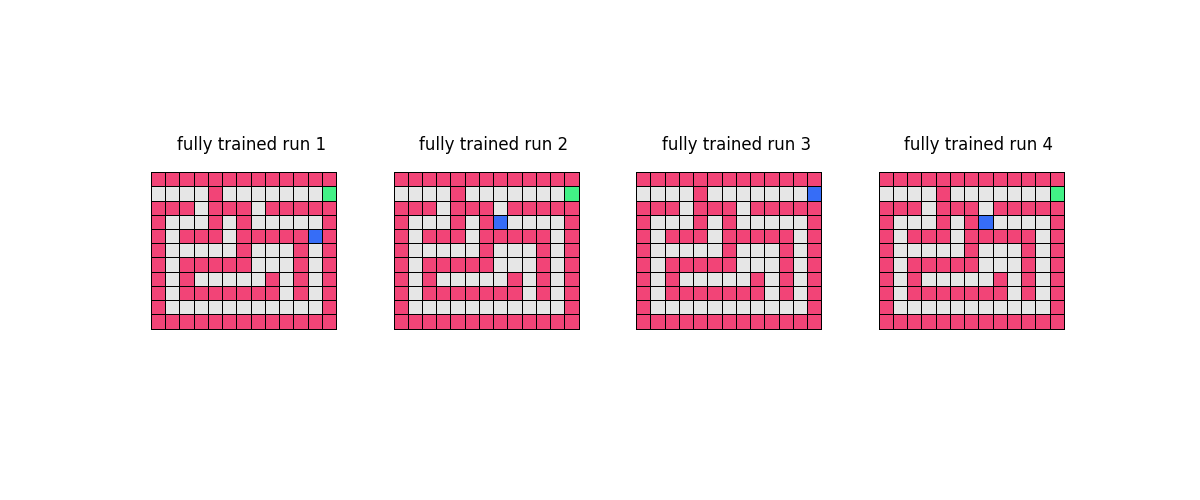
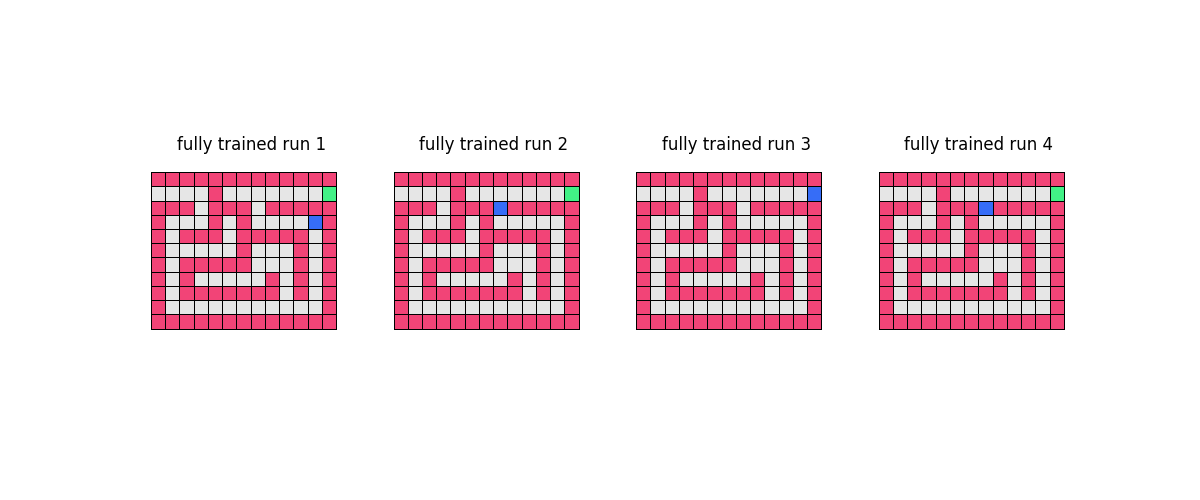
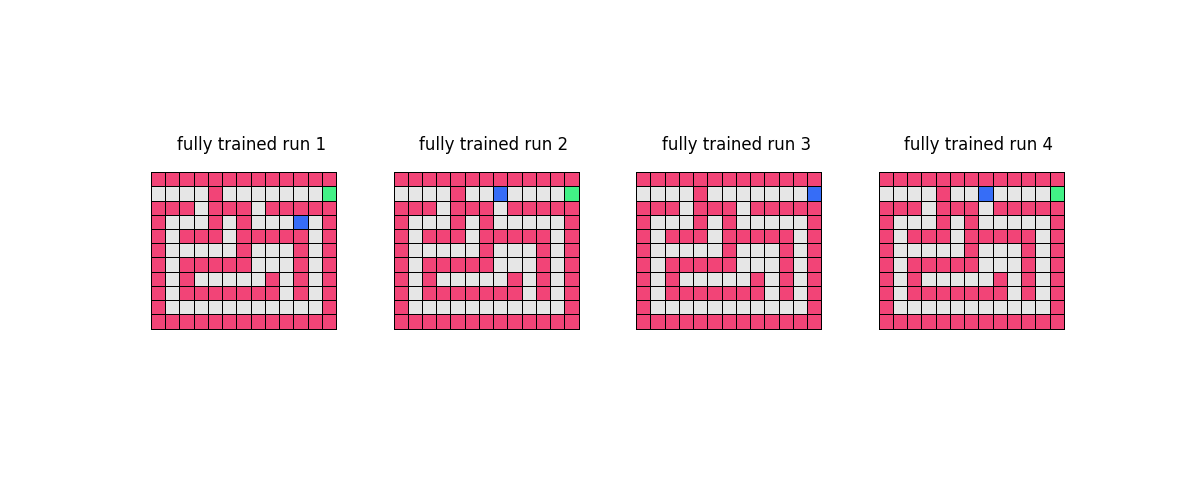
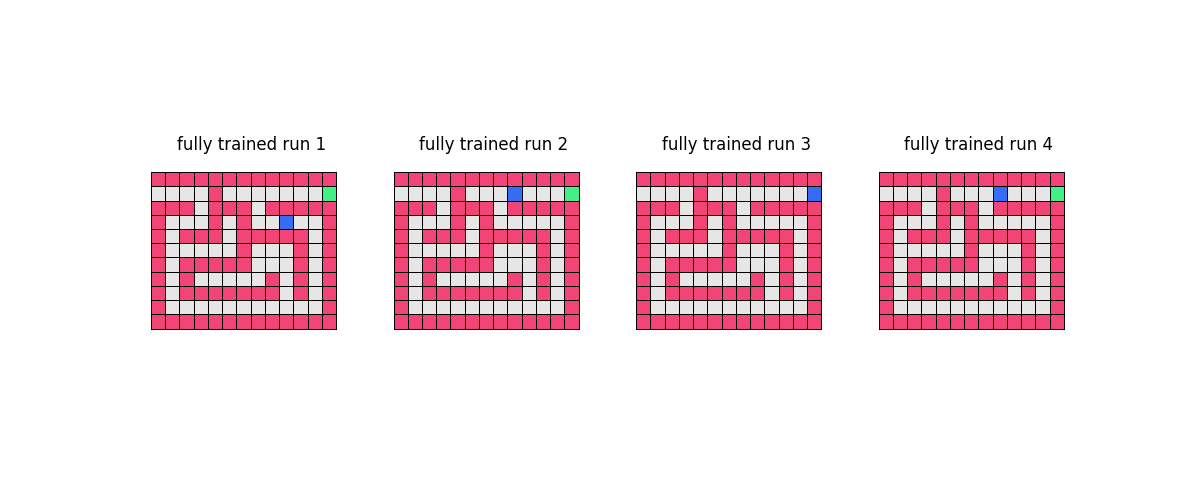
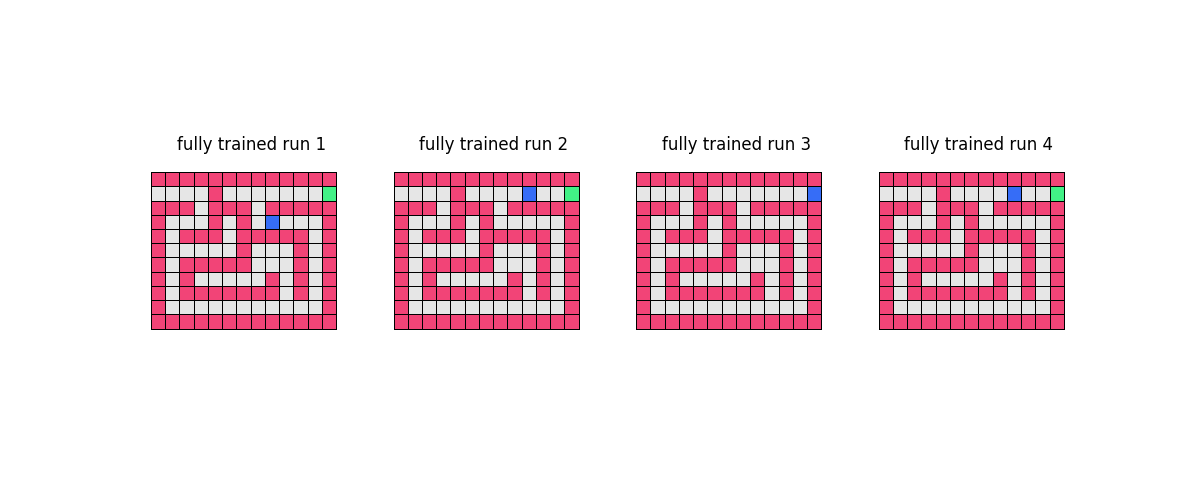
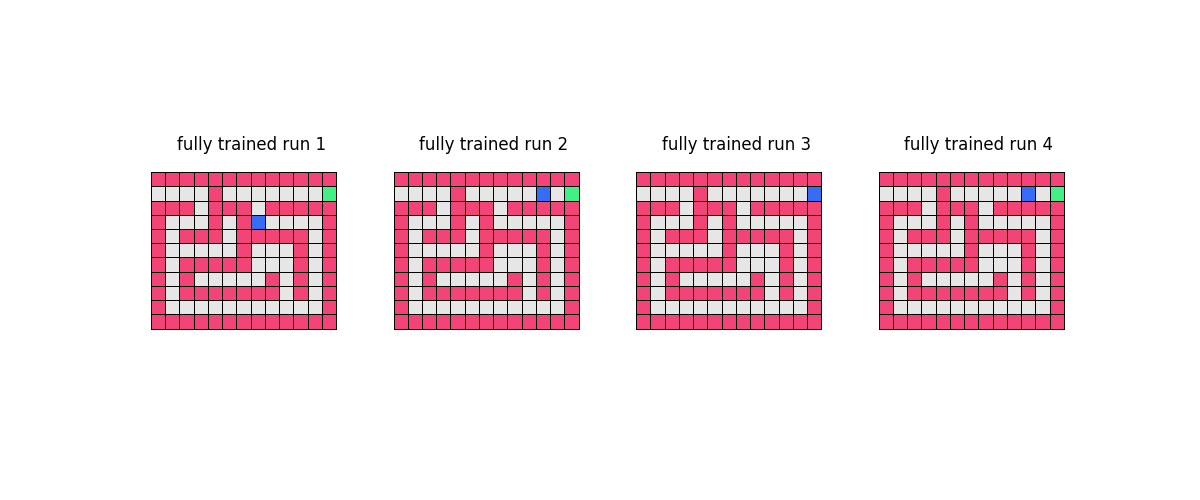
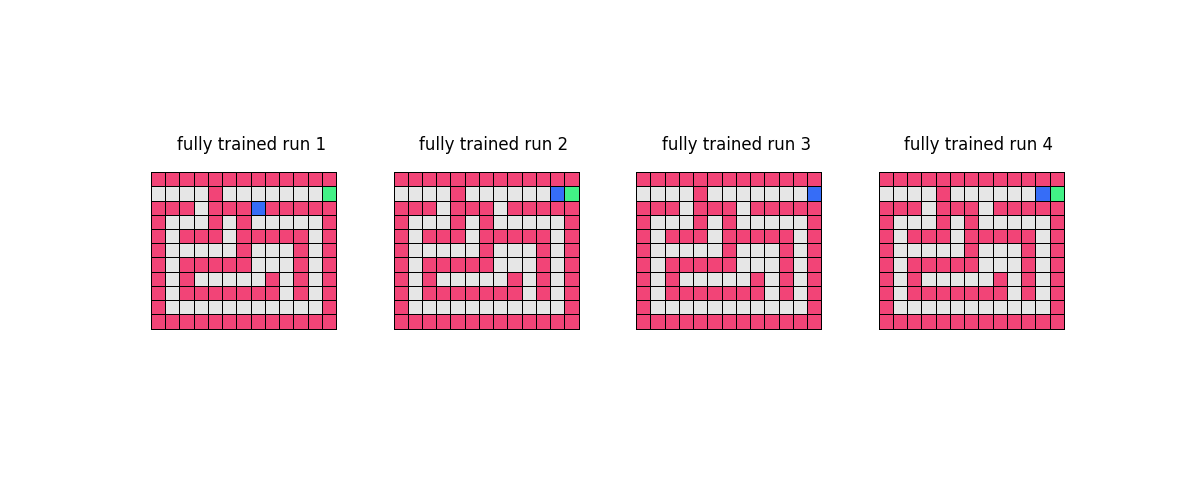
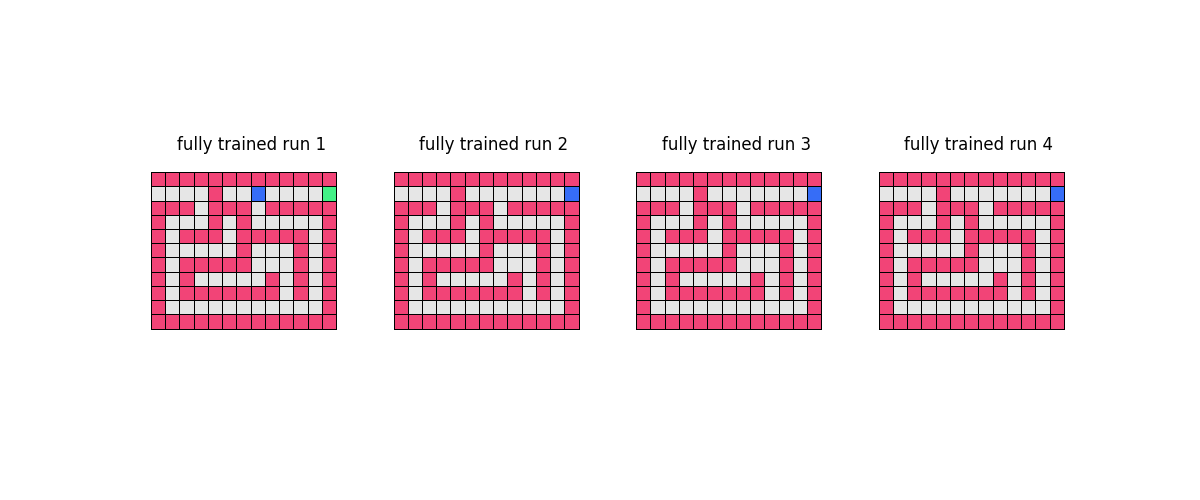
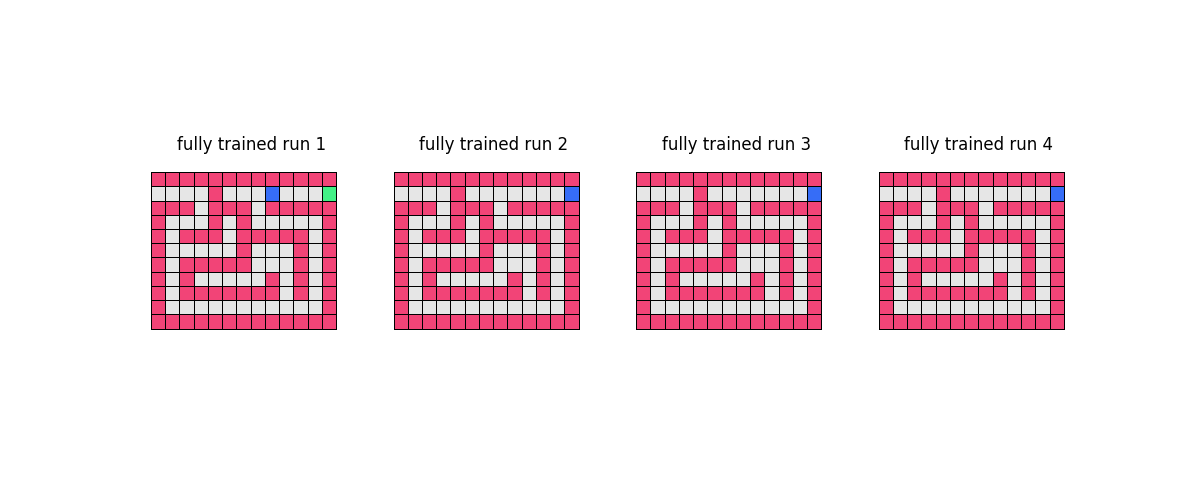
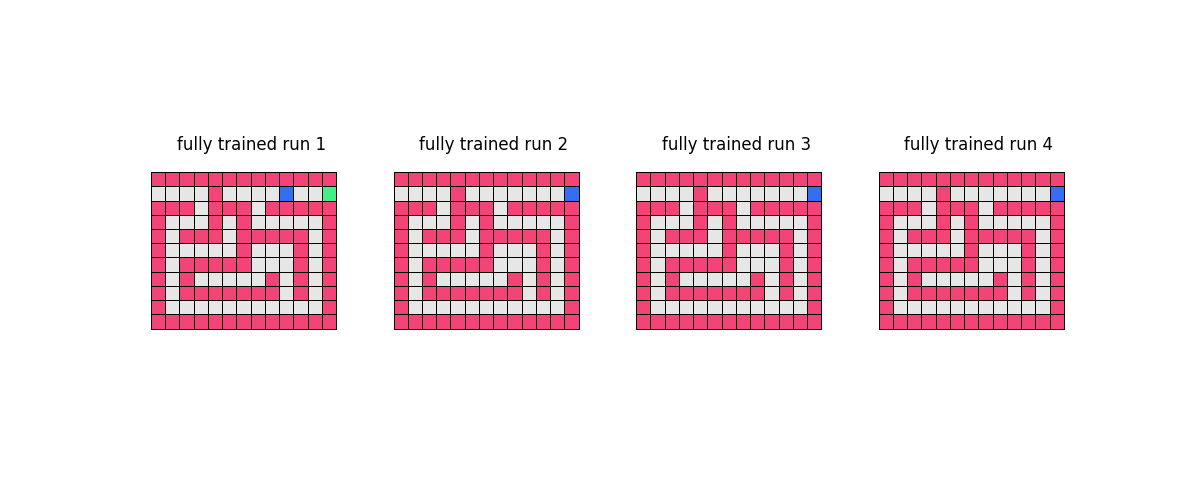
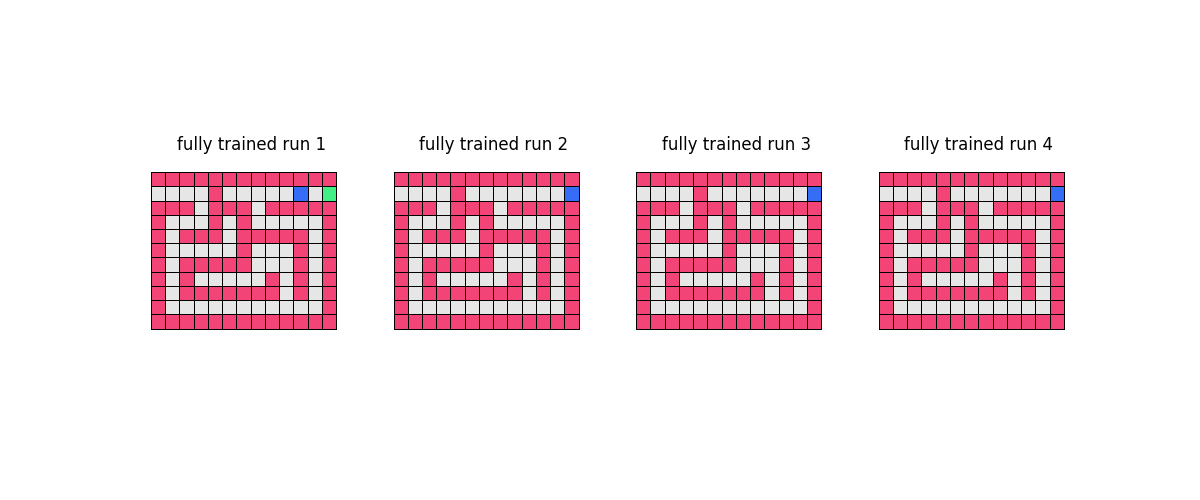
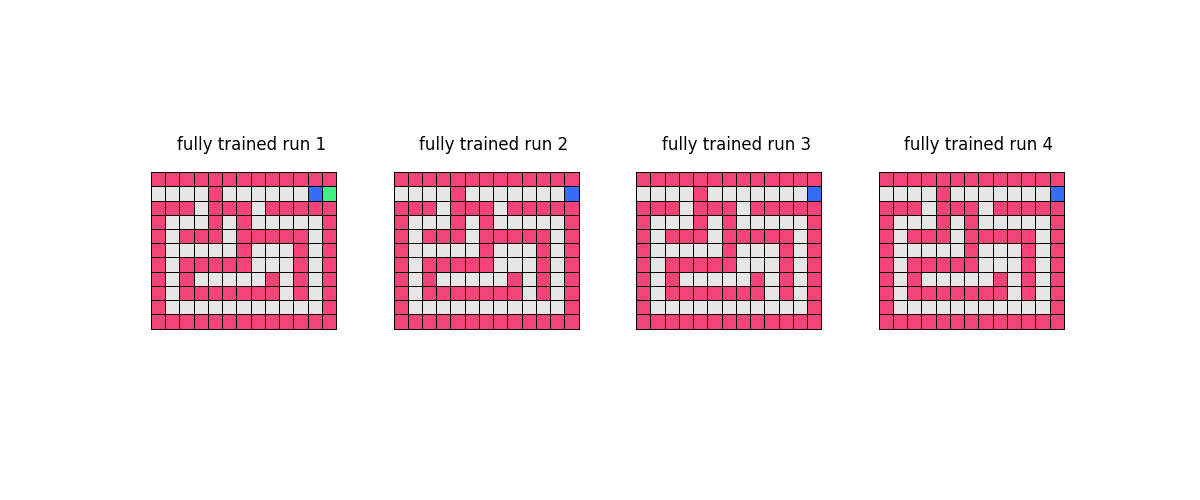
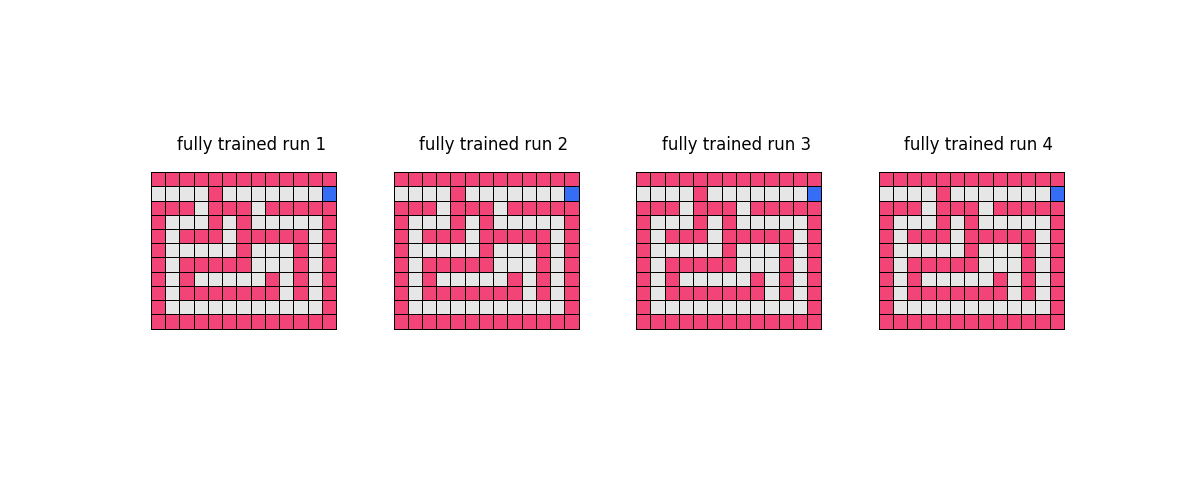

In [5]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

# animate a fully trained agent 
locs = [[9,0],[5,5],[1,1],[7,3]]
animator.animate_validation_runs(gridworld = small_maze,learner = small_maze_qlearner,starting_locations = locs)

# How generalizable is a trained agent?

## How generalizable is a trained agent?

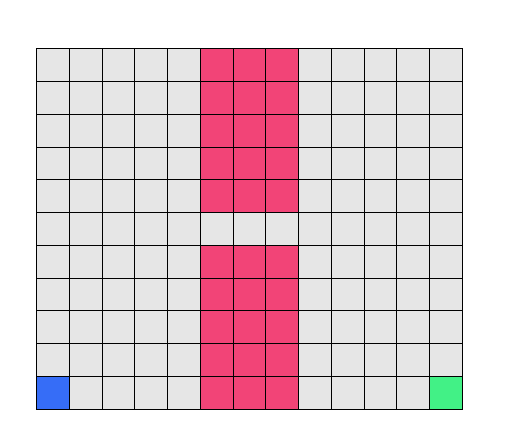

In [7]:
# import custom gridworld simulator 
from gridworld_lib import gridworld_enviro

# generate instance of gridworld
small_moat = gridworld_enviro.environment(world_size = 'small', world_type = 'moat')

# show the enviroment
small_moat.color_gridworld()


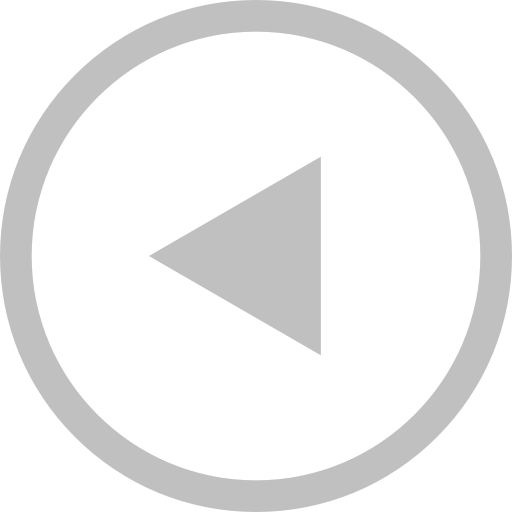
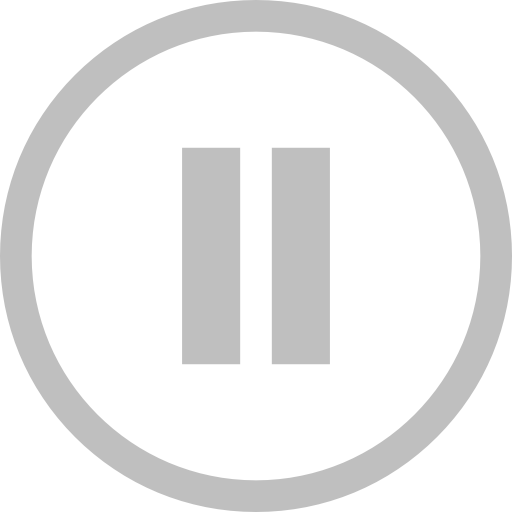
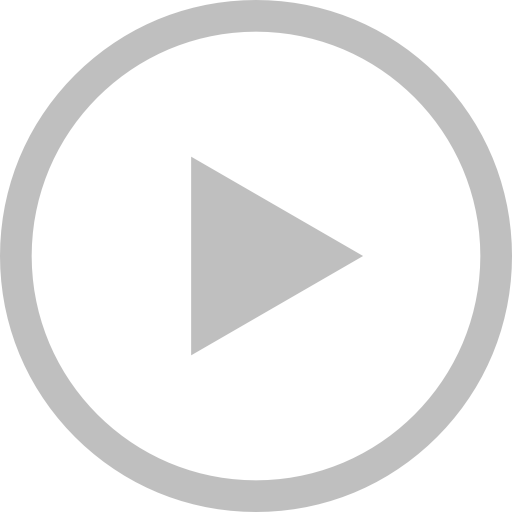
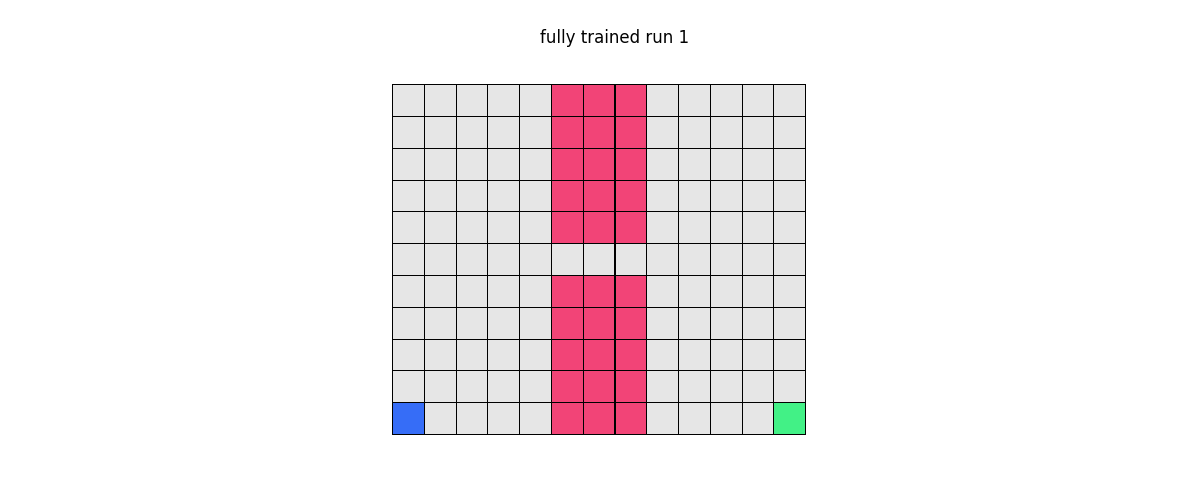
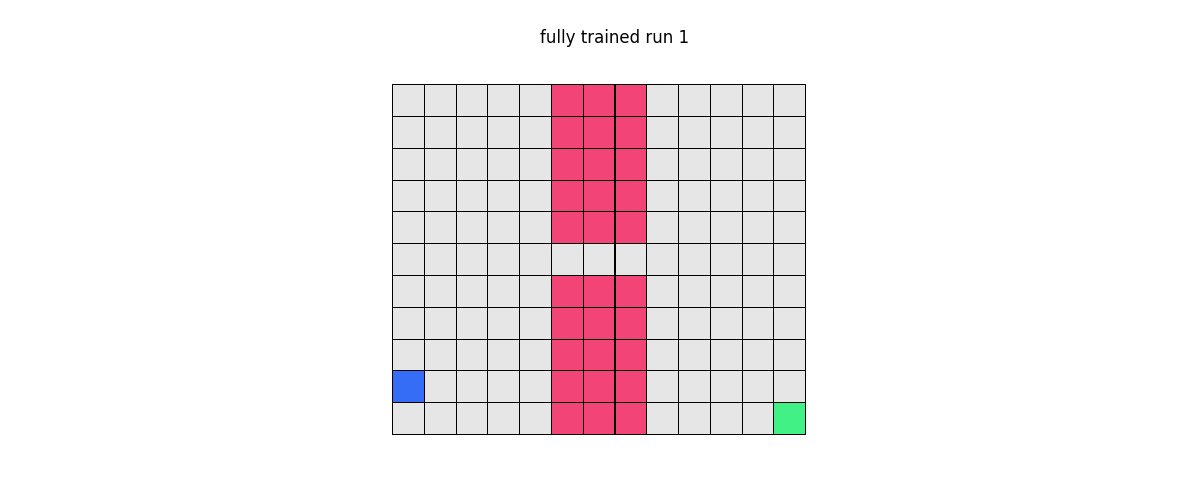
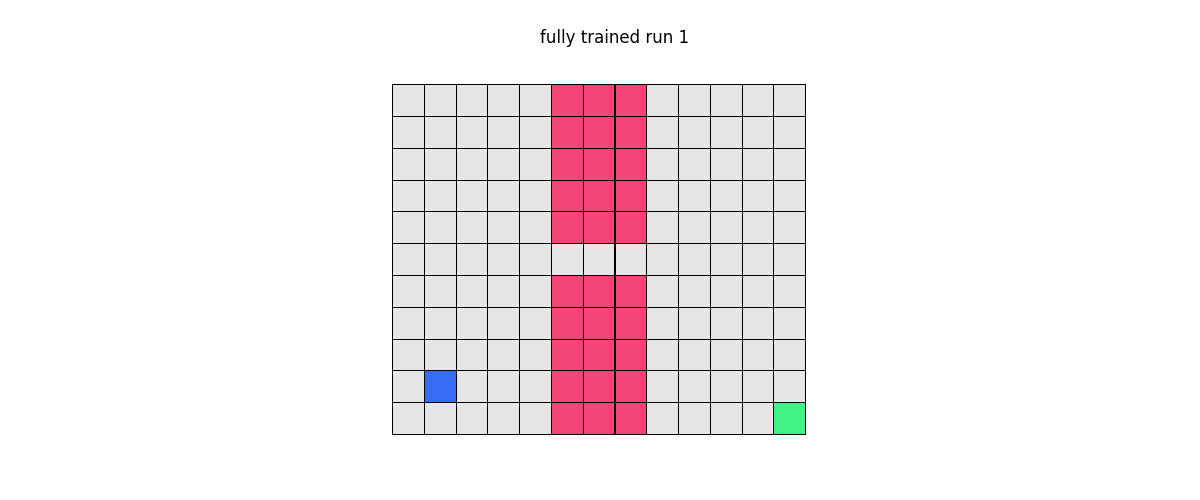
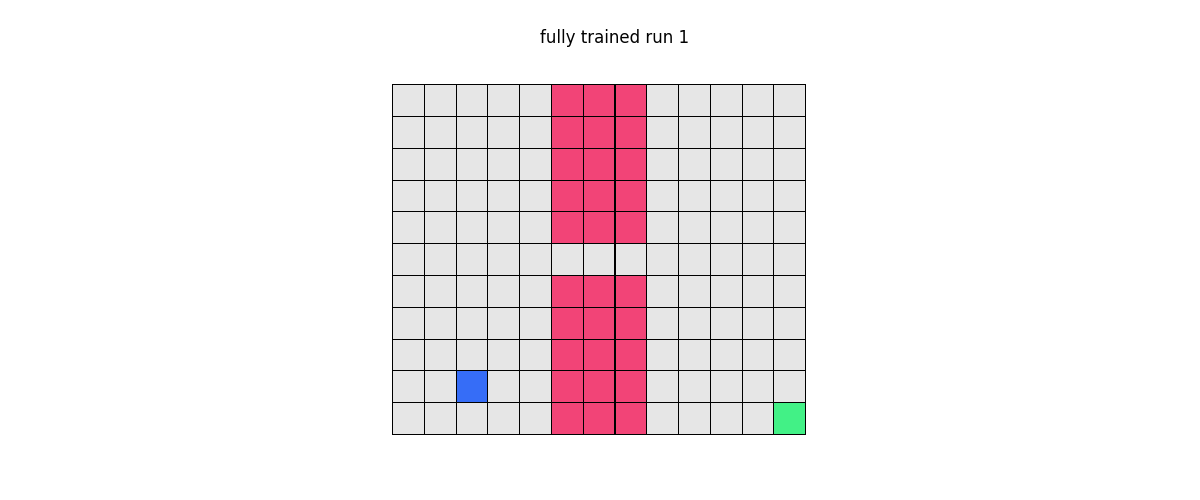
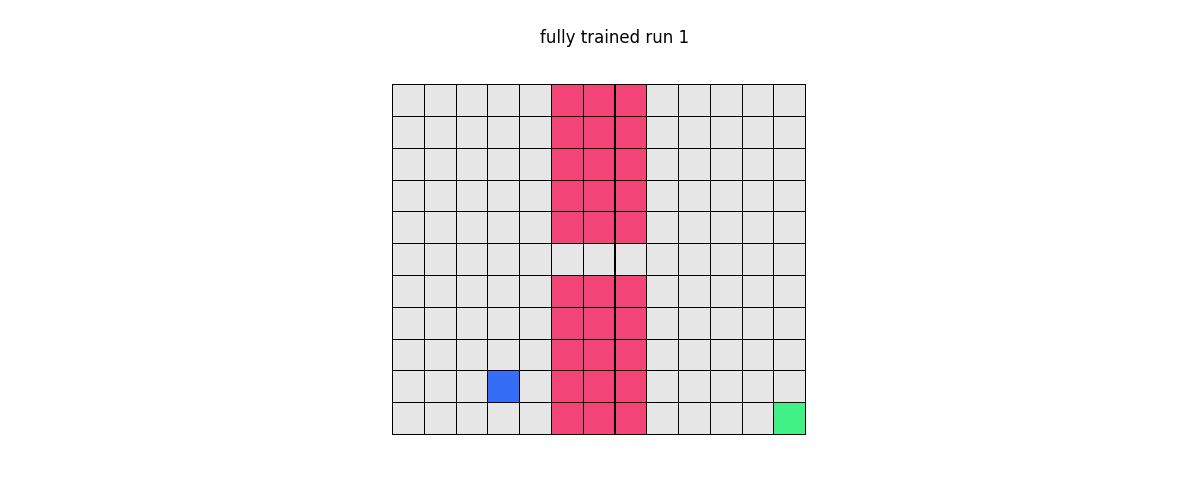
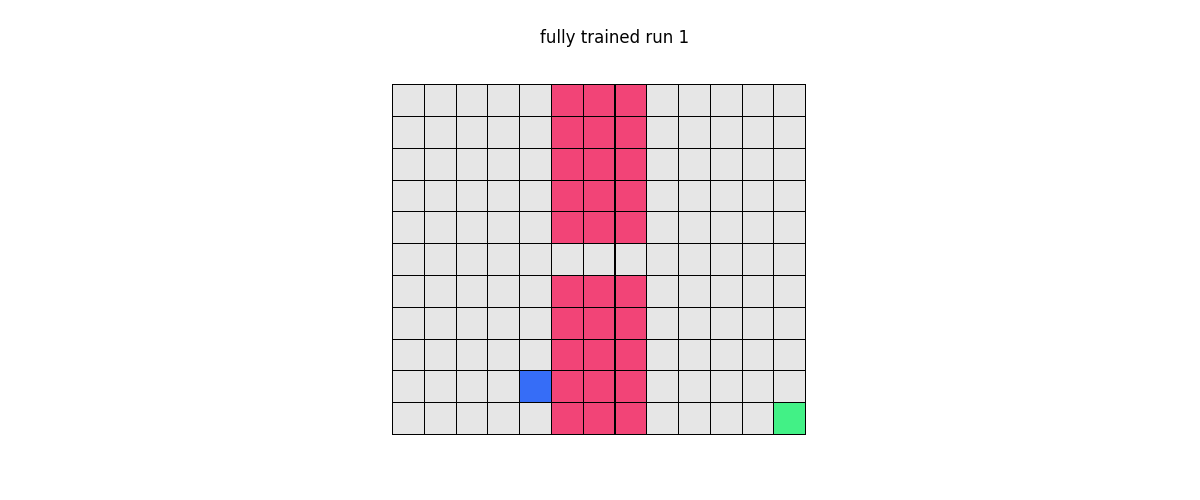
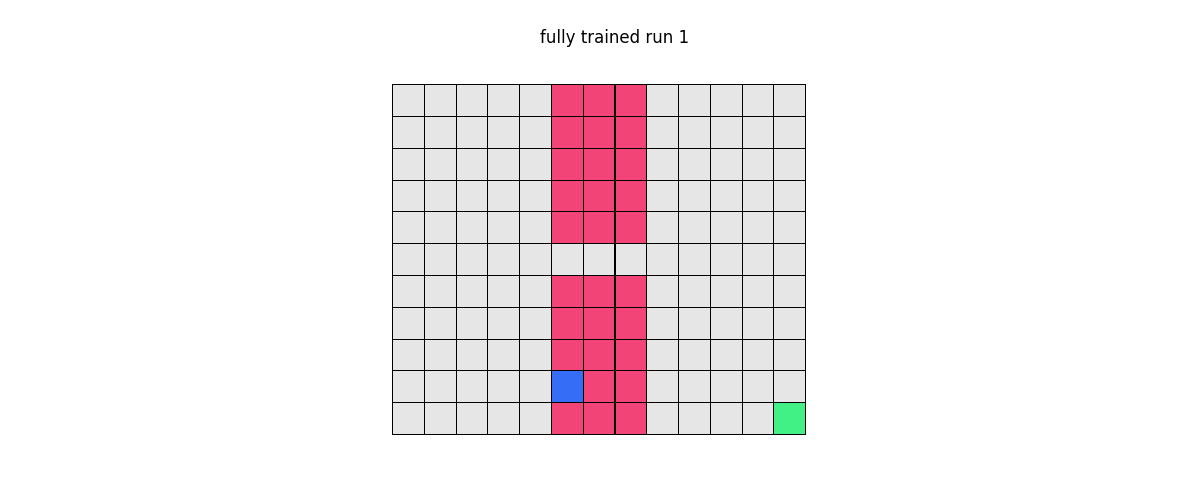
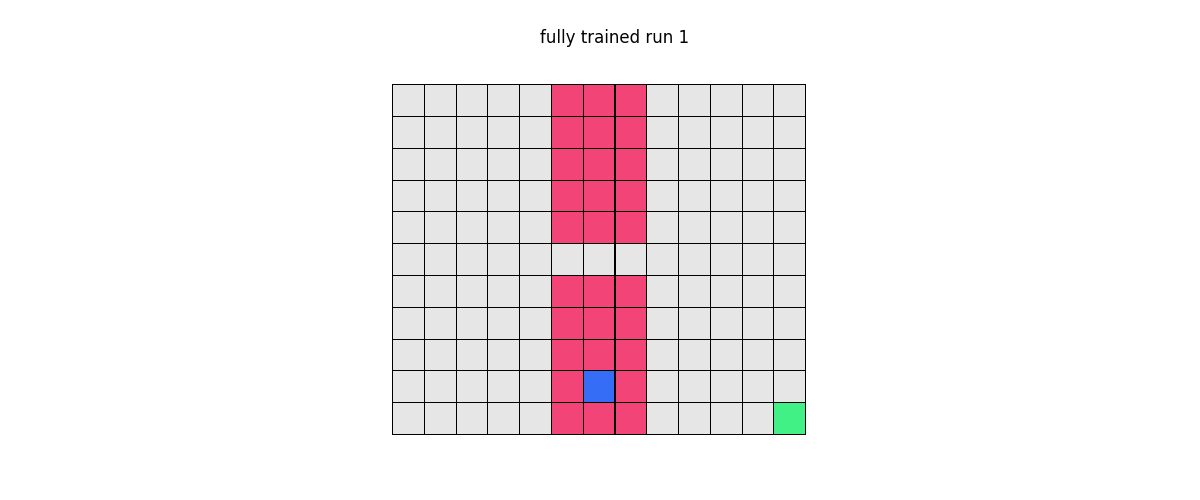
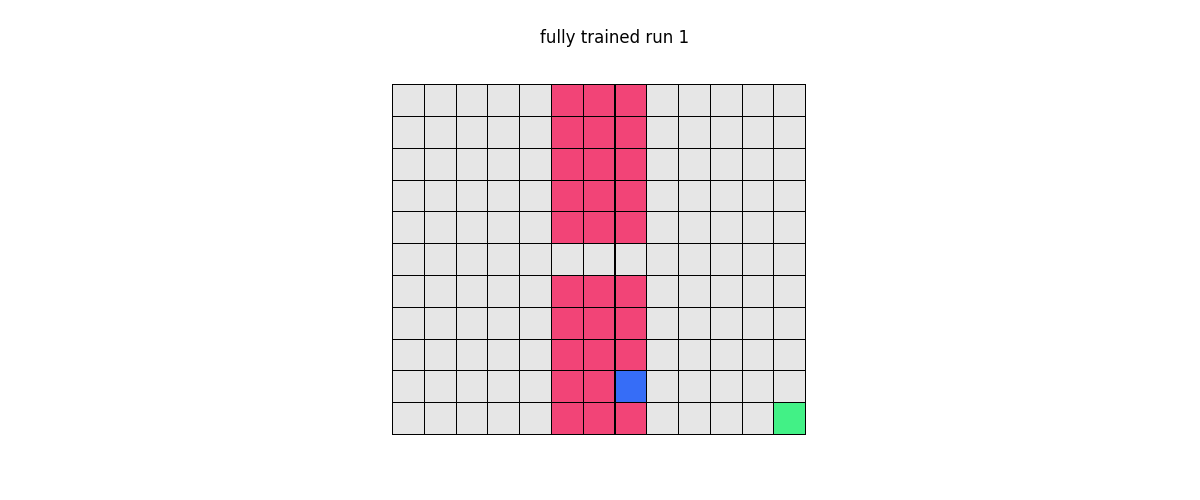
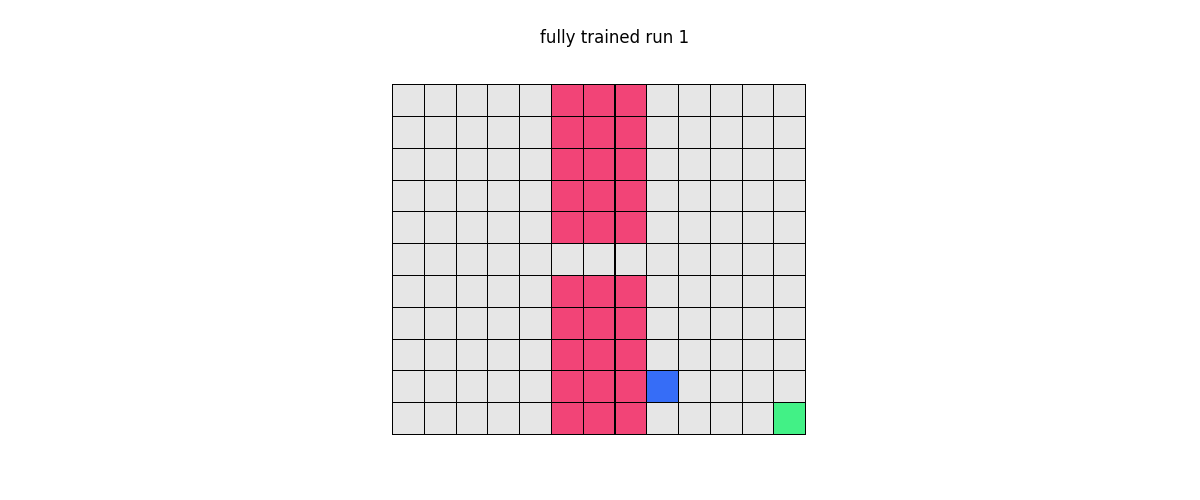
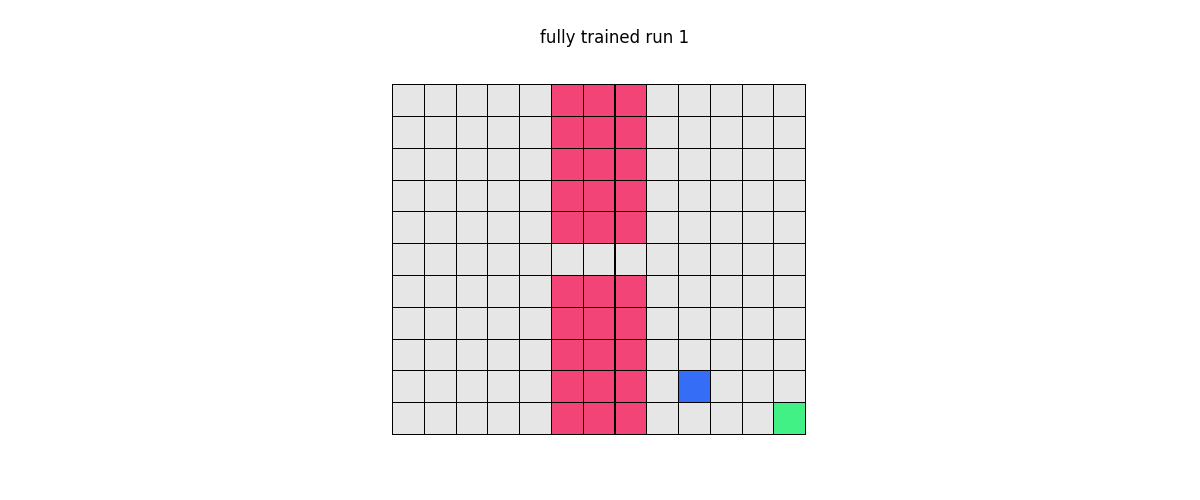
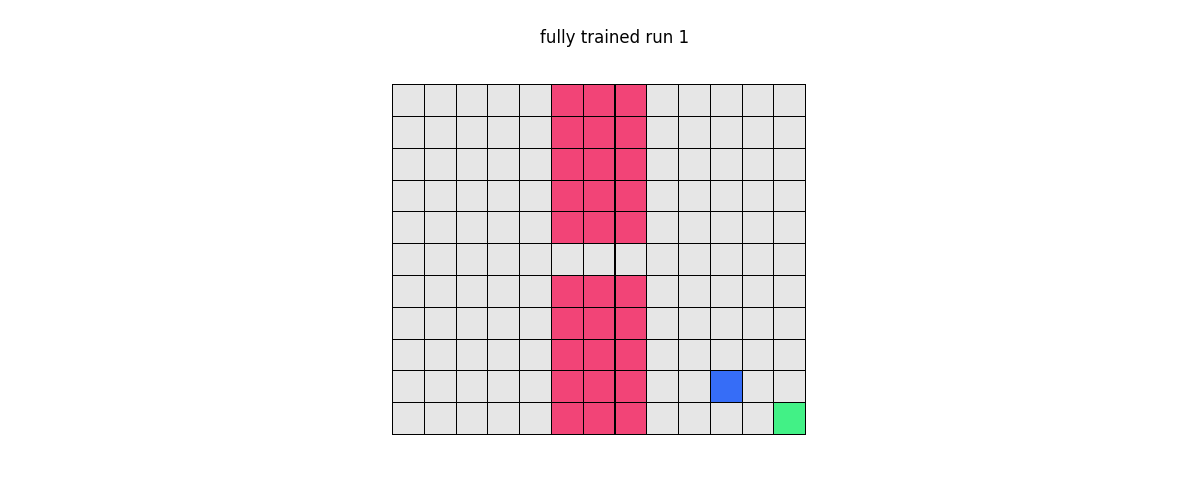
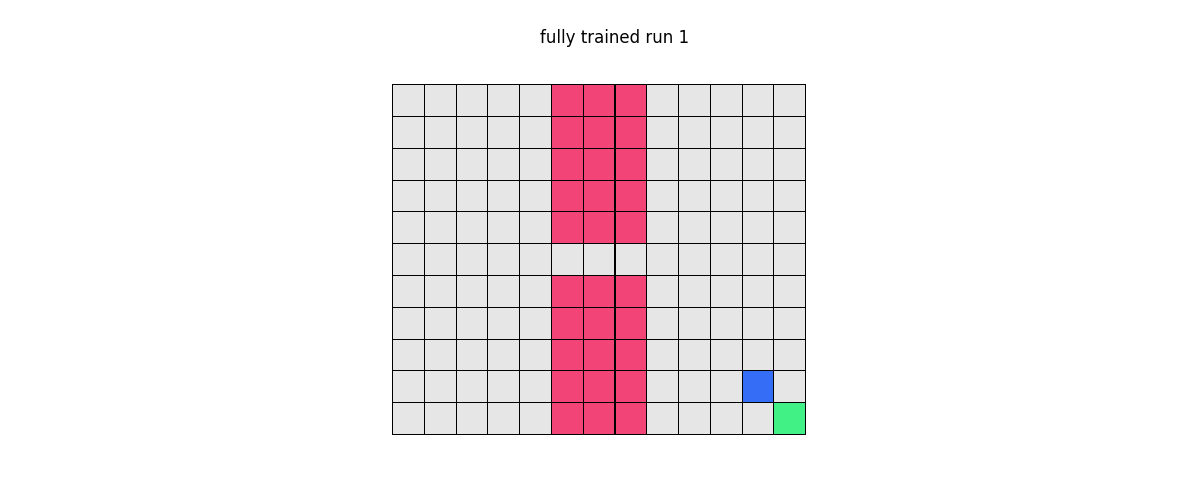
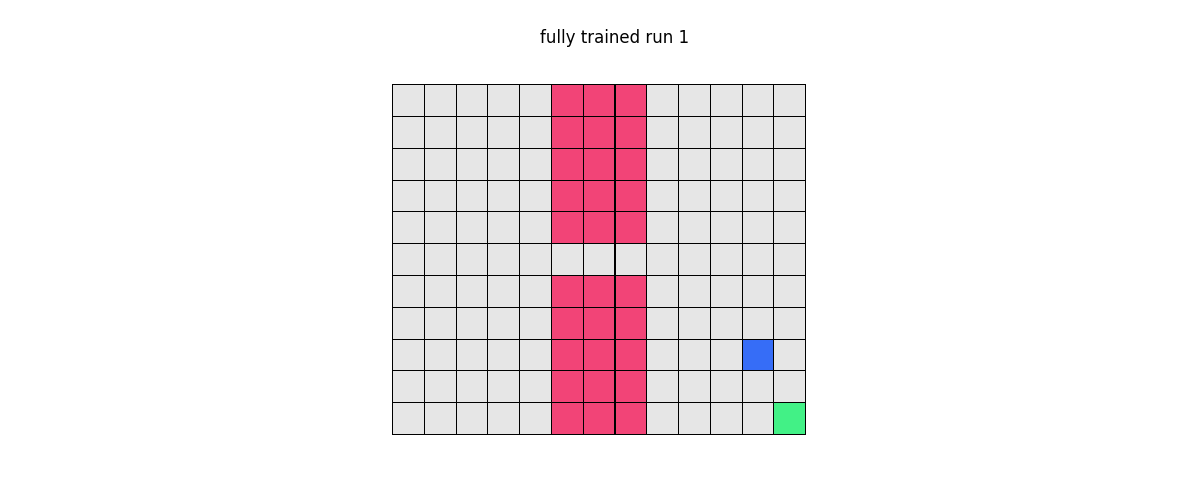
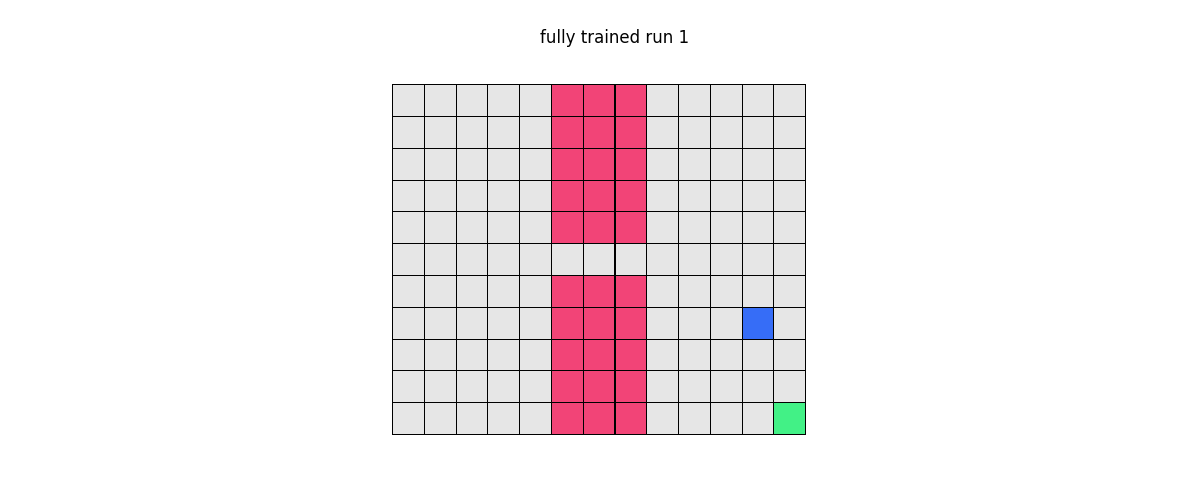
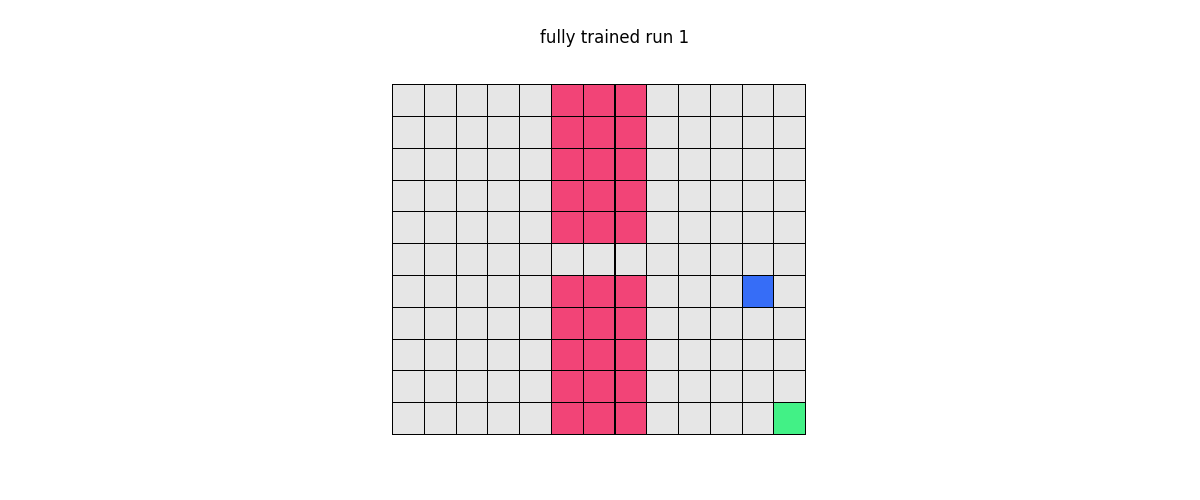
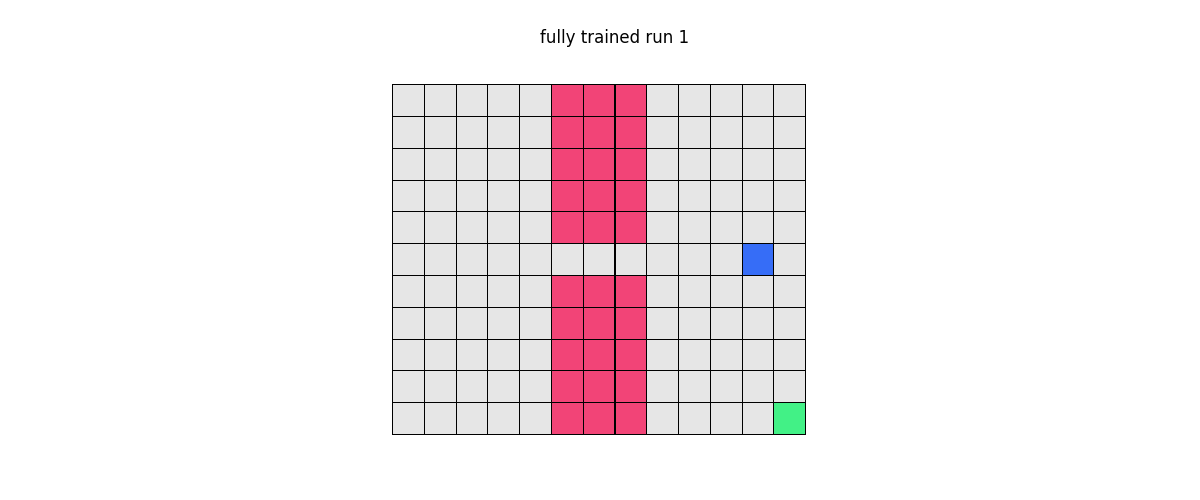
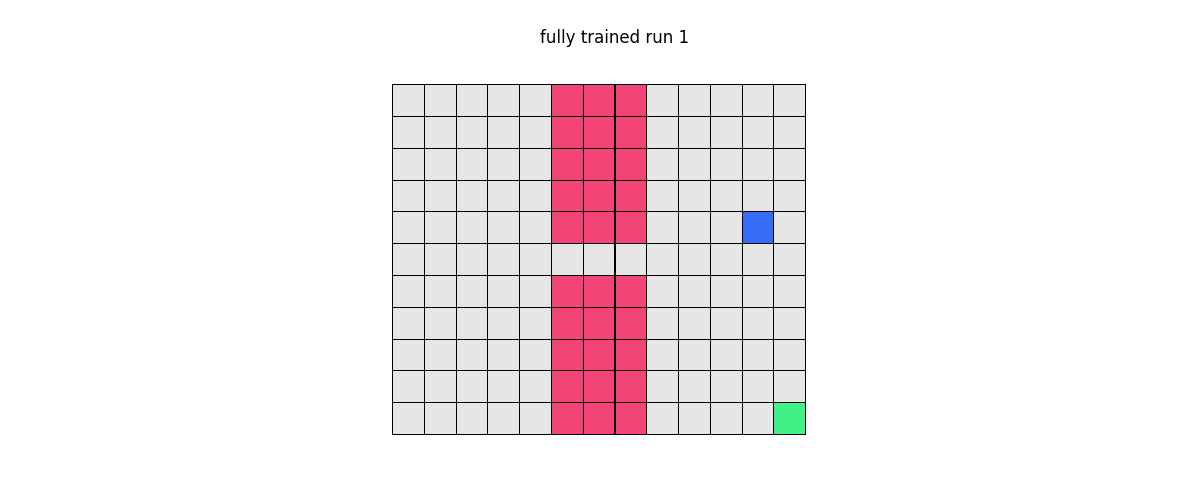
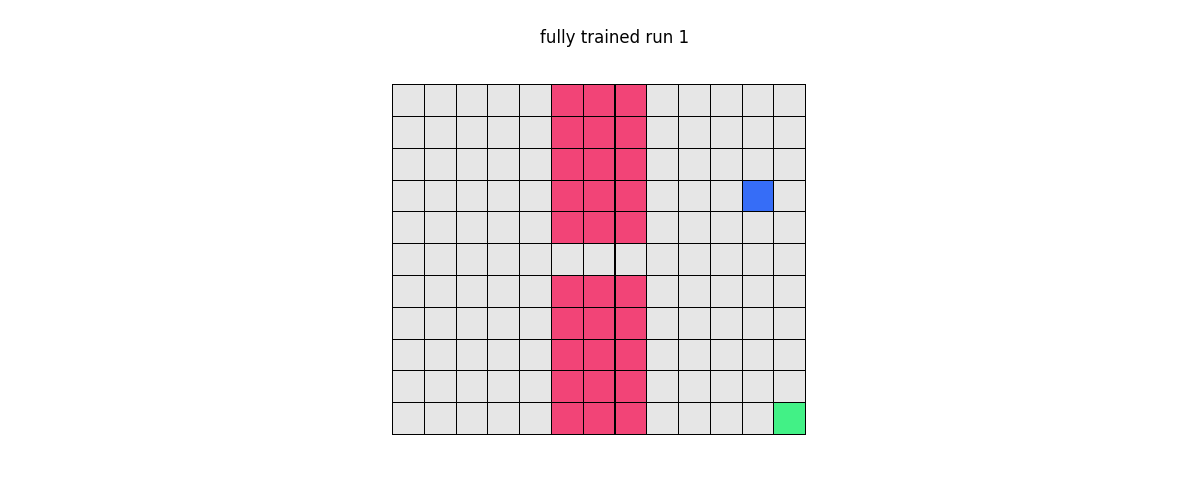
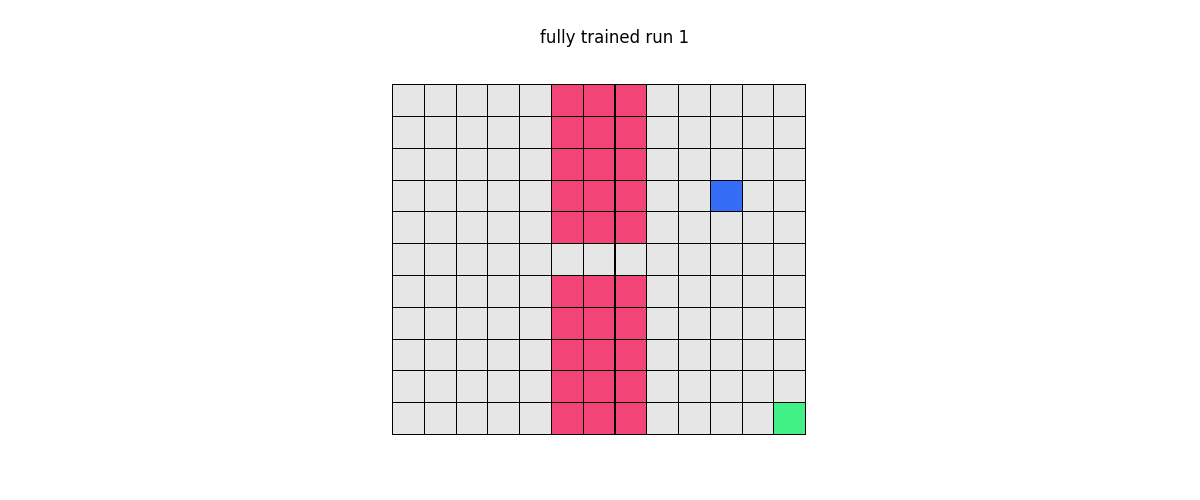
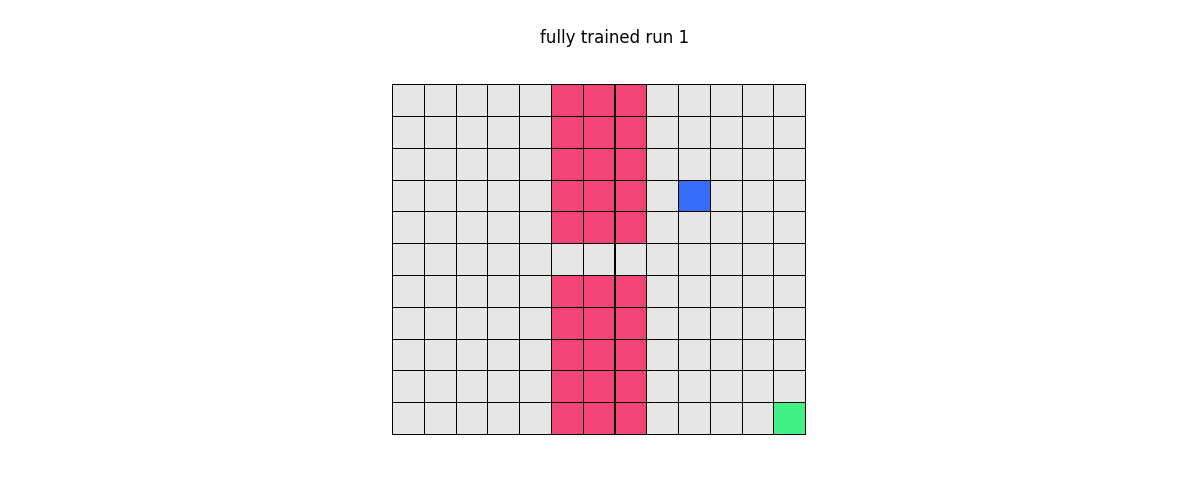
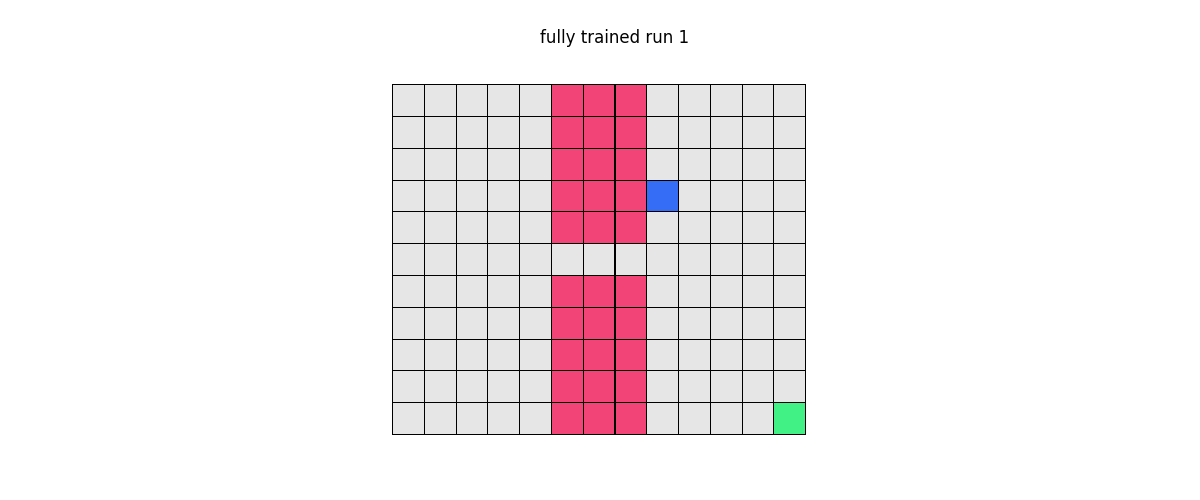
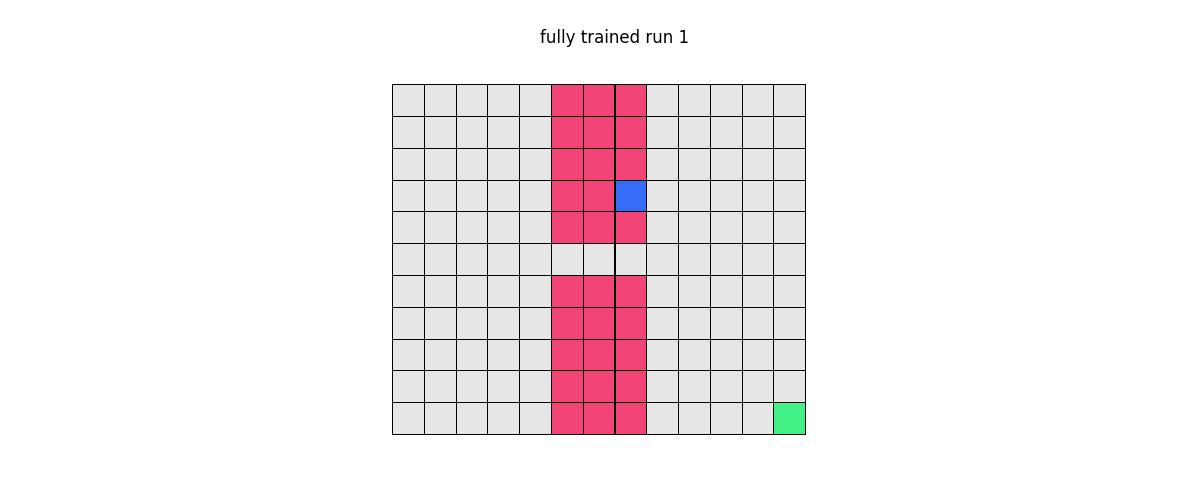
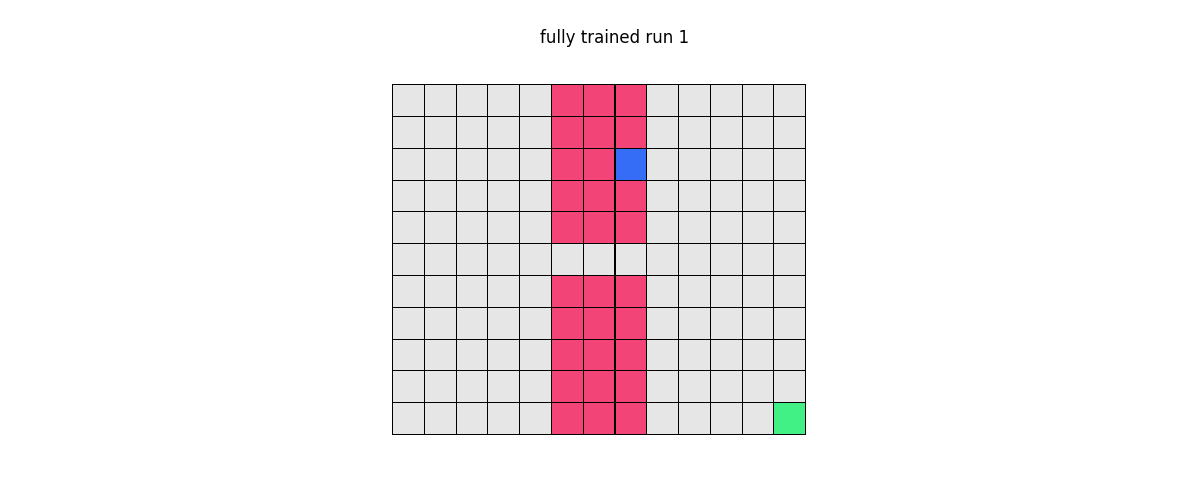
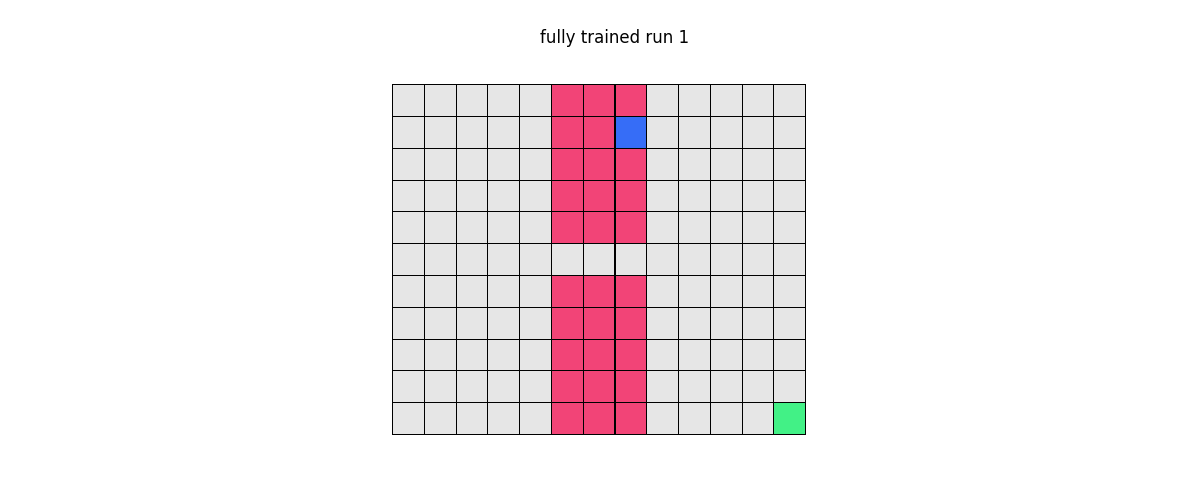
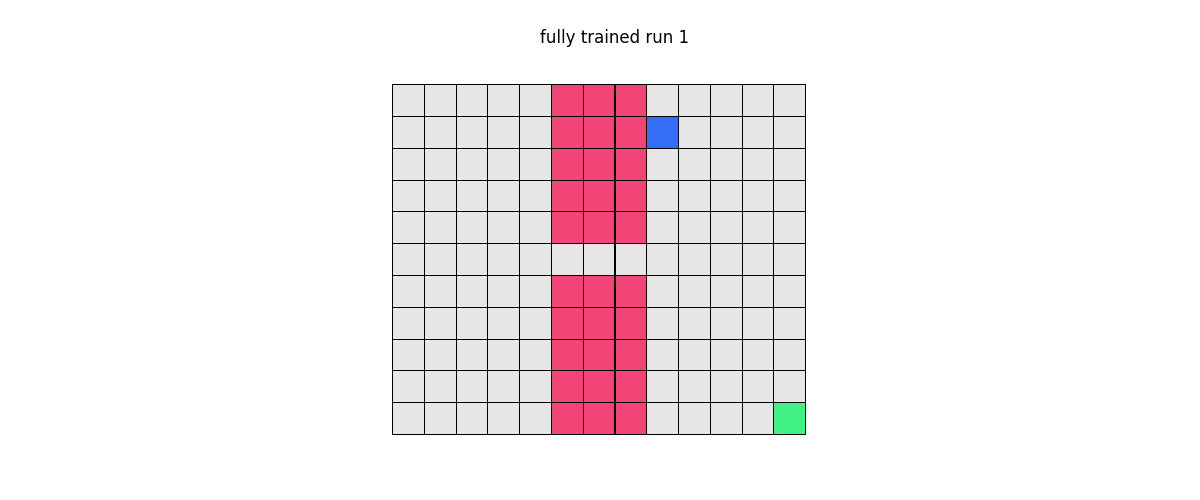
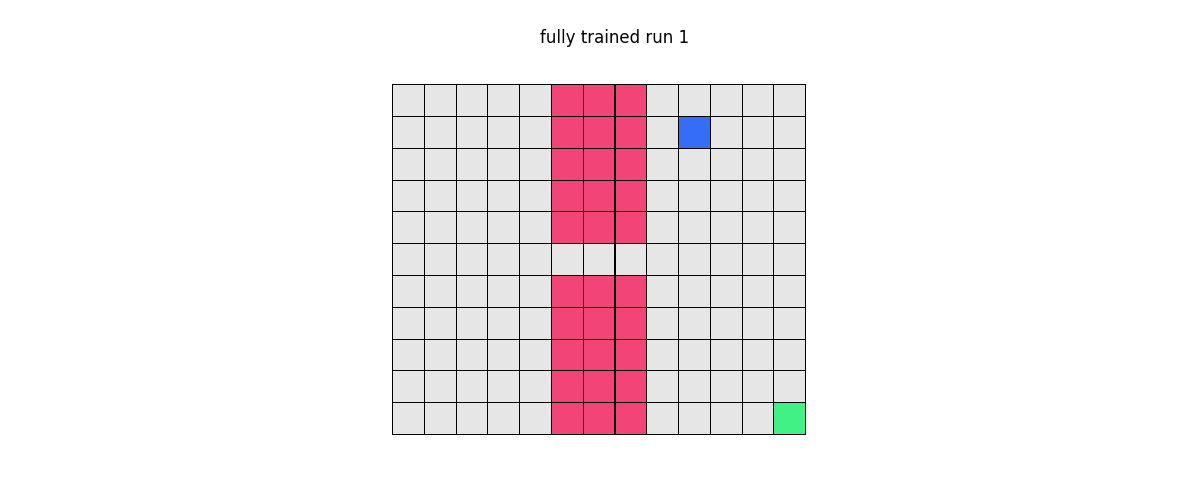
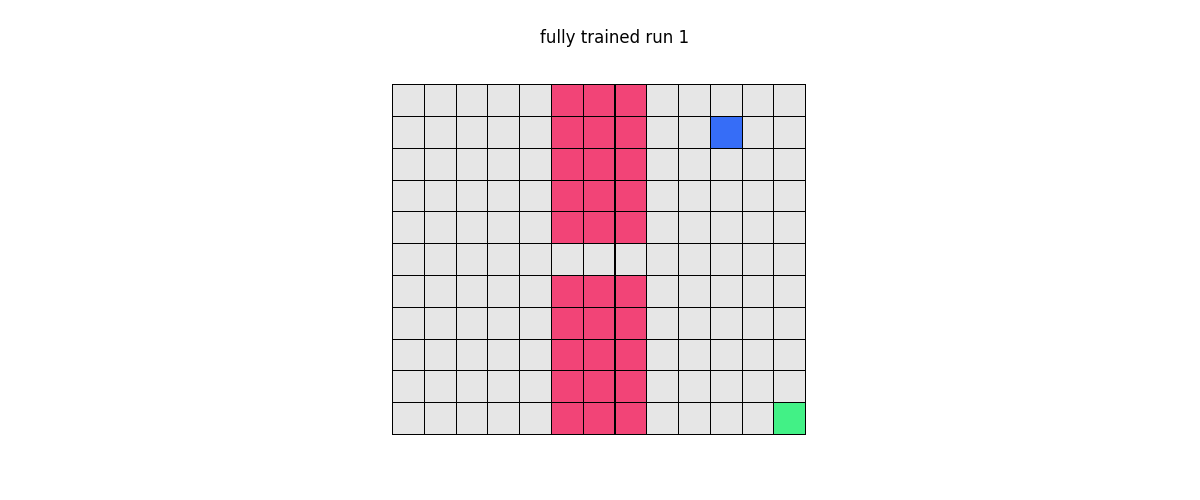
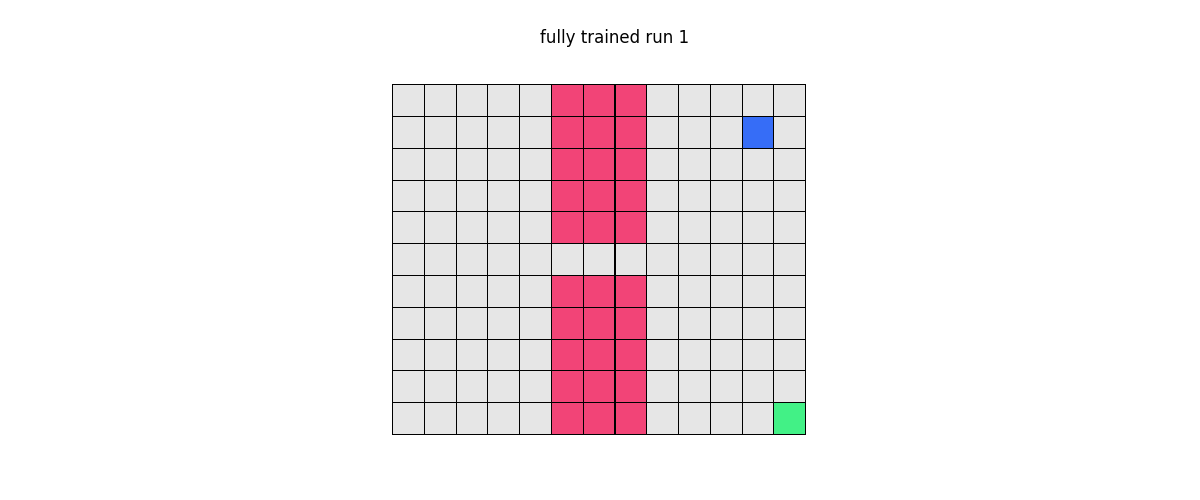
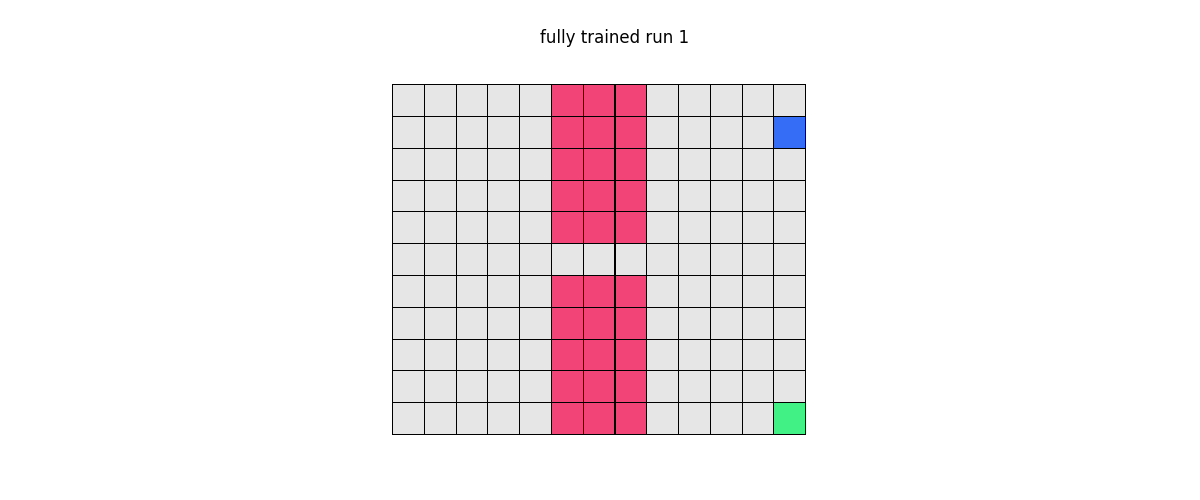
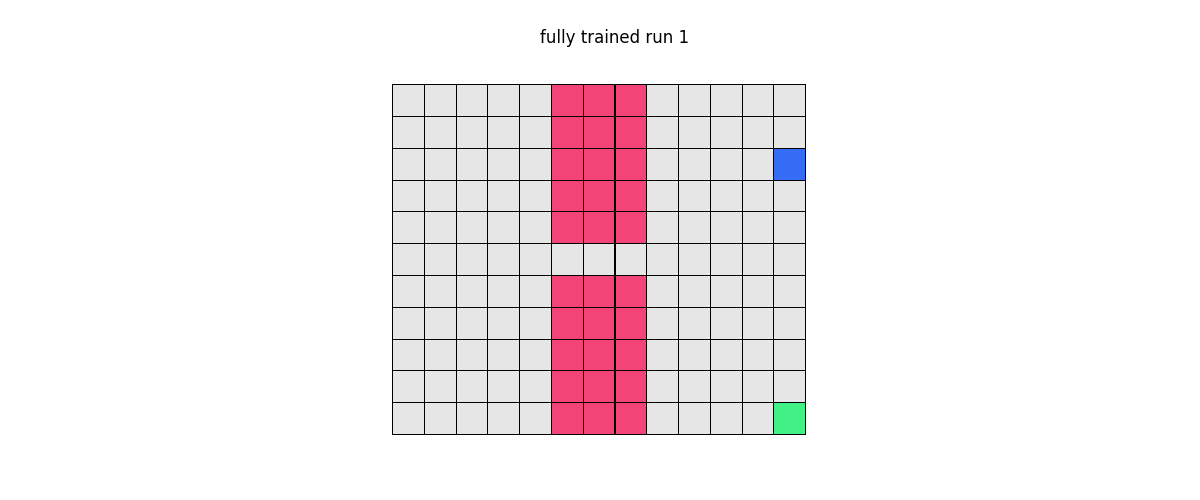
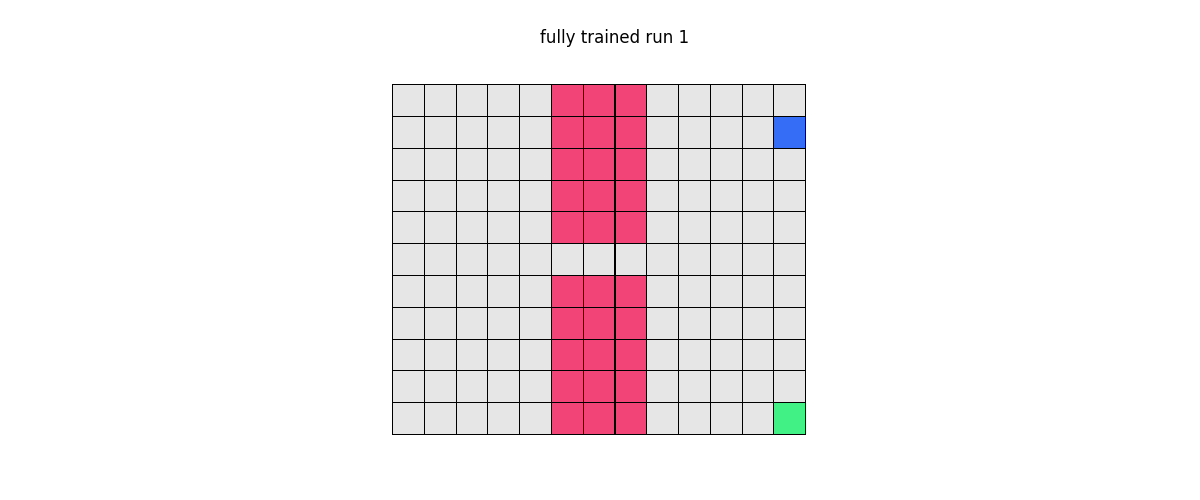
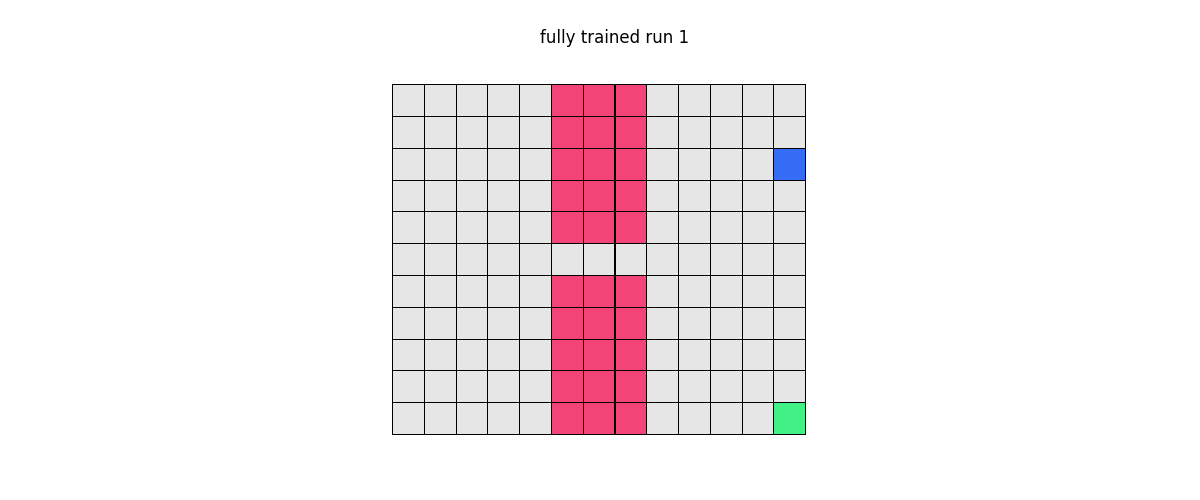
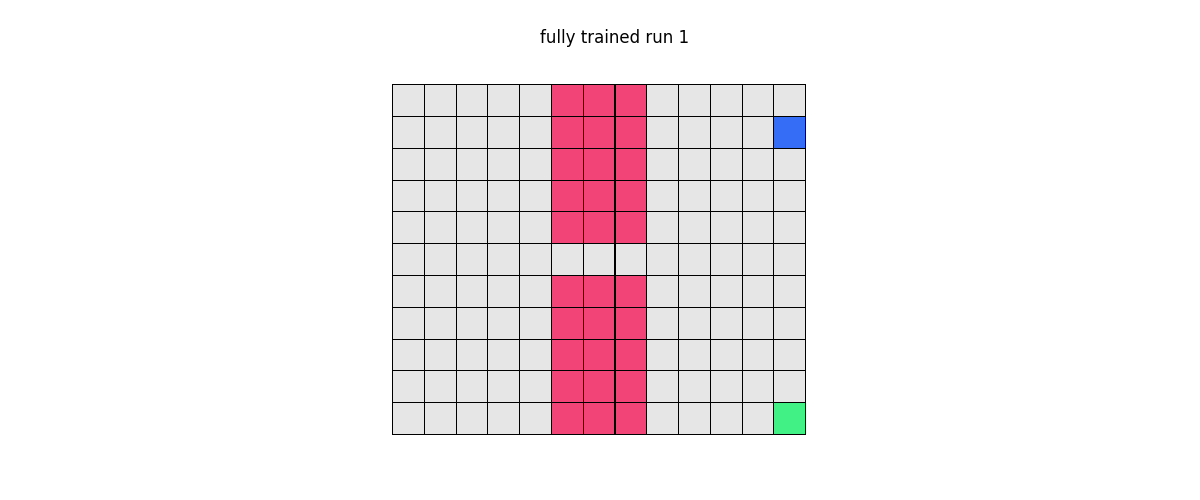
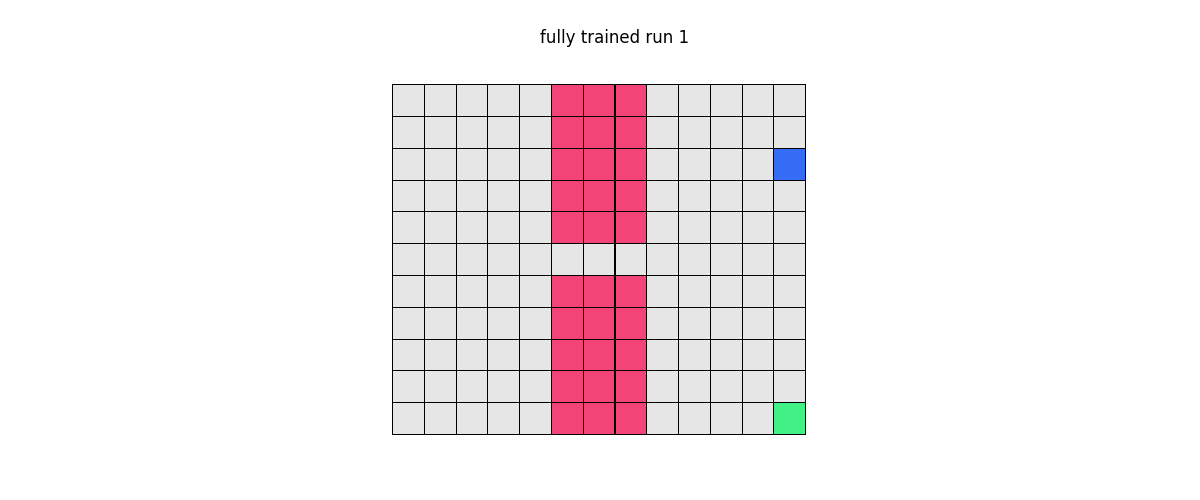
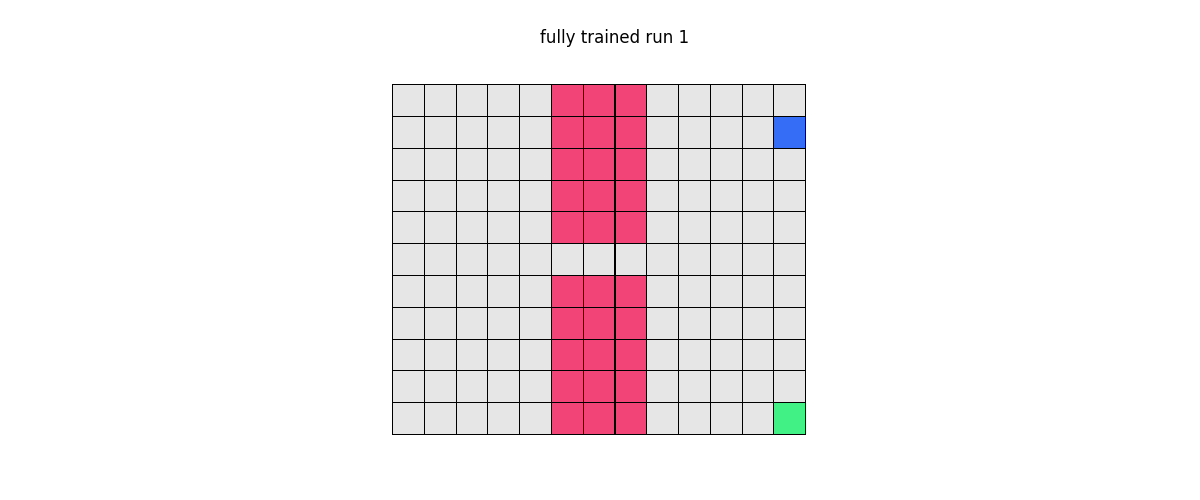
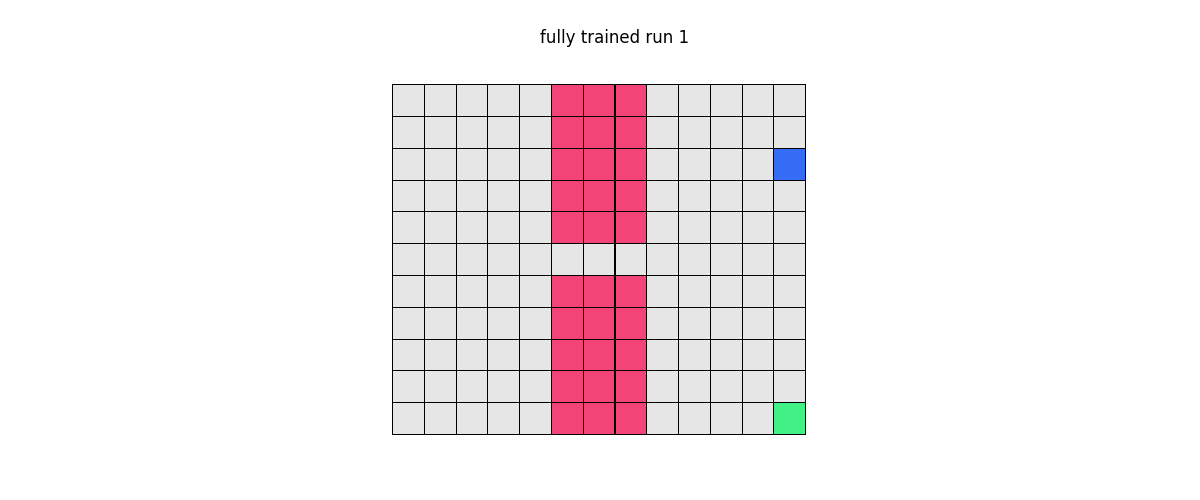
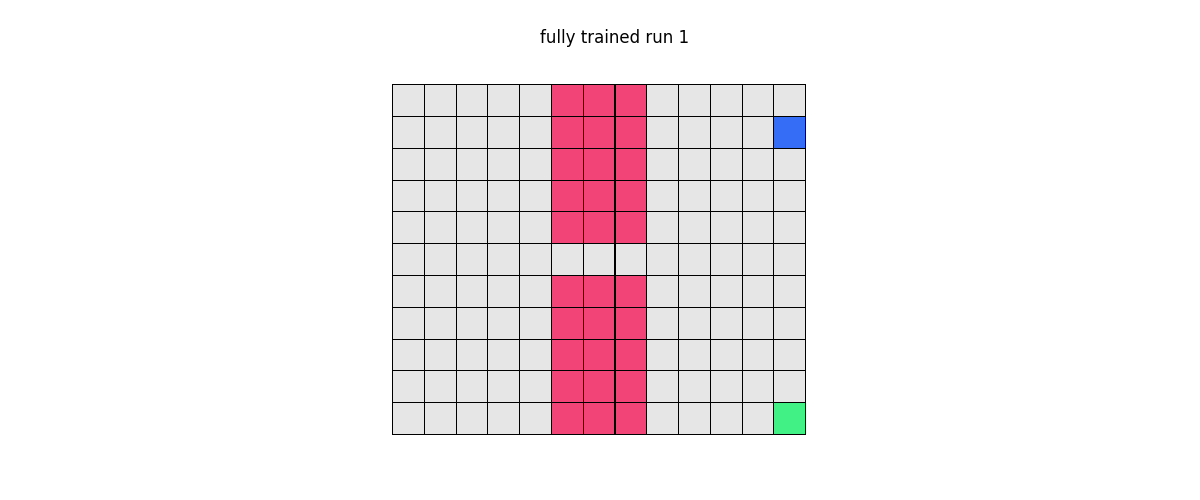
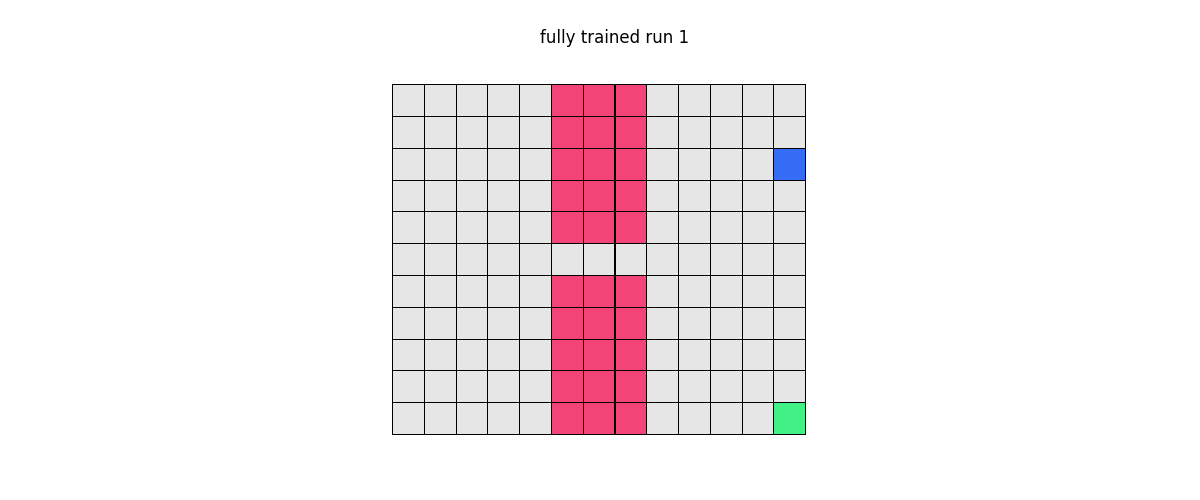
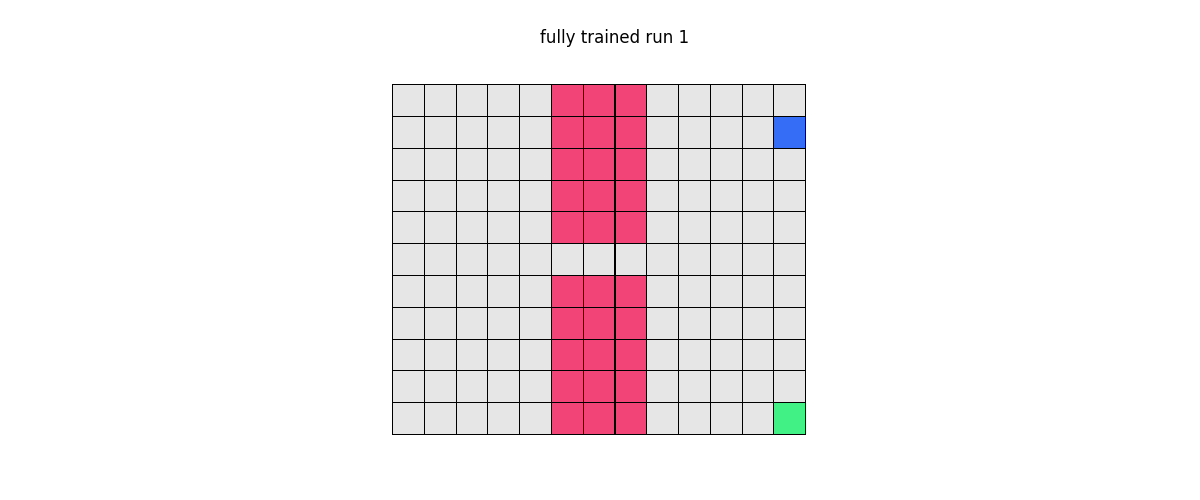
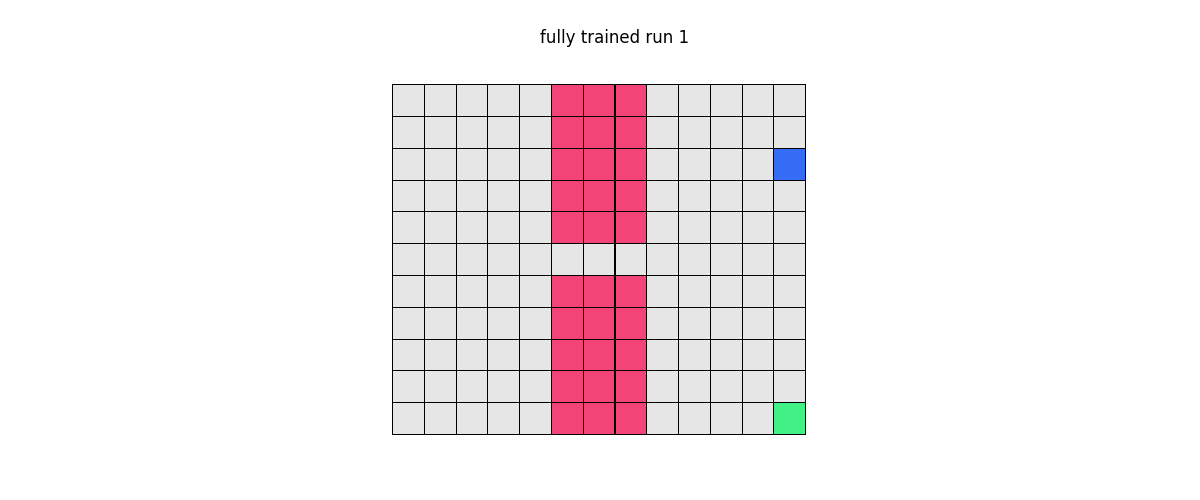
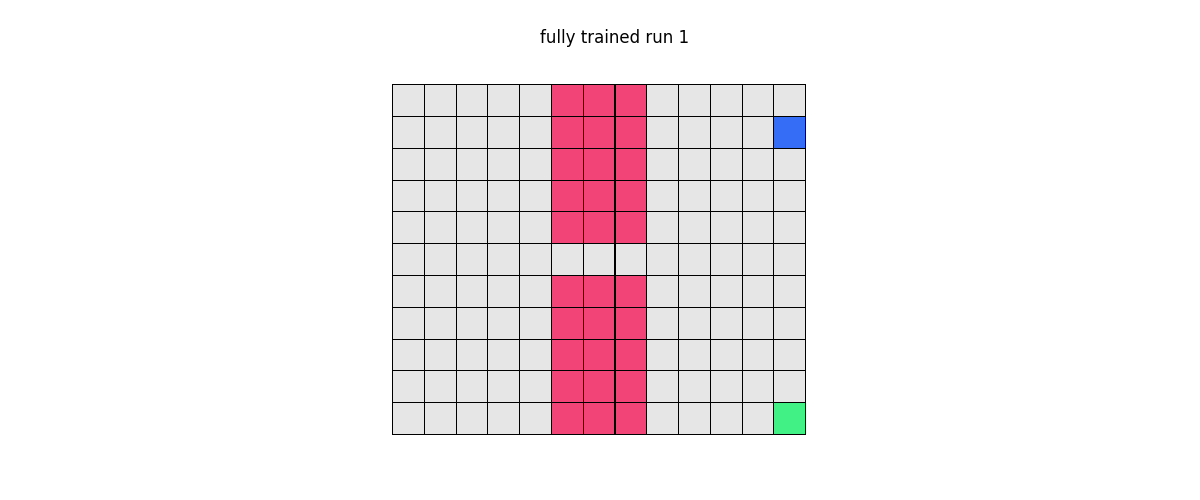
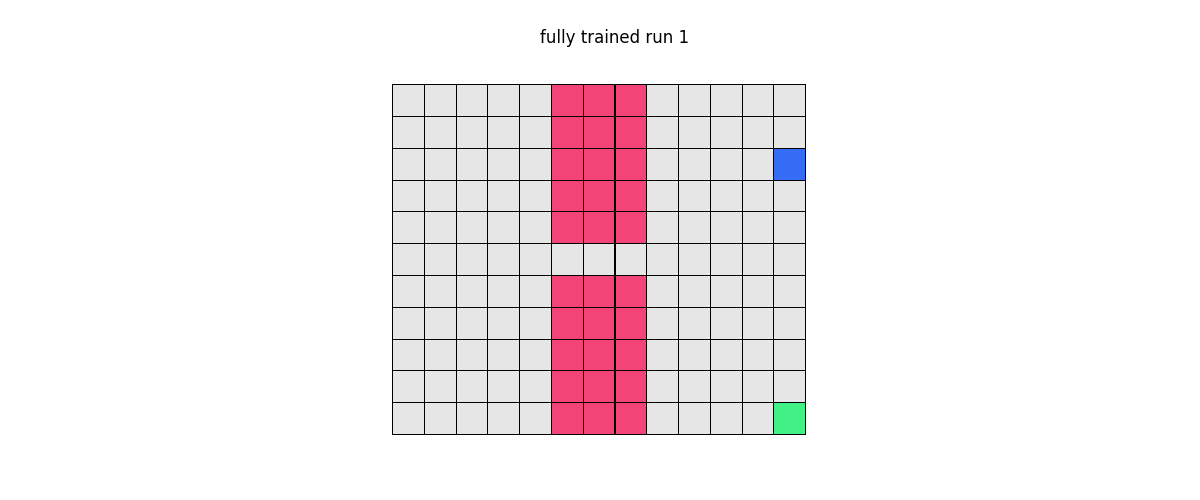
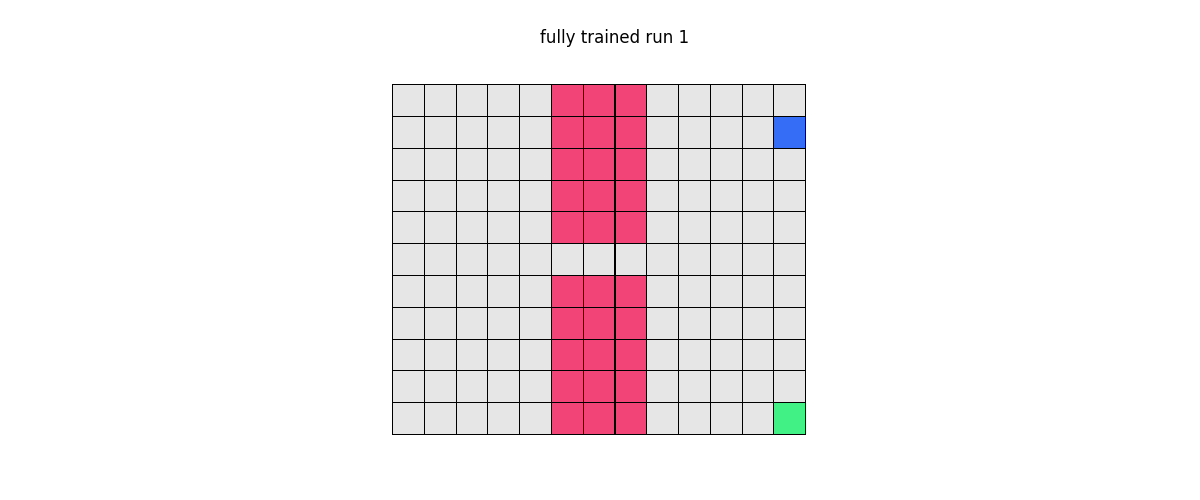
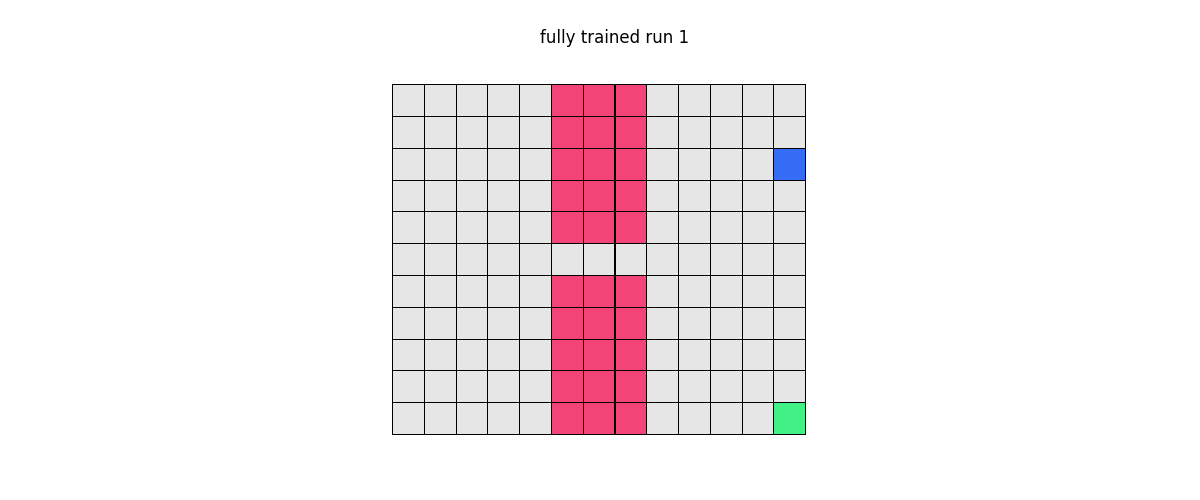
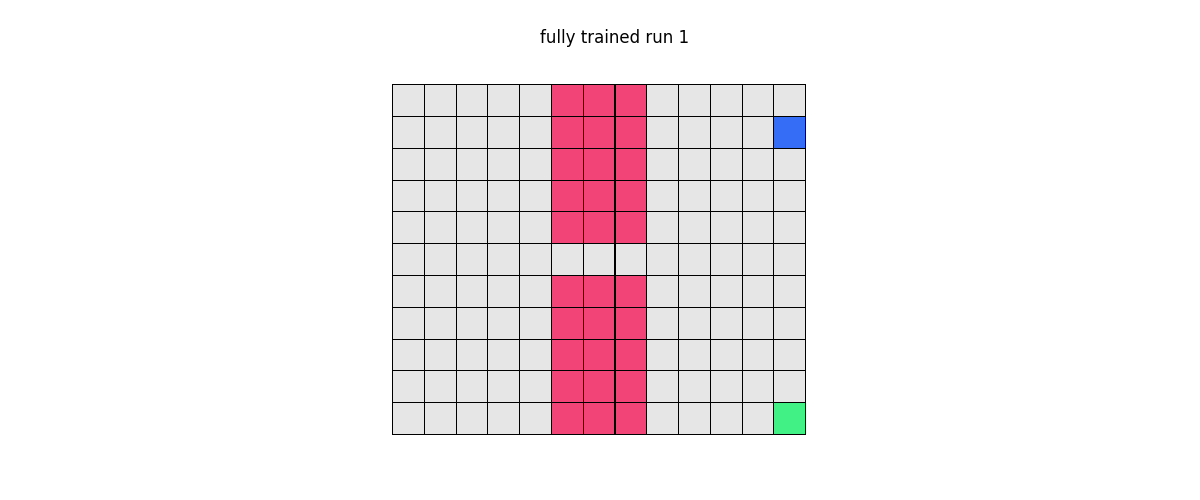
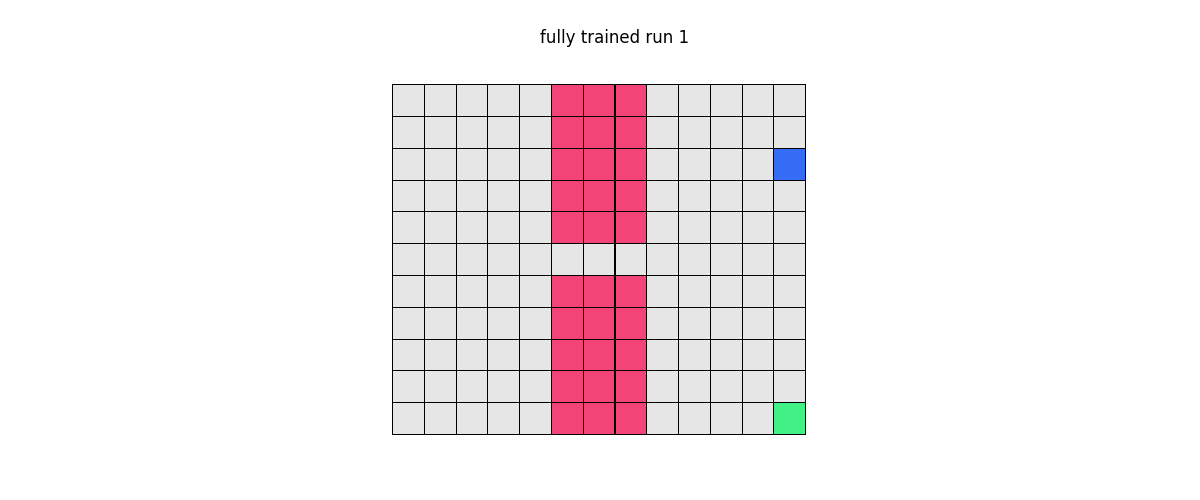
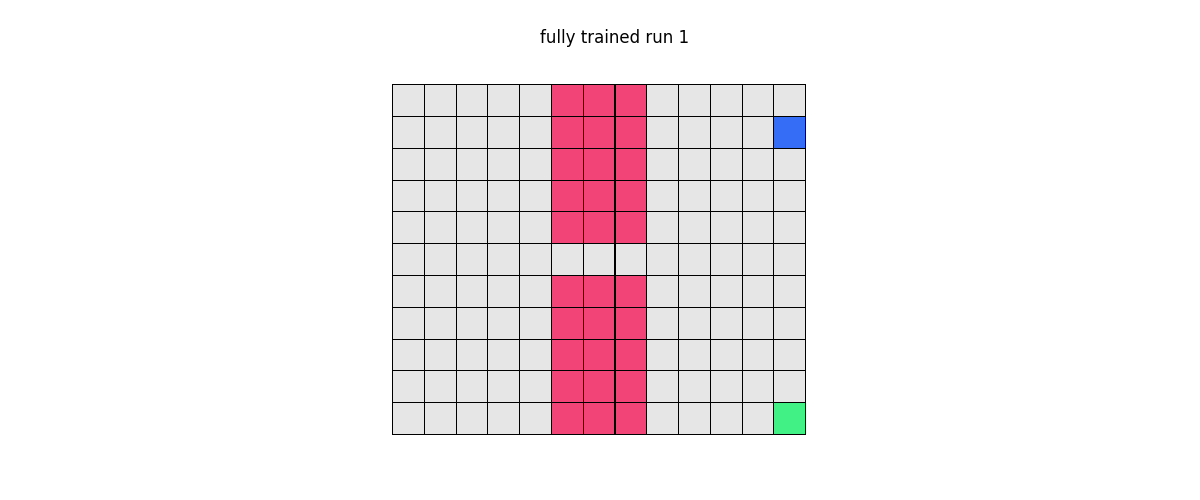
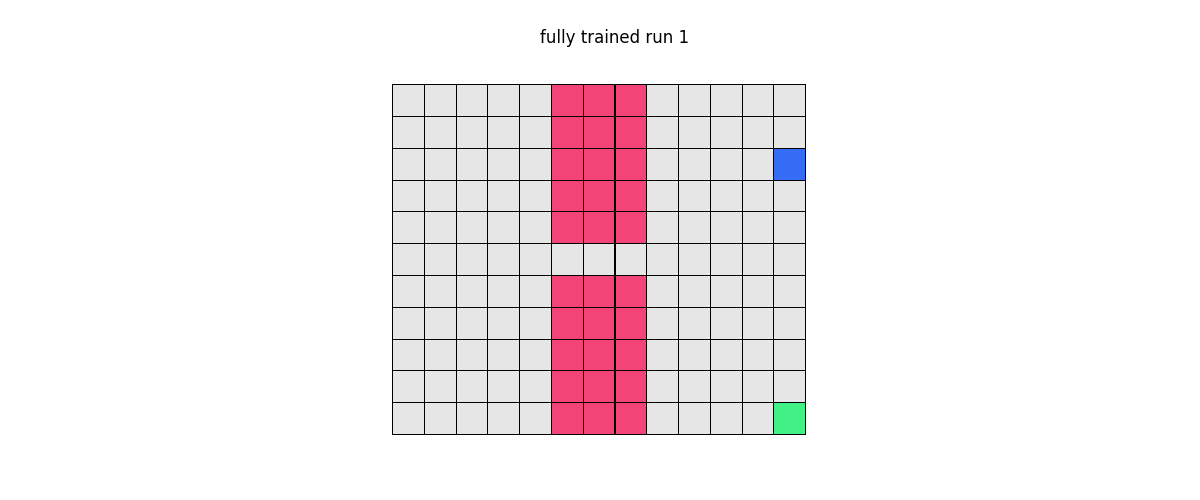
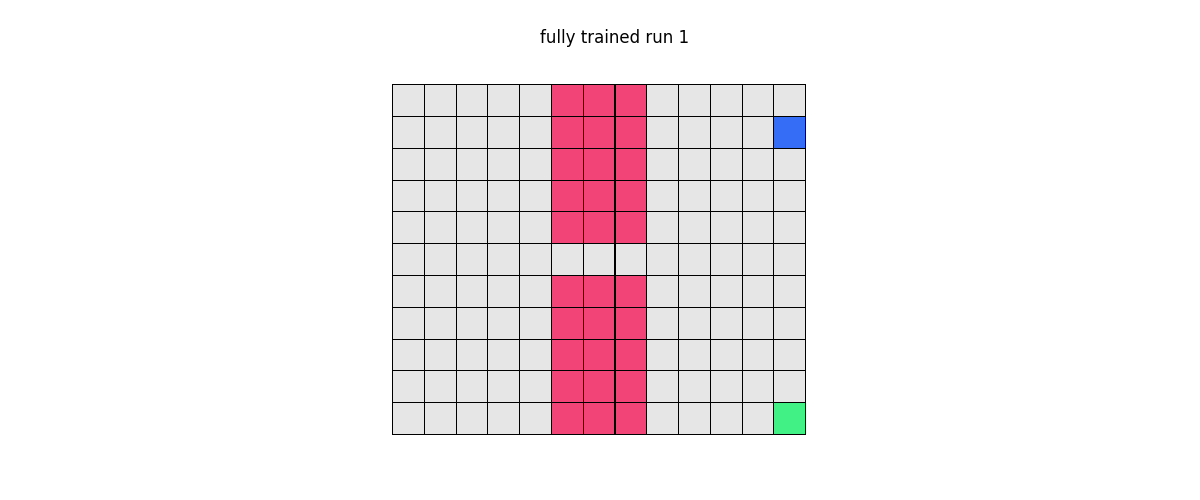
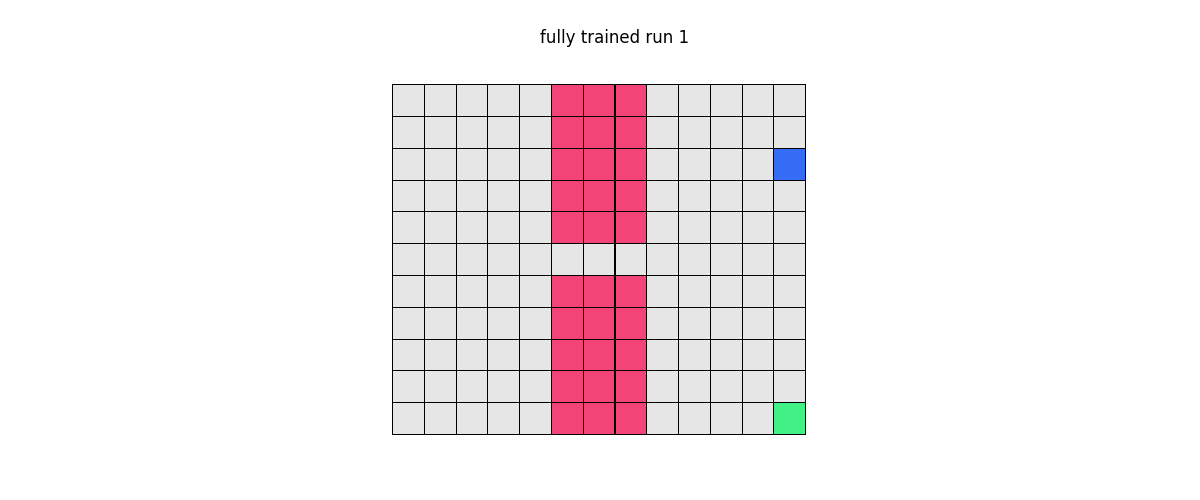
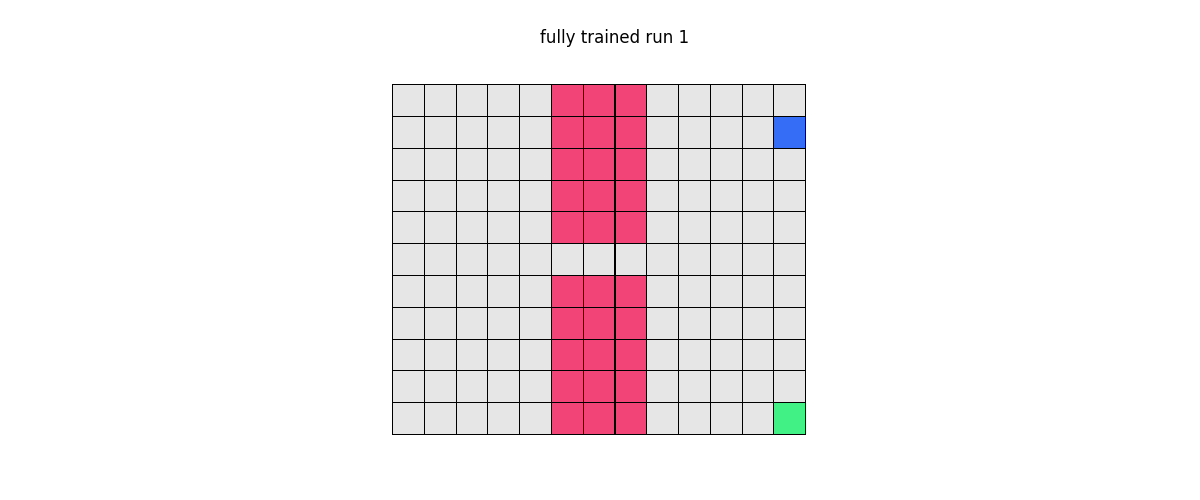
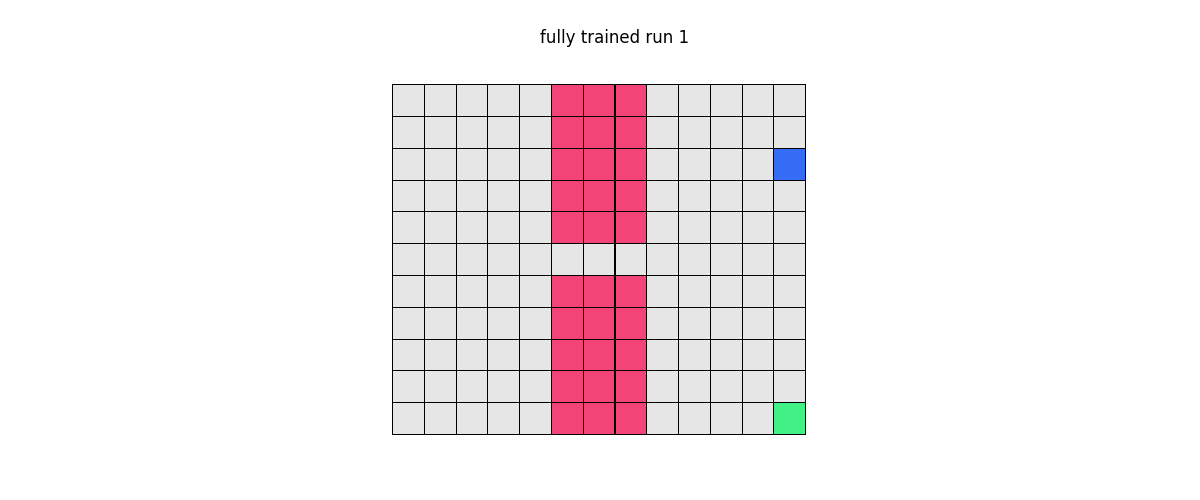
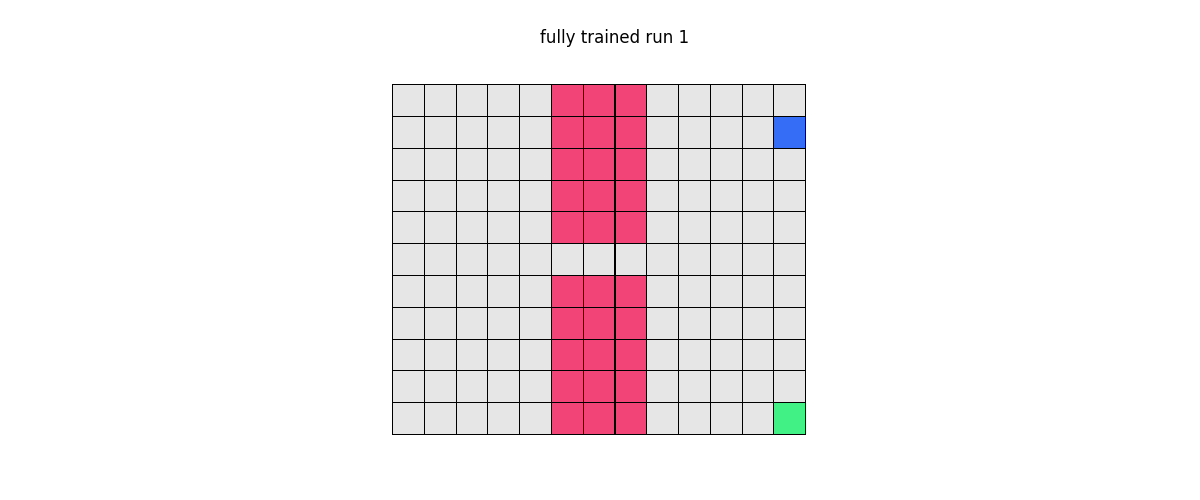
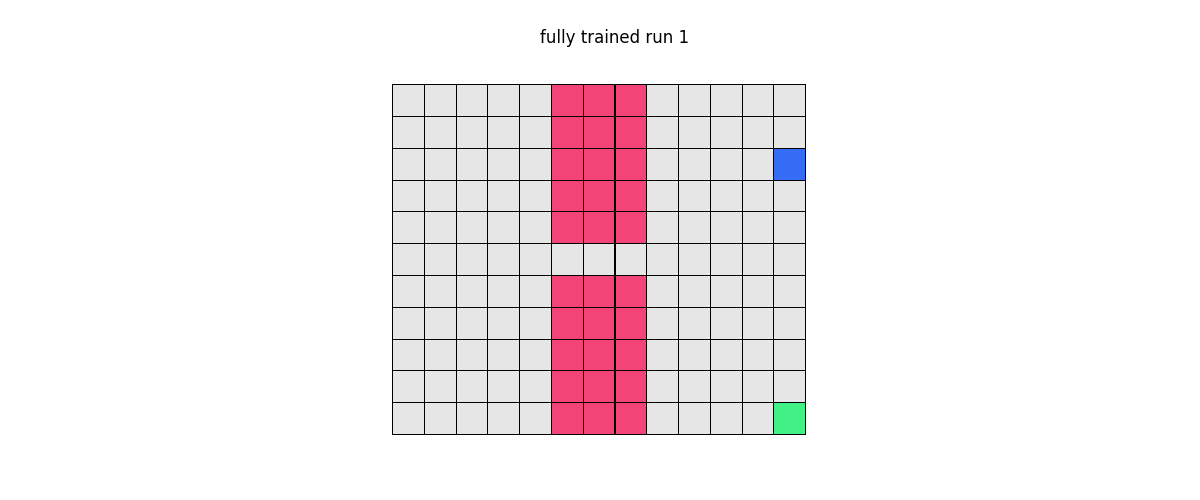
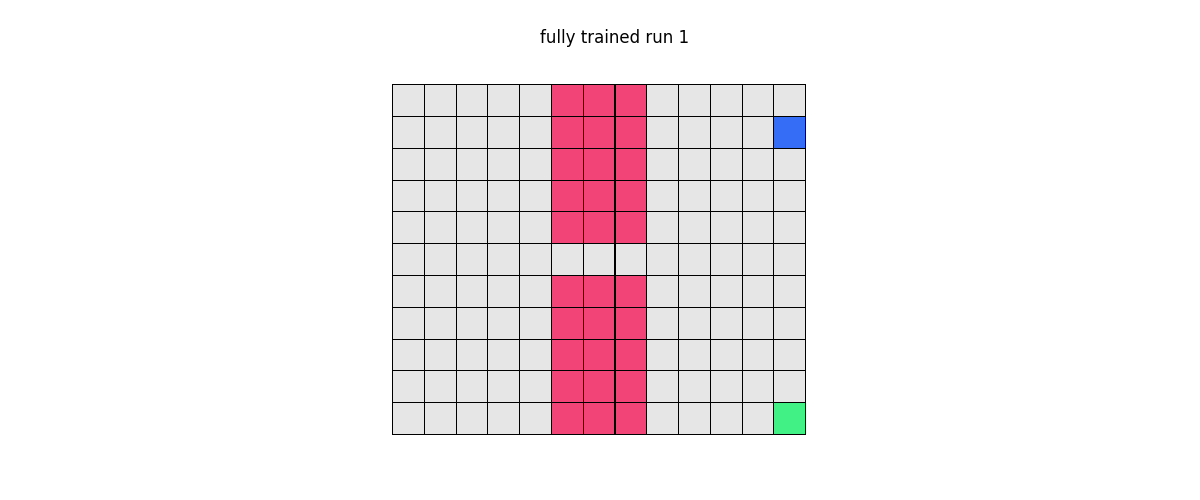
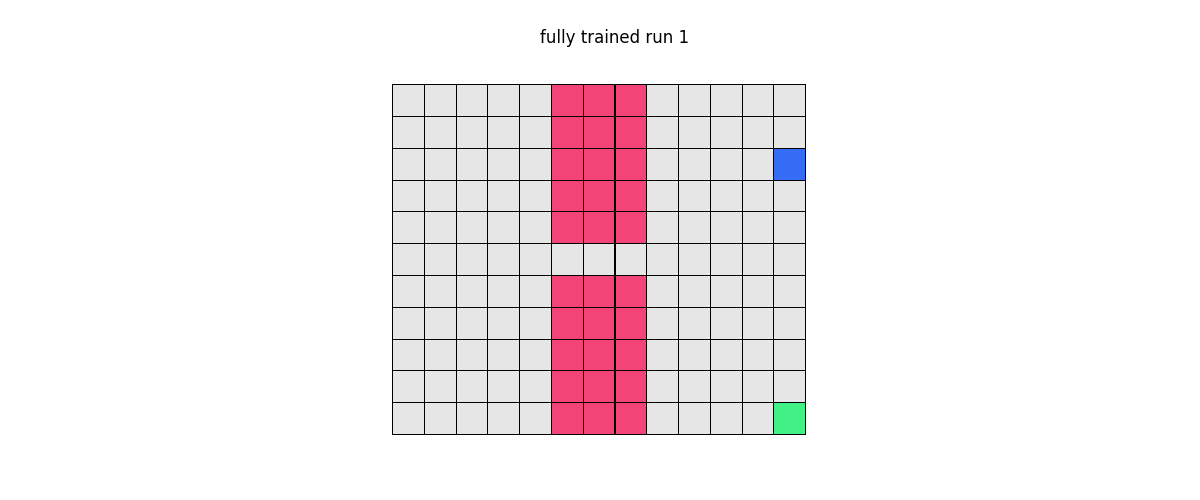
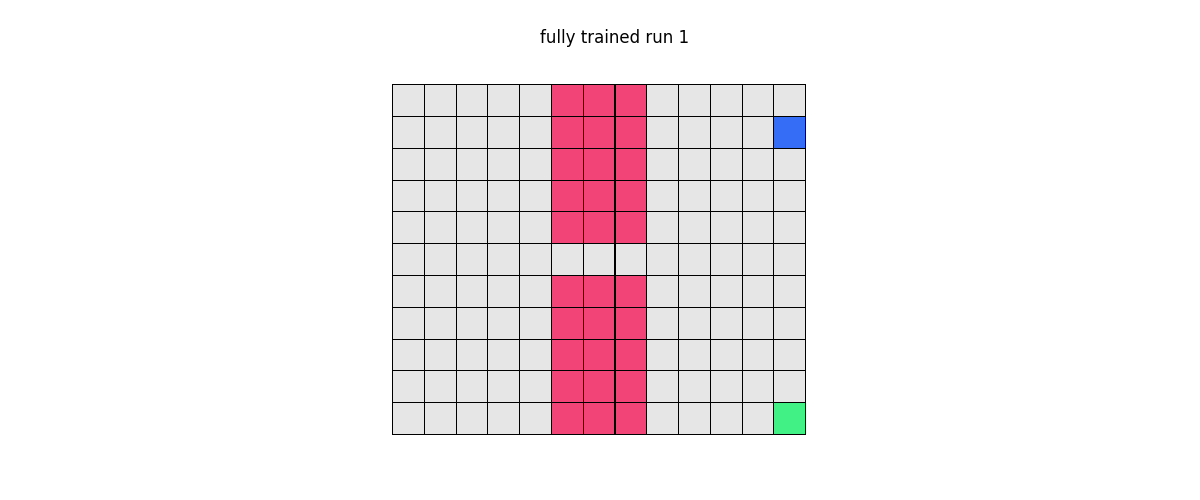
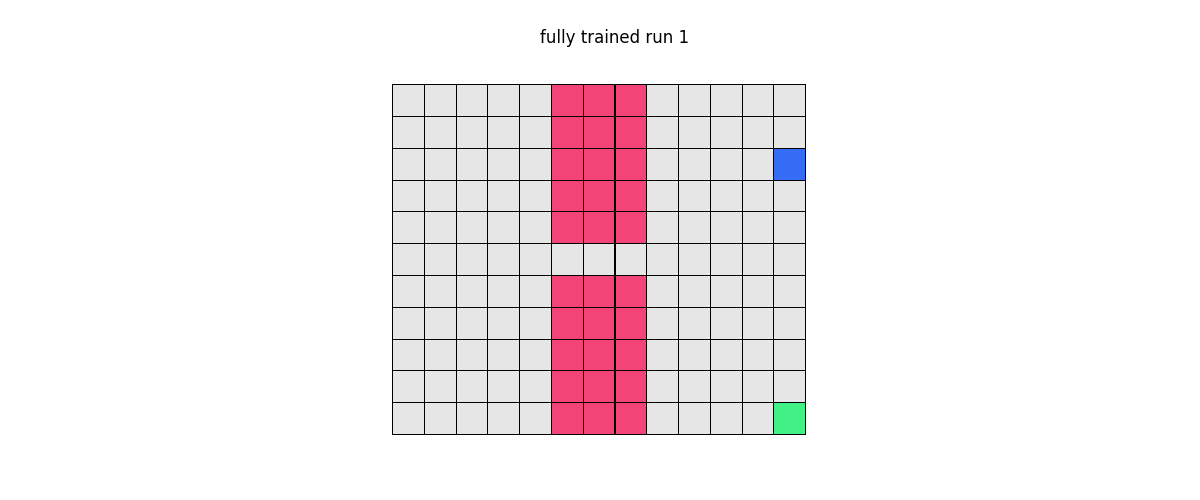
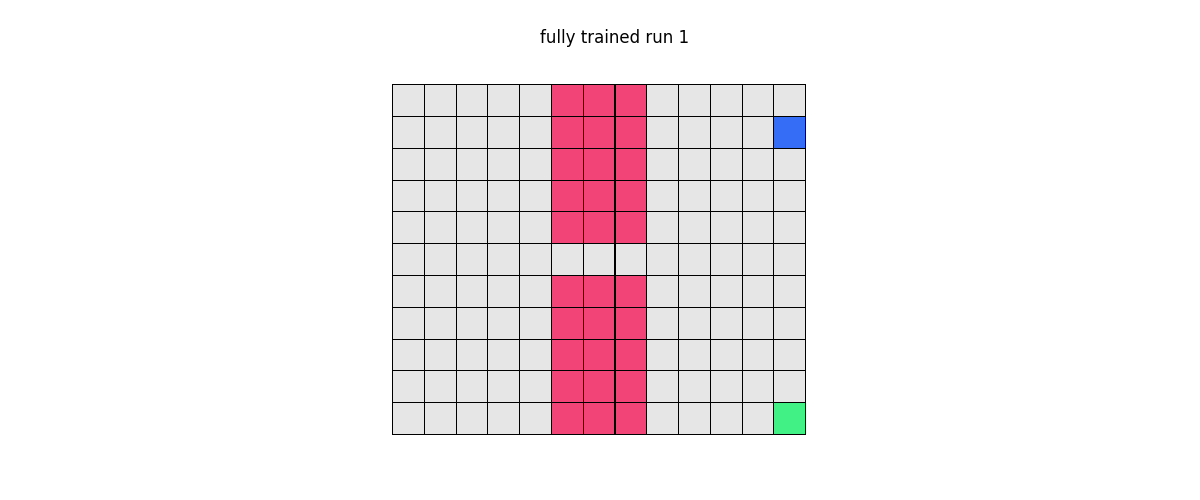
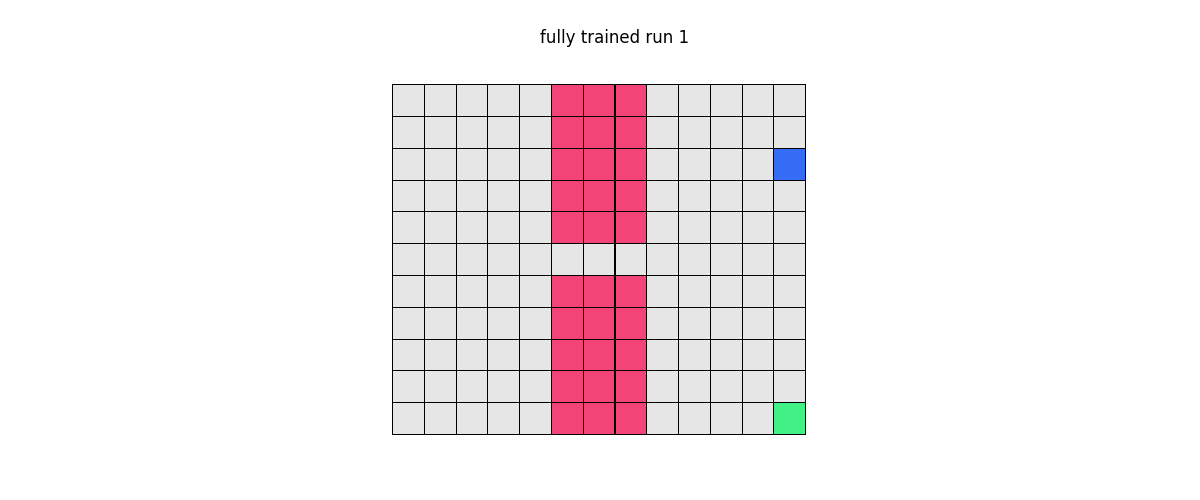
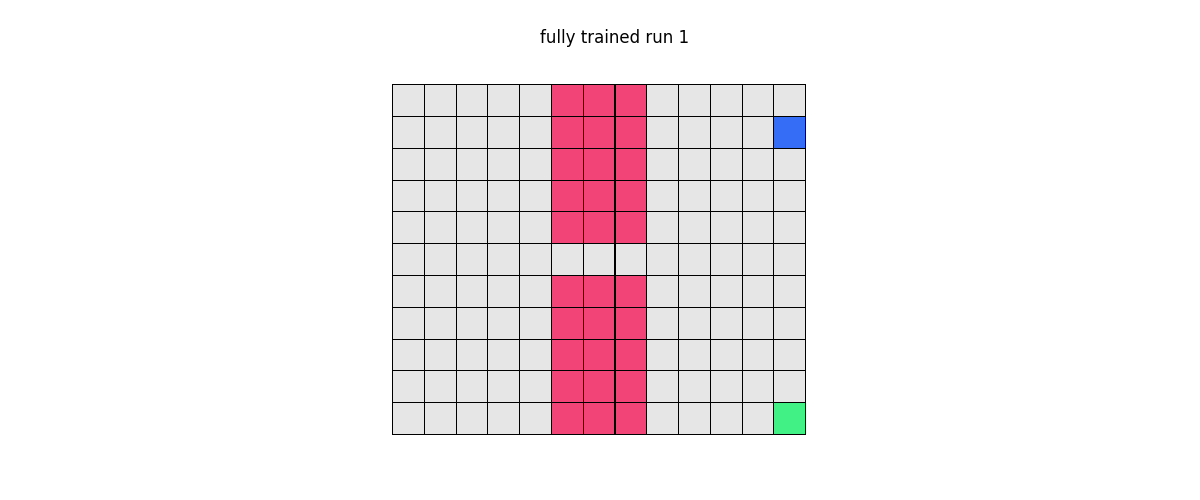
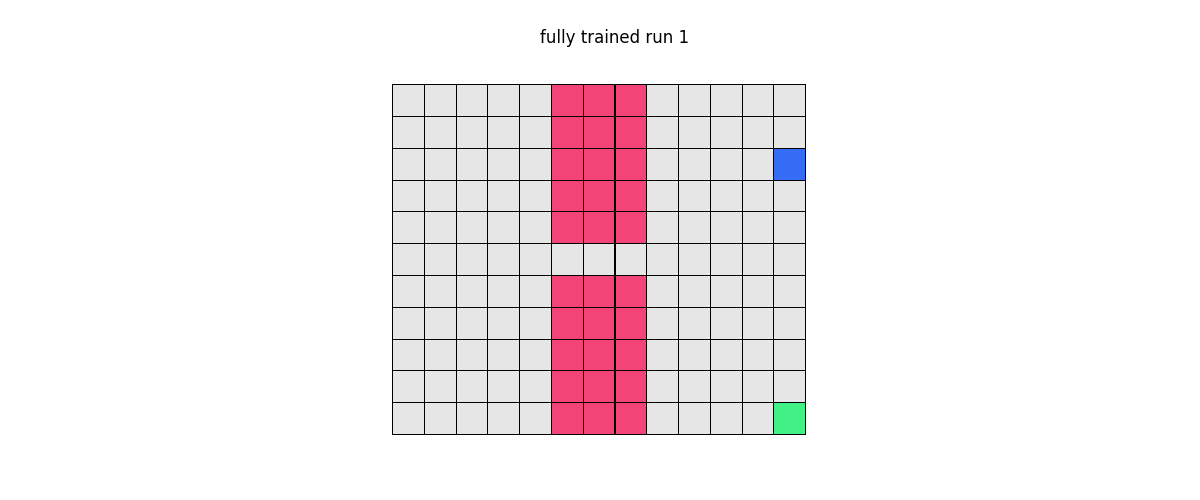
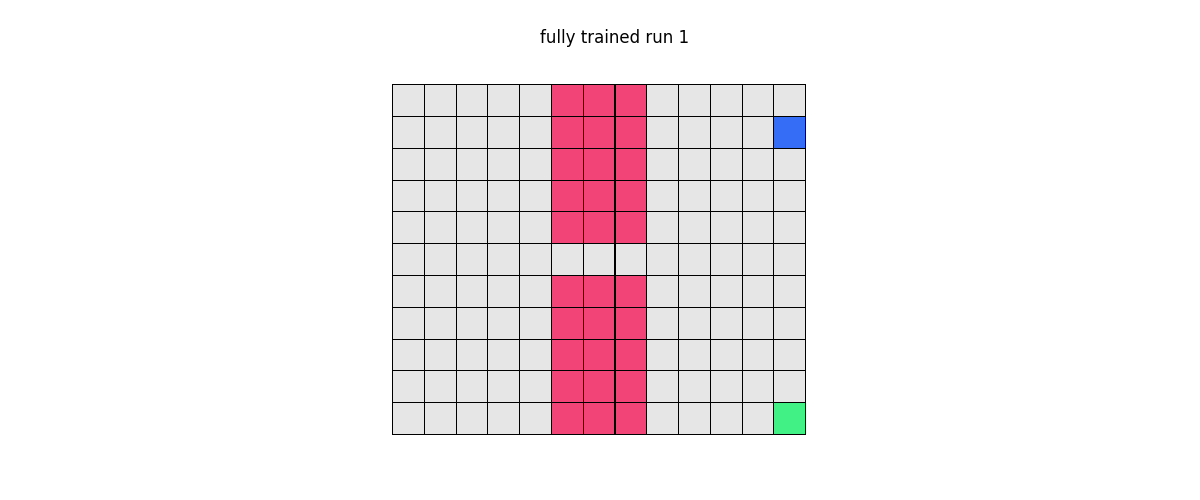
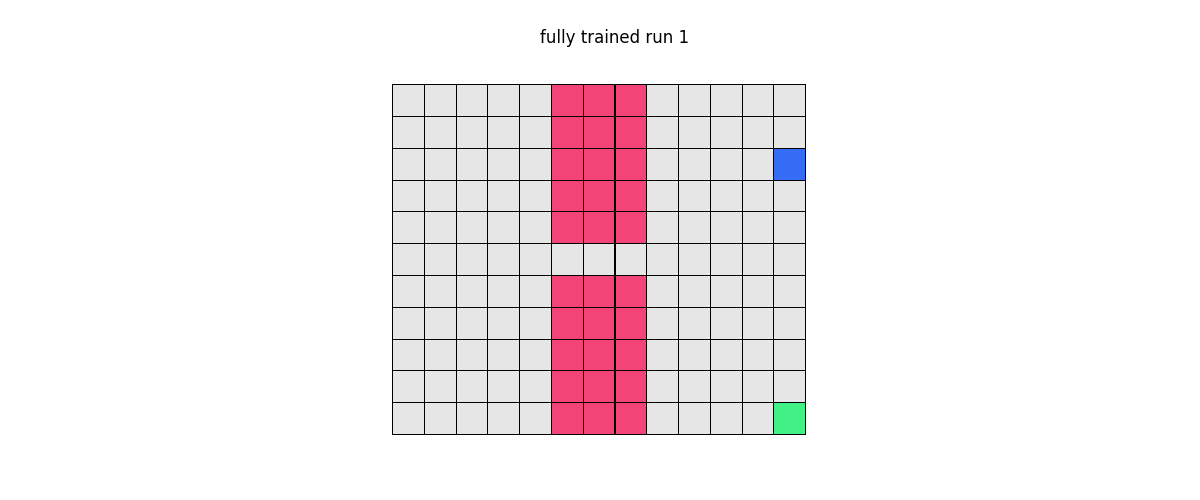
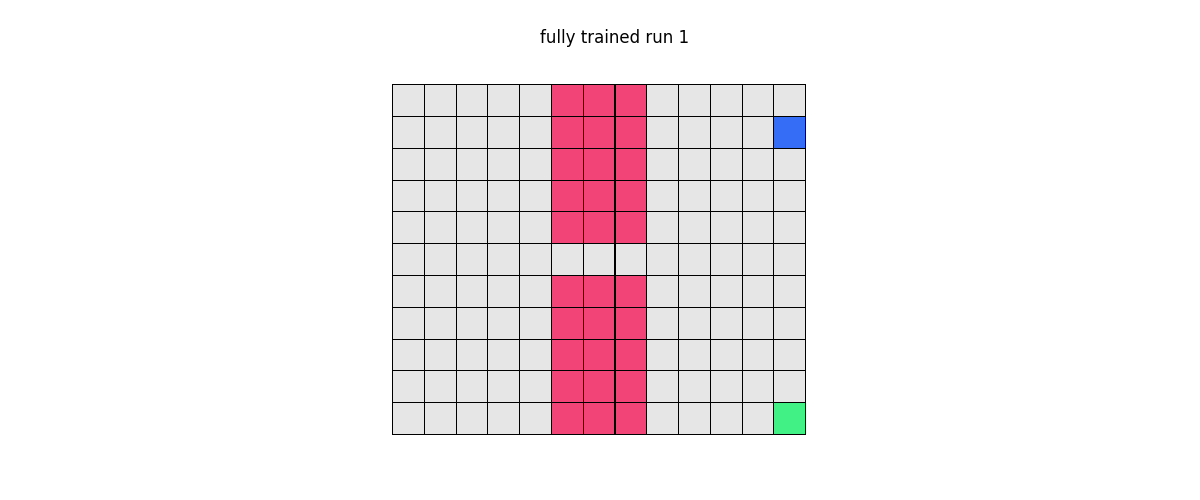
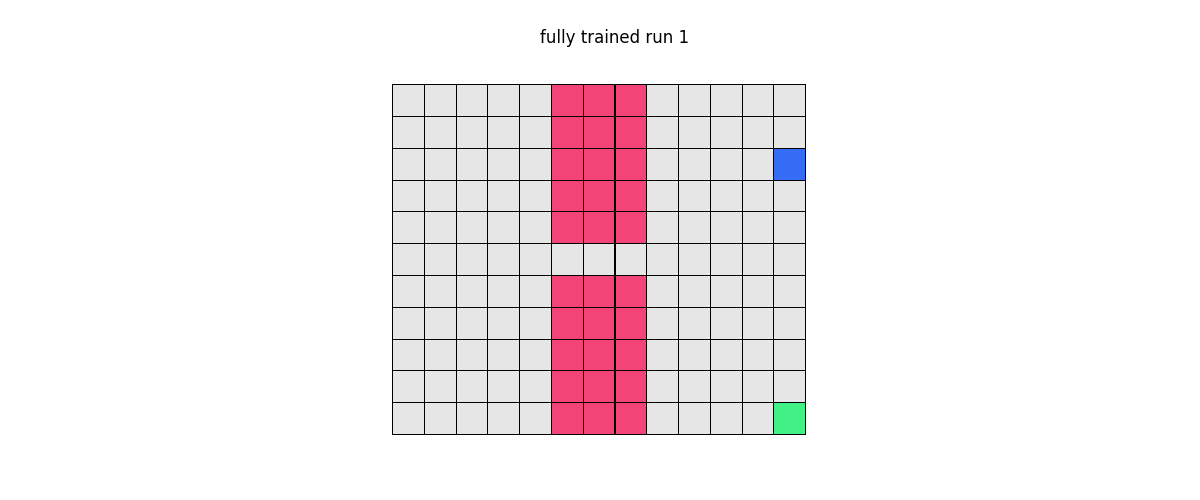
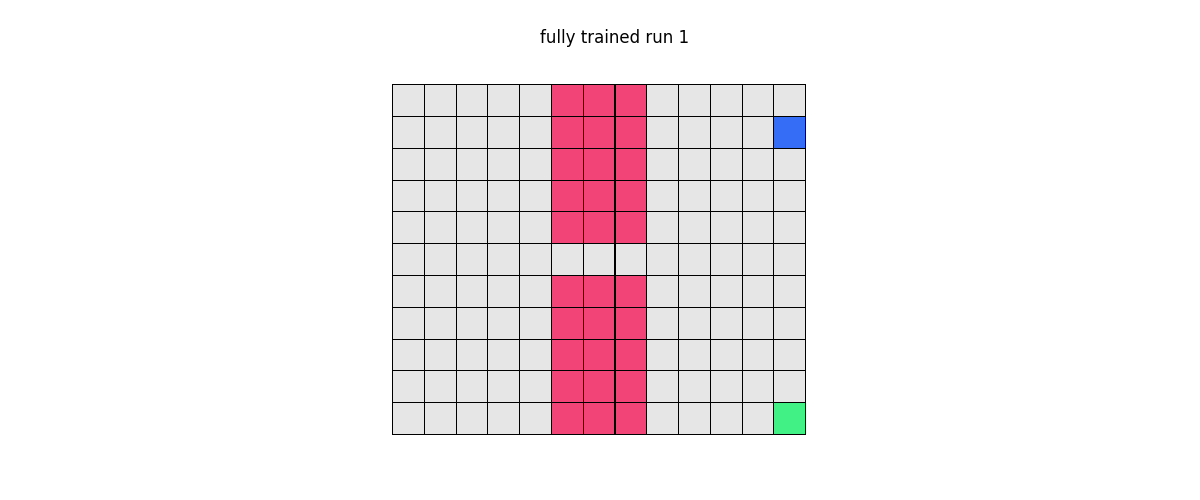
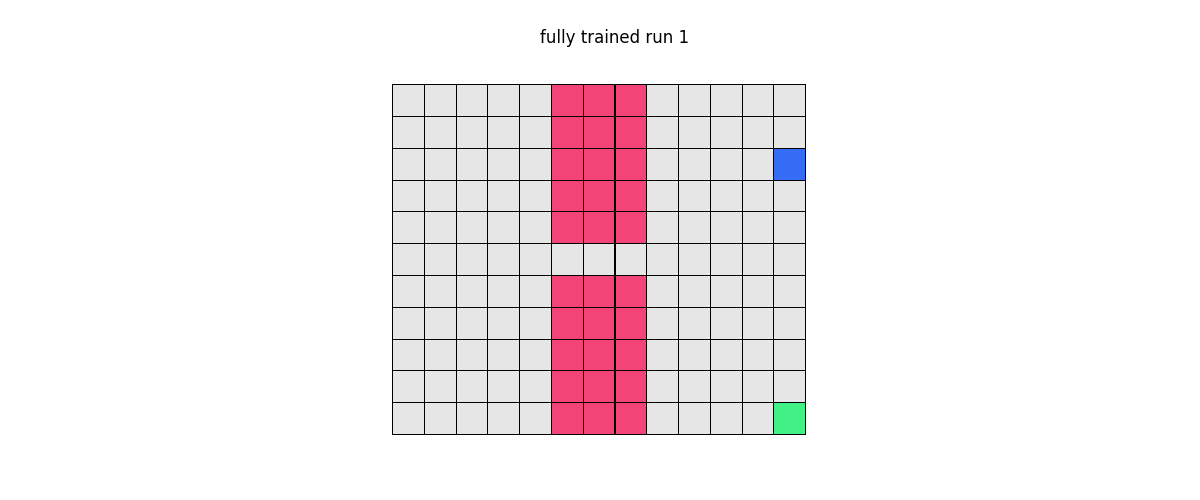
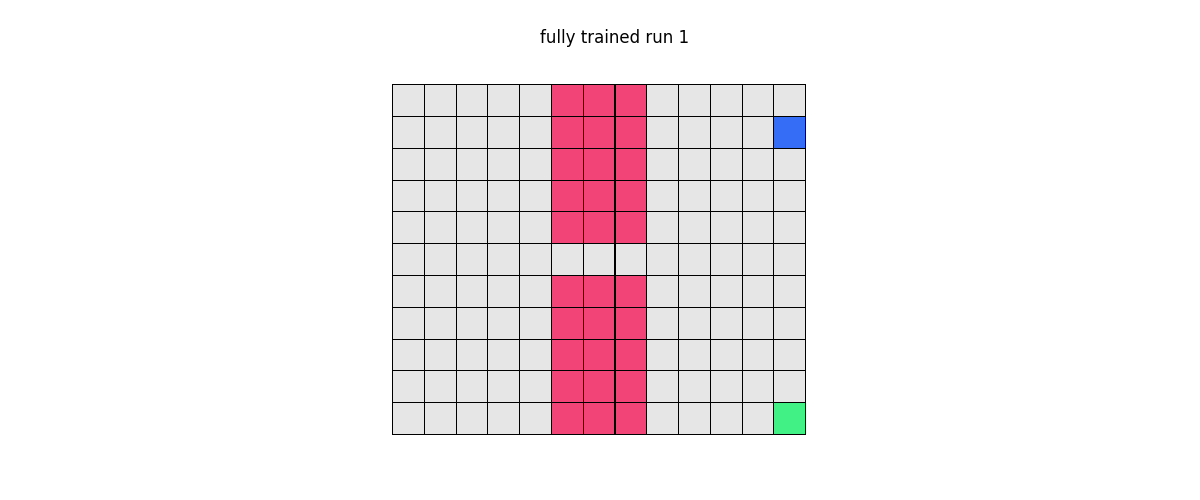
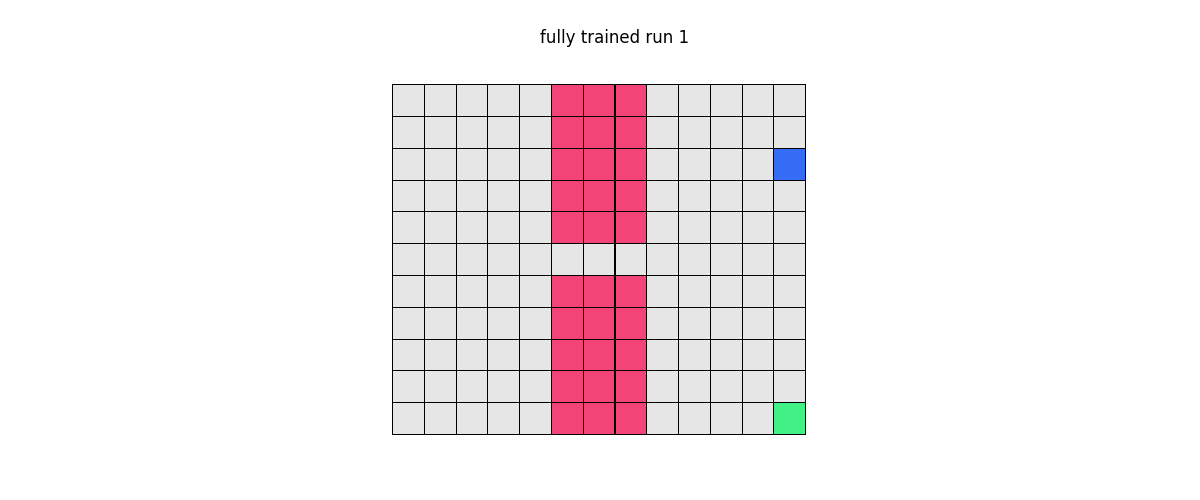
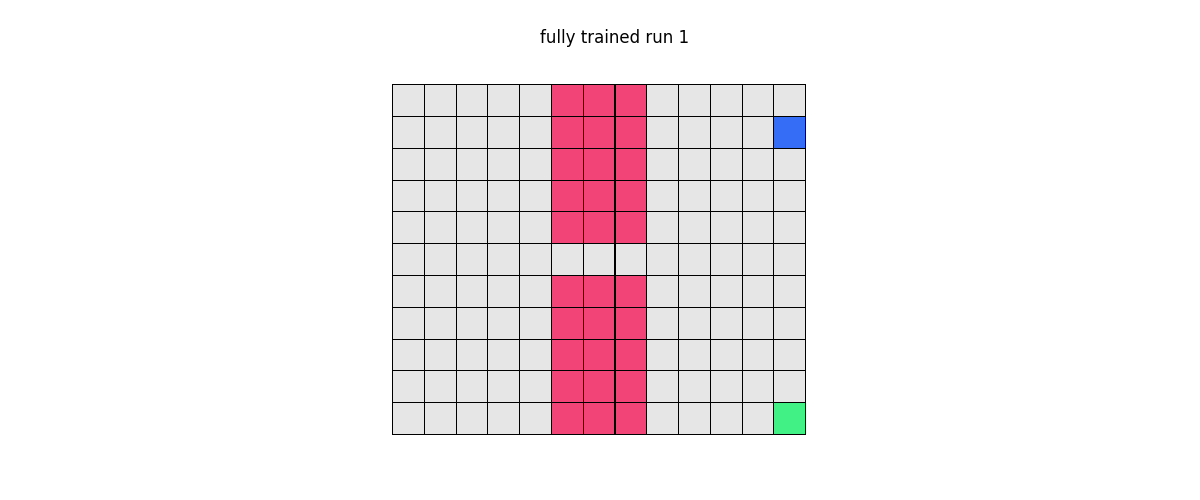
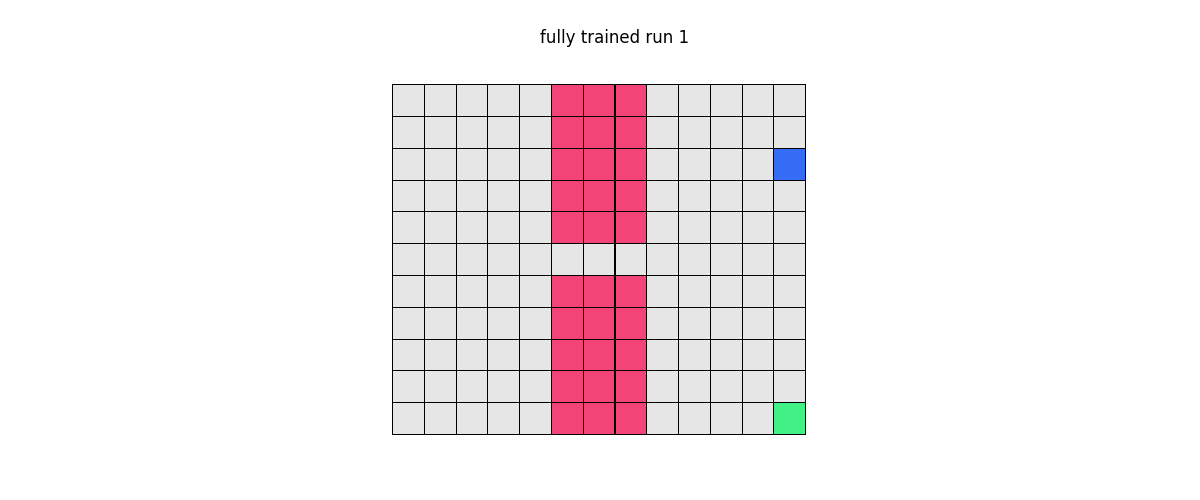
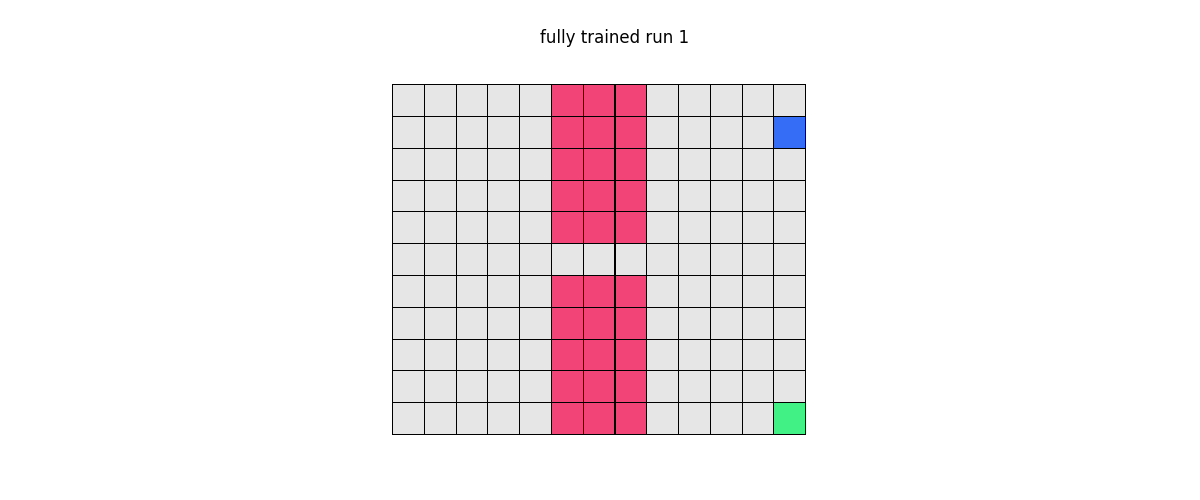
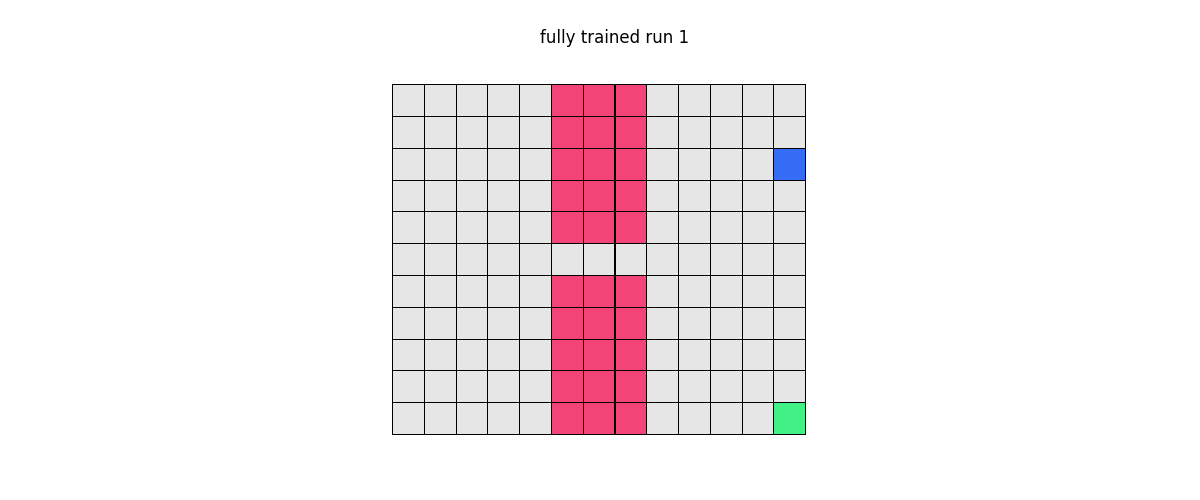
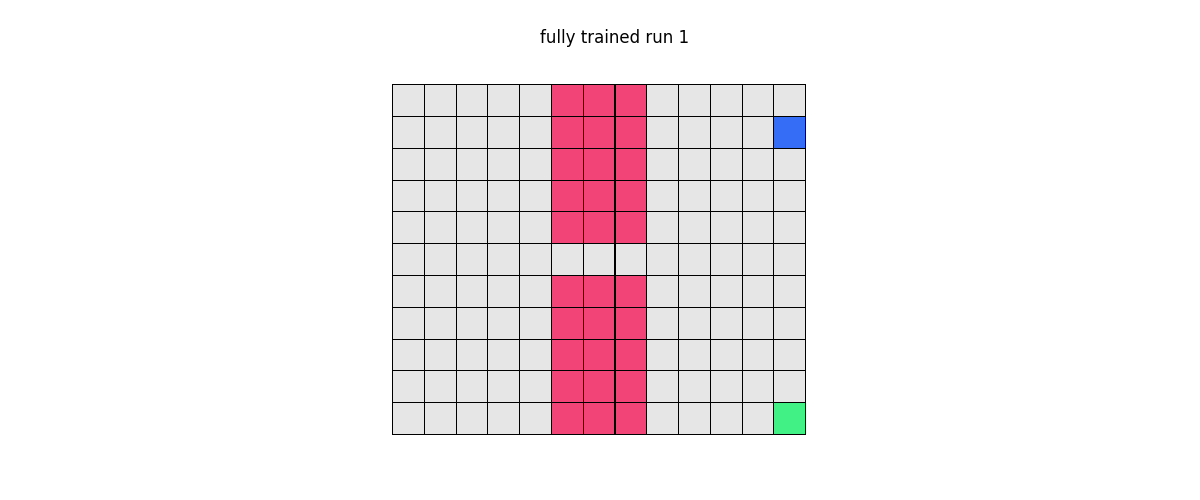
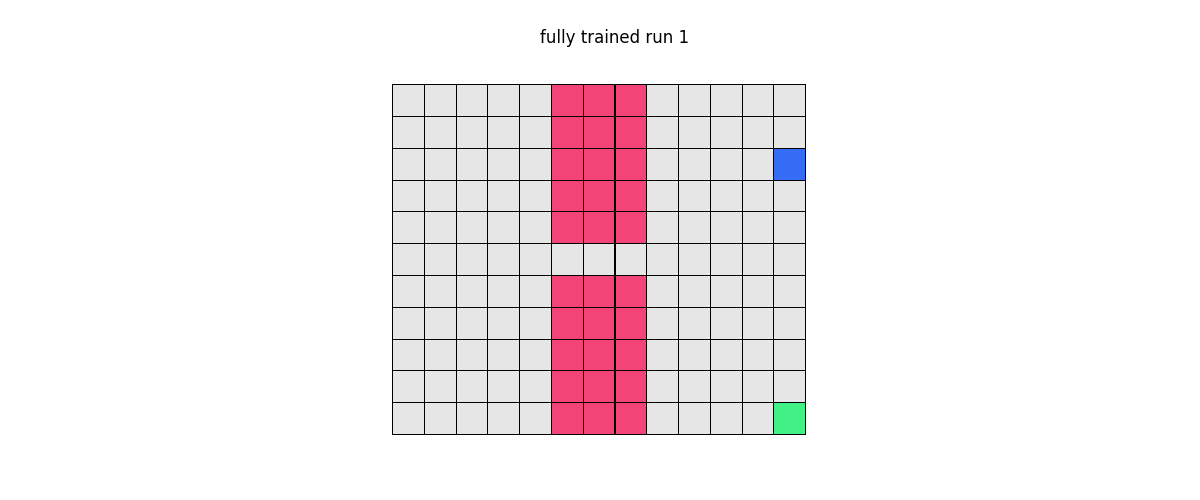
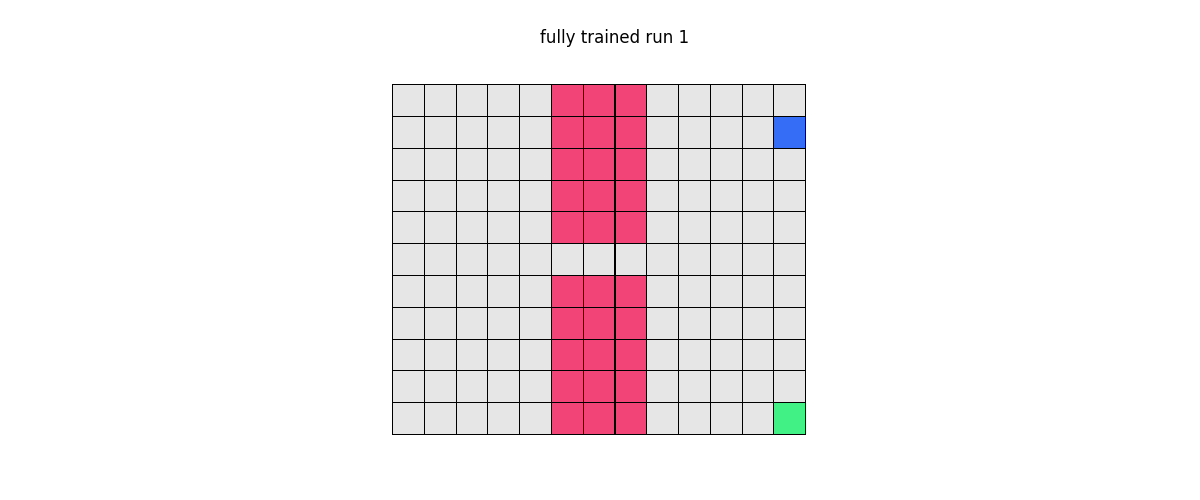
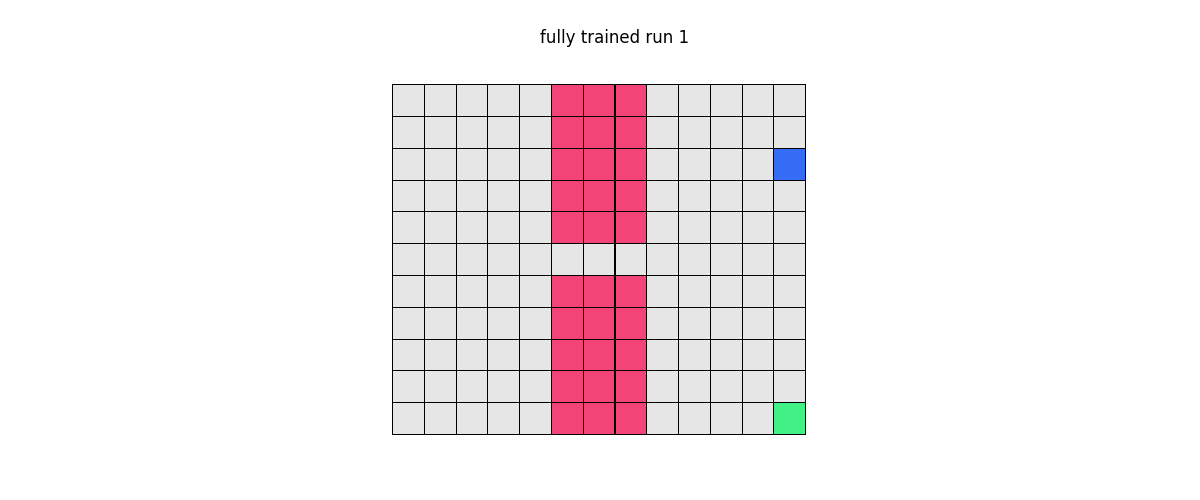
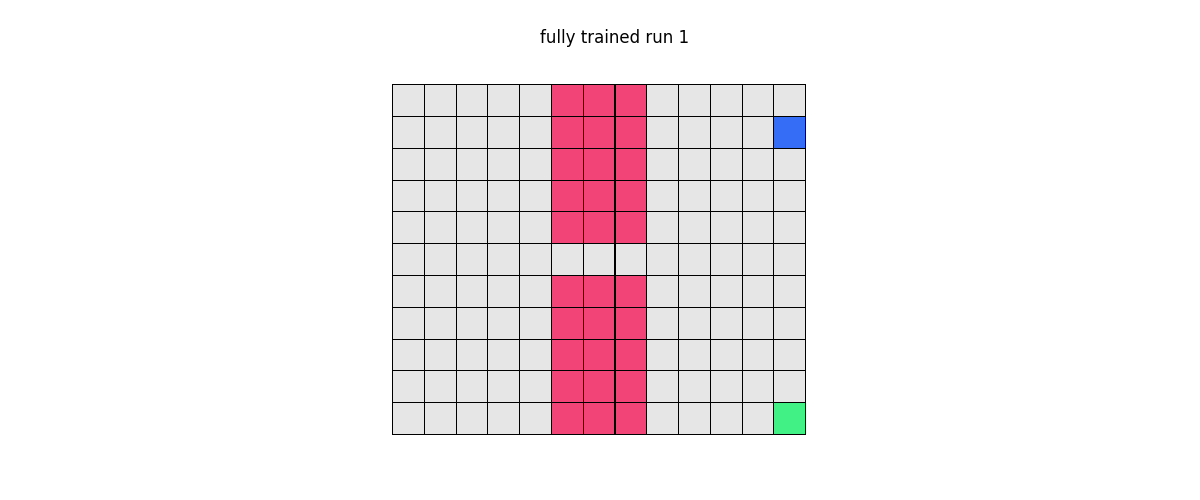
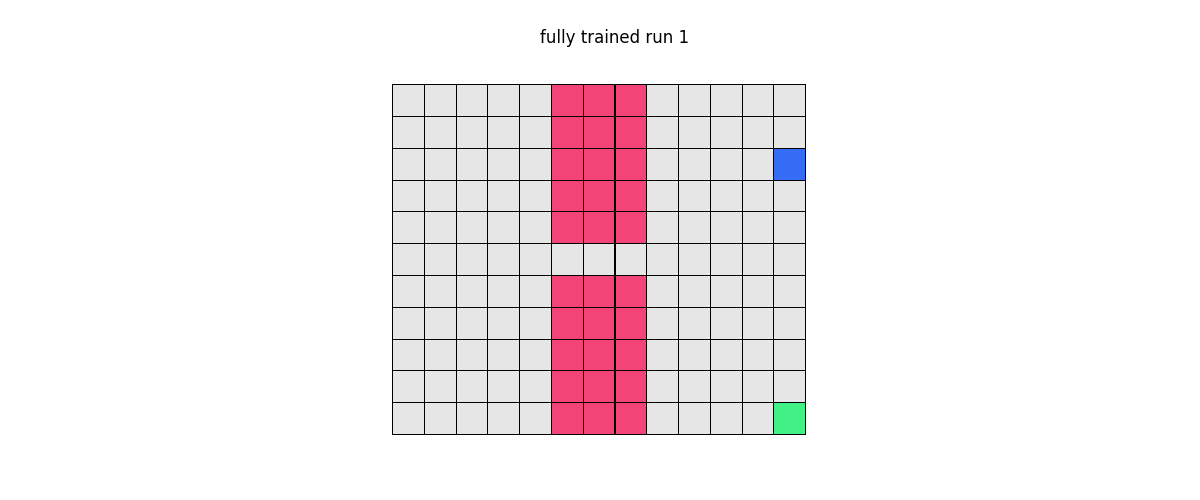
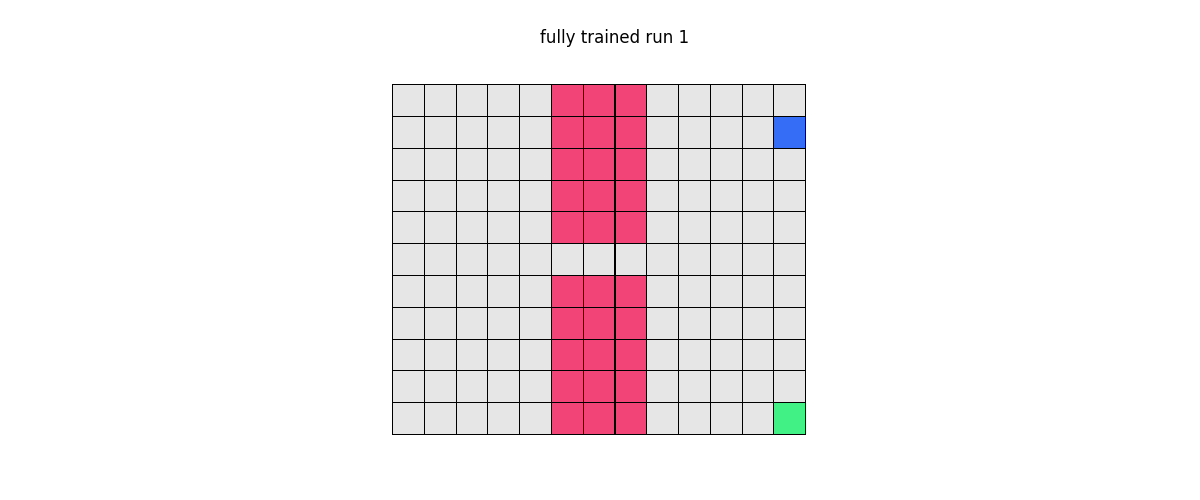
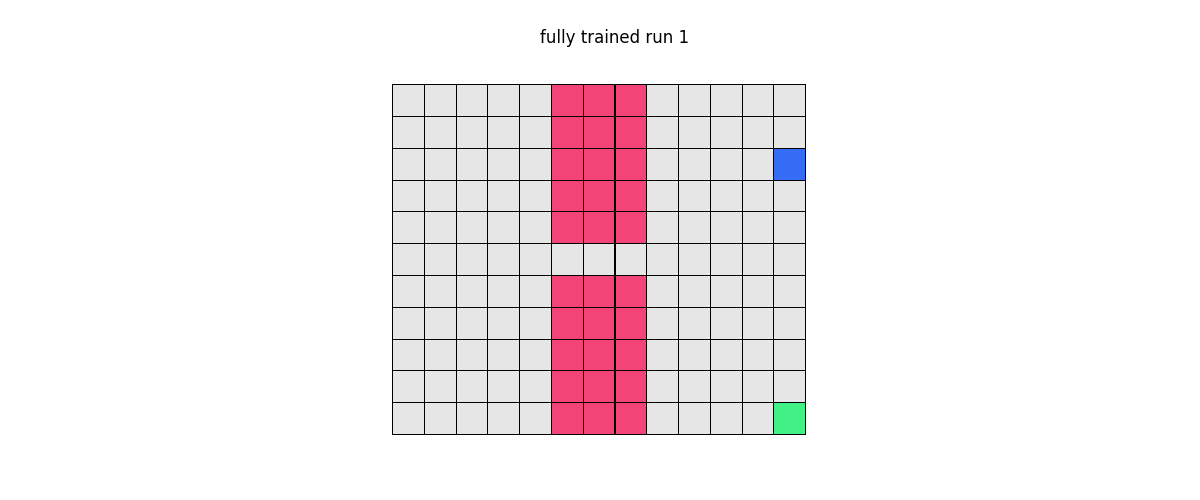
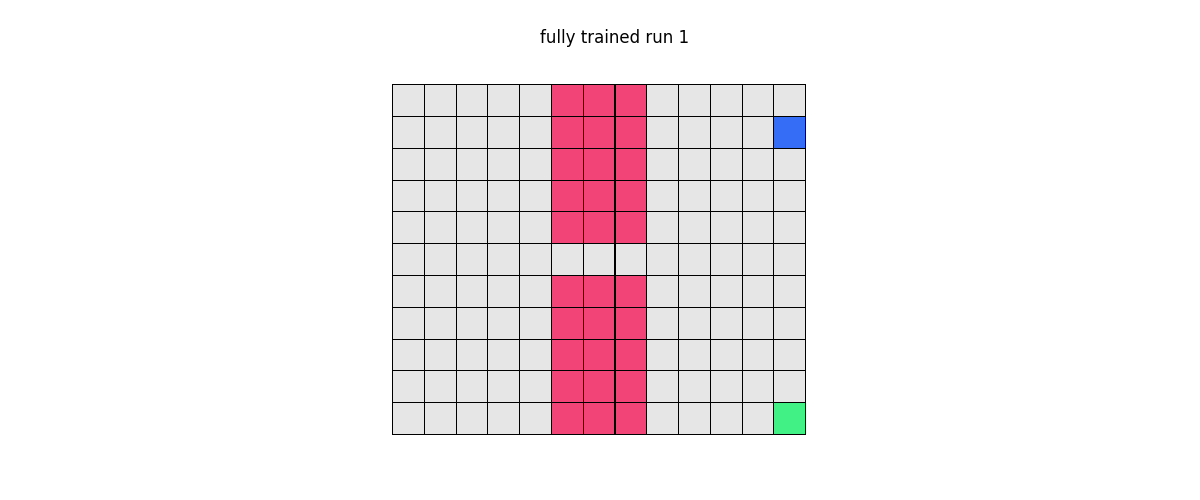
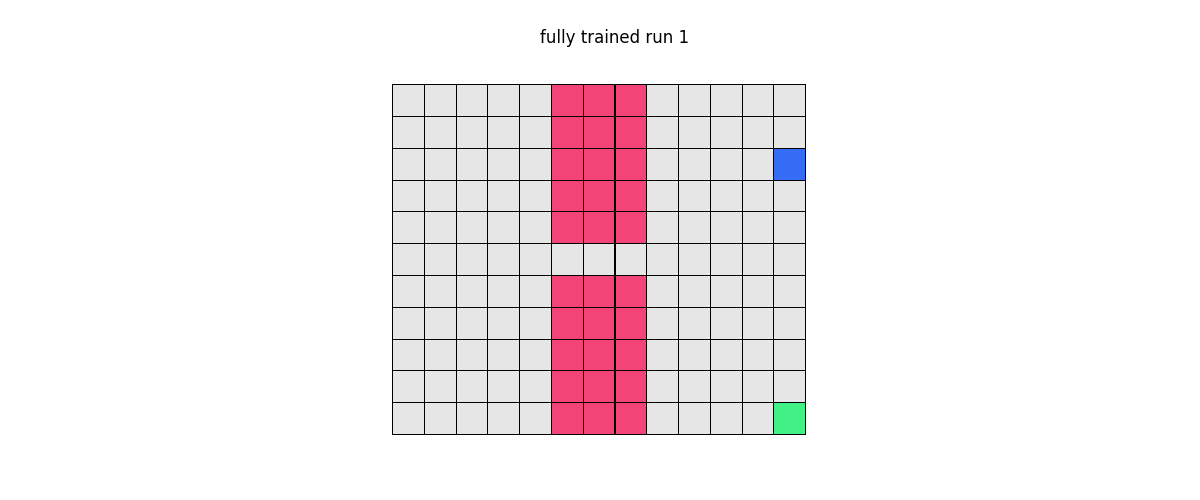
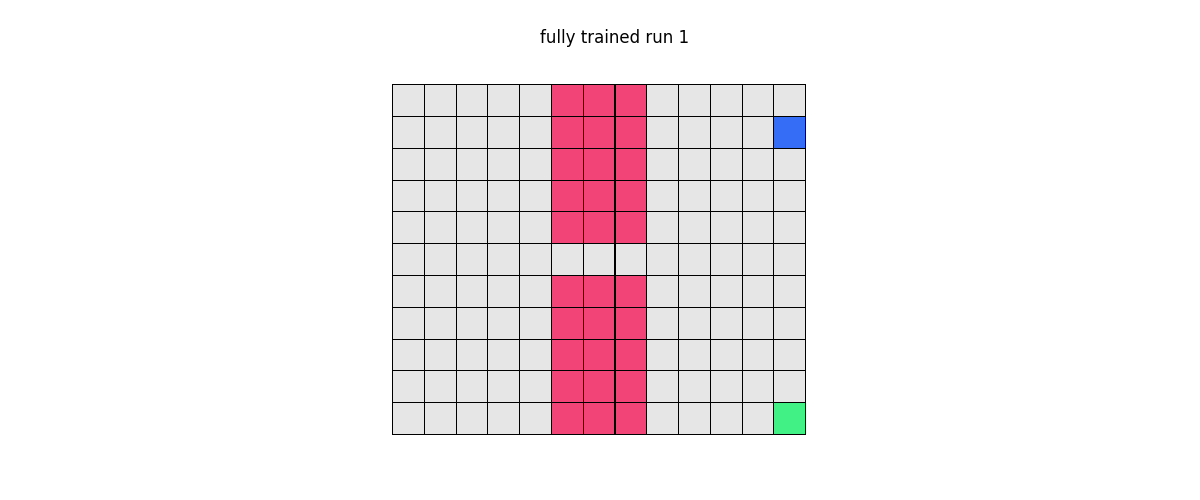
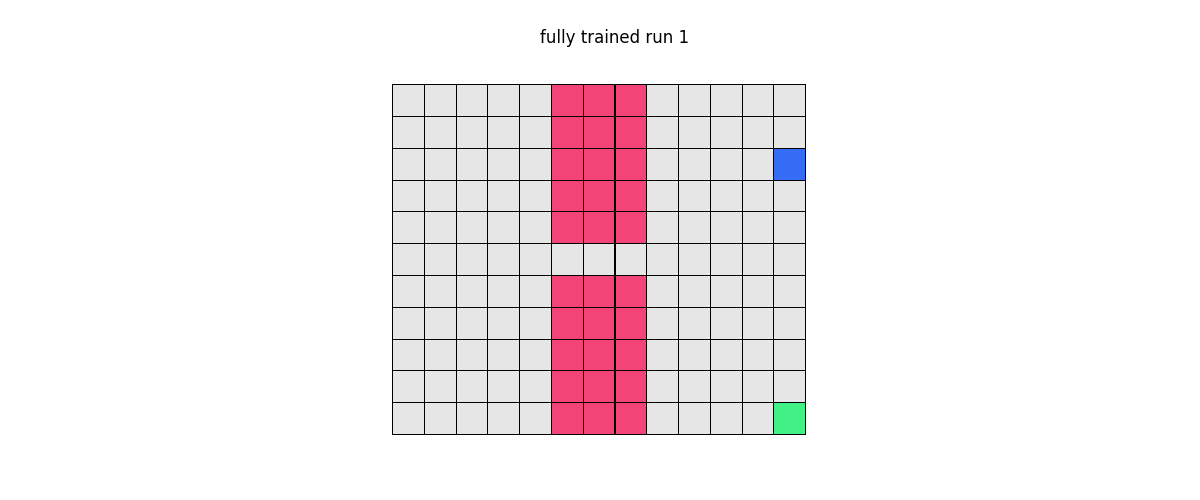
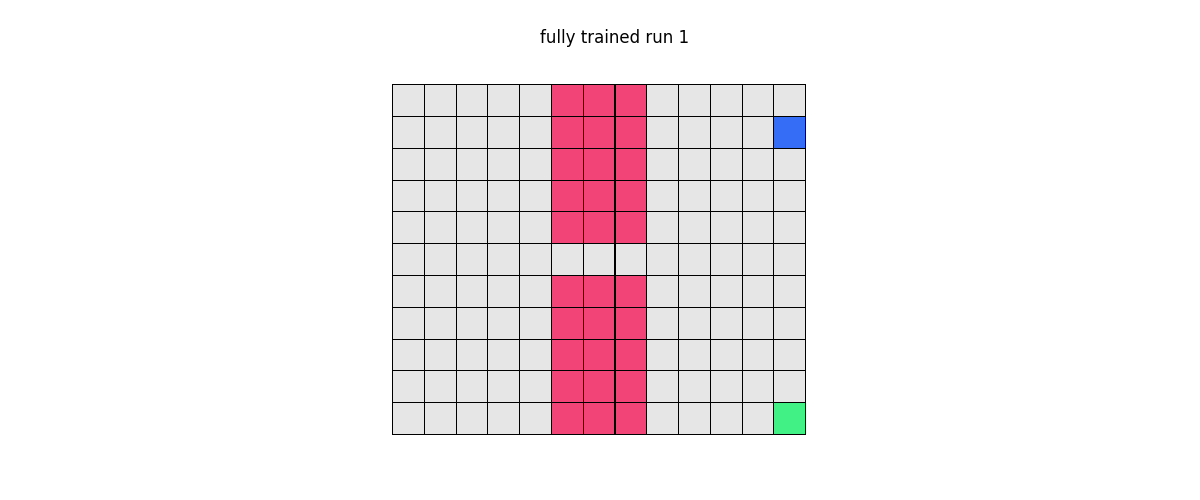
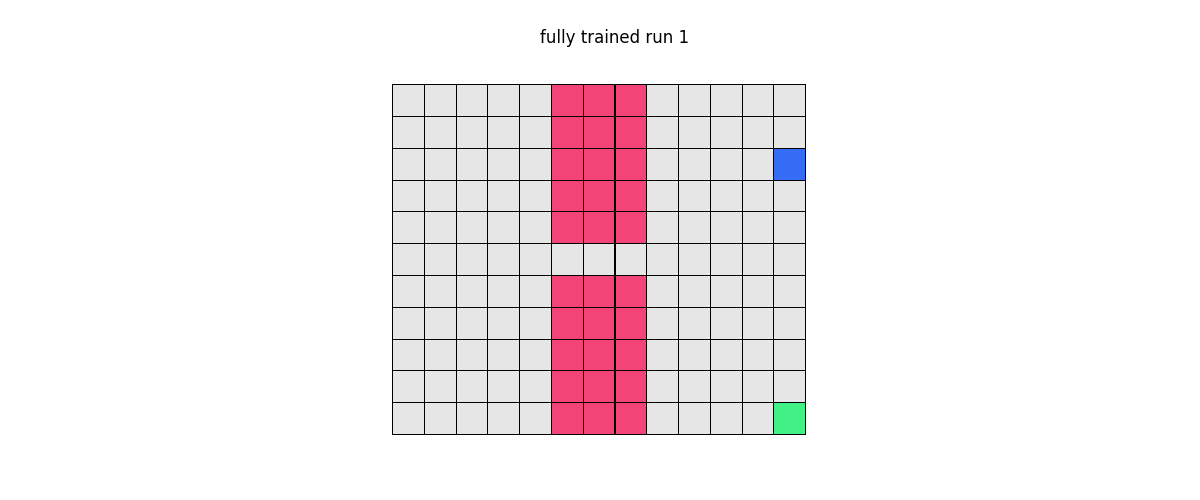
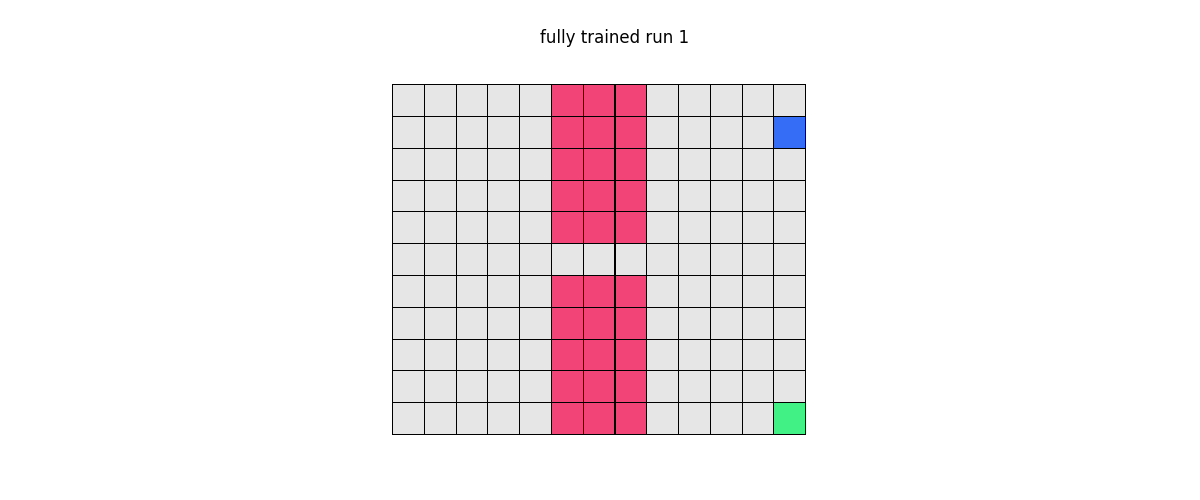
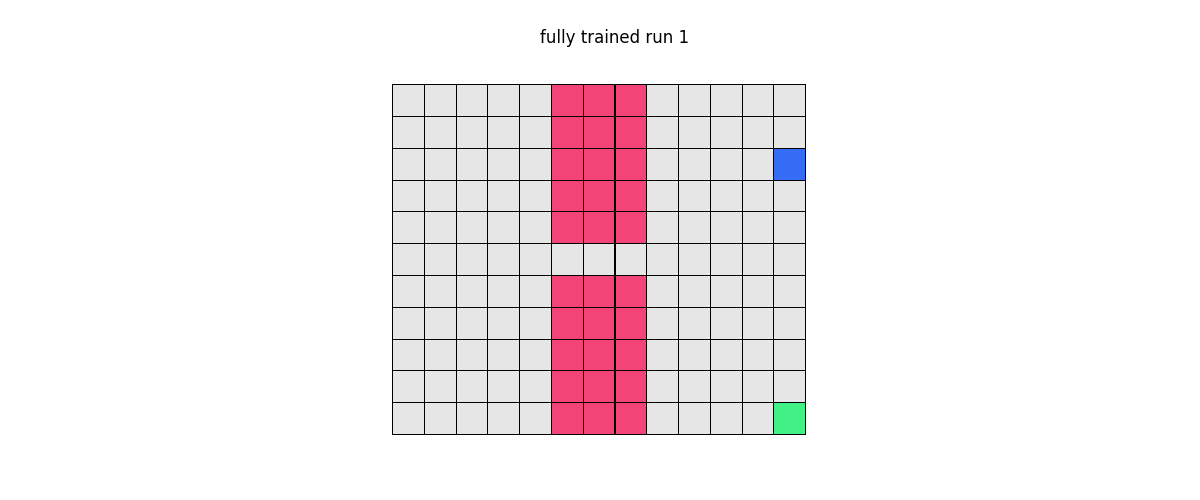
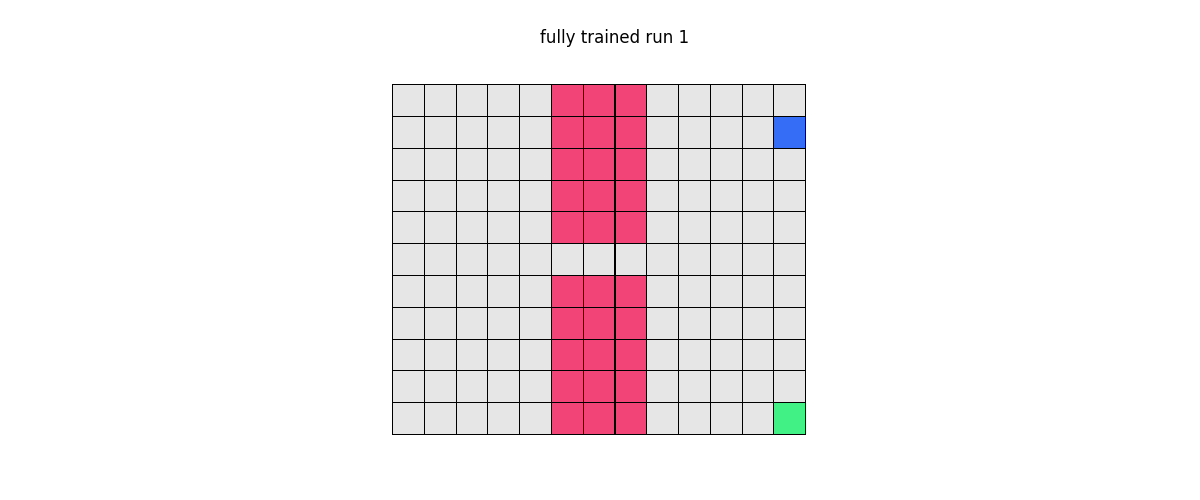
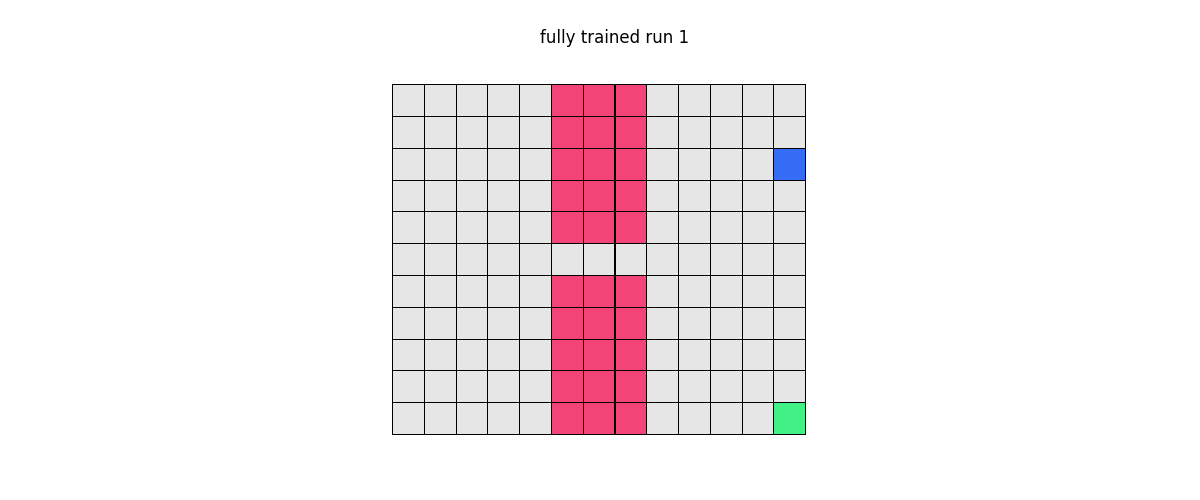
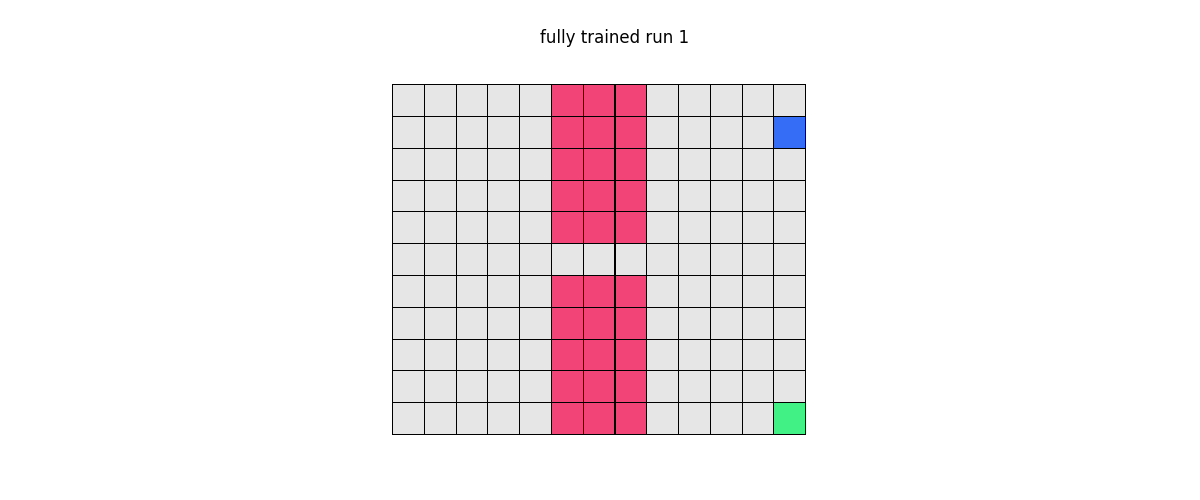
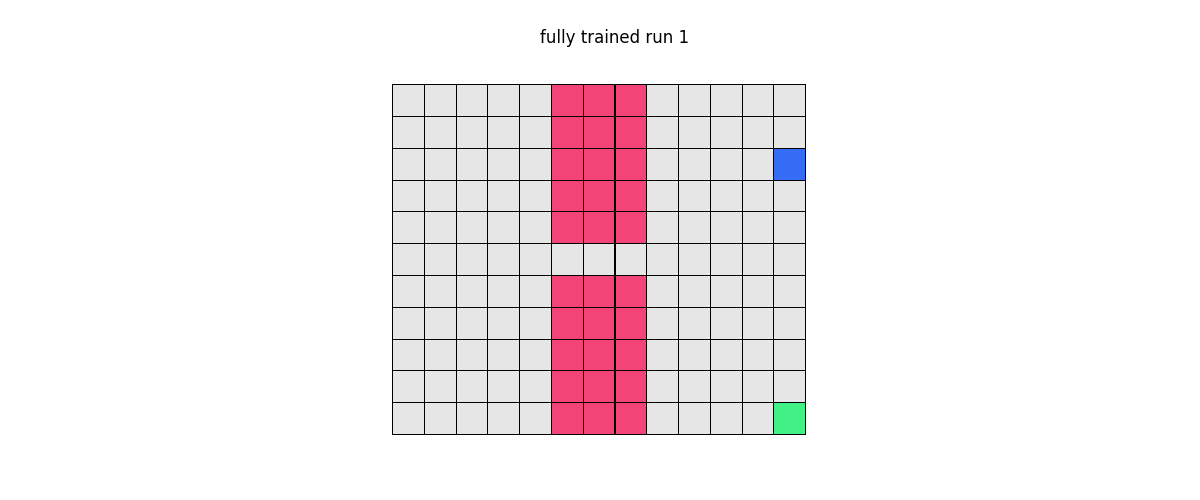
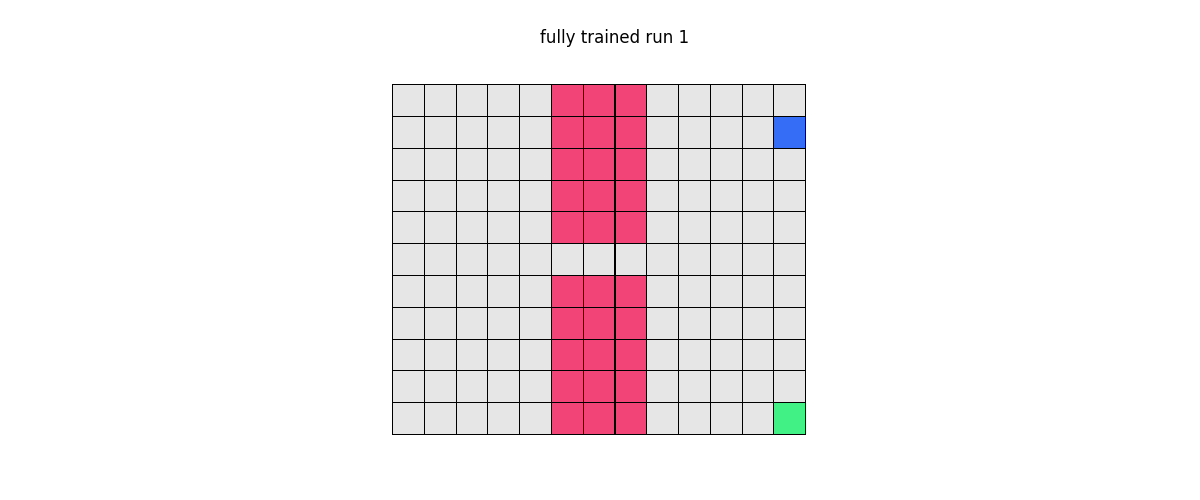
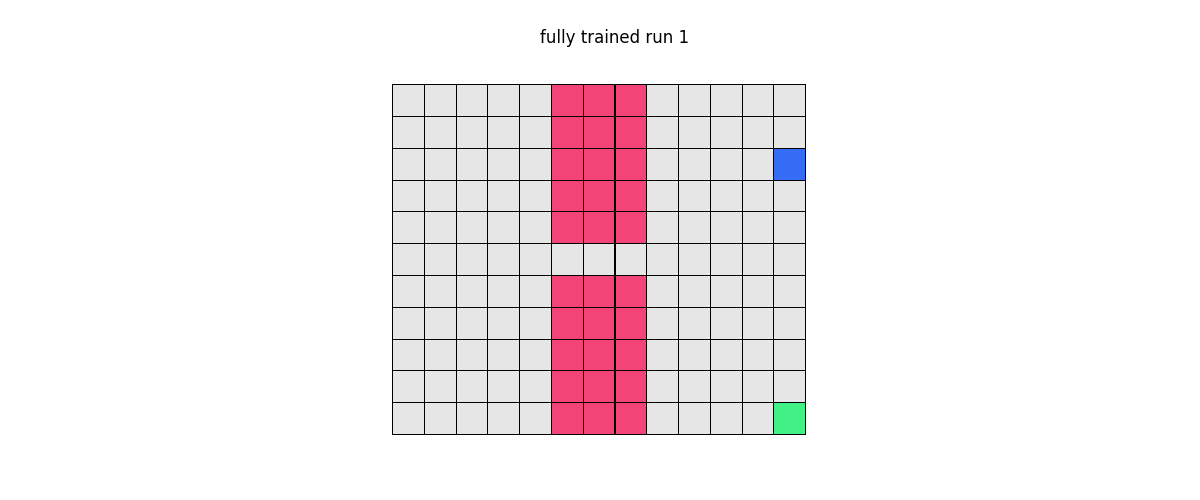
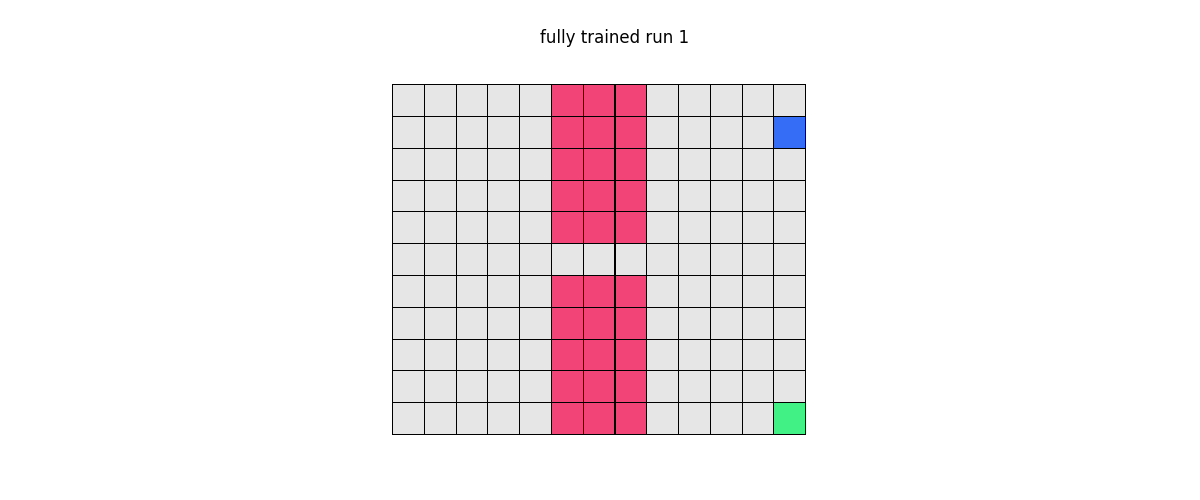
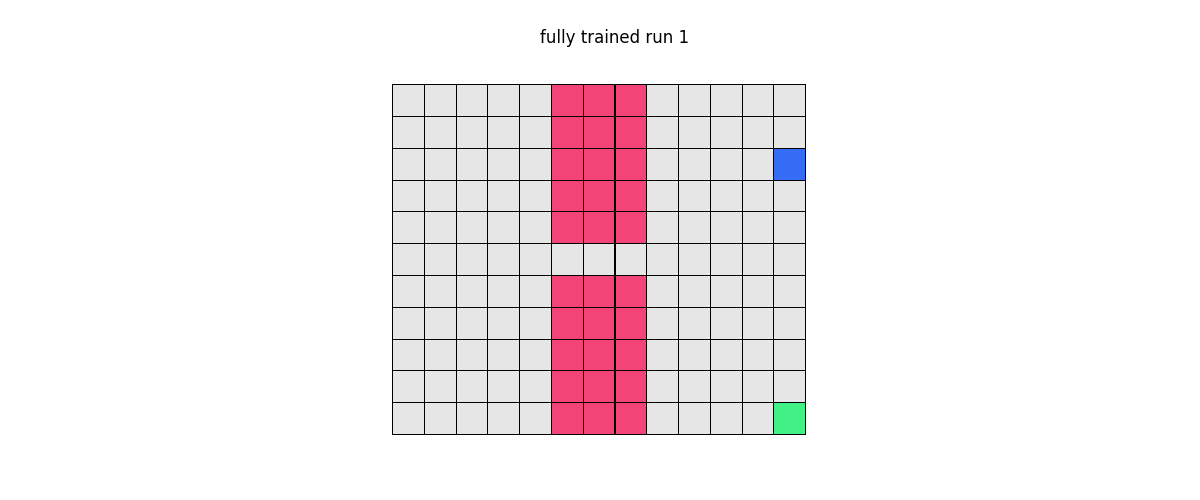
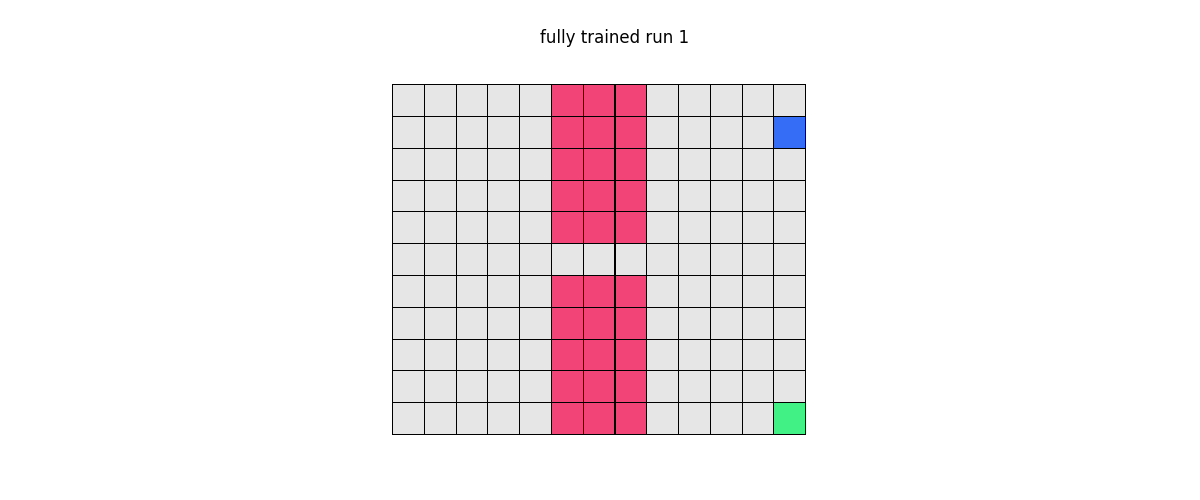

In [8]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

# animate a fully trained agent 
locs = [[0,0]]
animator.animate_validation_runs(gridworld = small_moat,learner = small_maze_qlearner,starting_locations = locs)

## How generalizable is a trained agent?

- Not very.

- But agent gained **all** experience on something very different than what we tested it on.  So - should we be surprised by this 'failing'?  No.   

- To demand this is like expecting an object detector - trained to recognize human faces on a large set of images - to accurately detect cars in a new set of images.

- AI / machine learning is all about creating pattern recognizers that - when trained properly on a dataset - generalize from what they have seen in training to making accurate predictions on new input data.  If a pattern recognizer isn't trained on the sort of data we would like it to recognize in the future we can't expect miracles to happen.  

# Simple yet powerful enhancements to Q-Learning

## Exploration-exploitation tradeoff

- in basic Q-Learning algorithm choose *random actions* during training

- This helps explore the space, but not effecient


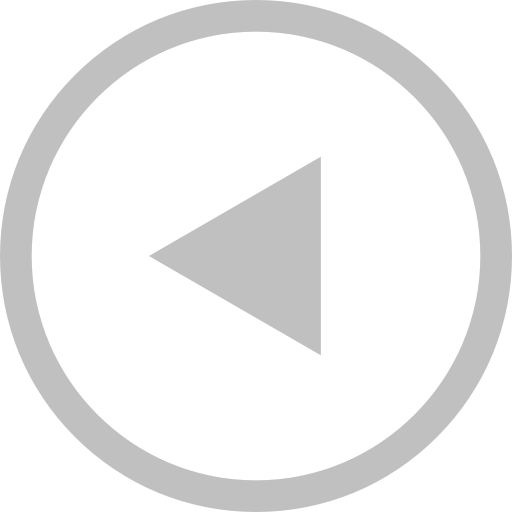
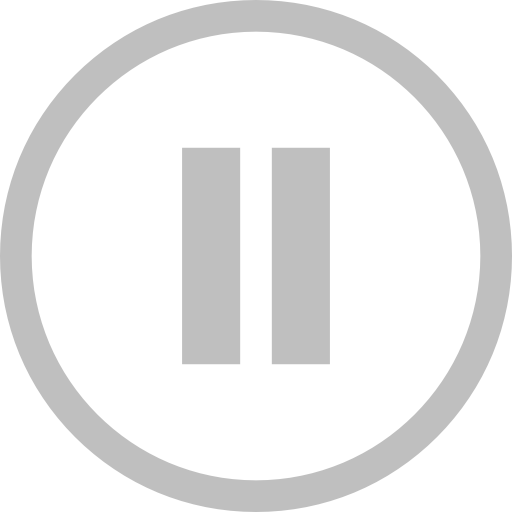
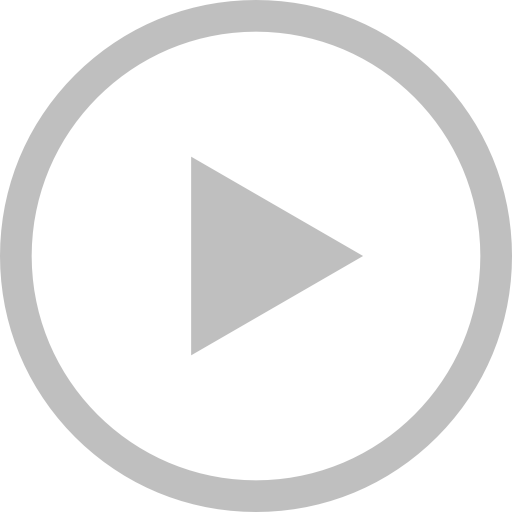
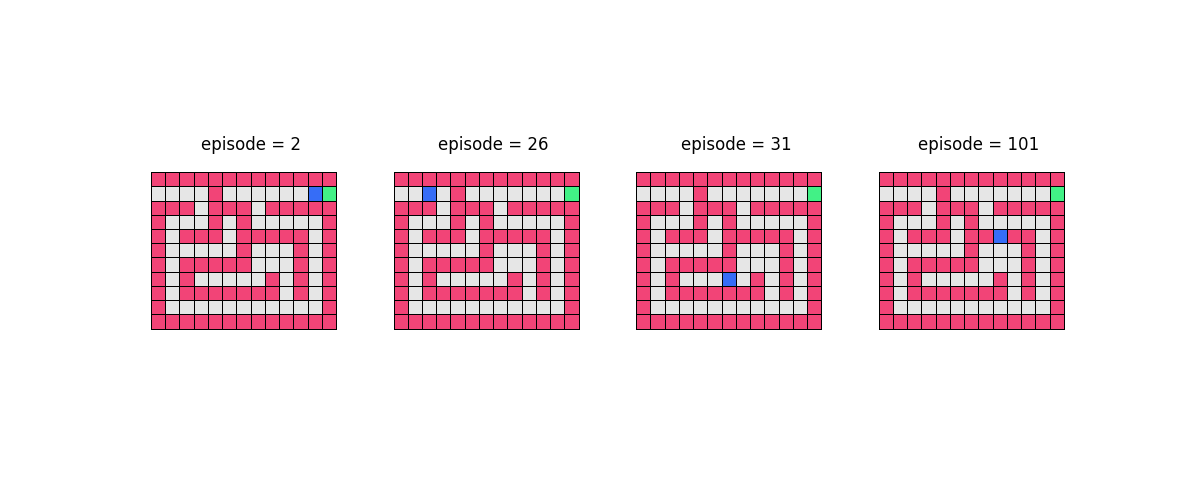
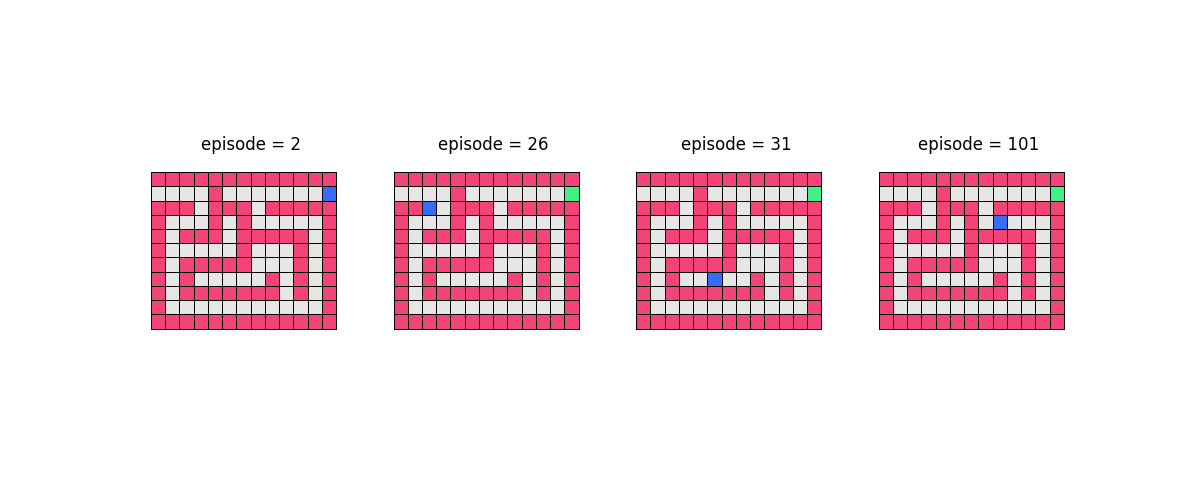
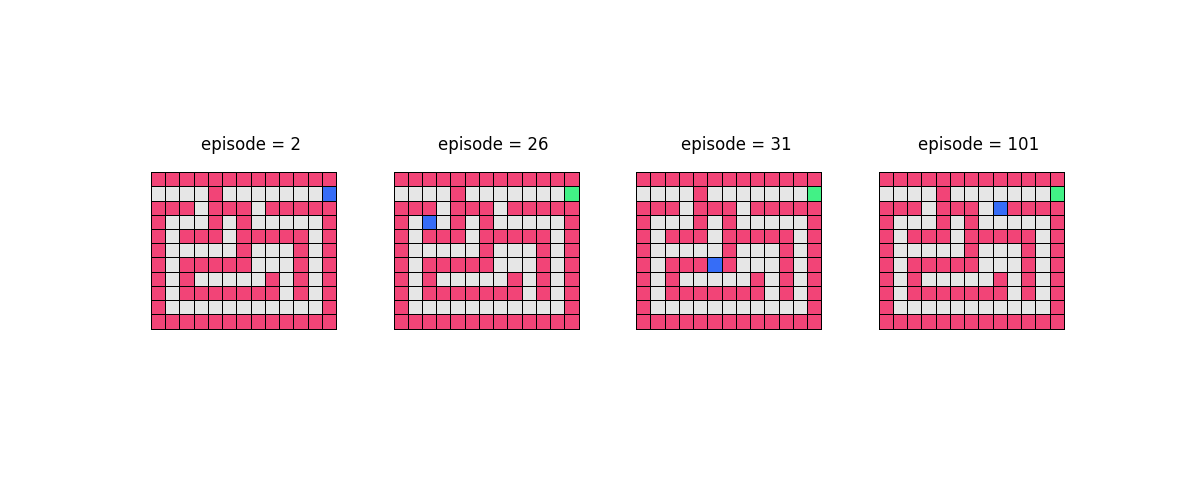
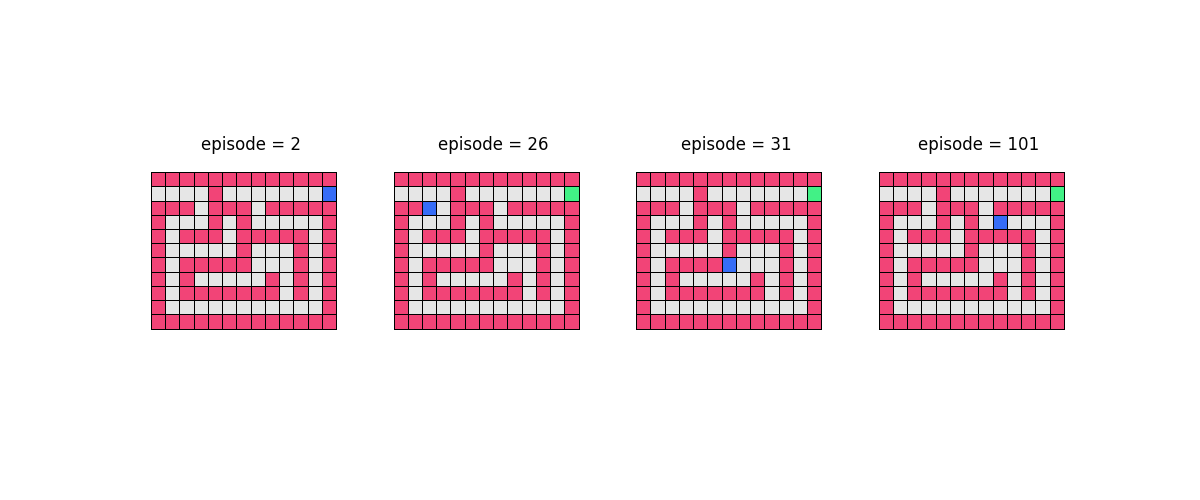
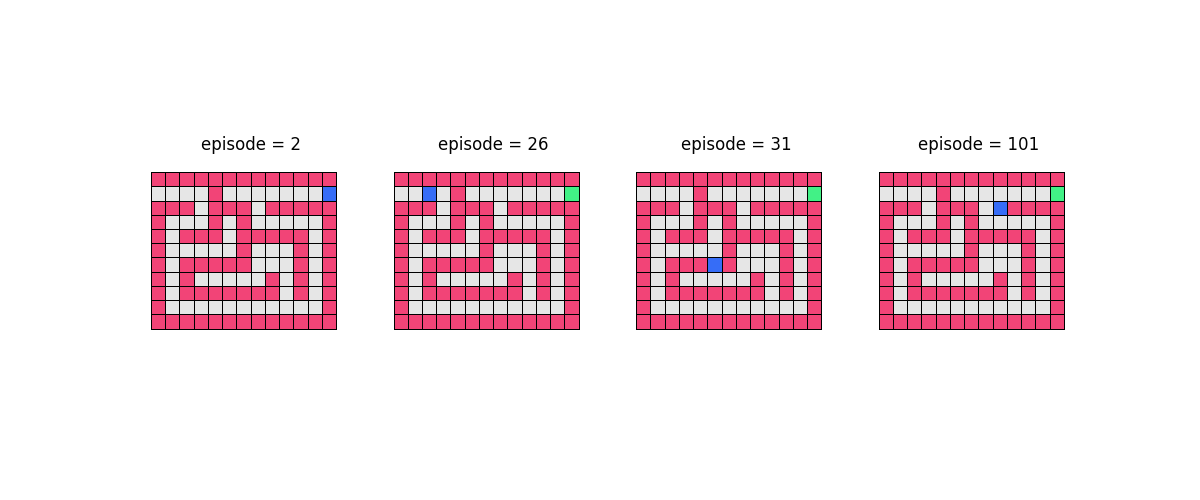
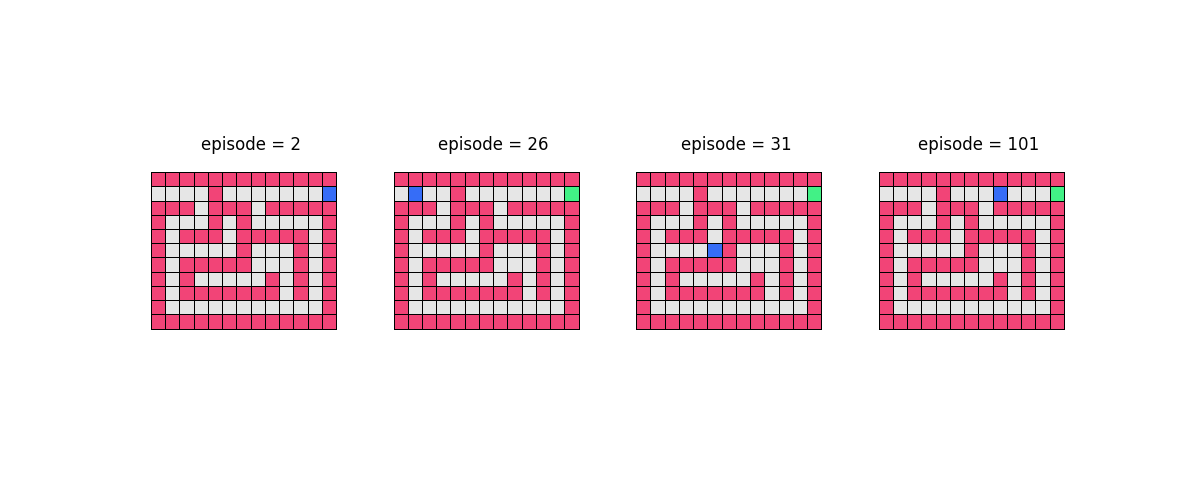
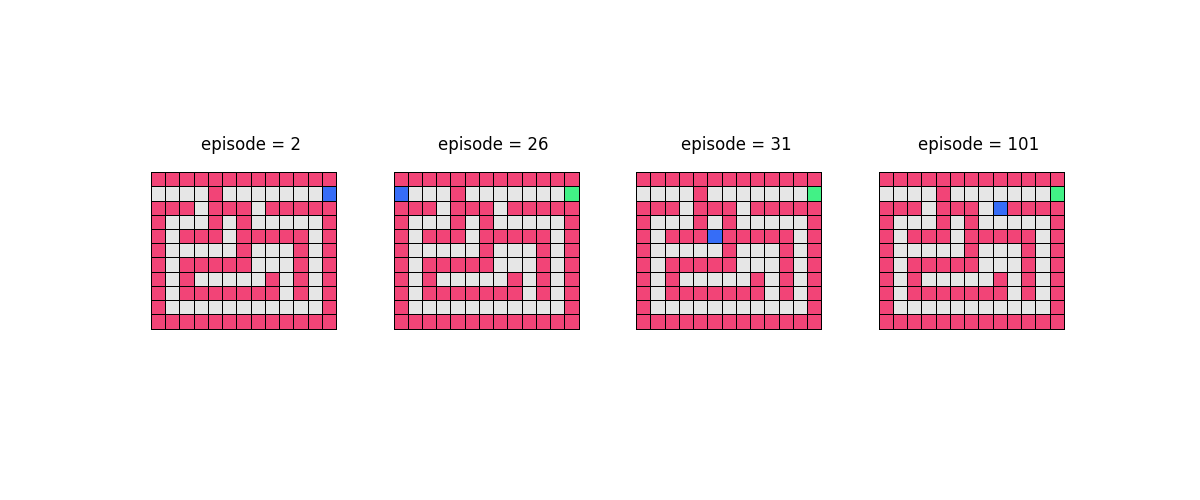
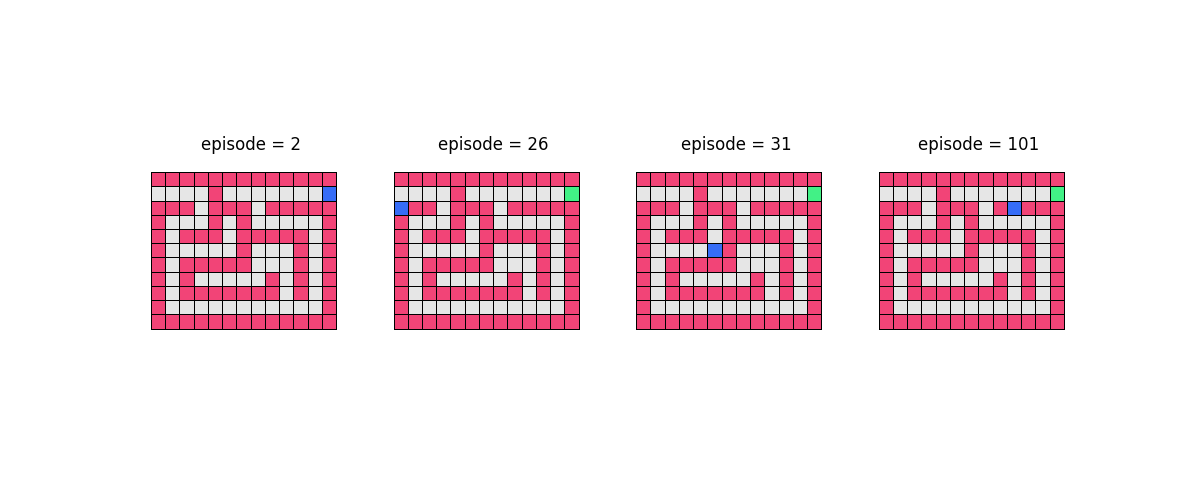
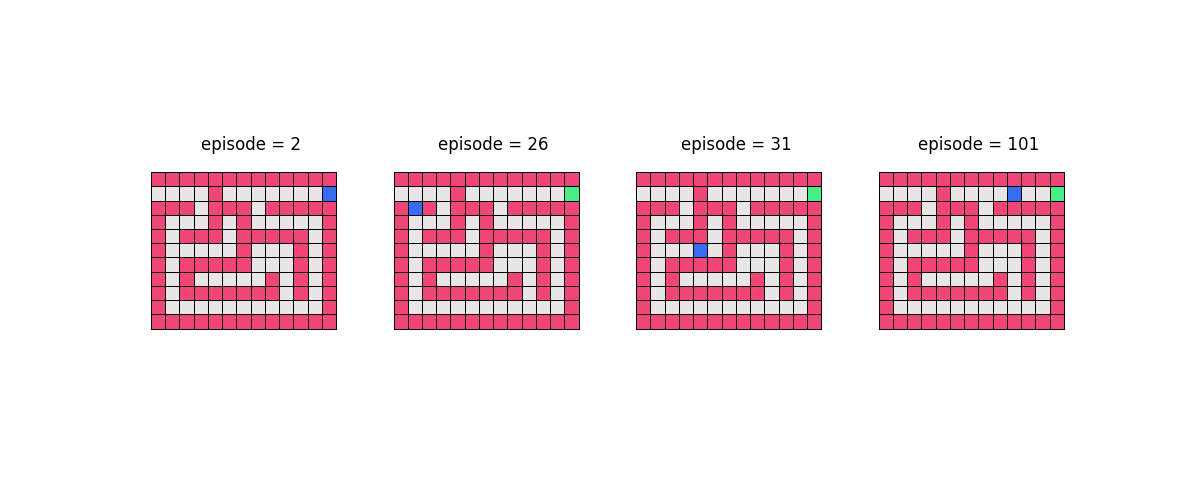
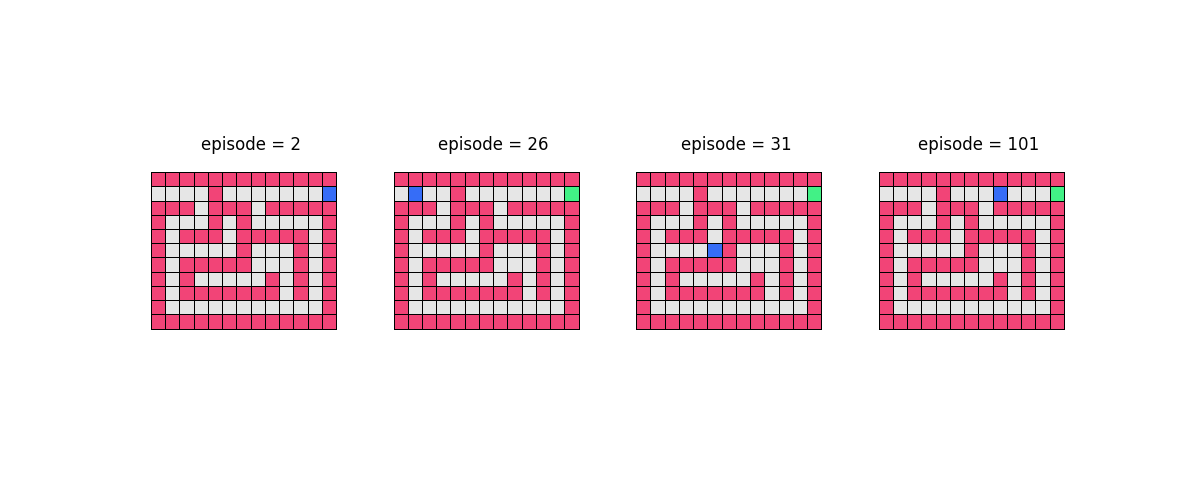
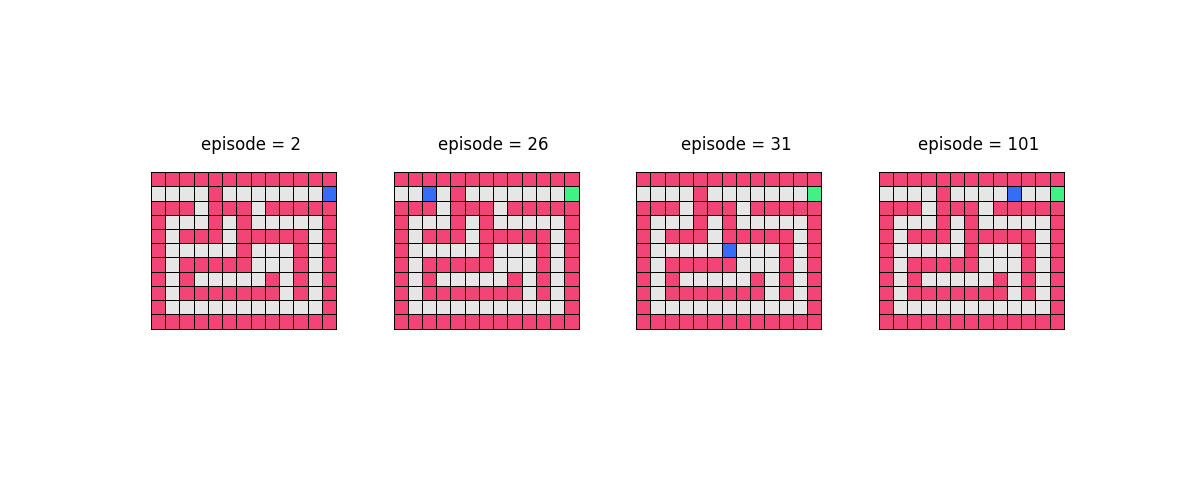
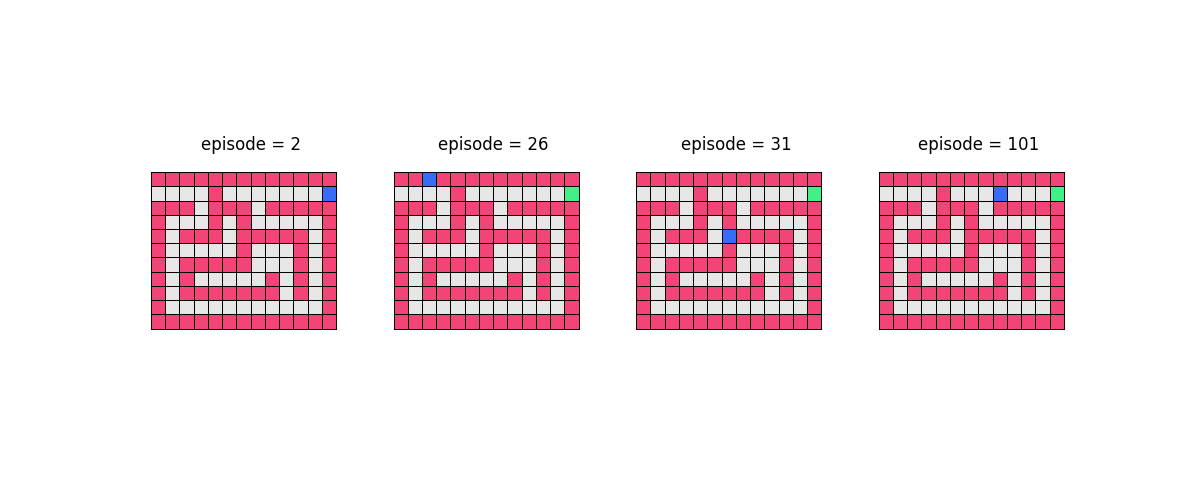
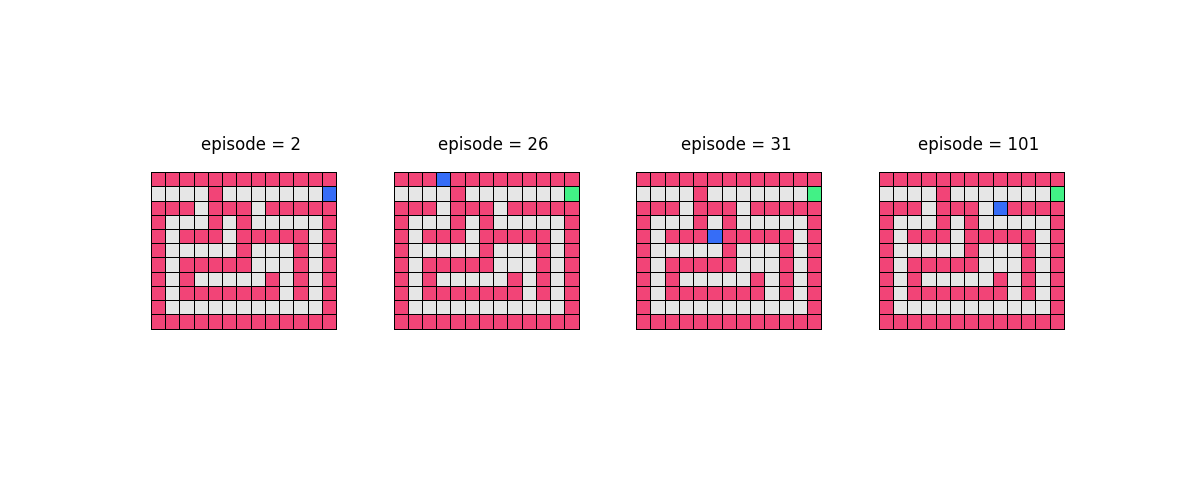
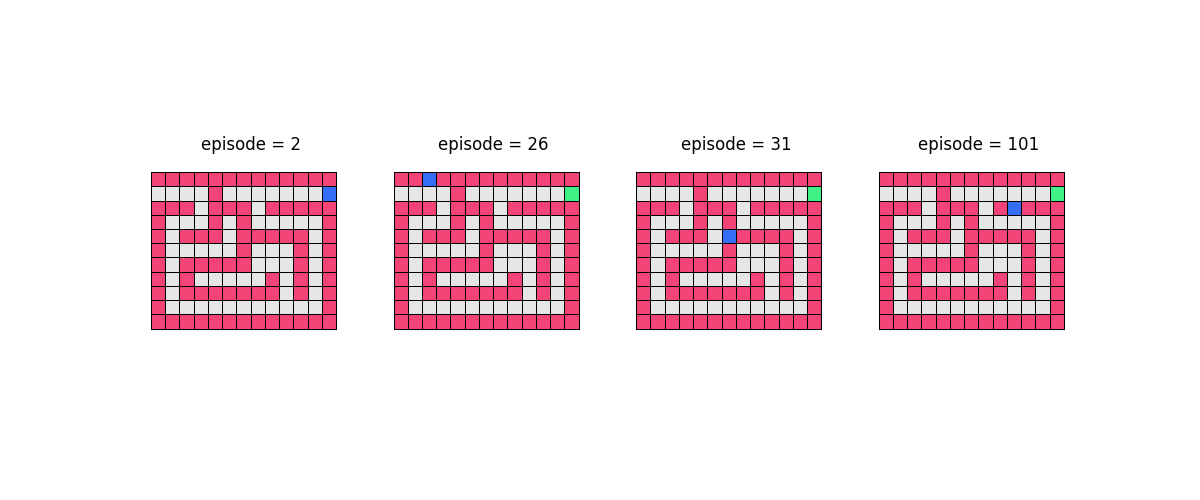
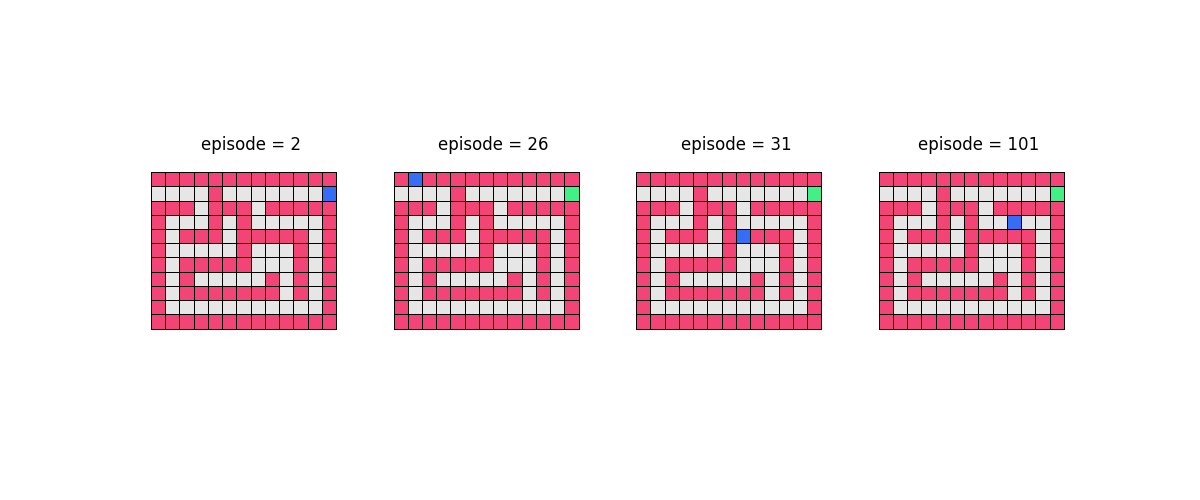
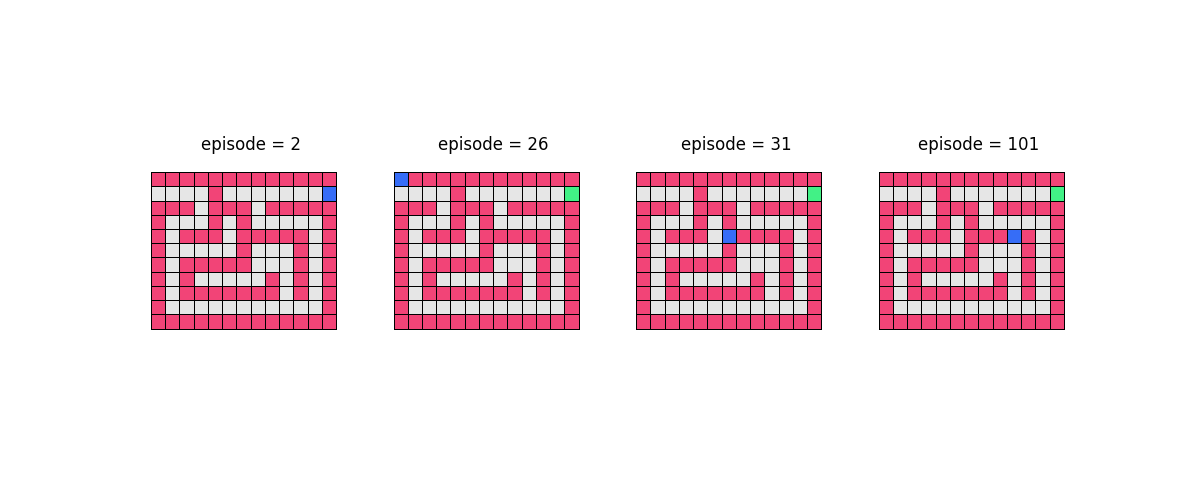
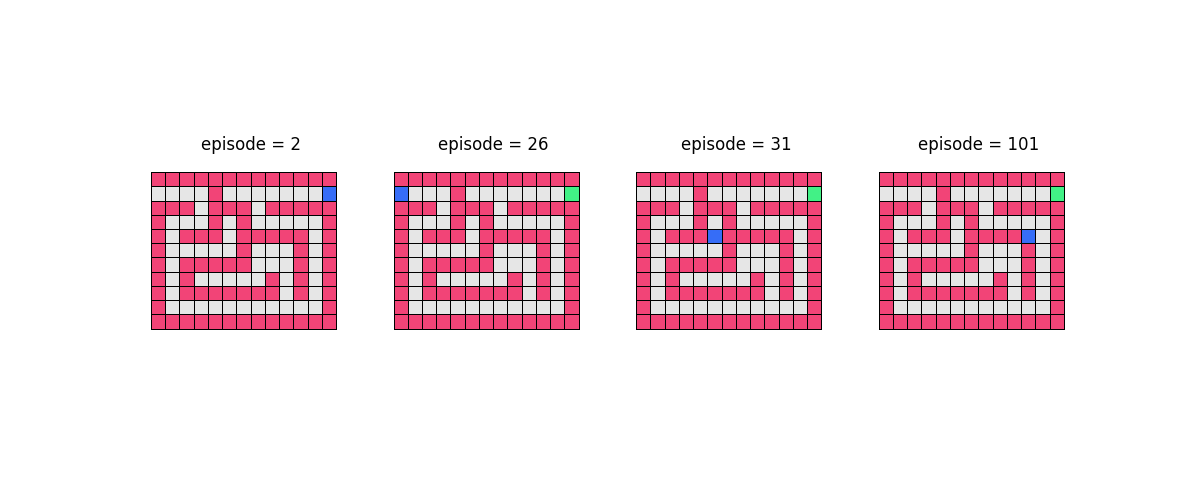
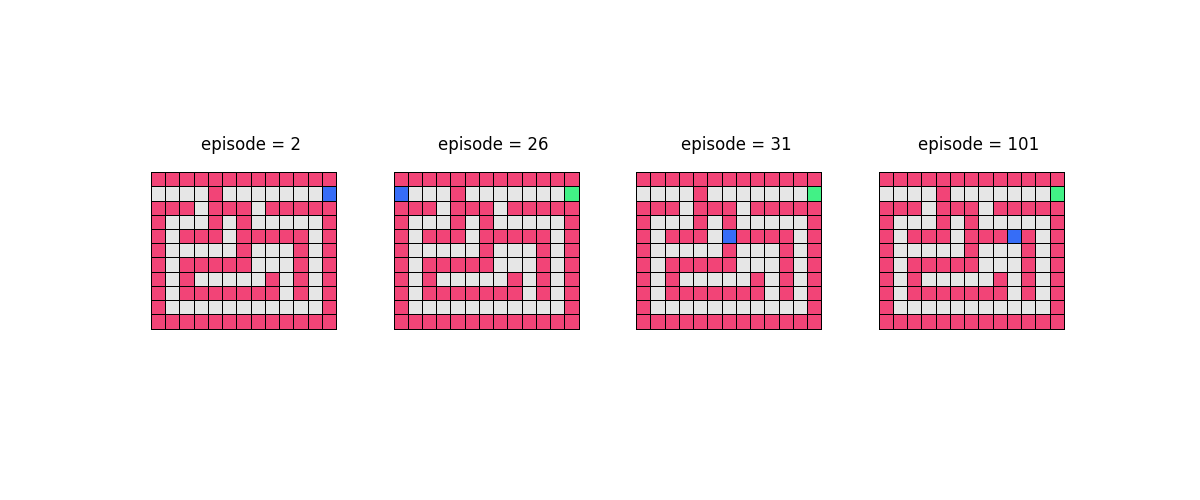
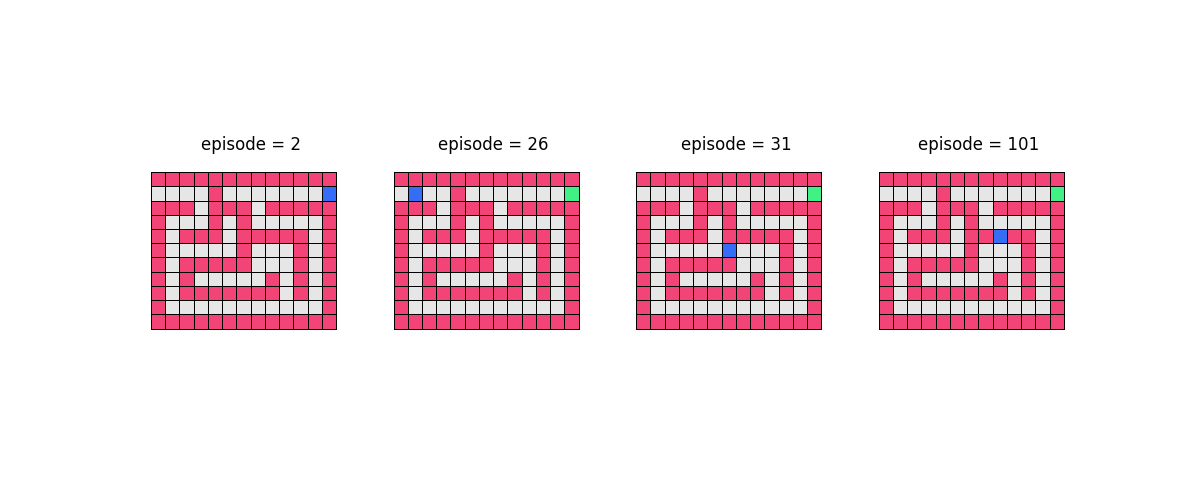
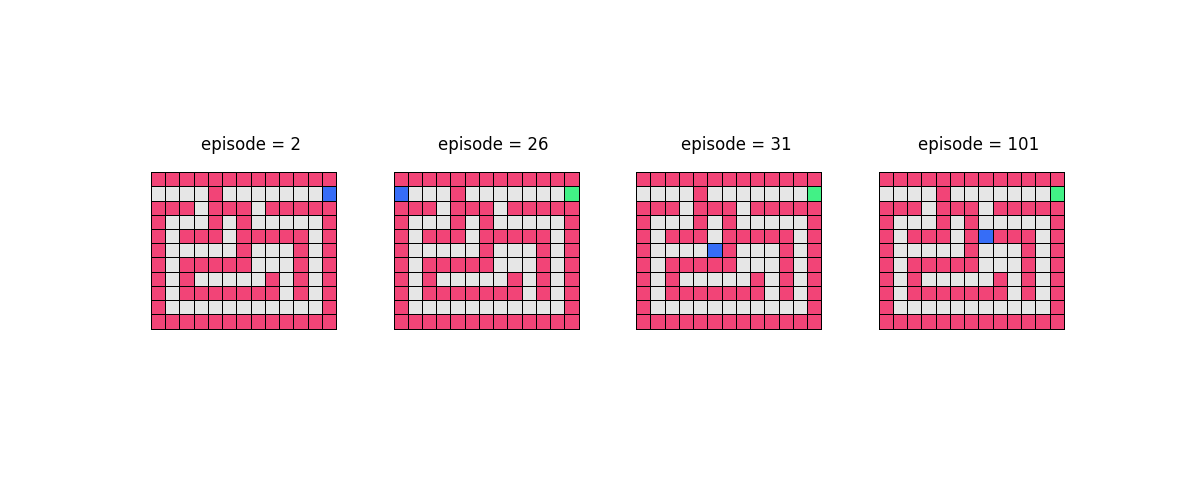
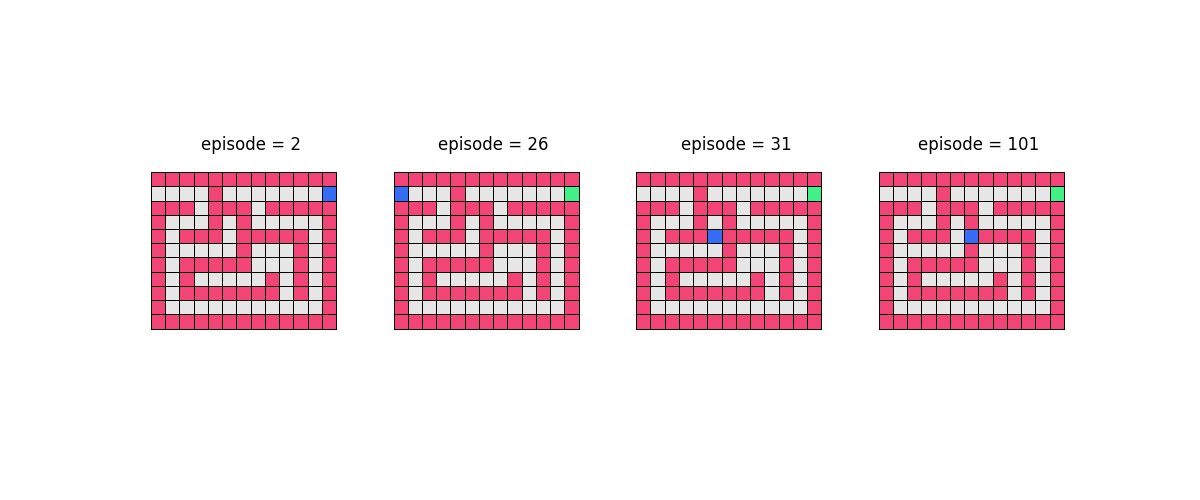
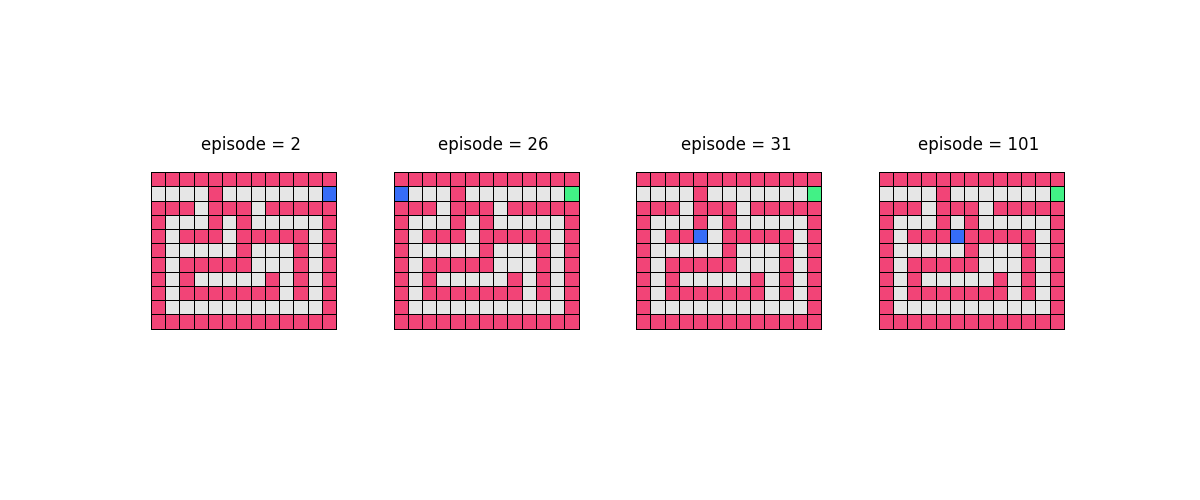
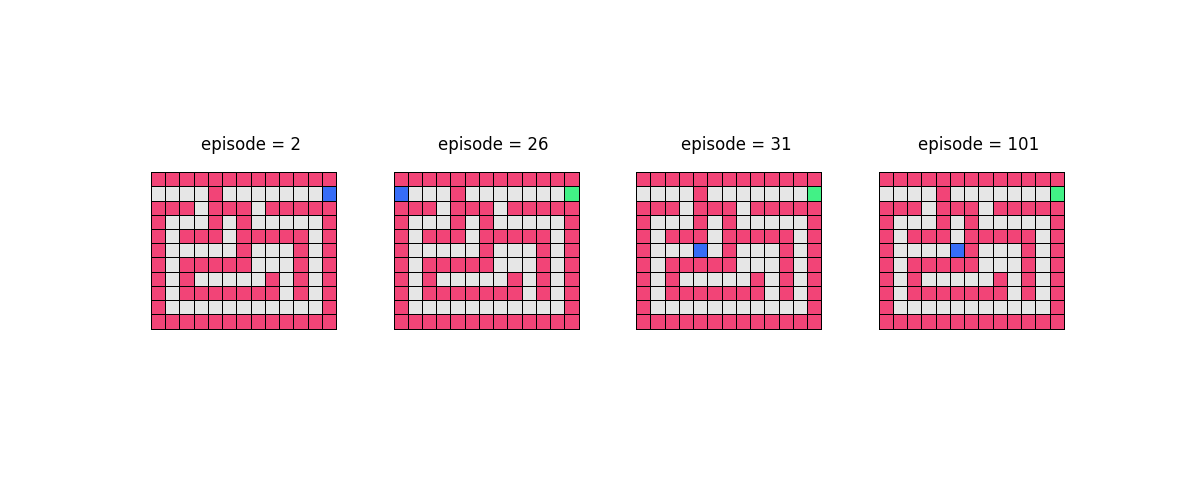
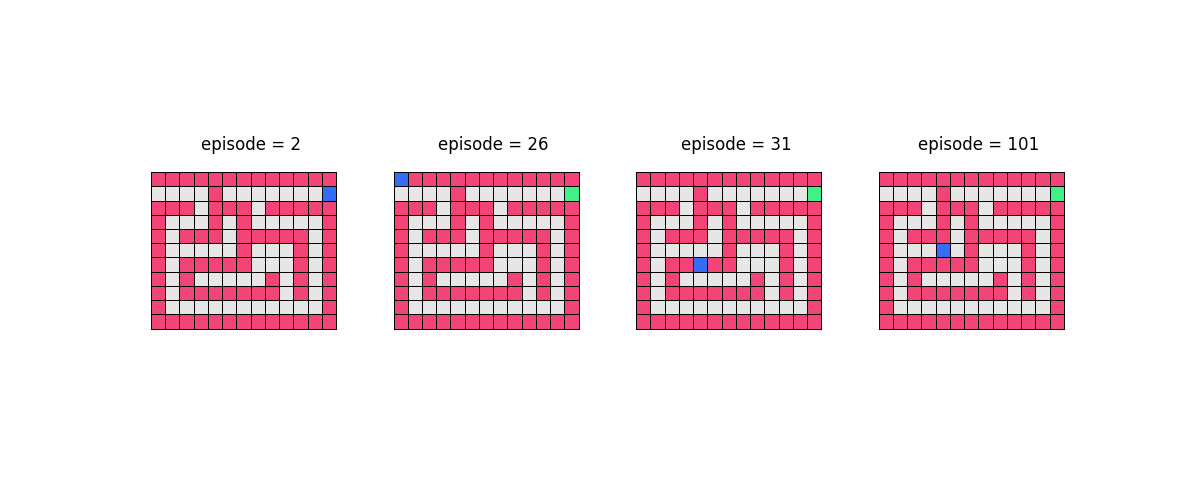
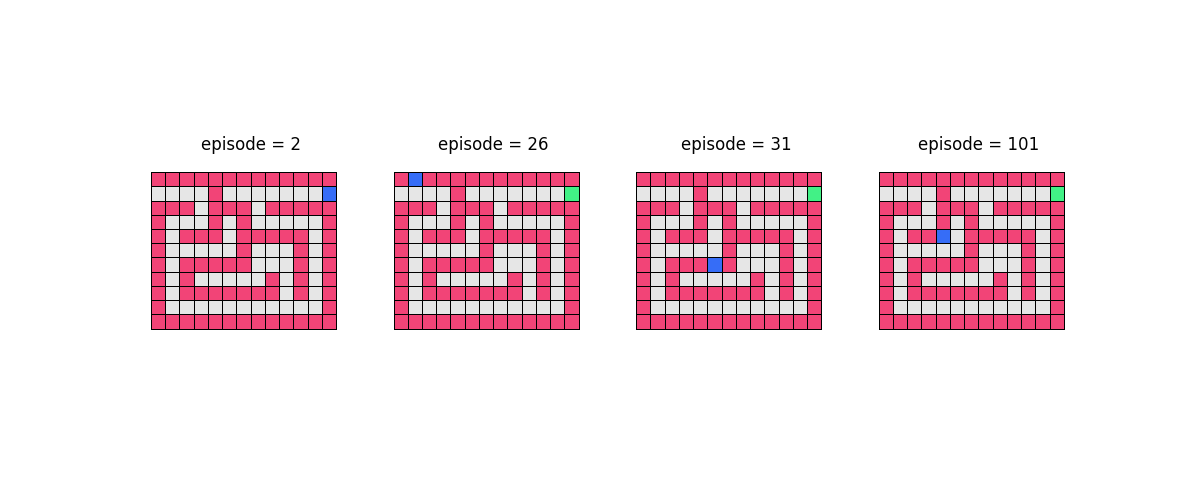
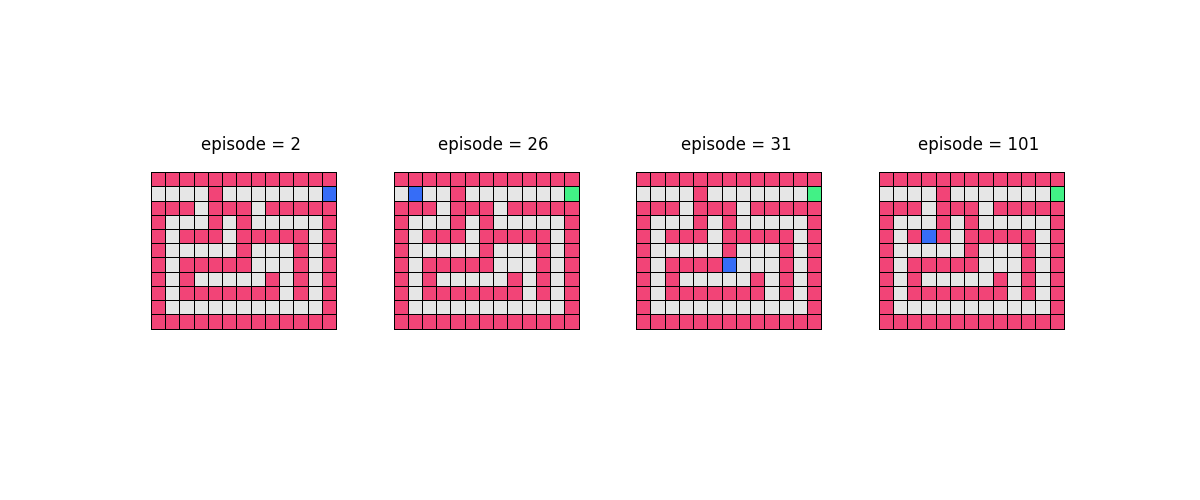
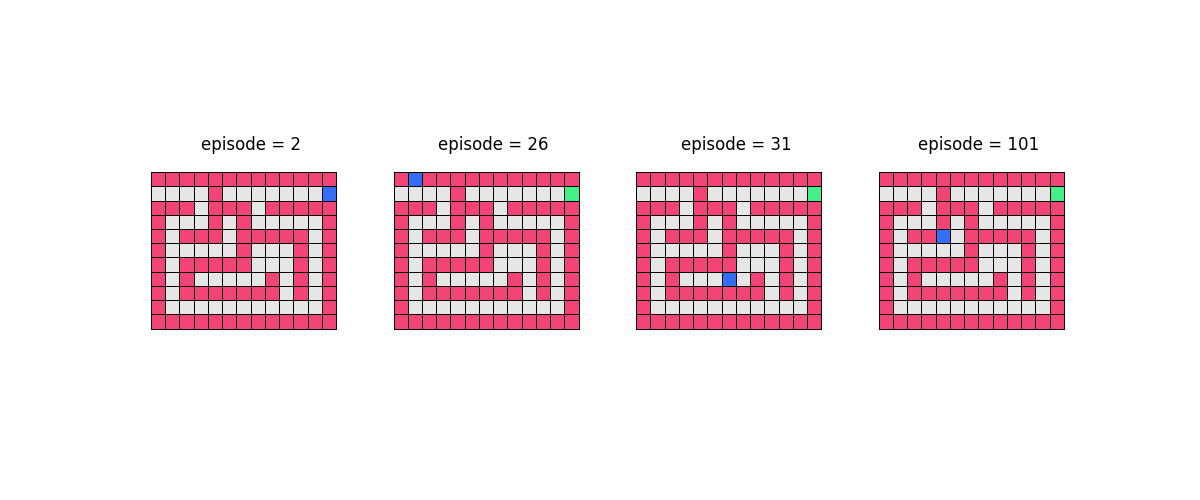
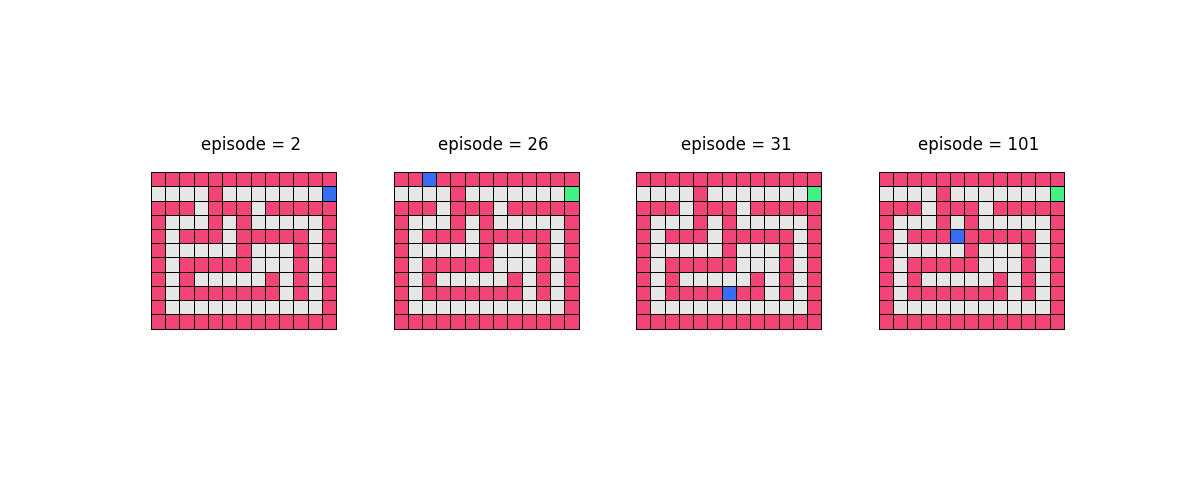
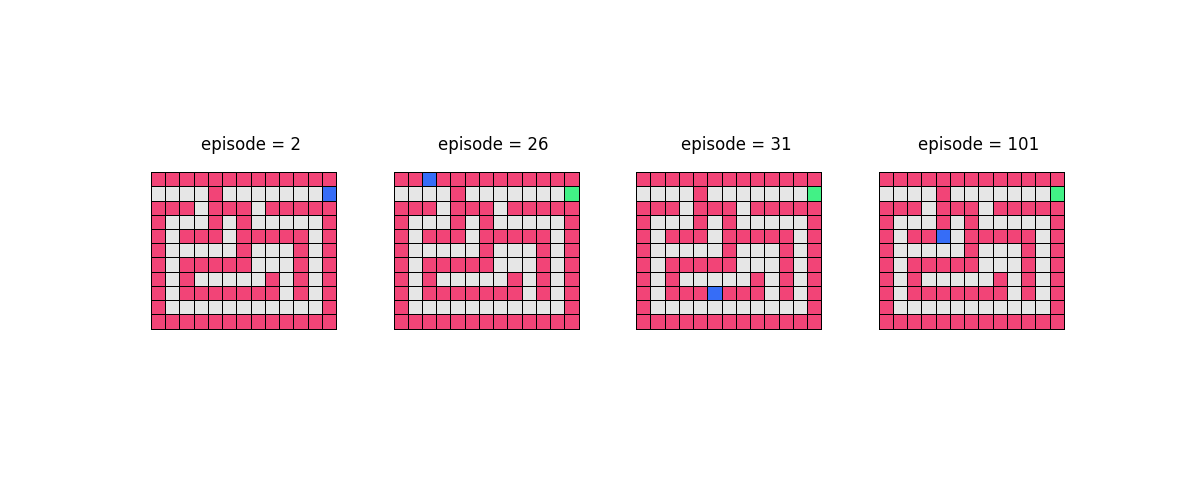
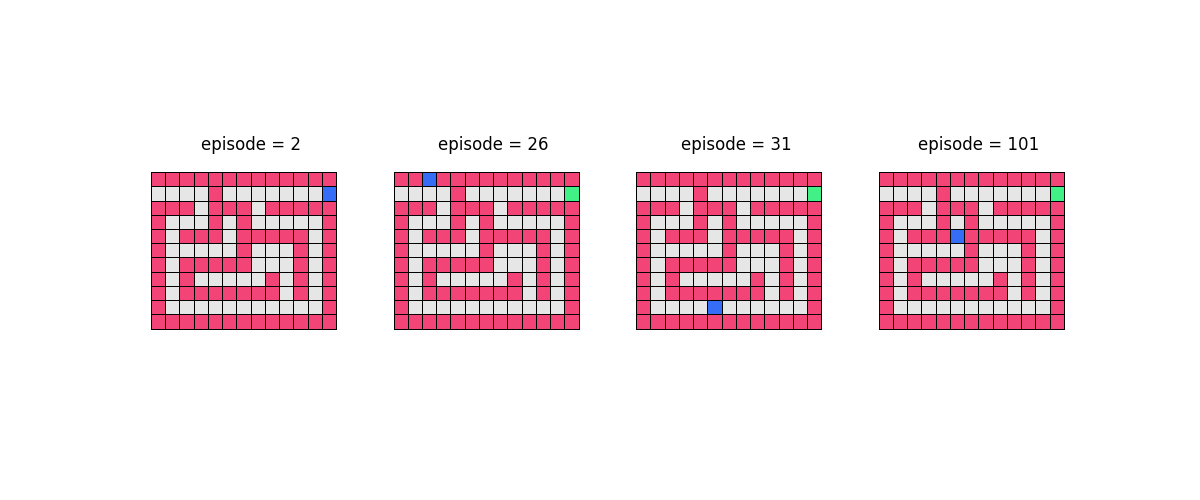
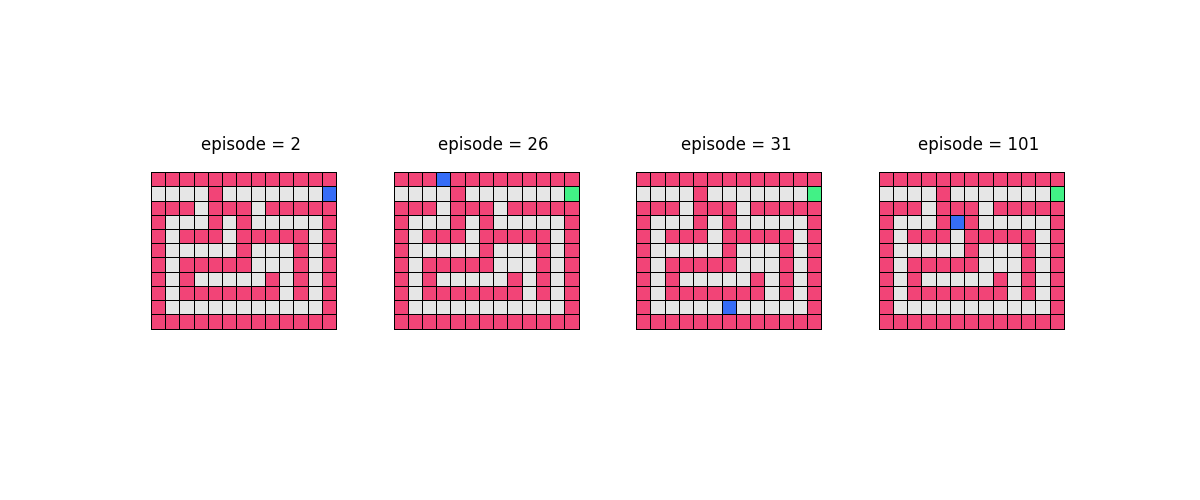
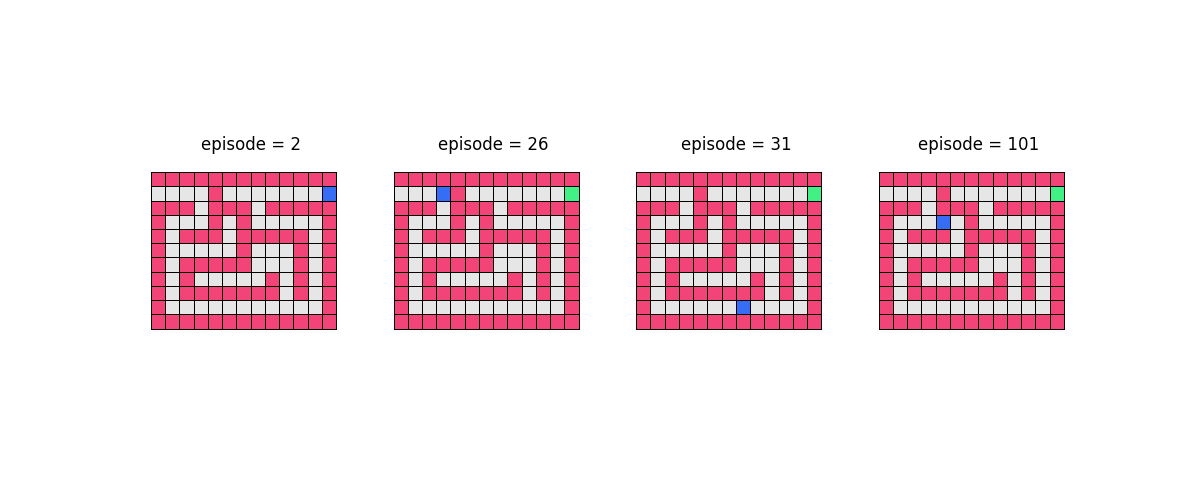
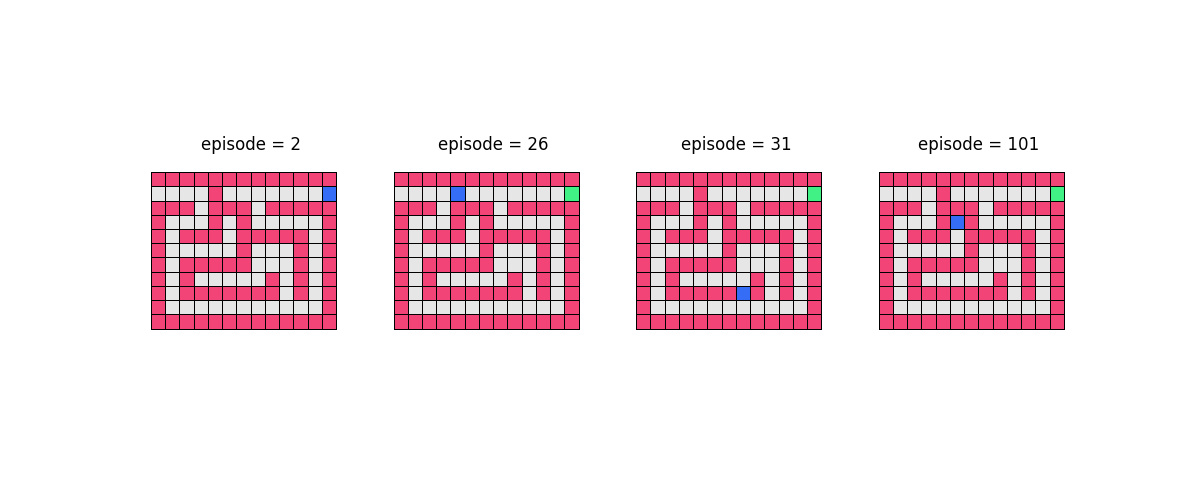
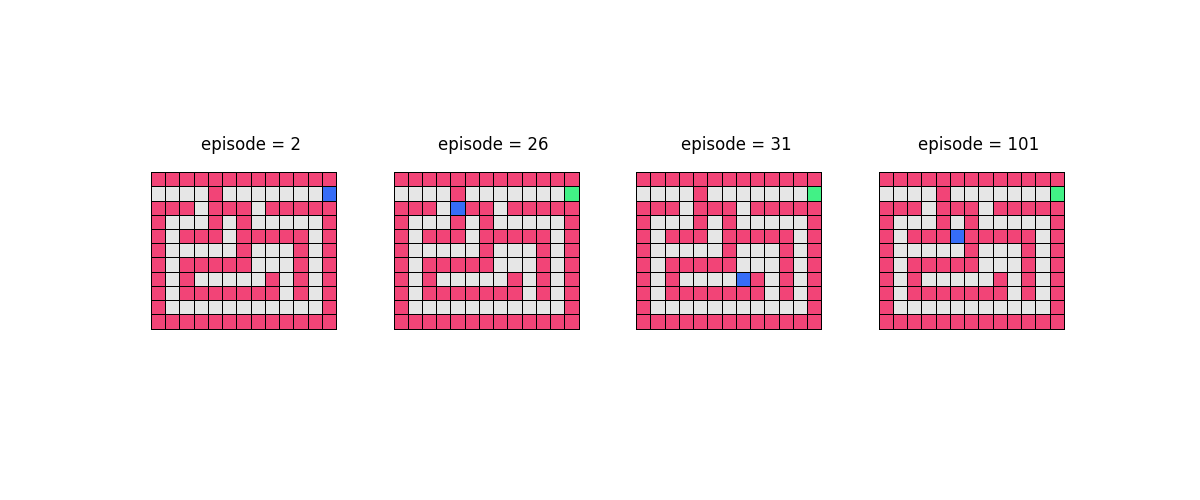
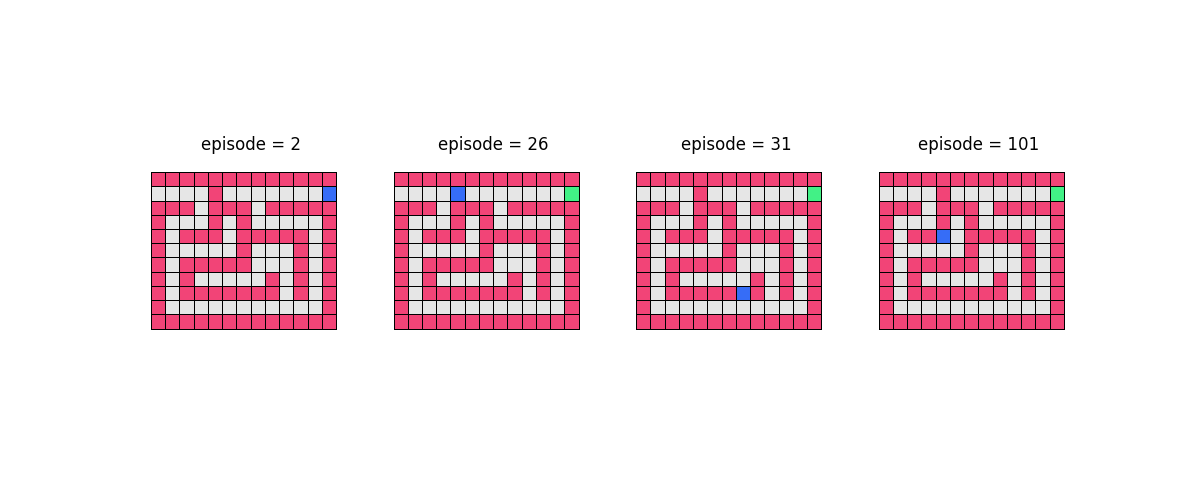
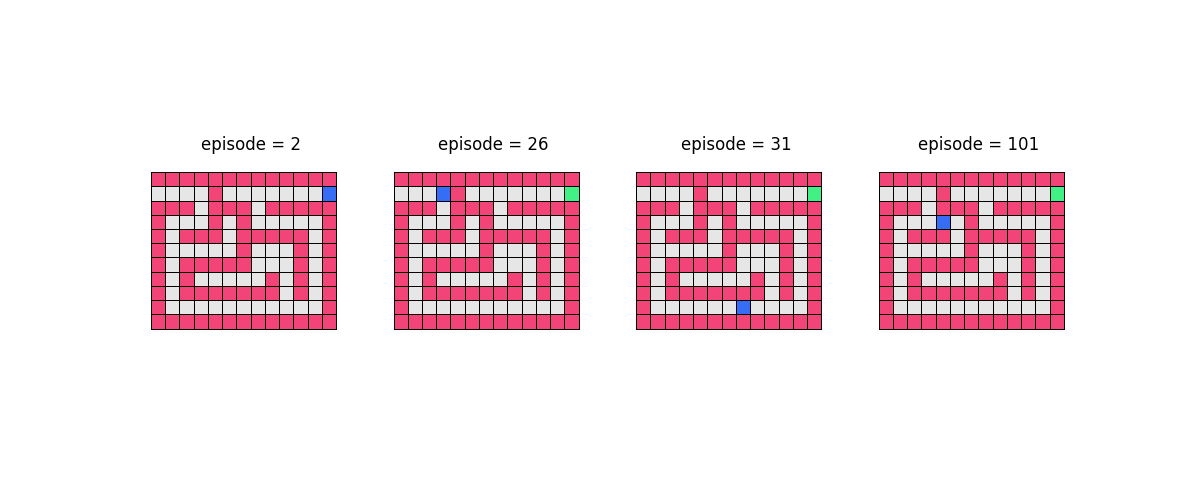
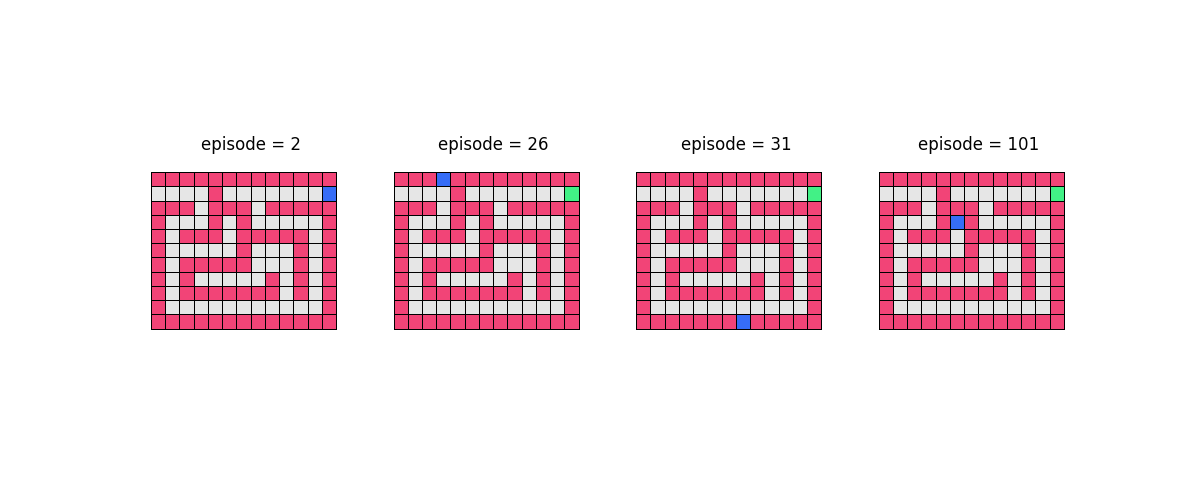
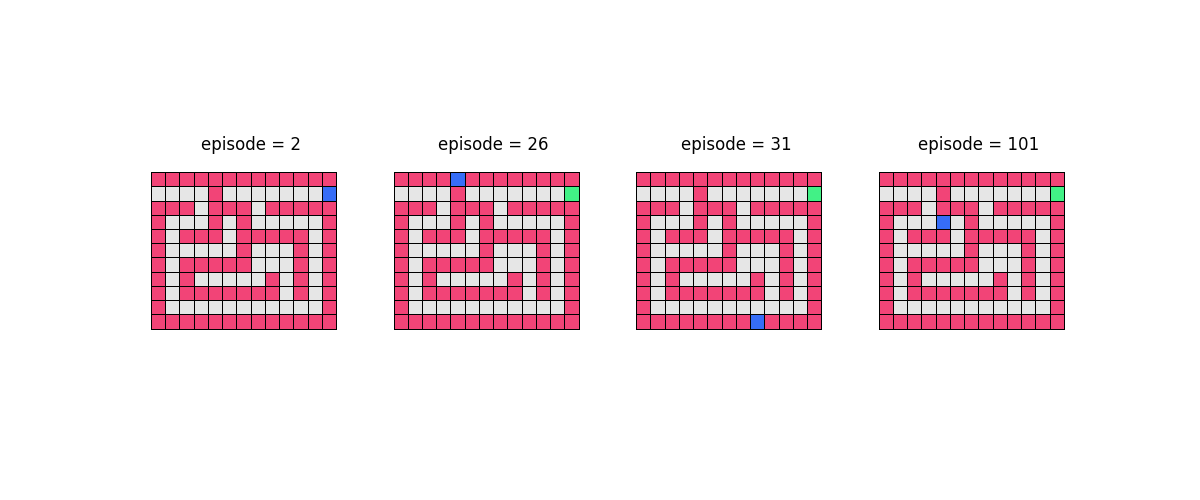
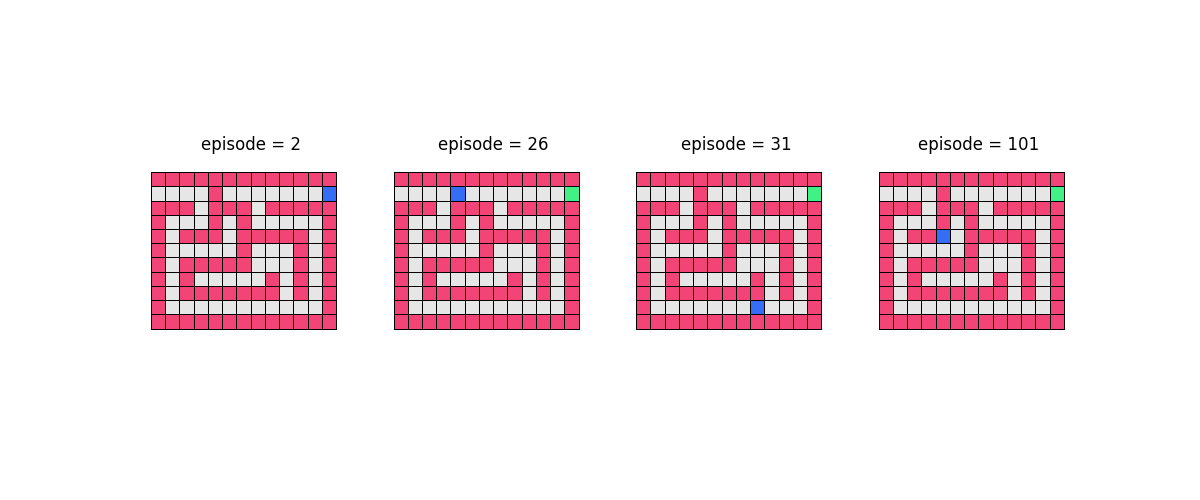
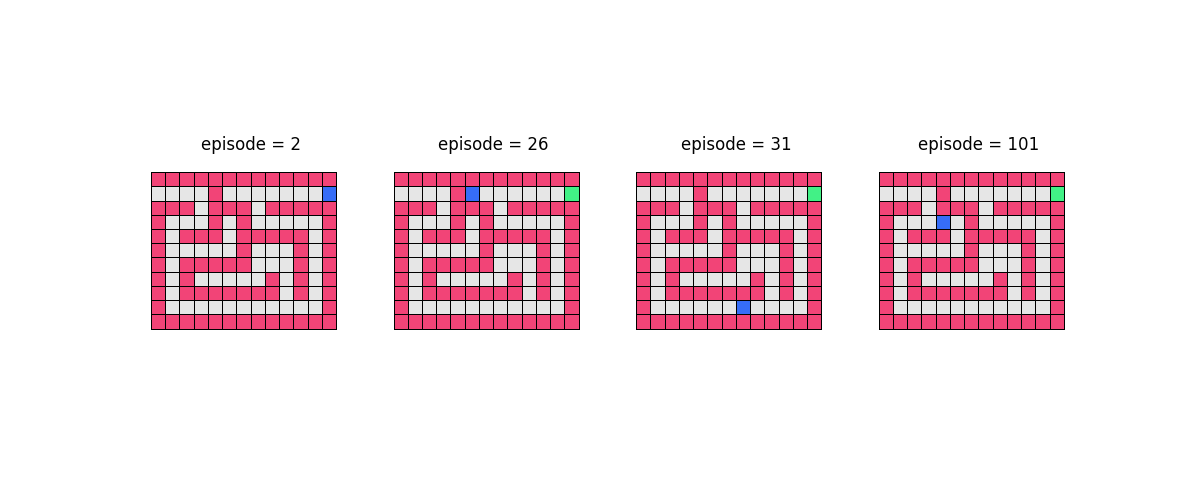
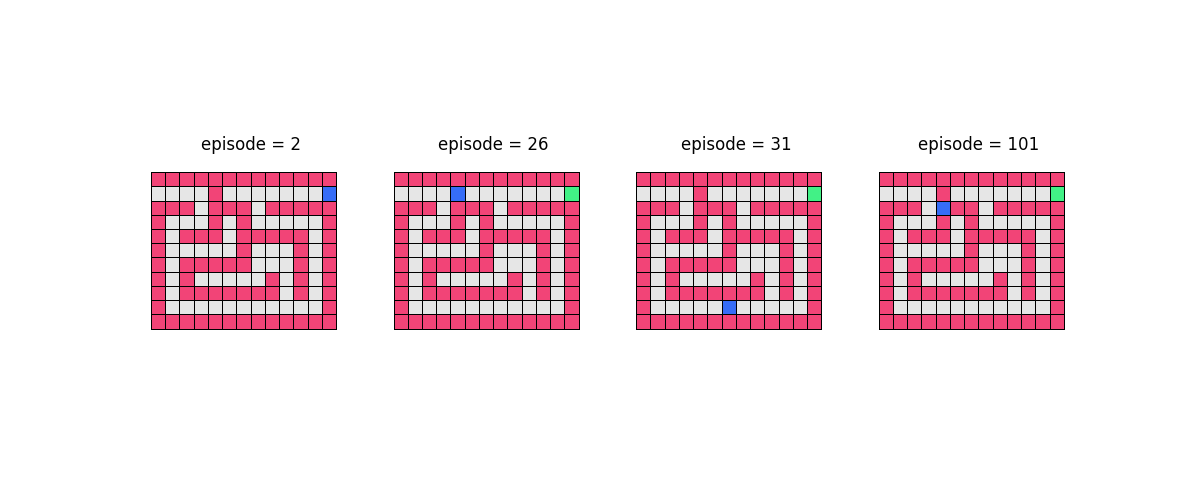
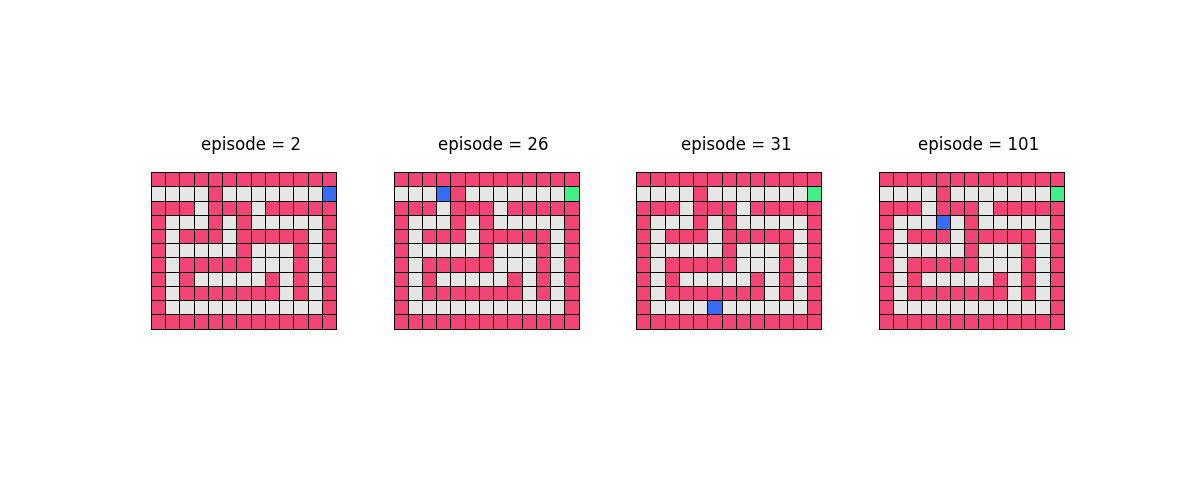
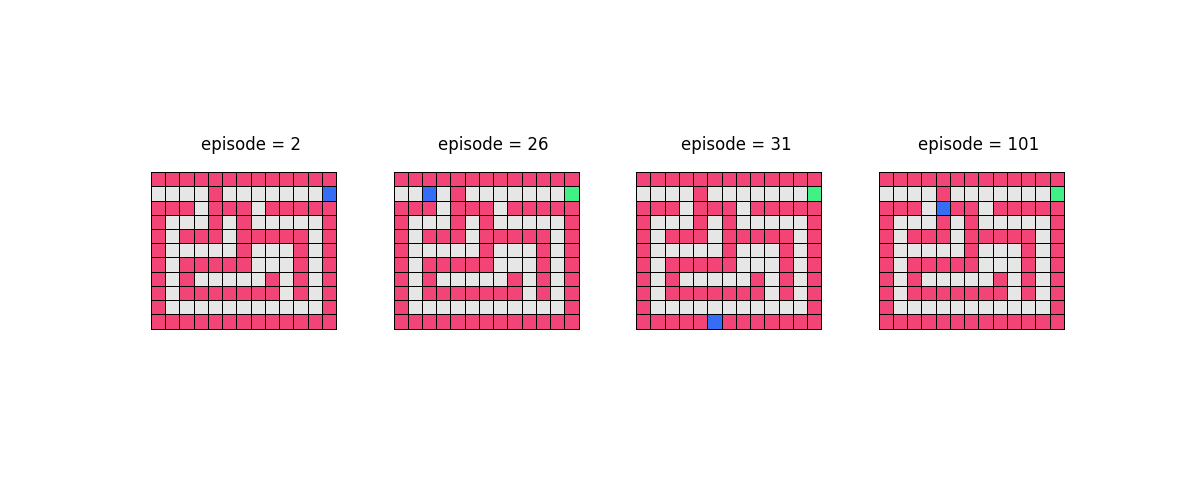
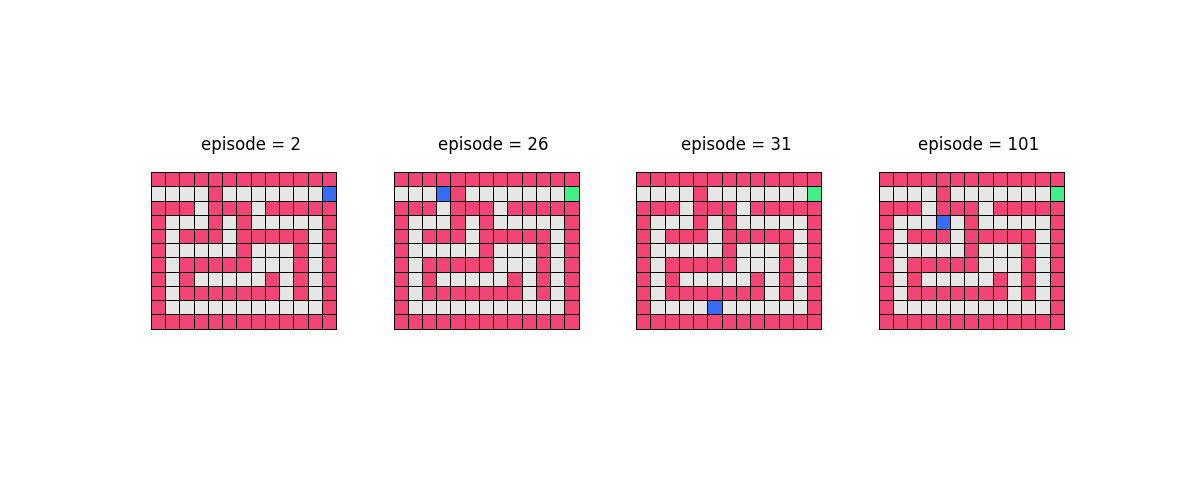
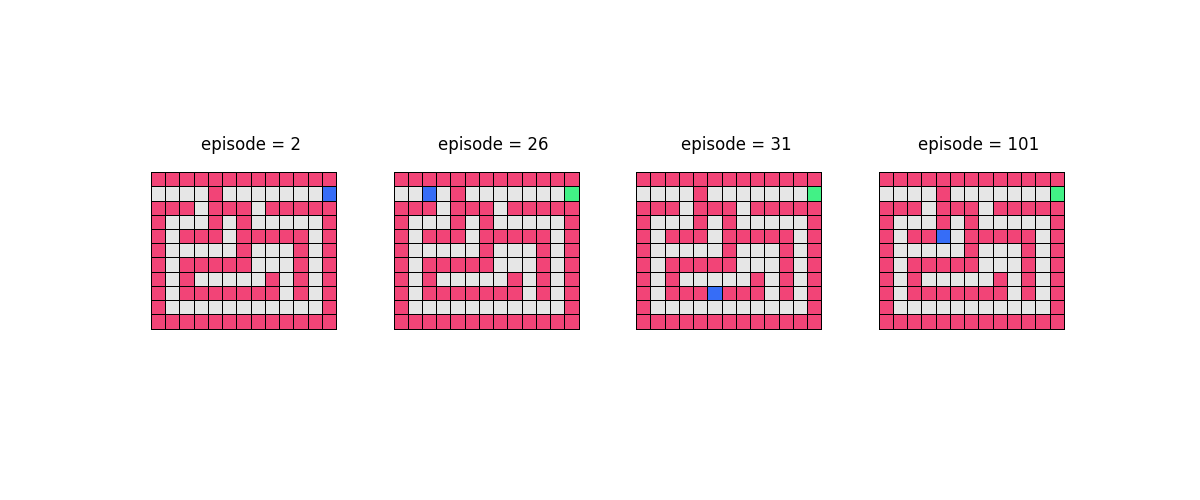
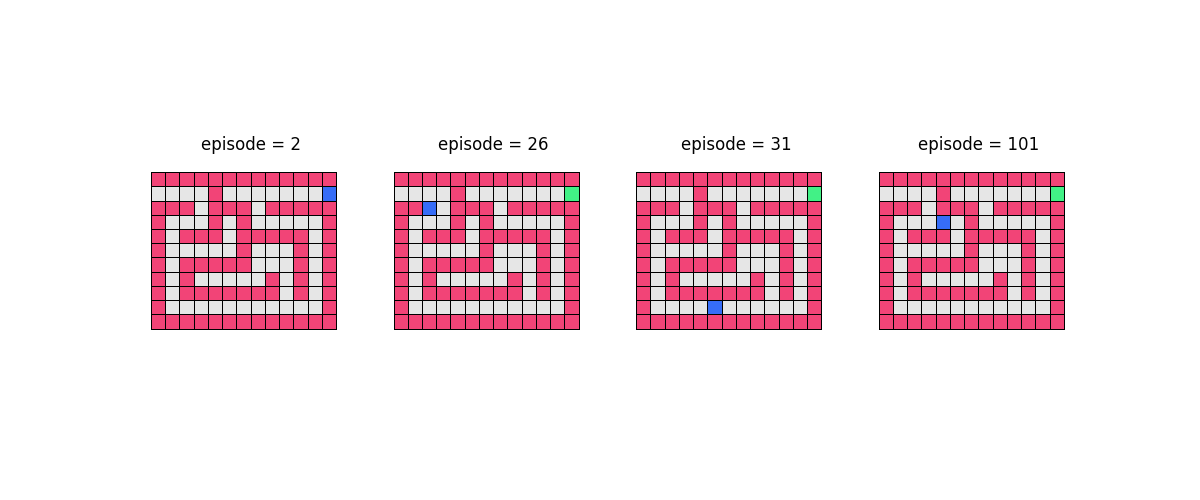
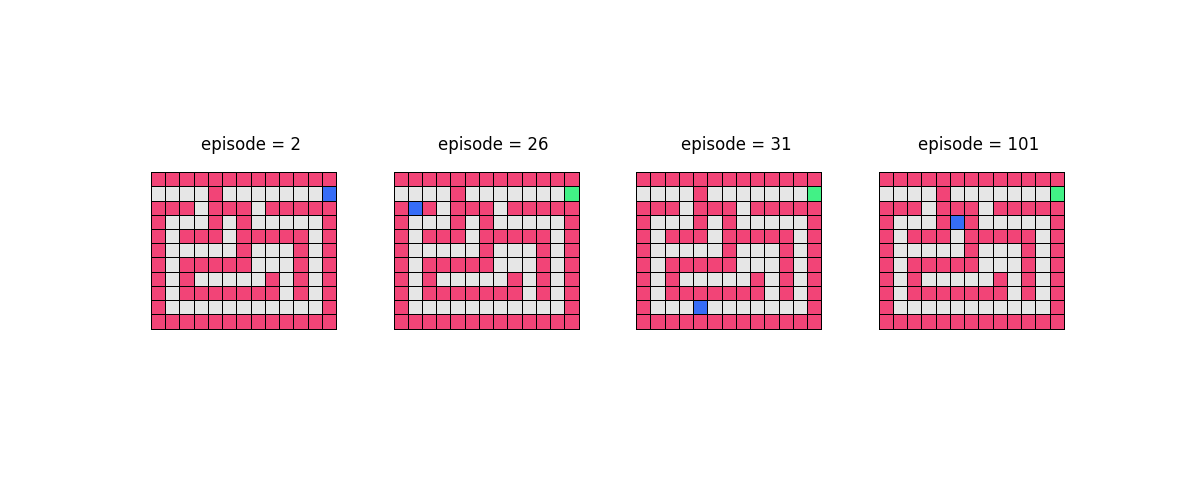
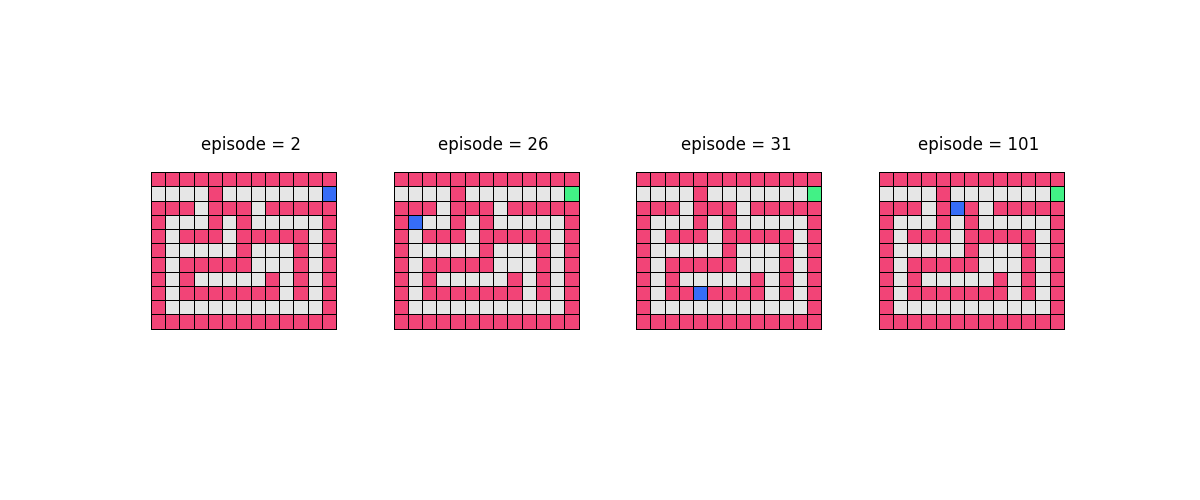
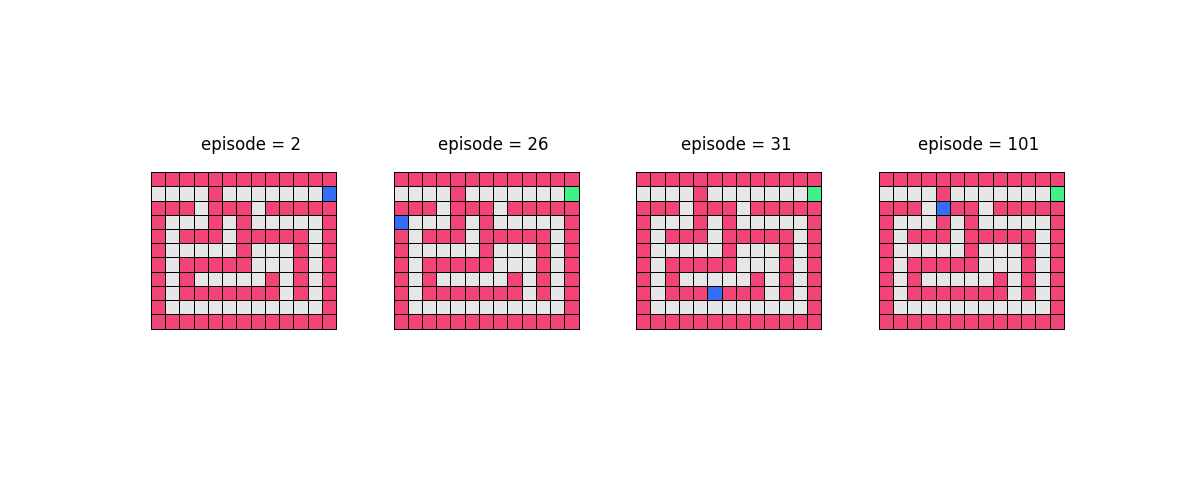
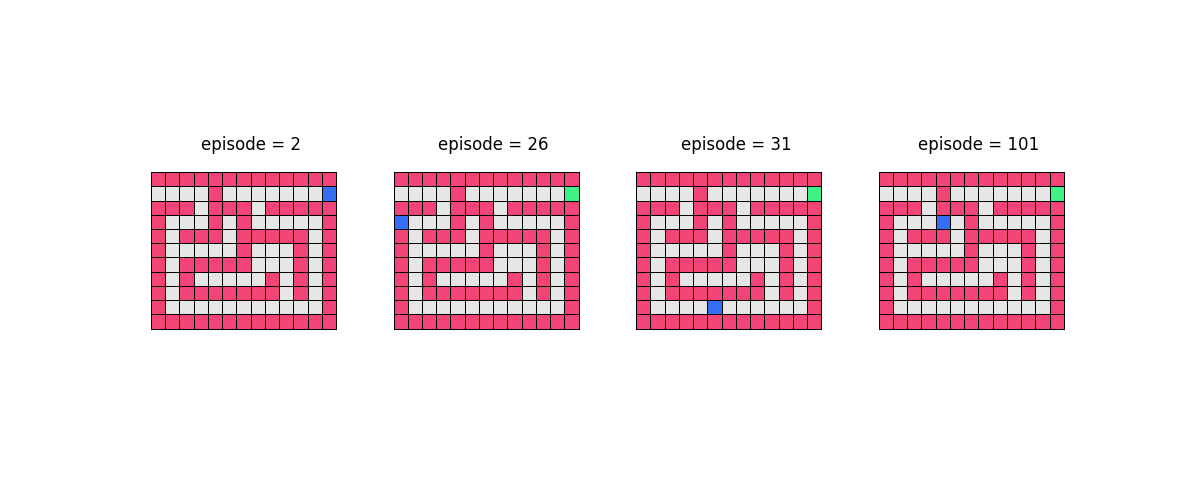
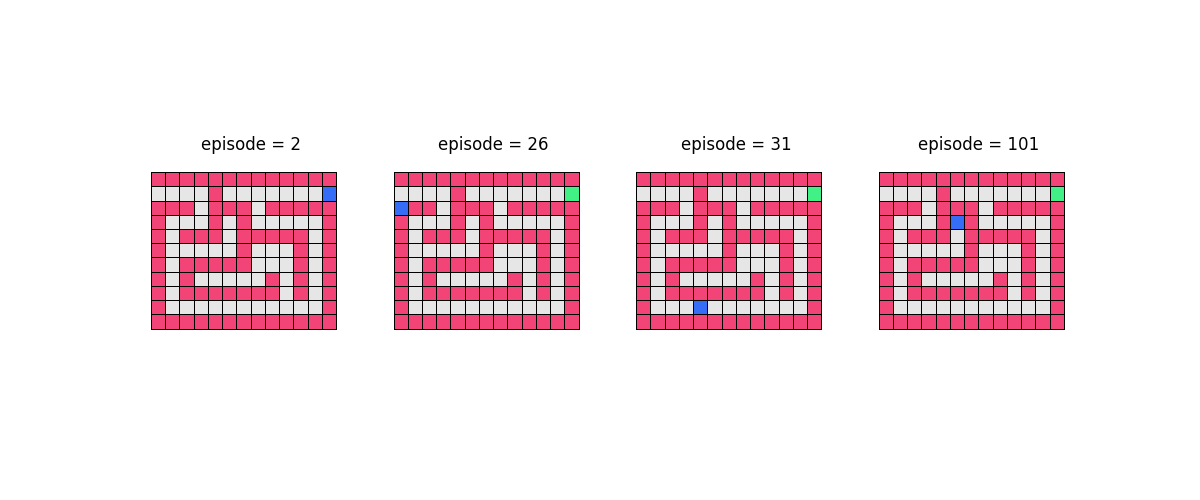
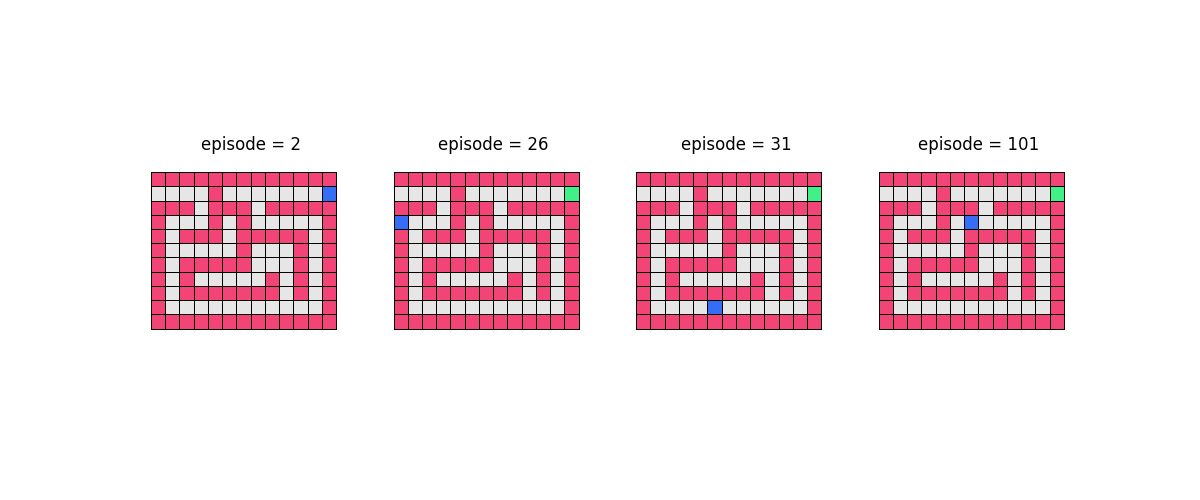
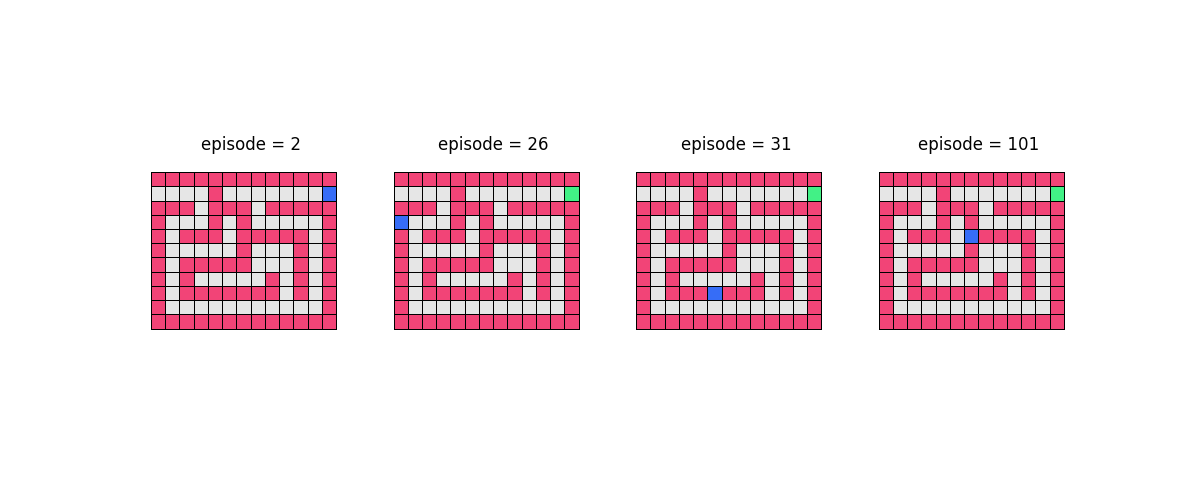
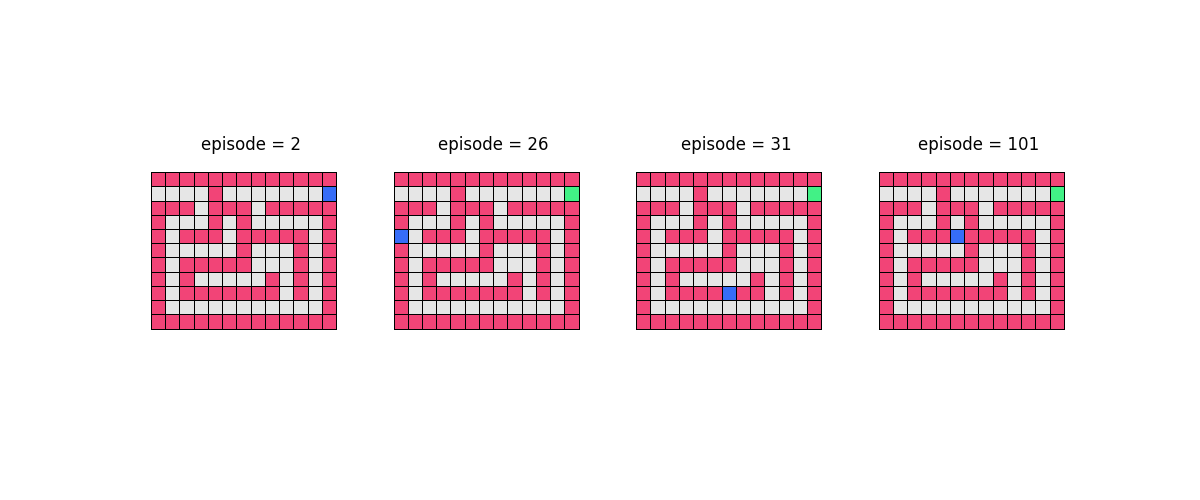
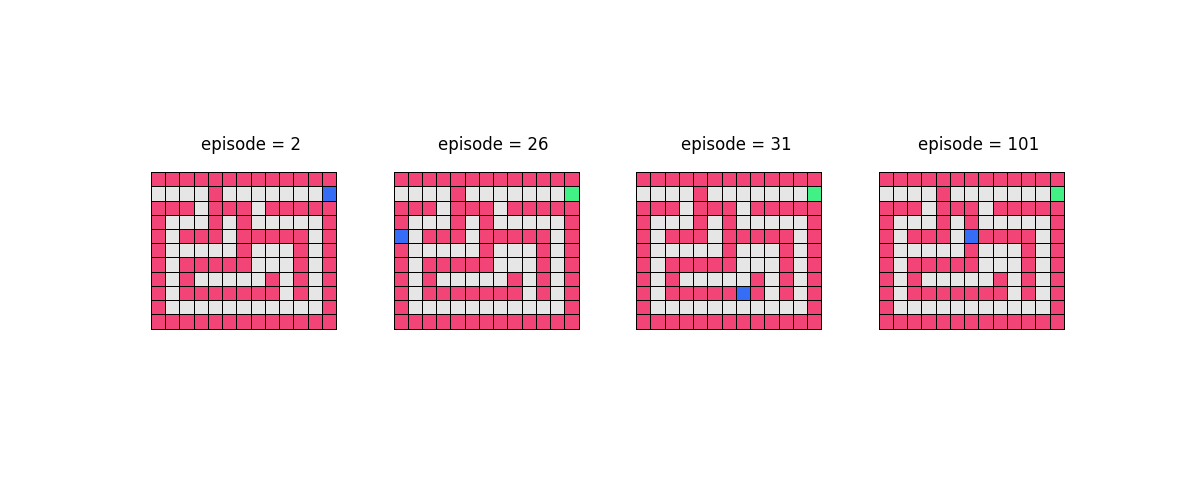
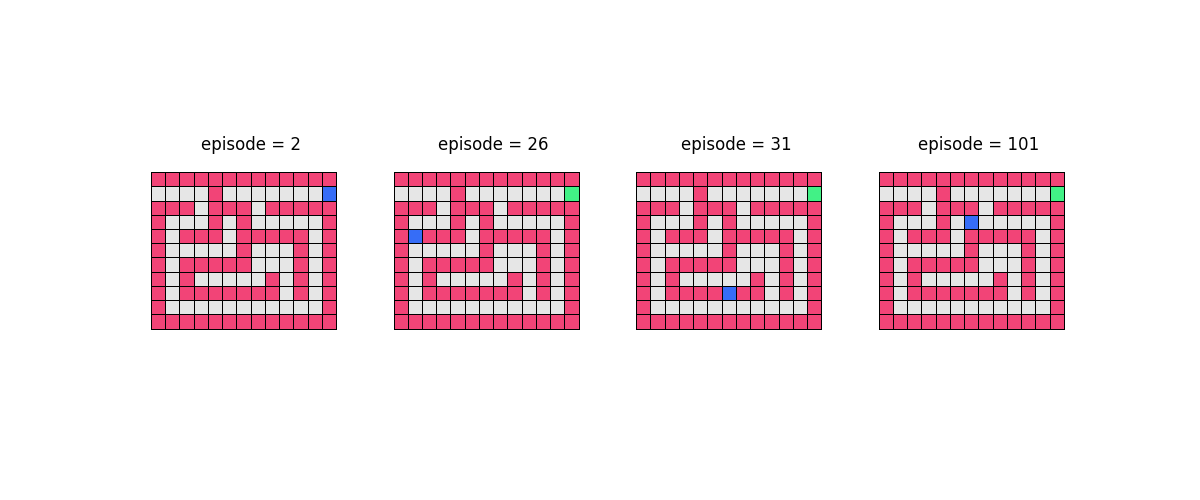
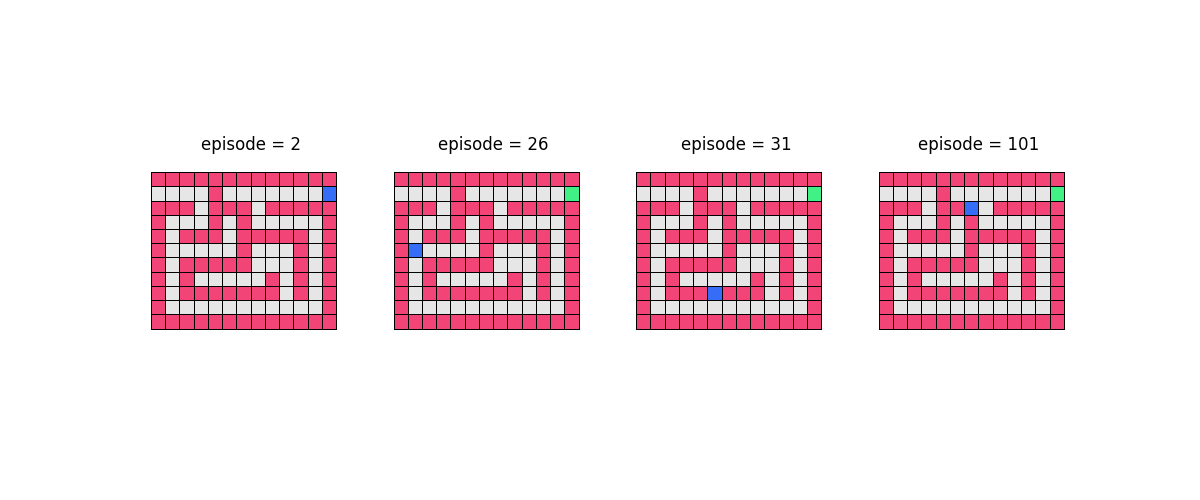
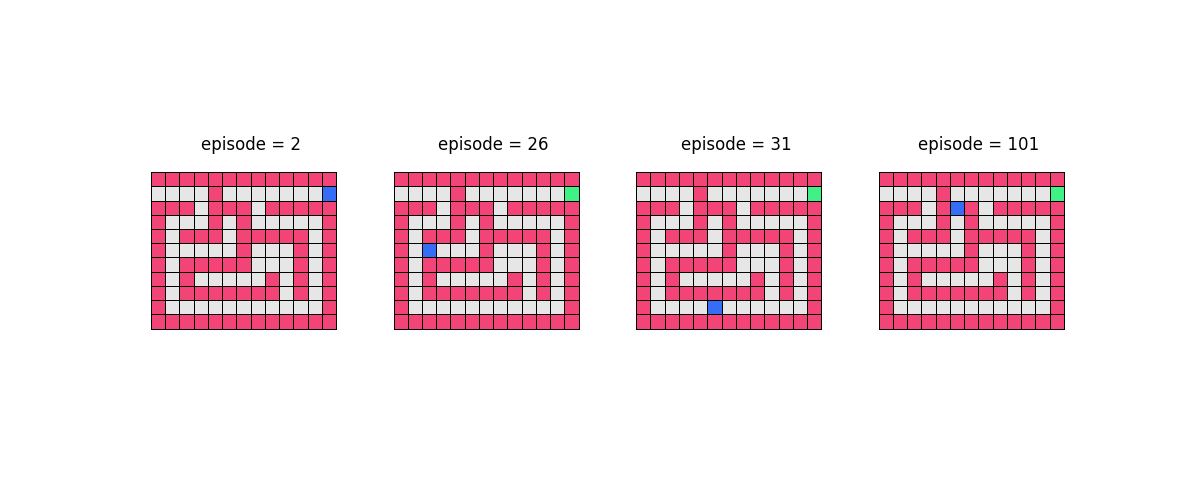
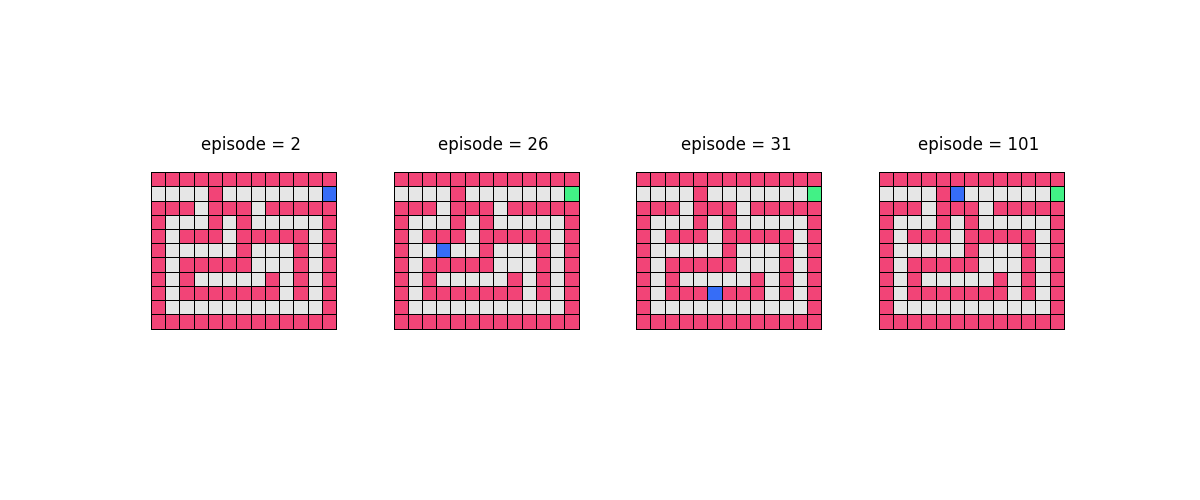
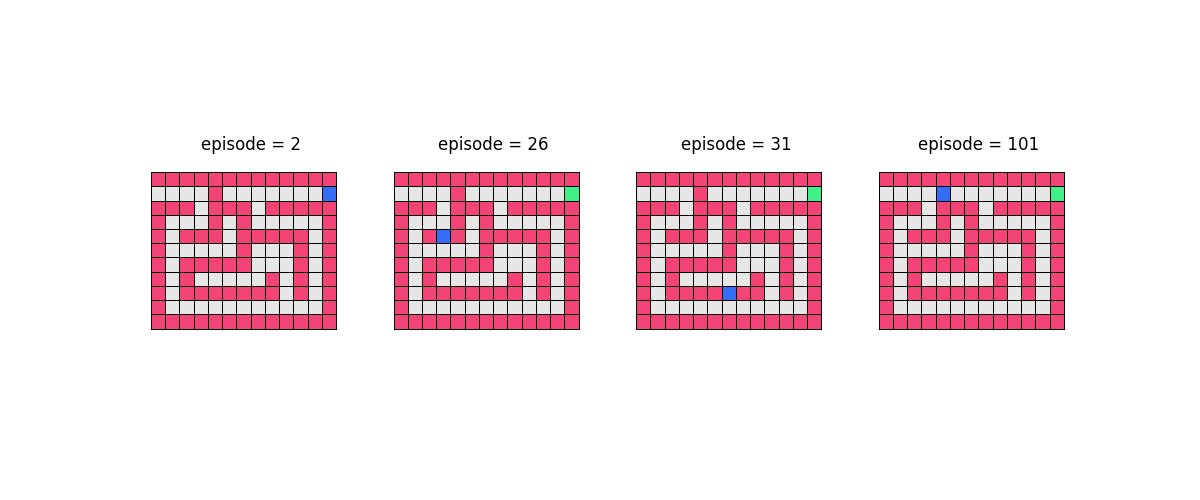
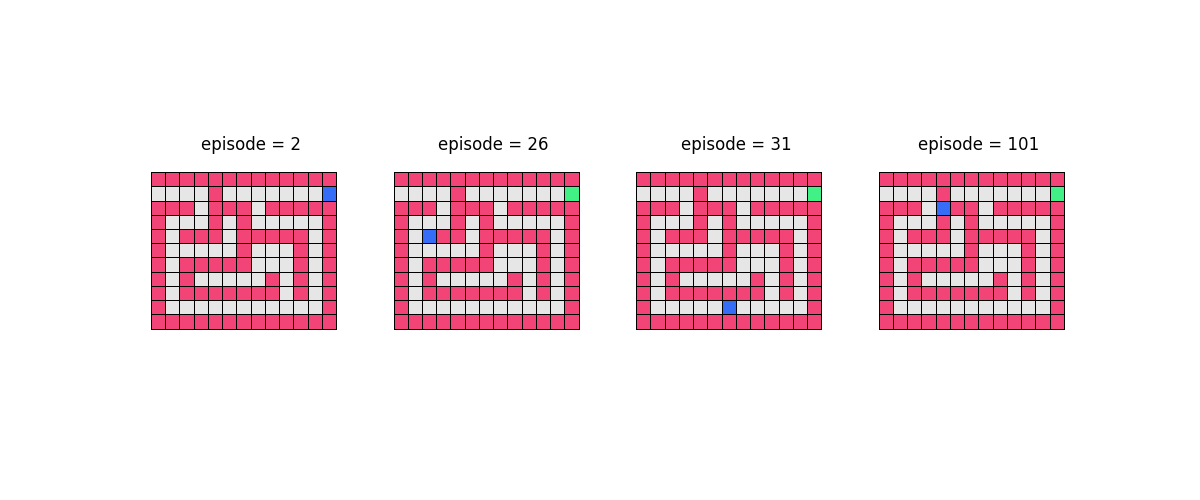
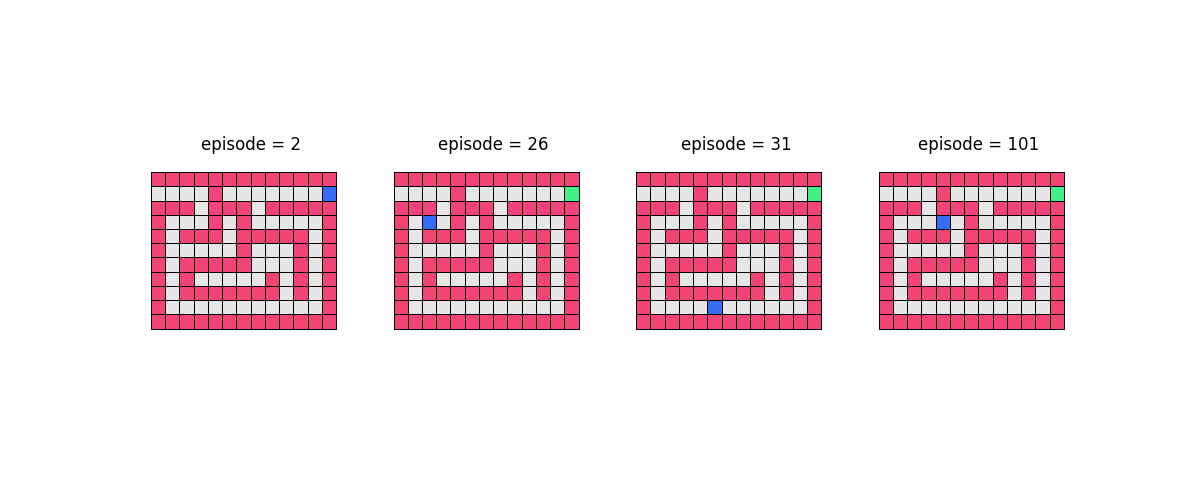
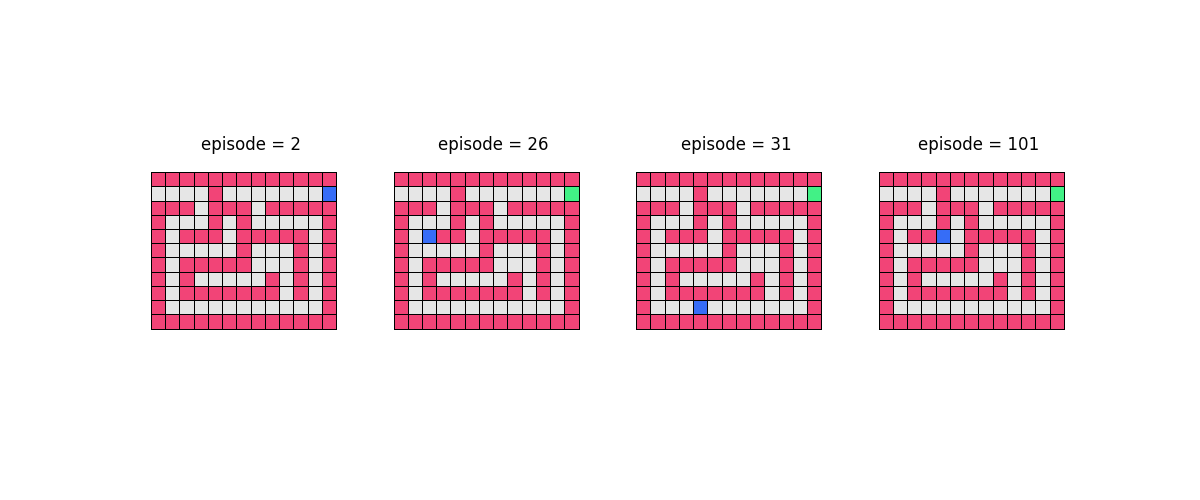
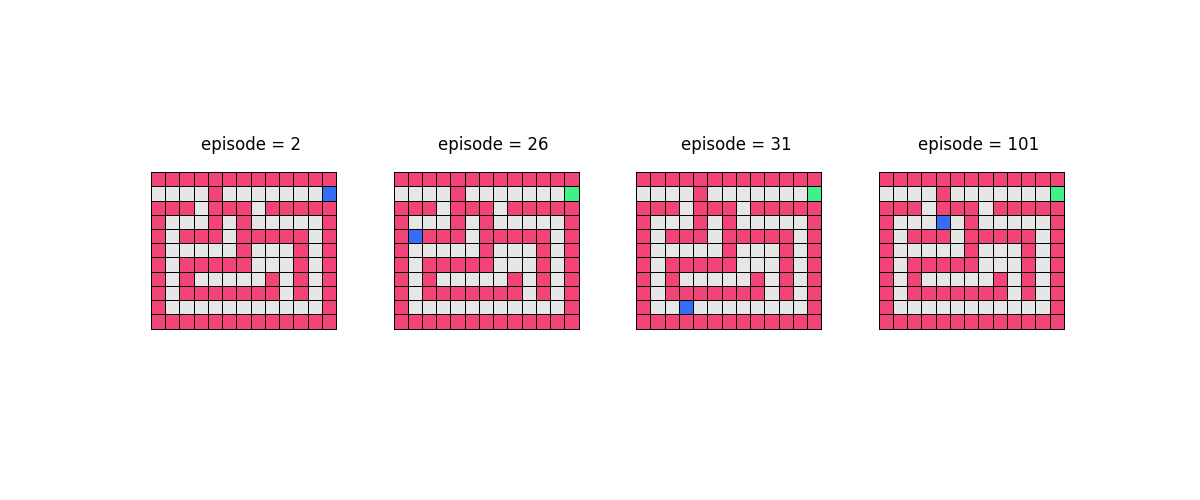
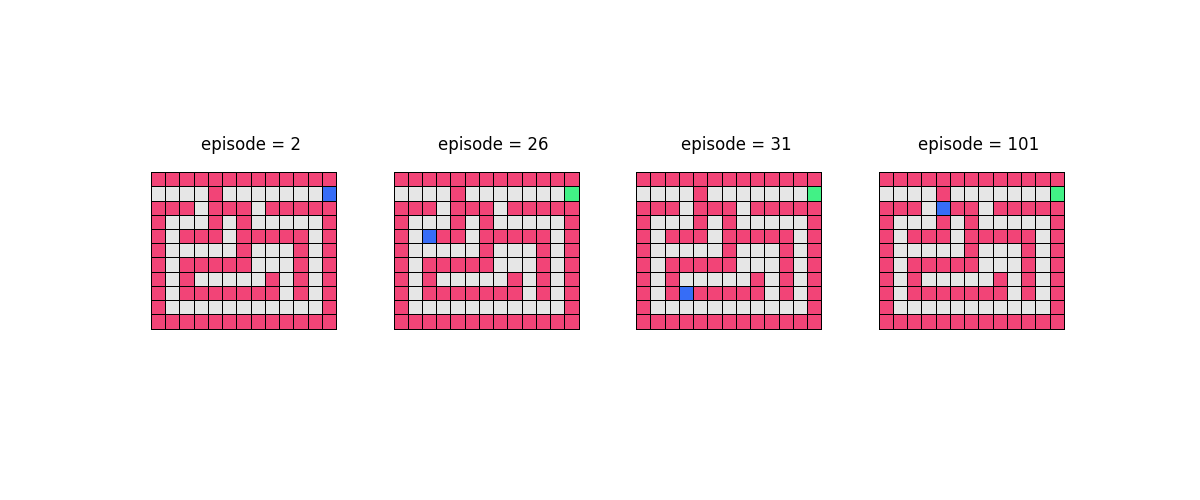
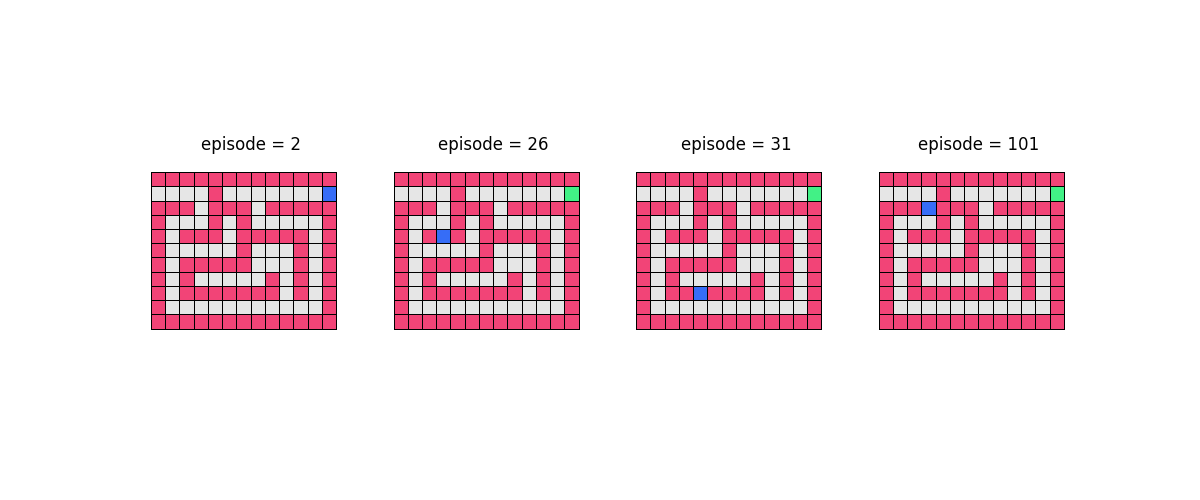
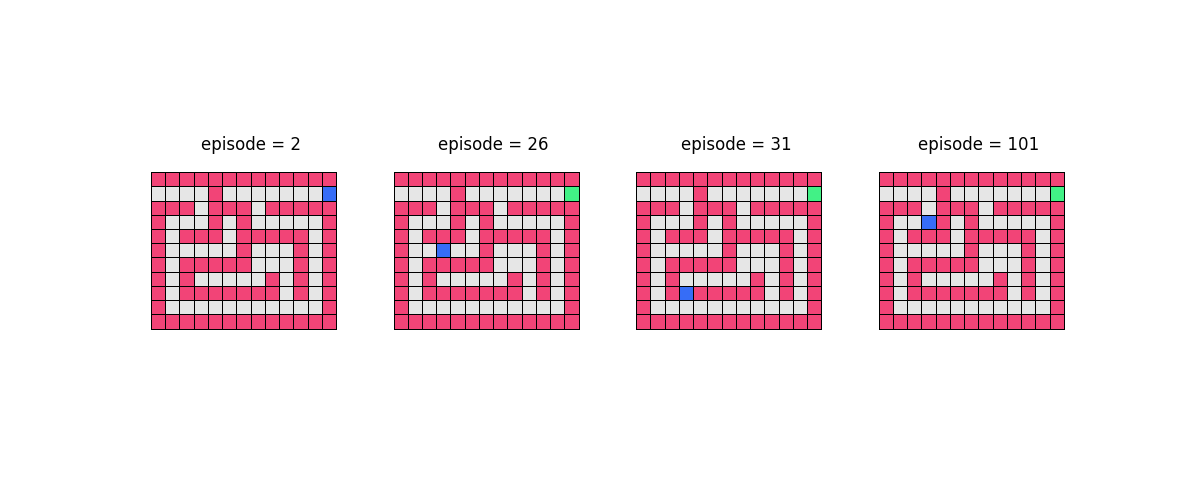
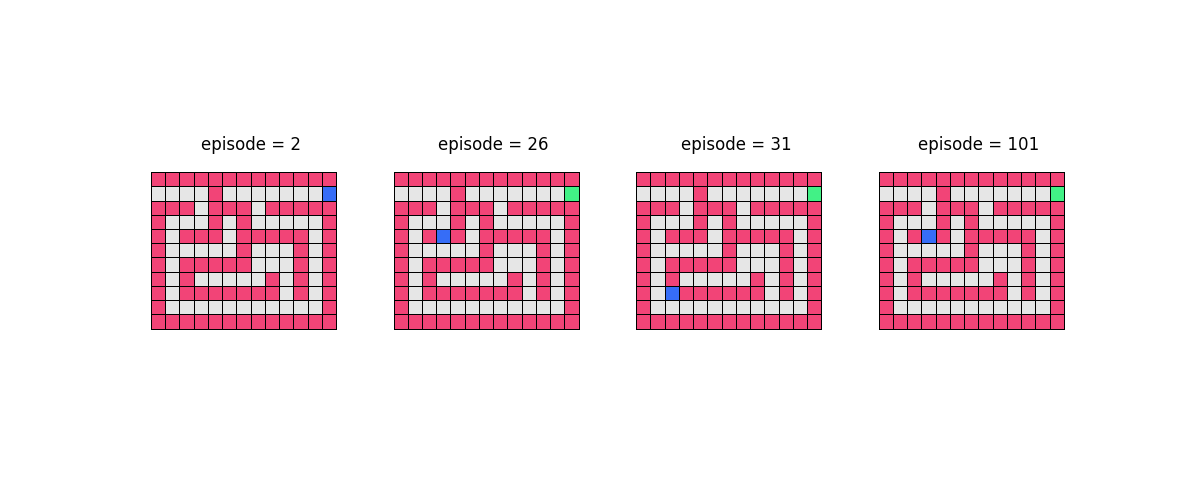
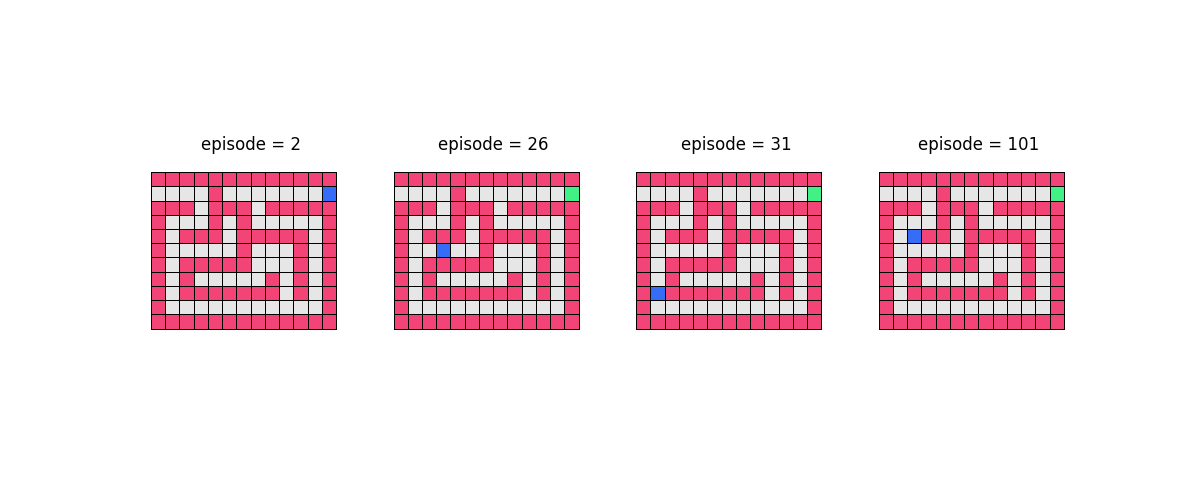
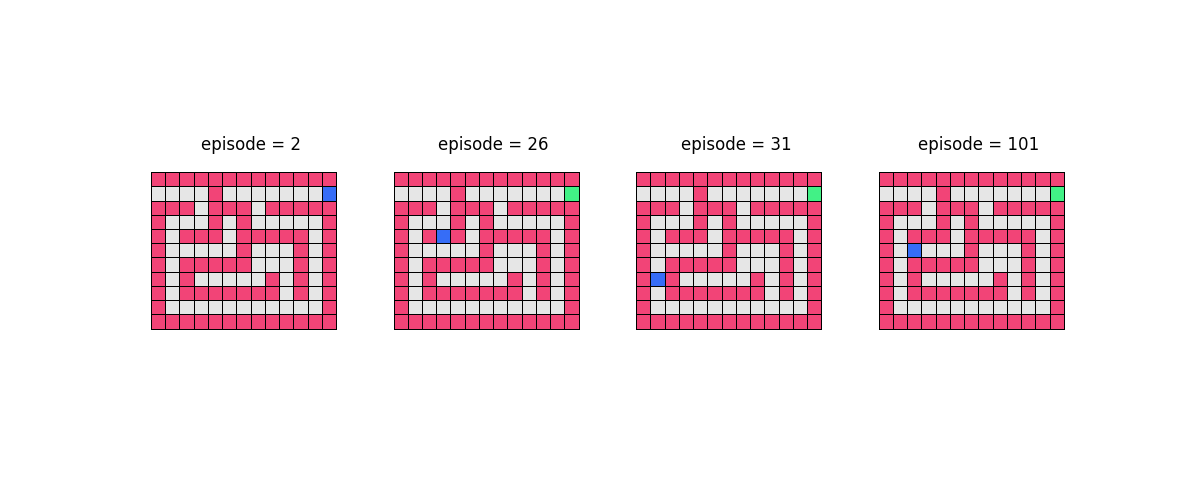
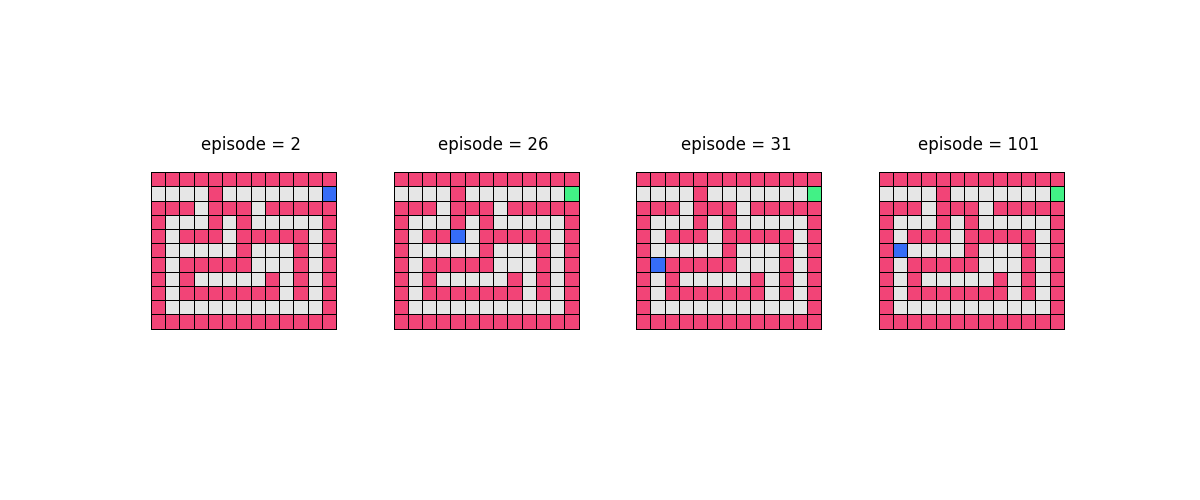
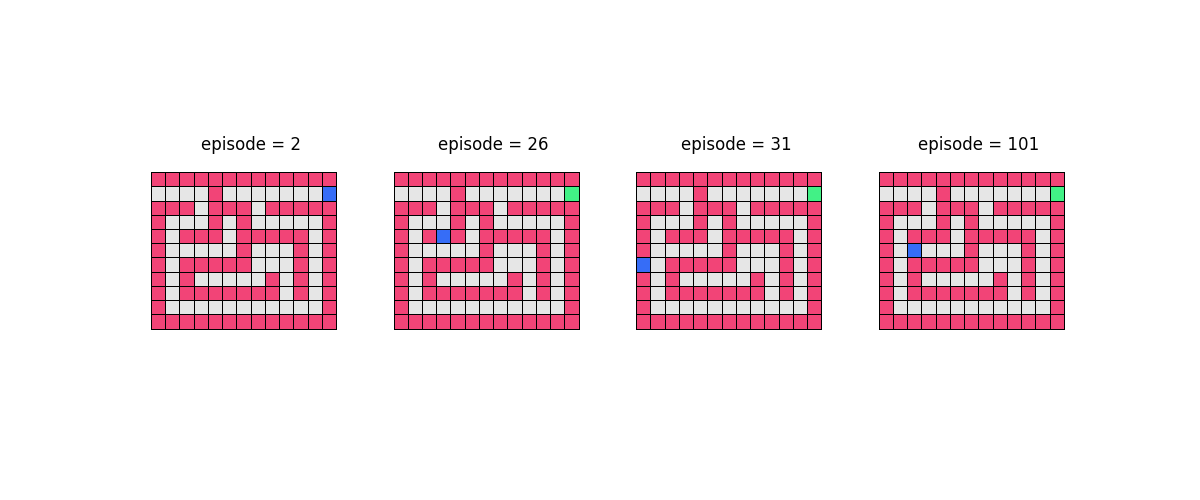
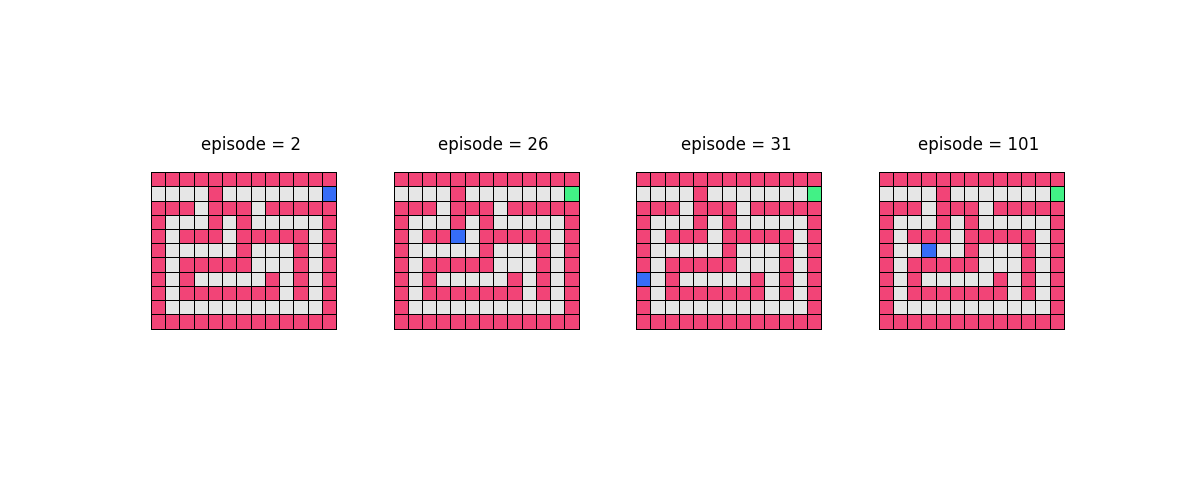
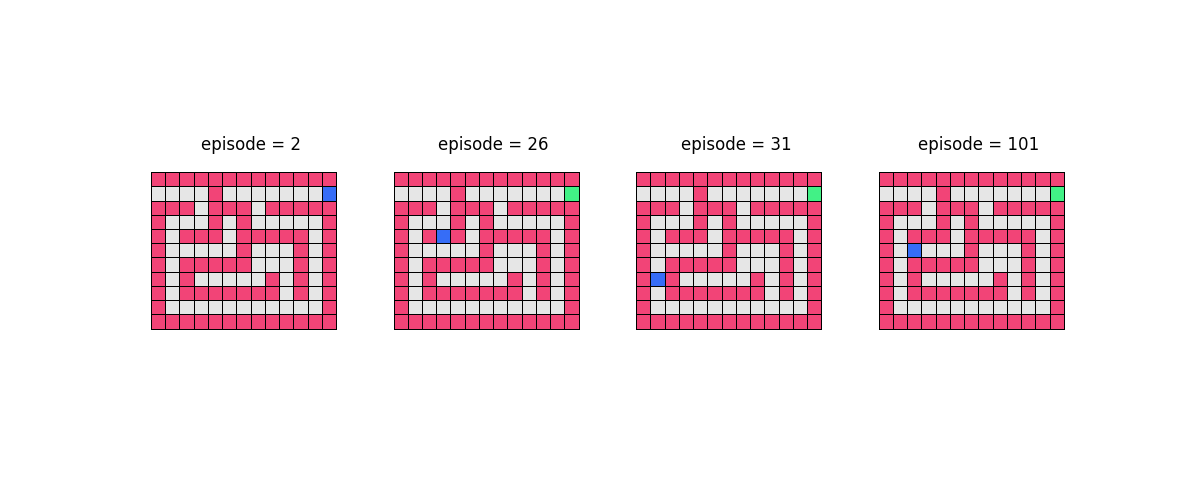
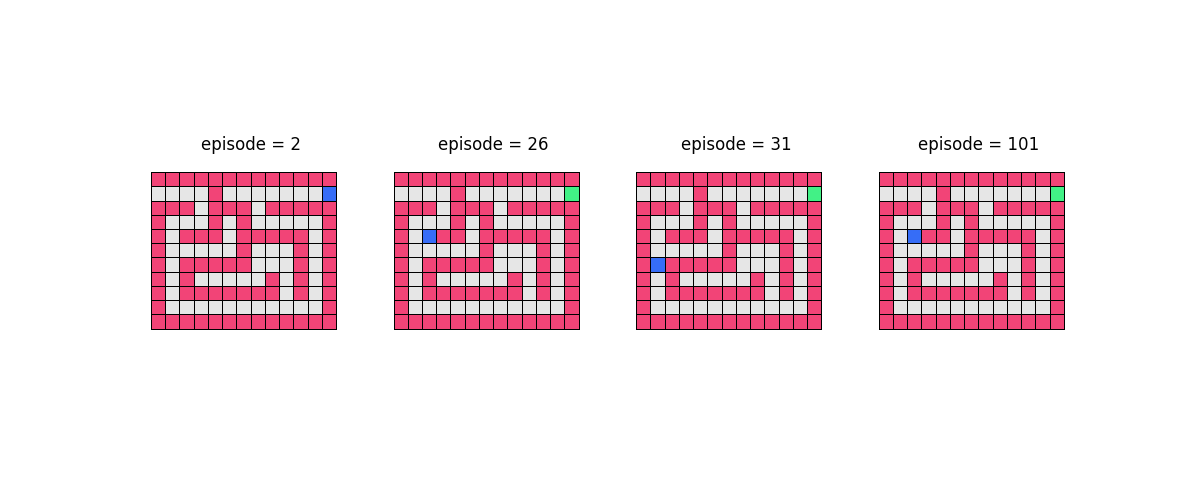
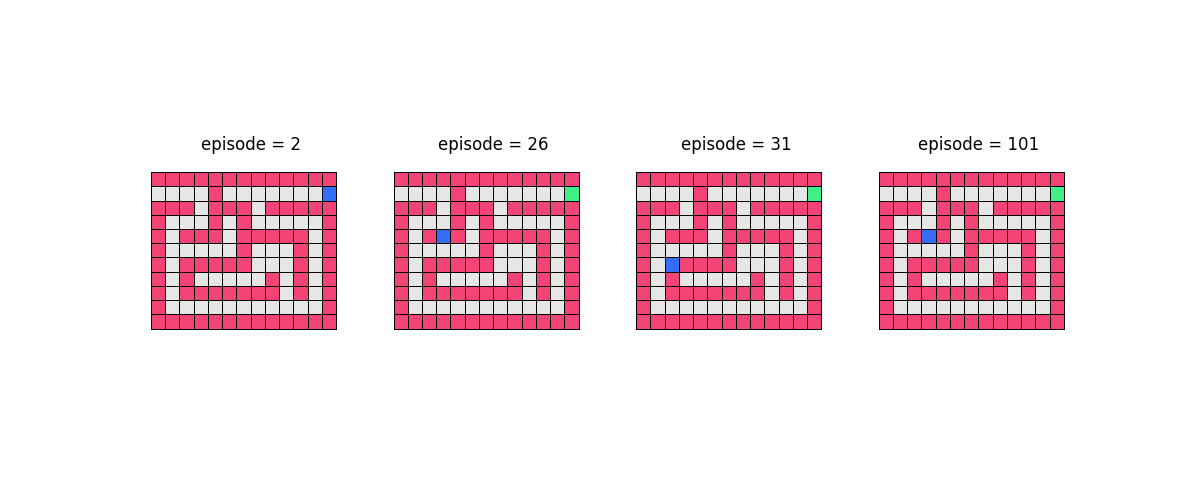
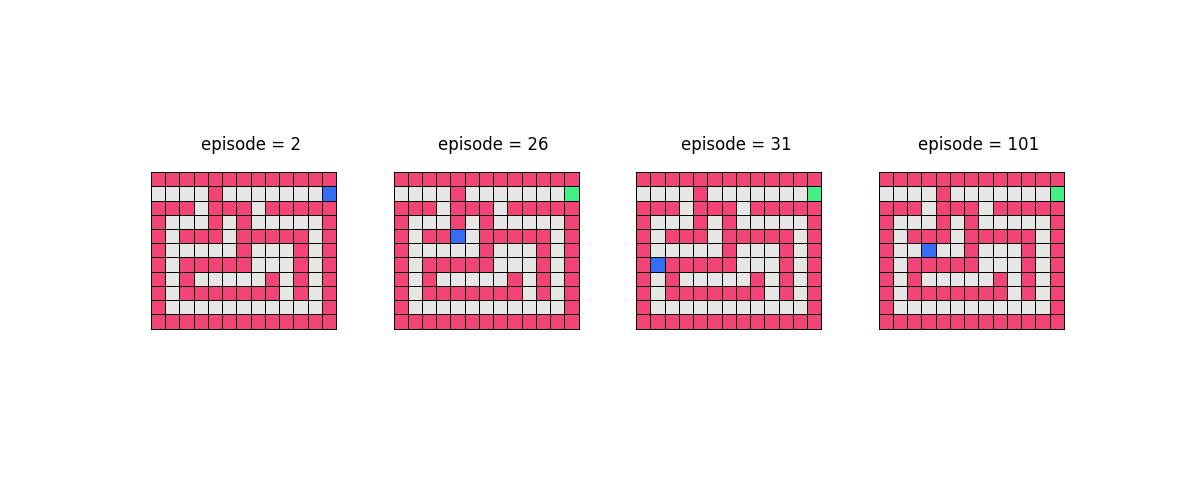
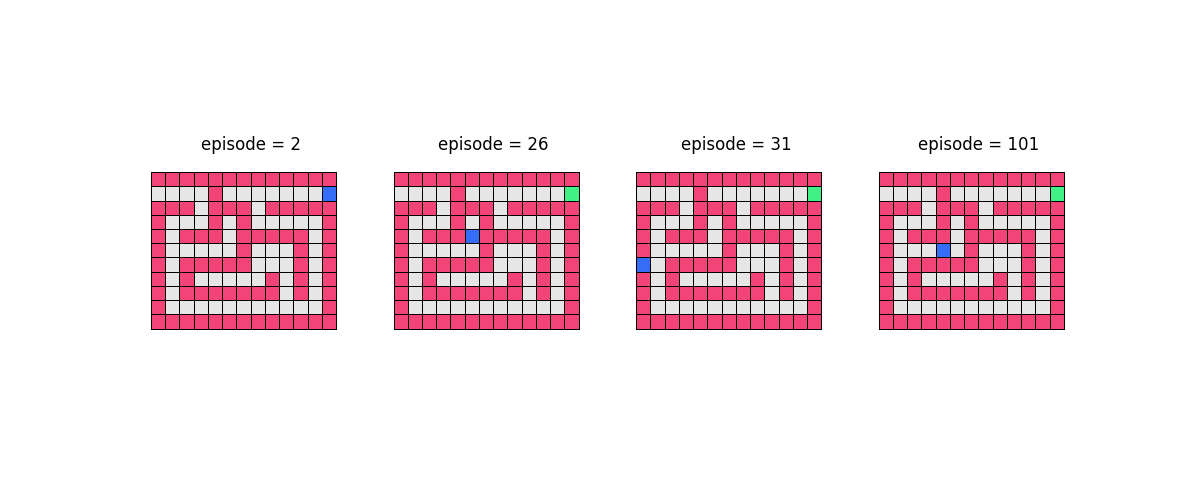
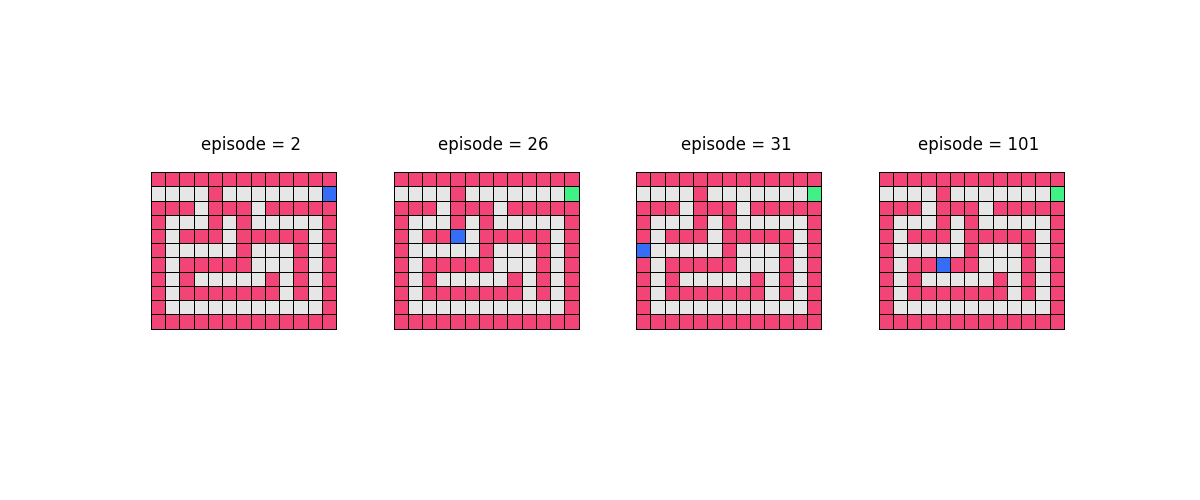
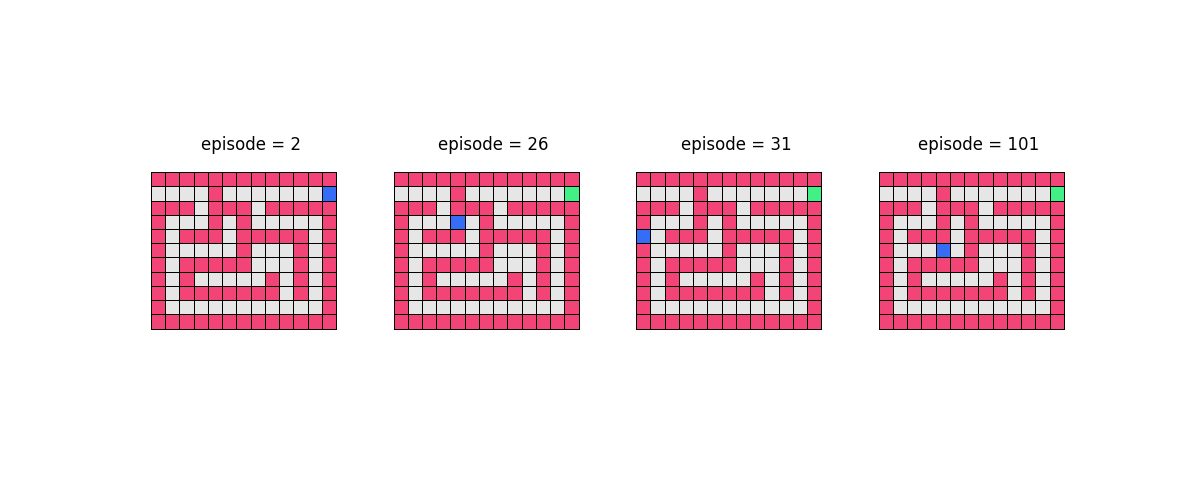
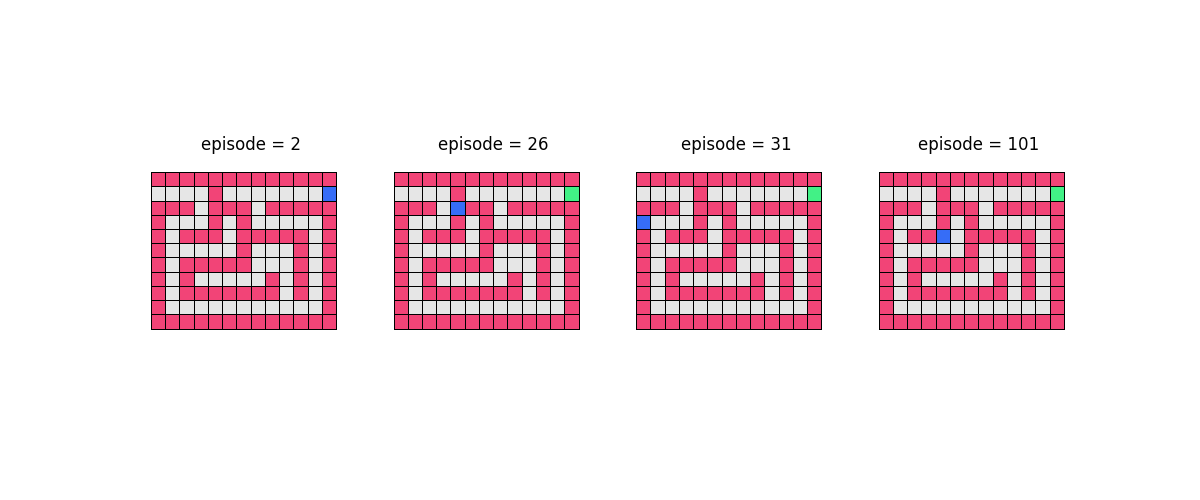
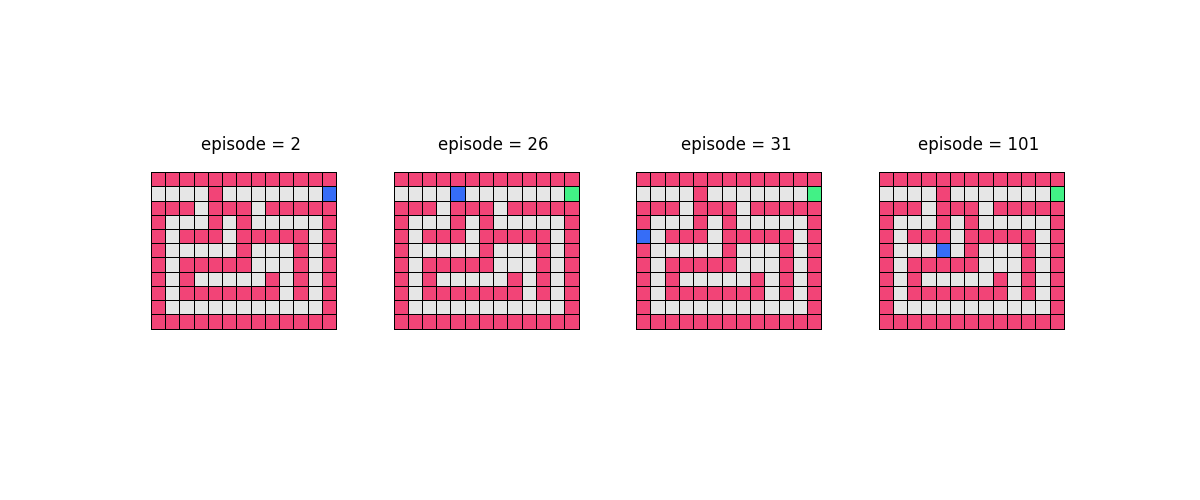
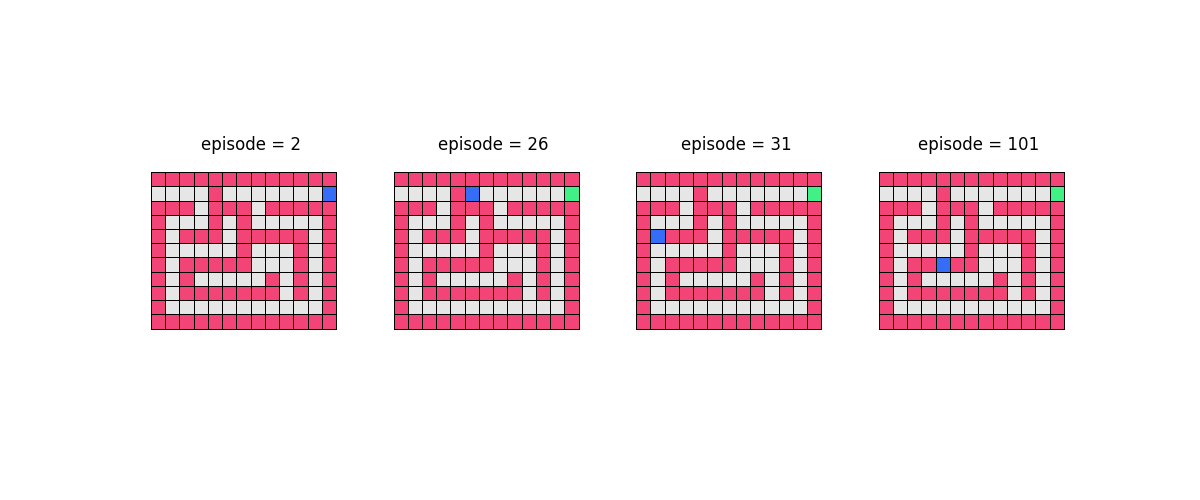
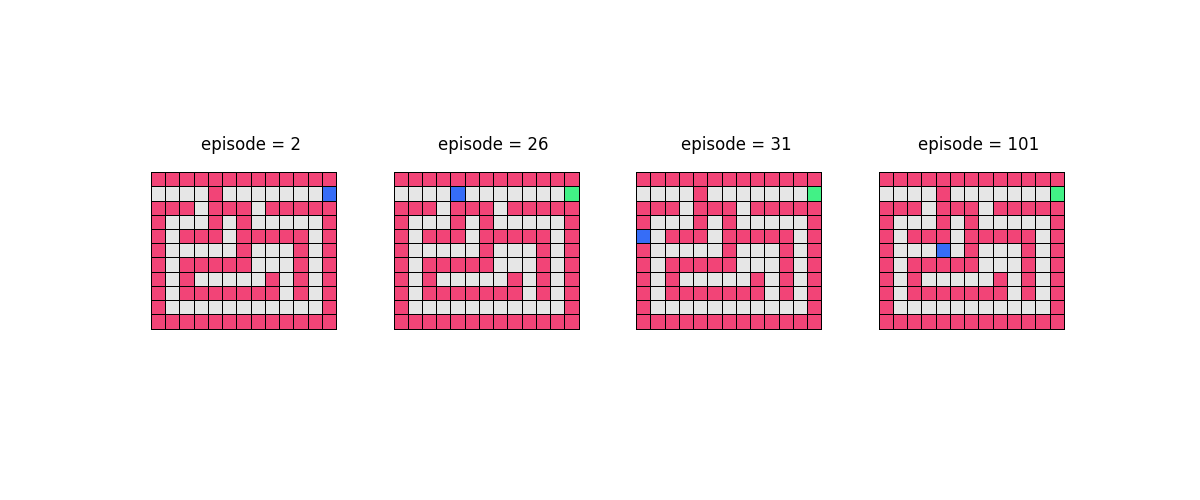
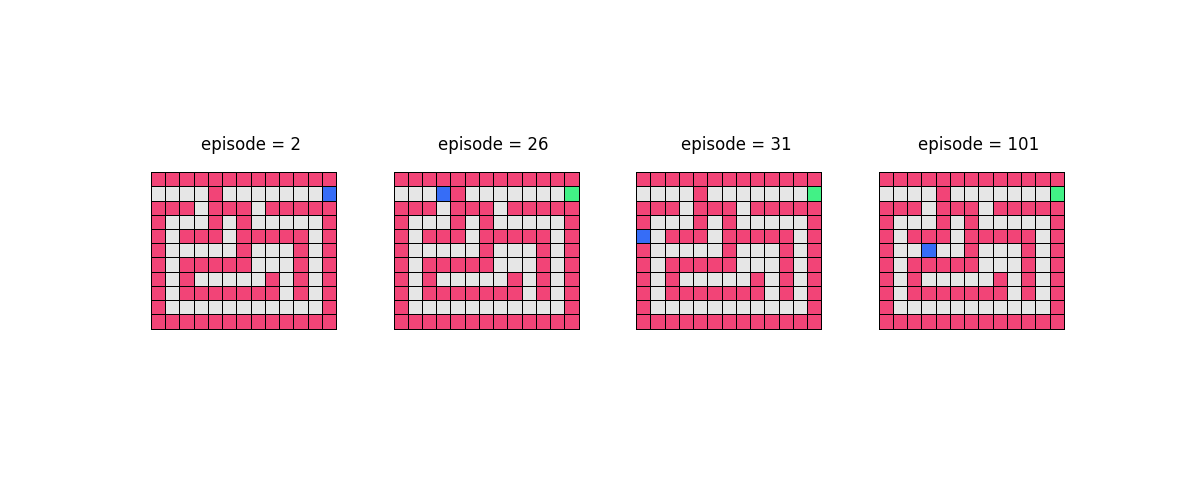
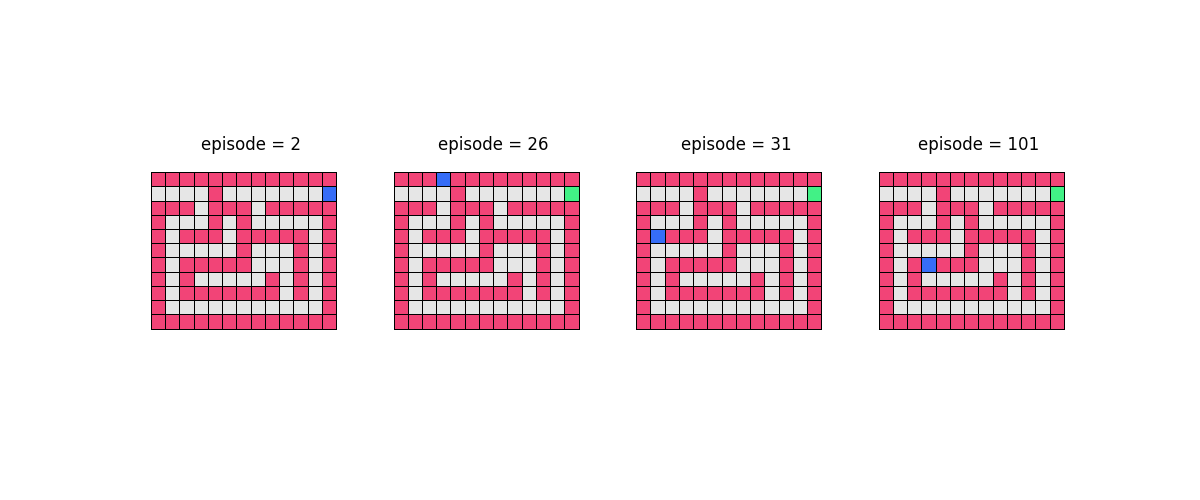
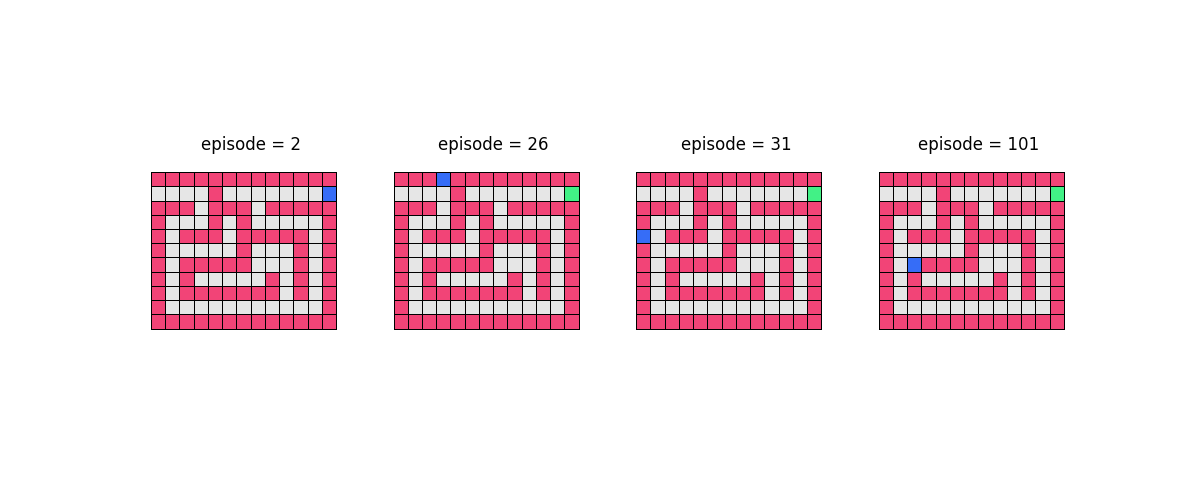
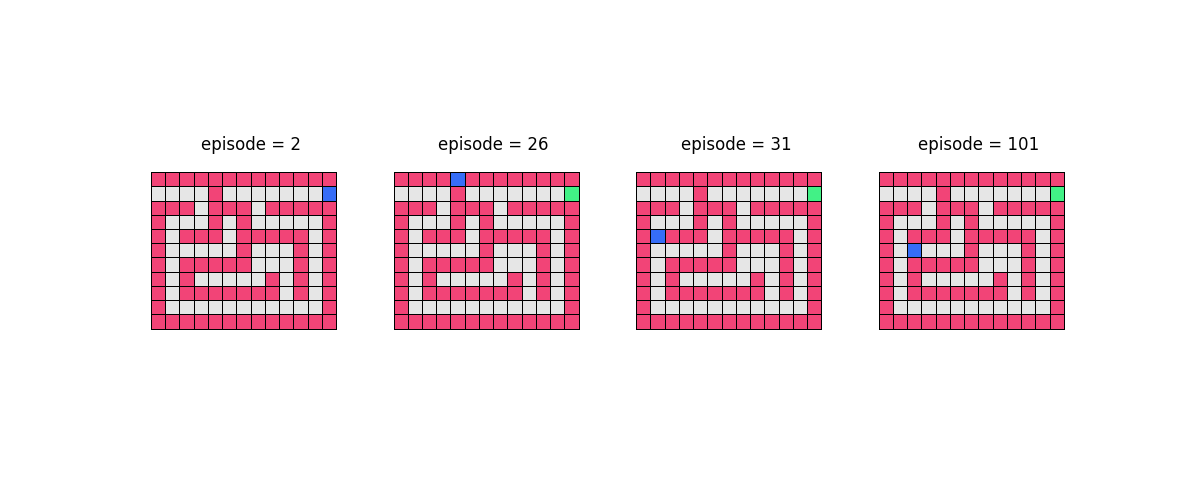
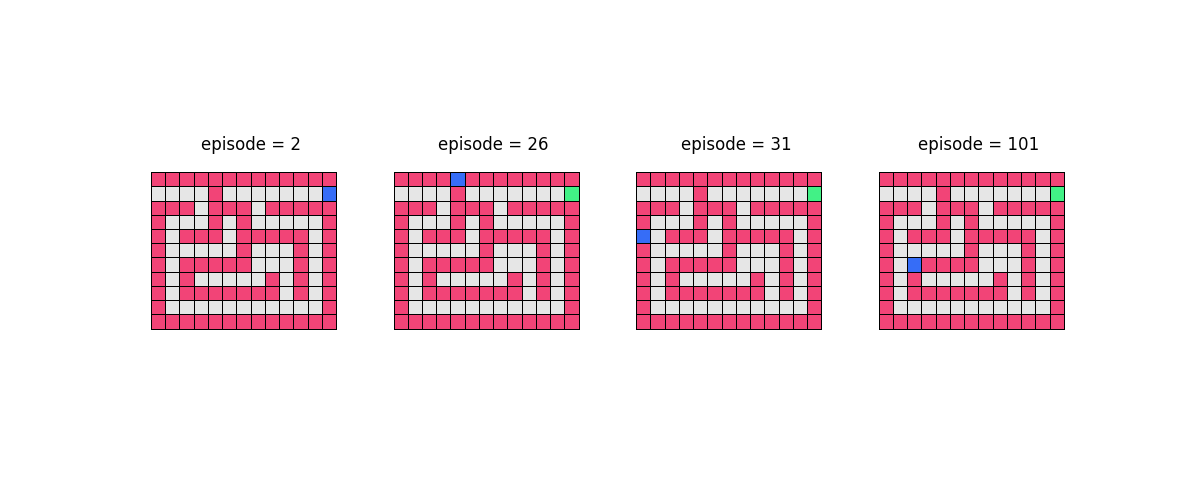
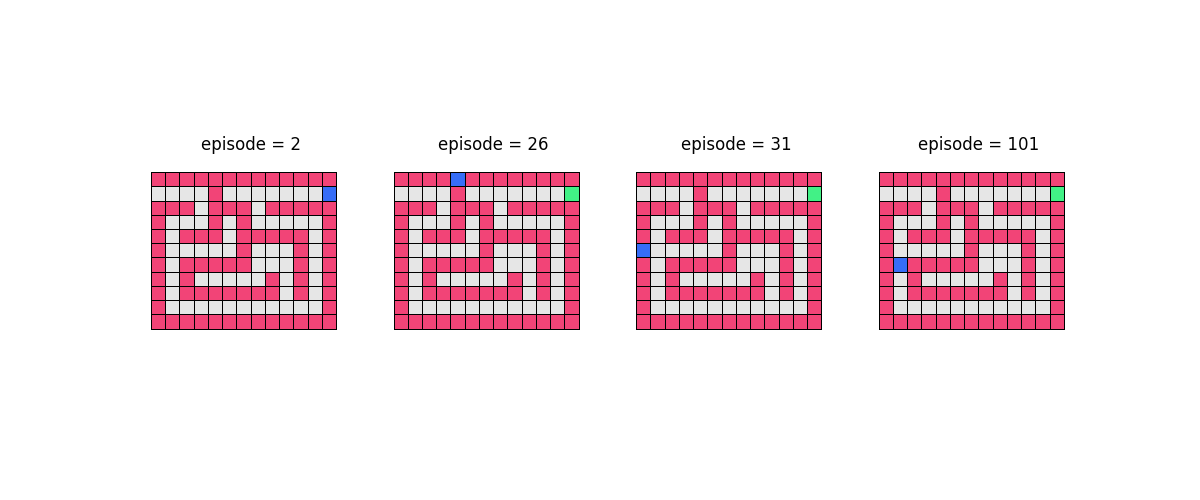
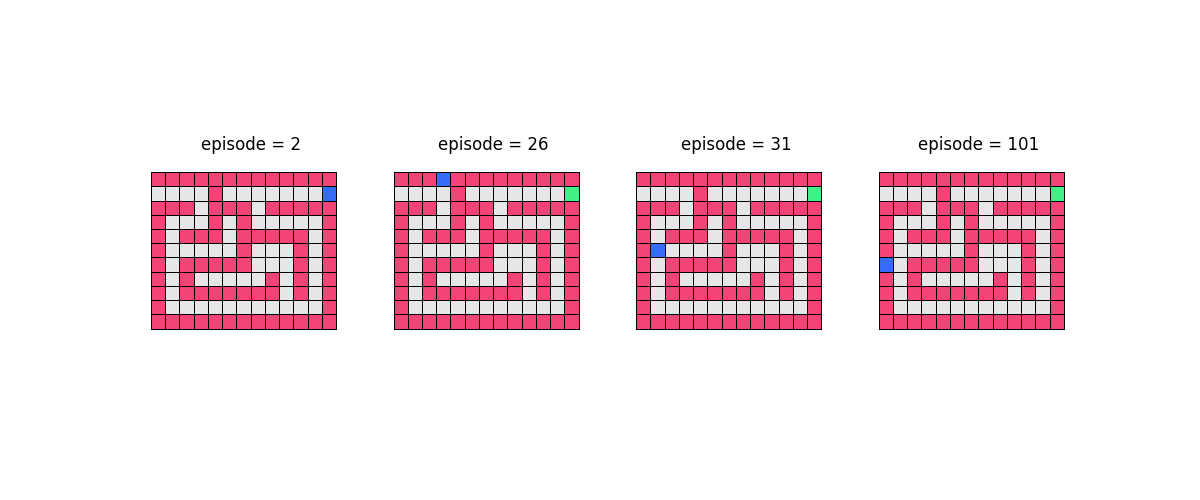
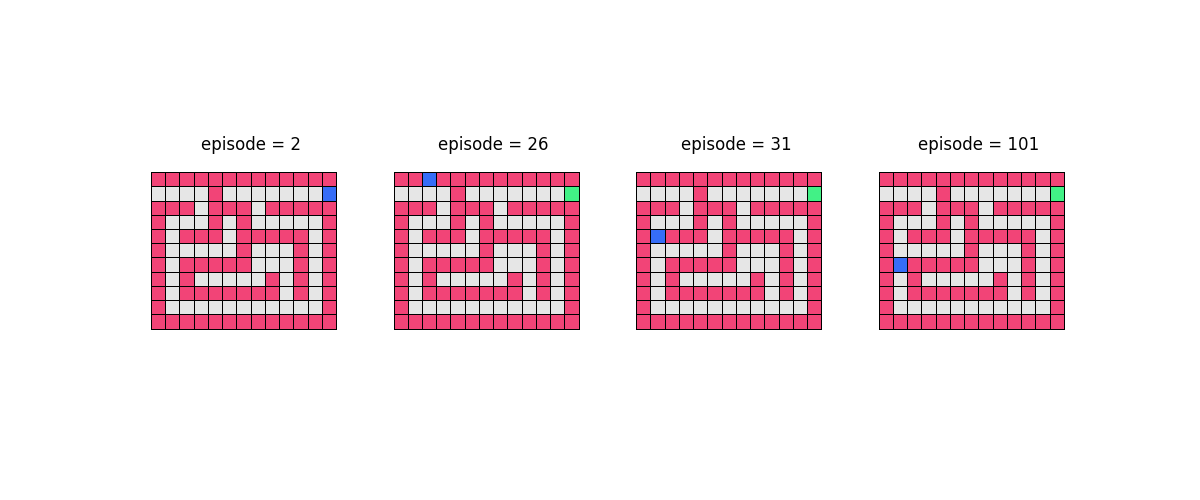
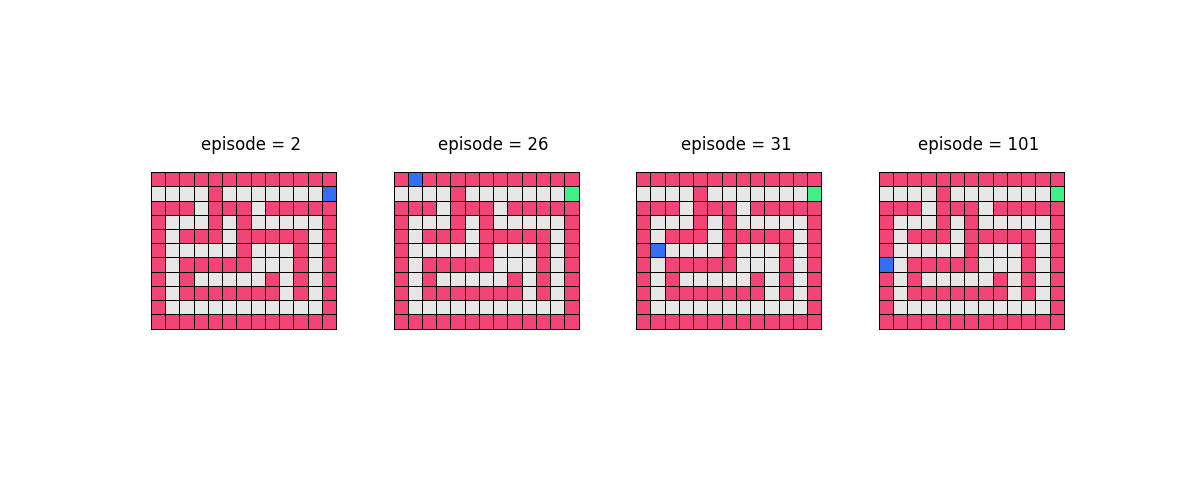
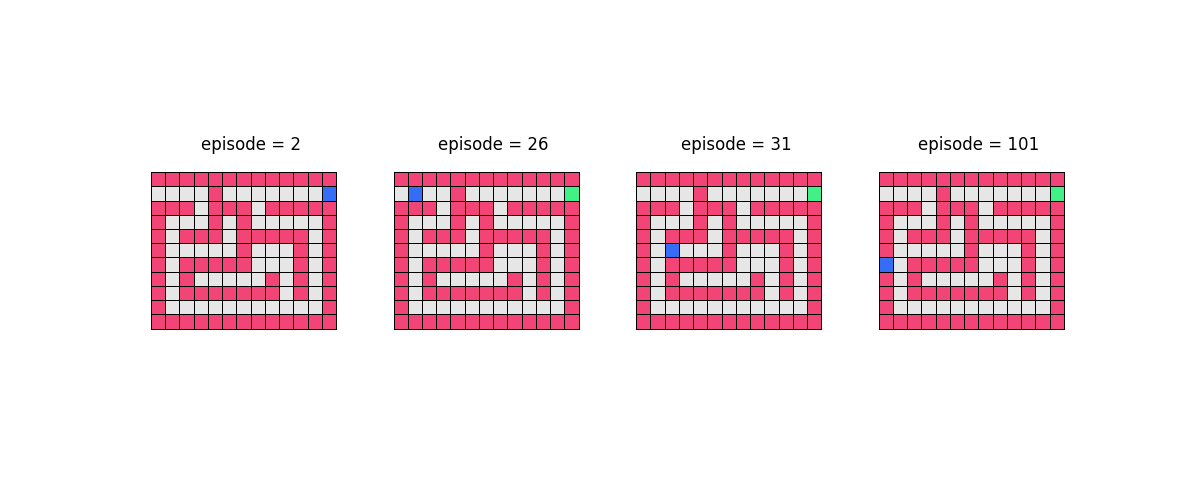
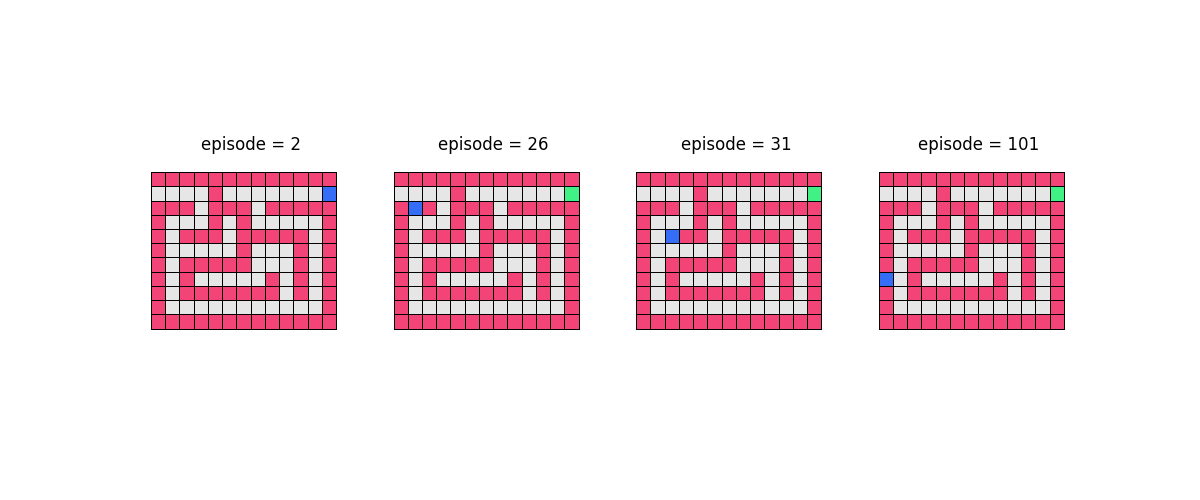
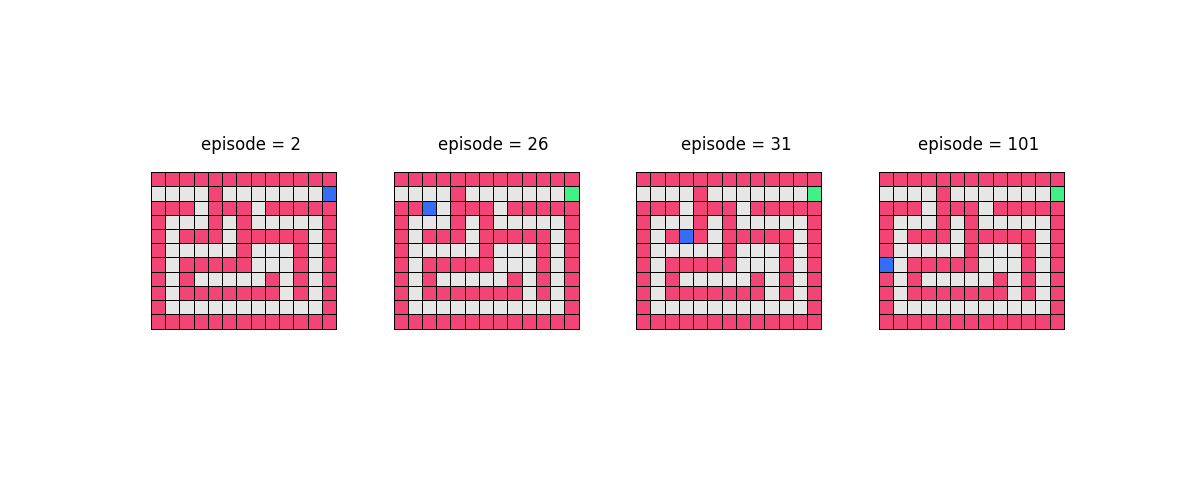
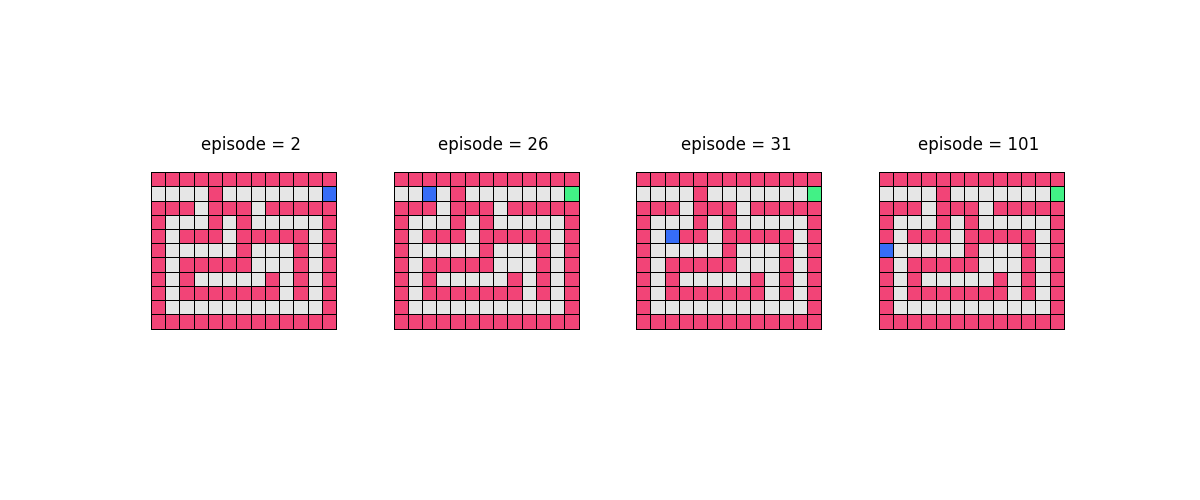
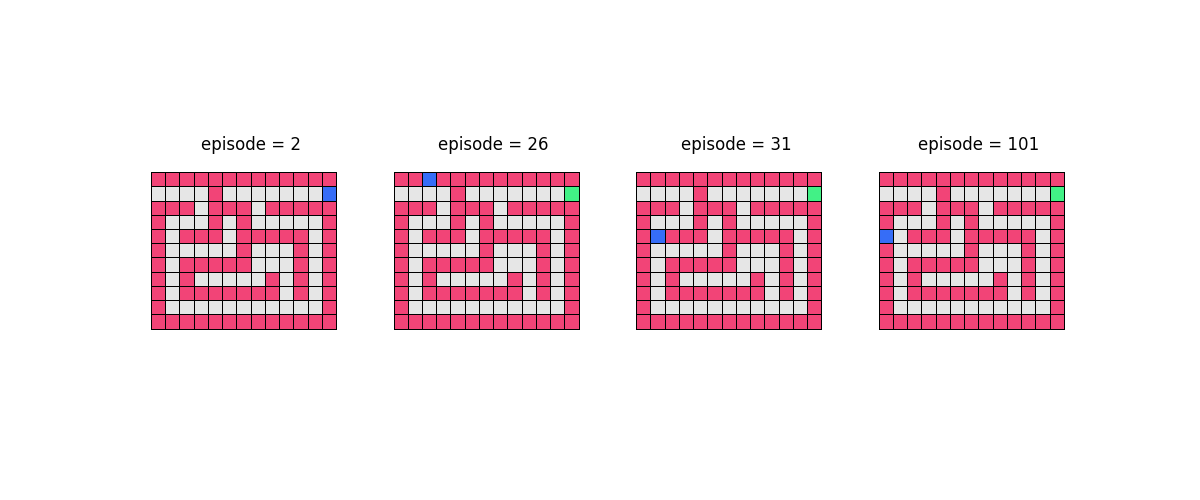
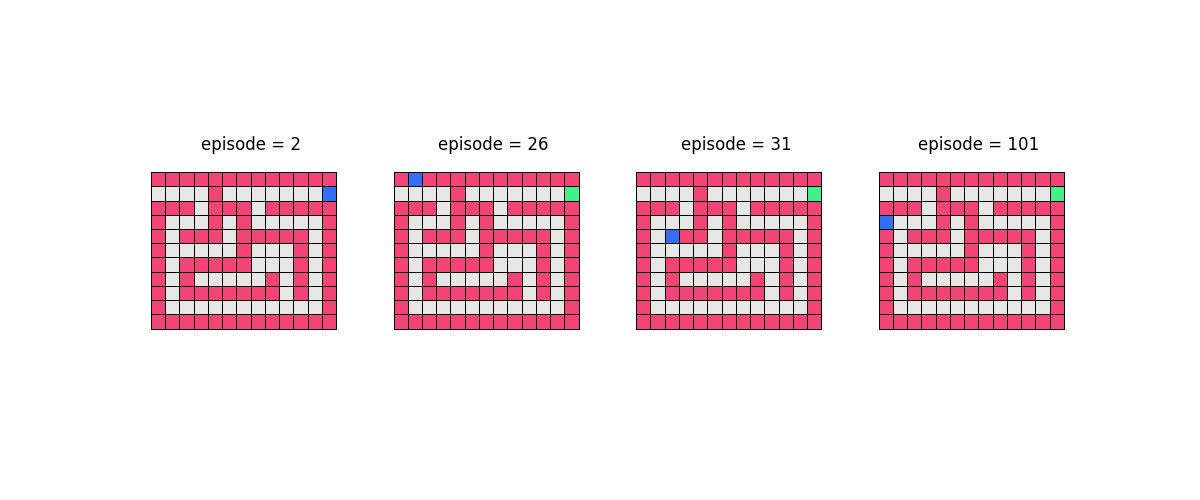
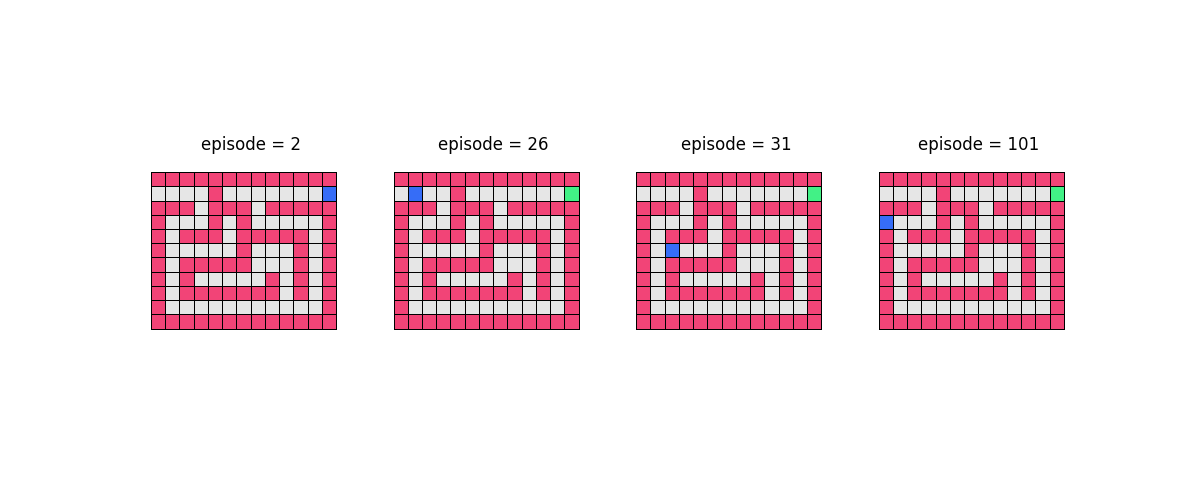

In [11]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

### animate training runs of one algorithm ###
animator.animate_training_runs(gridworld = small_maze, learner = small_maze_qlearner,episodes = [1,25,30,100])

## Example - plotting total reward per episode on small maze

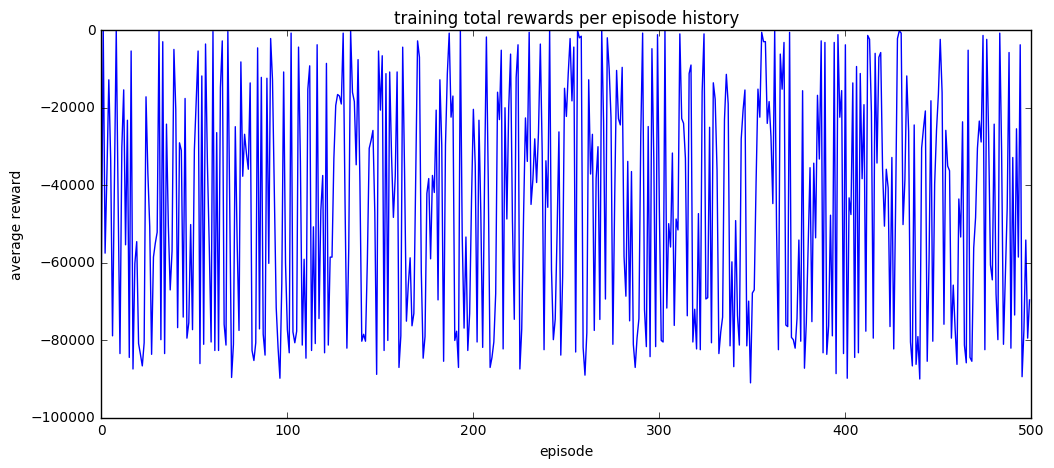

In [9]:
import matplotlib.pyplot as plt

# create figure
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,1,1)

# plot total reward history
ax.plot(small_maze_qlearner.training_reward)

# clean up plot
ax.set_xlabel('episode')
ax.set_ylabel('average reward')
ax.set_title('training total rewards per episode history')
plt.show()

## Exploration-exploitation tradeoff

- We know how to choose optimal action *when* $Q$ is fully trained


$$i^{\star}=\underset{i=1...M}{\text{argmax}}\,\,Q\left(s_{k},\,\alpha_{i}\right)$$


- Intuition: seems wasteful not to employ this, at least once $Q$ resolves from some training episodes

- But is it a chicken and egg problem?  Want to use optimal $Q$ formula to help learn optimal $Q$

- Idea: use it increasingly instead of random action taking as training proceeds

## Exploration-exploitation tradeoff

- turns out to be very helpful (in terms of faster training time)

- even lazier: pick **exploration/exploitation parameter** $p\in[0,1]$ and pick random action at each step with probability $p$, optimal action with probability (1-p)

---
During a step starting from state $s_k$ choose a random number $r\in[0,1]$ uniformly at random and with a threshold $p$ where $0<p<1$ choose the next action according too

**if** $r < p$

$~~~~~~~~~$Choose $a_k$ randomly
  
**else** 

$~~~~~~~~~$Choose $a_k$ according to the optimal policy

---

- even this works pretty well 

## Example with small gridworld

In [14]:
### compare random versus exploit-based training 
# load in q-learning class
from gridworld_lib import gridworld_qlearn

# create a q-learner using random actions
random_qlearner = gridworld_qlearn.learner(gridworld = small_maze,action_method = 'random')

# create a q-learner using exploration/exploitation actions
exploit_qlearner = gridworld_qlearn.learner(gridworld = small_maze,action_method = 'exploit')

# train each: random and exploit-based learners
exploit_qlearner.train(verbose = False)
random_qlearner.train(verbose = False)

q-learning algorithm complete
q-learning algorithm complete


## Example with small gridworld

- at episode 0, no real difference since $Q$ not yet resolved


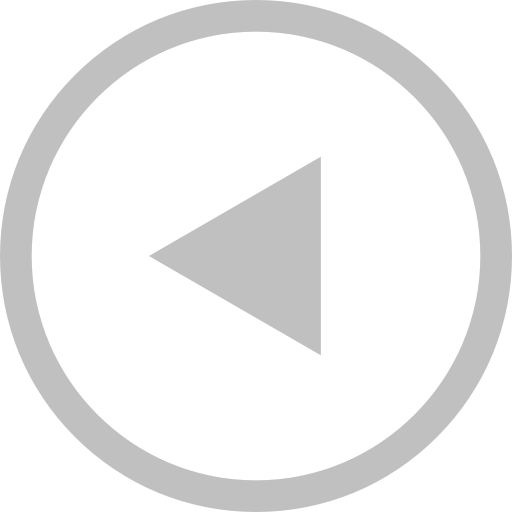
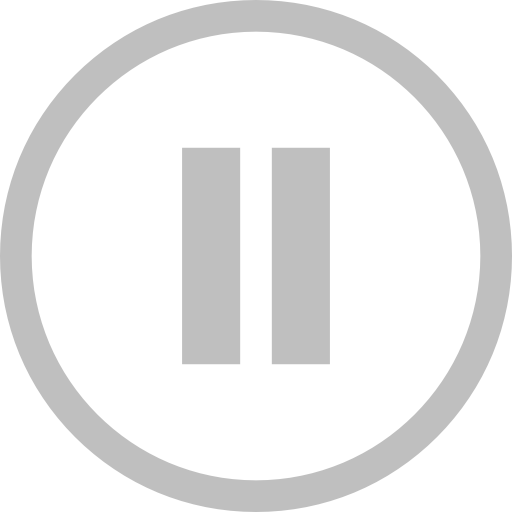
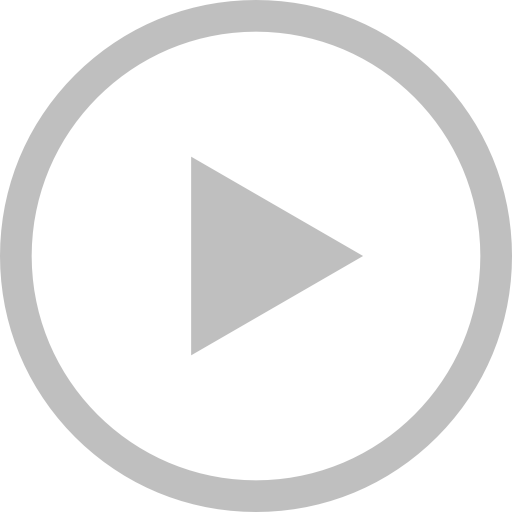
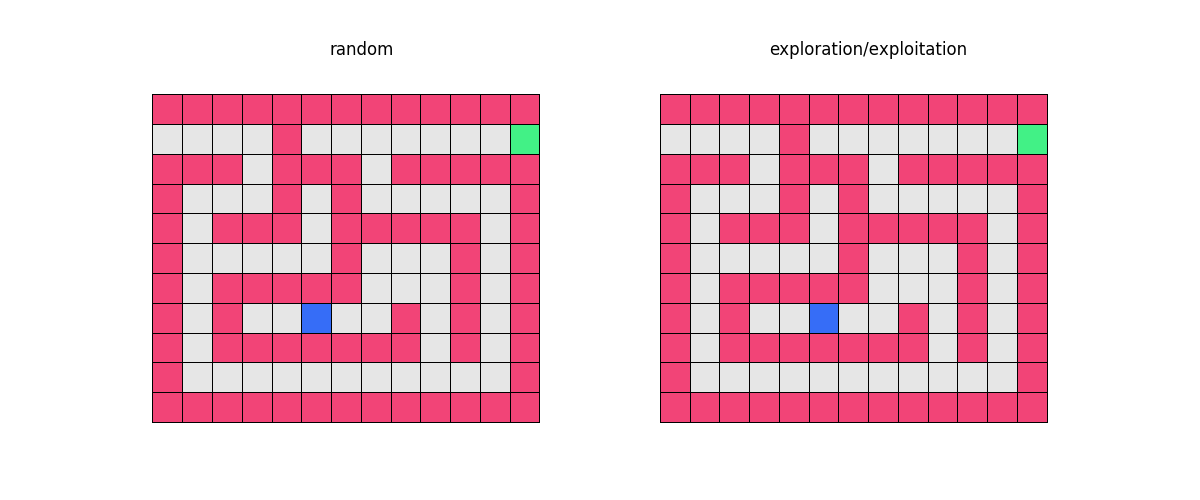
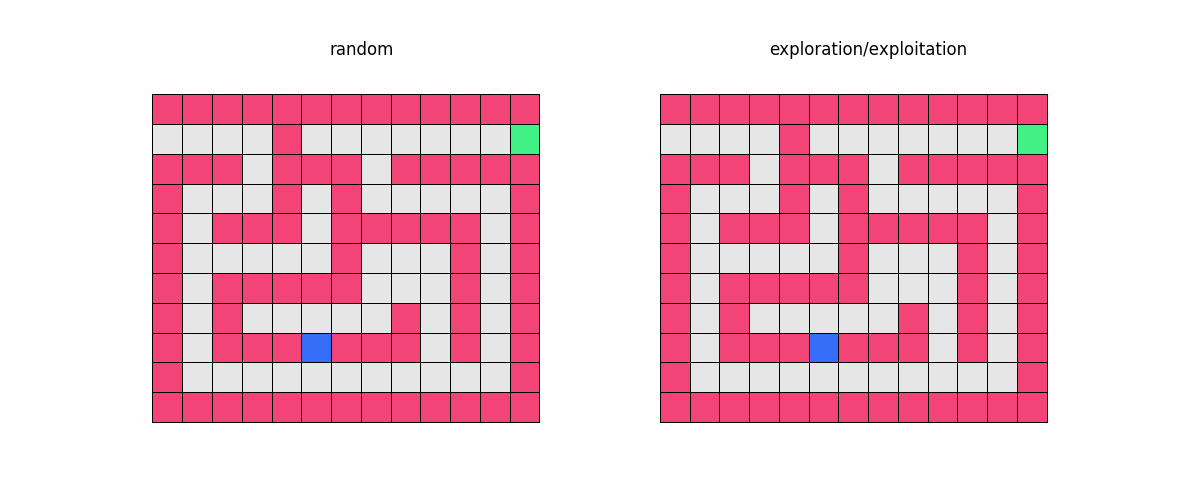
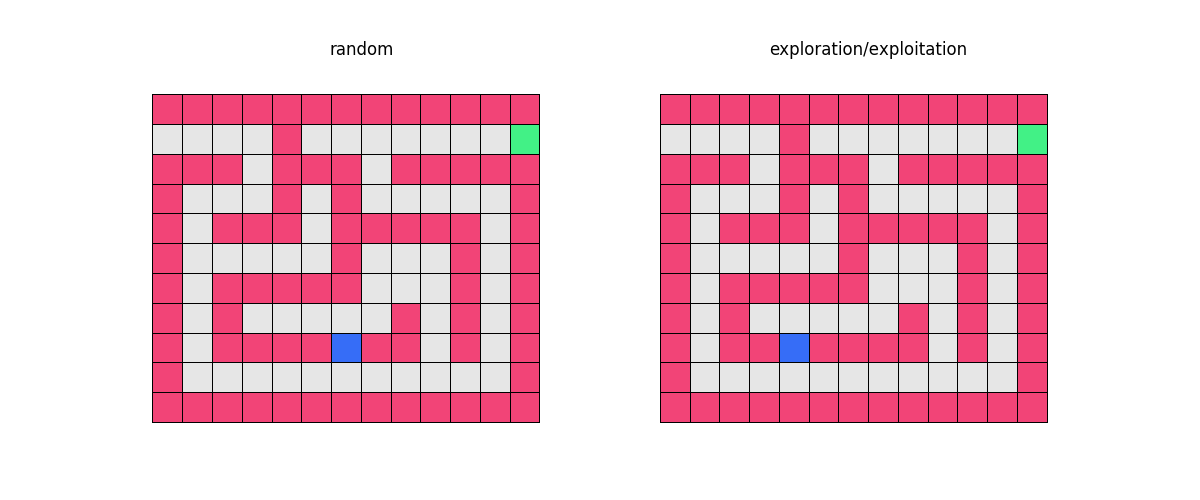
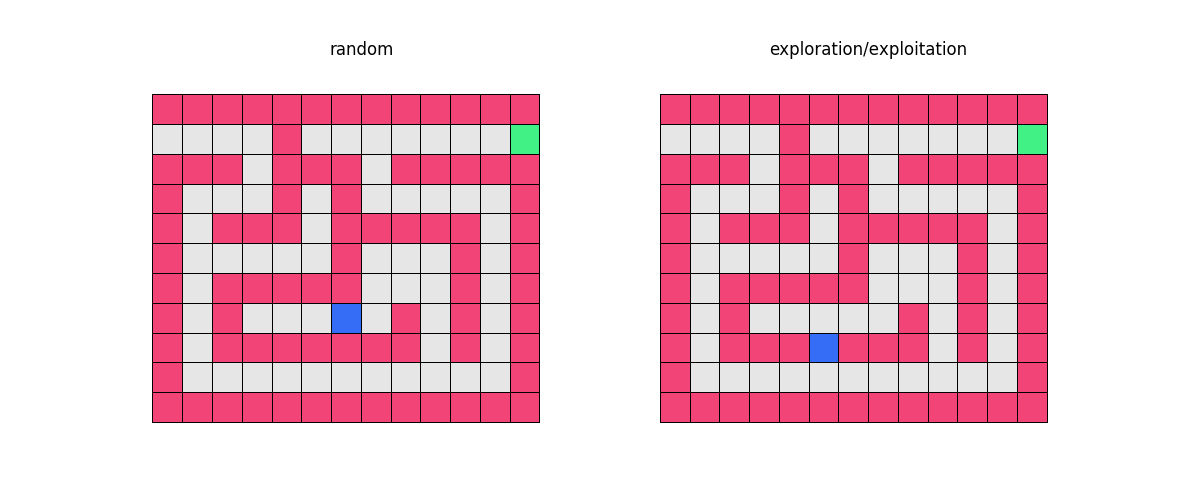
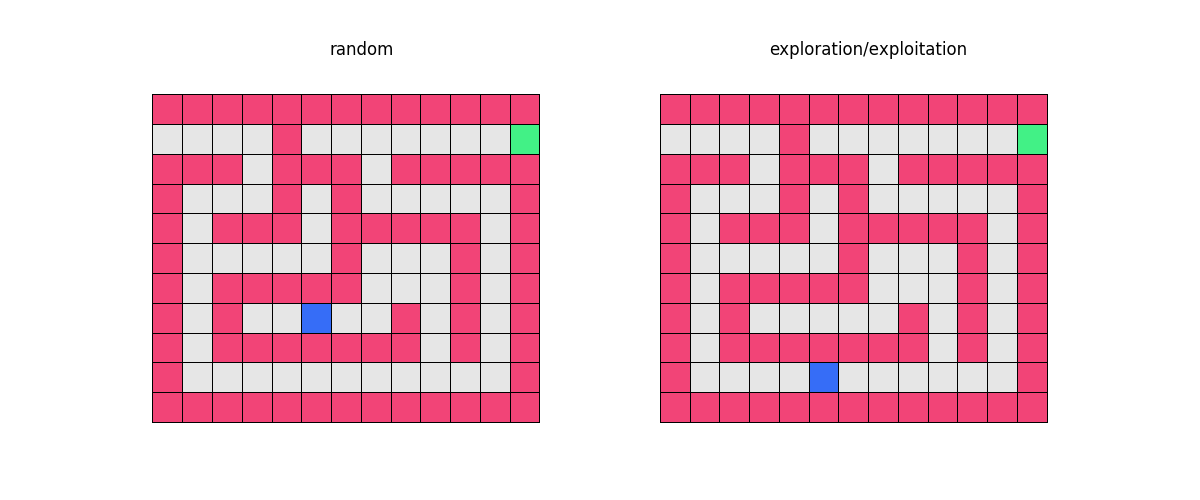
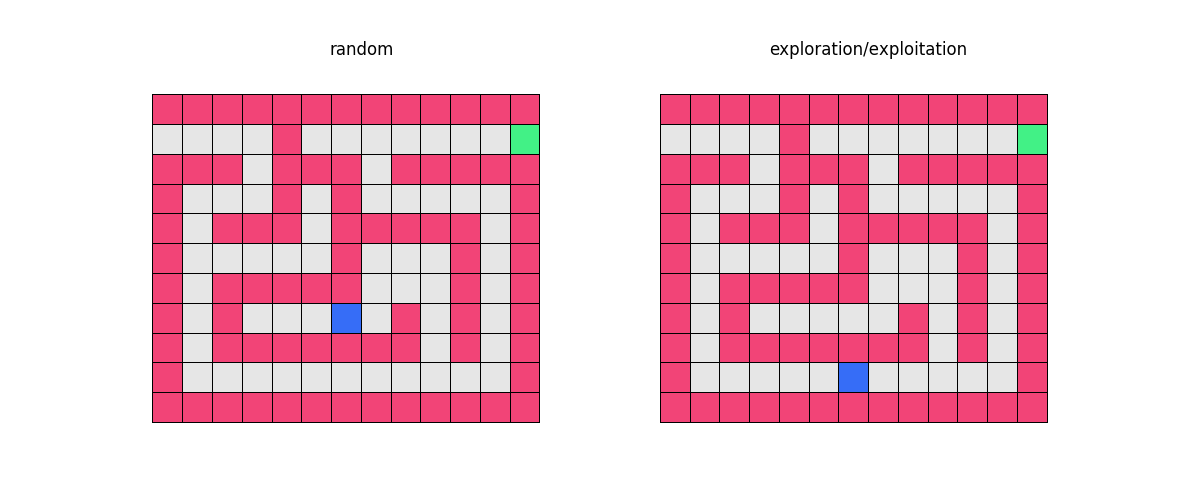
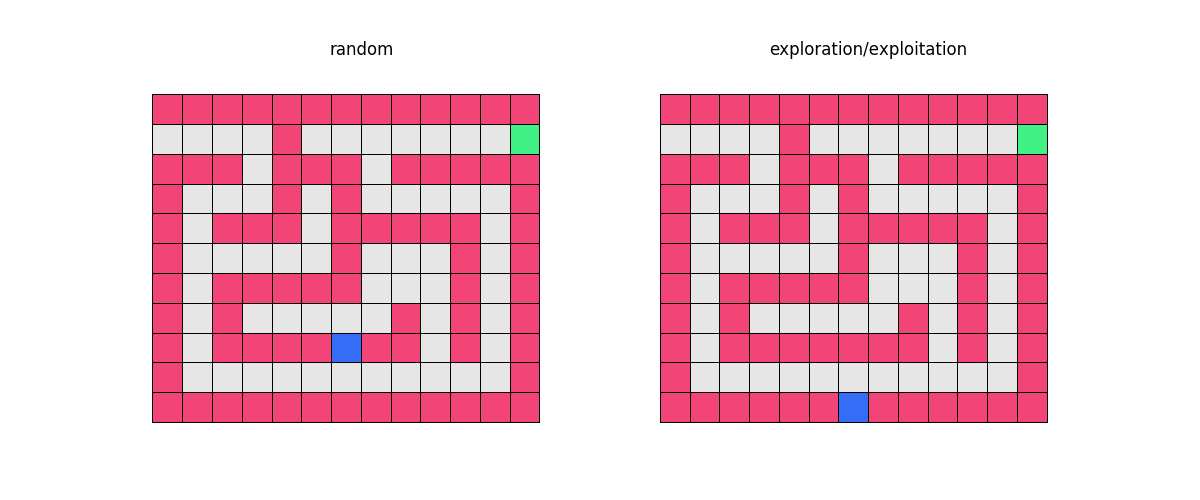
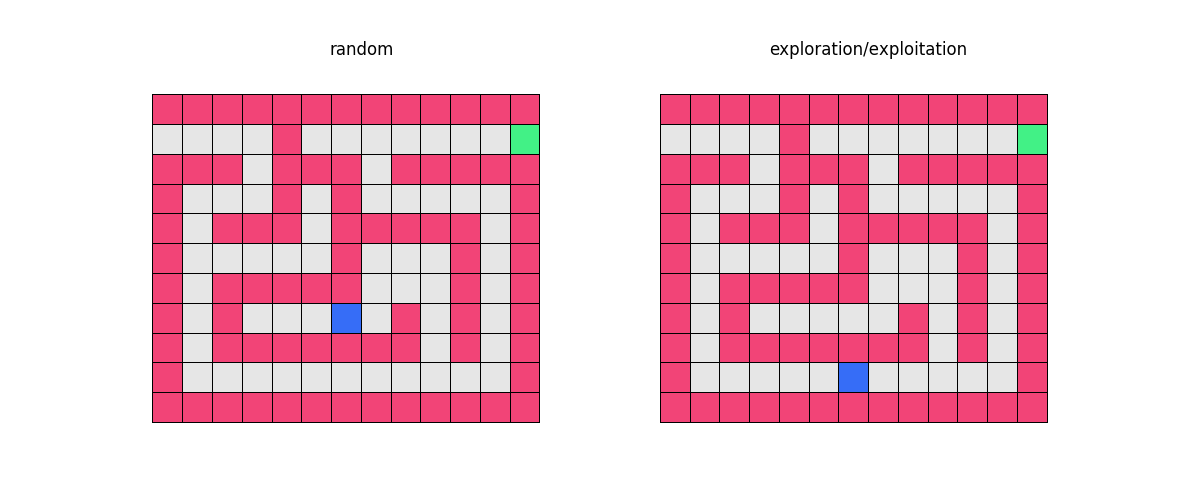
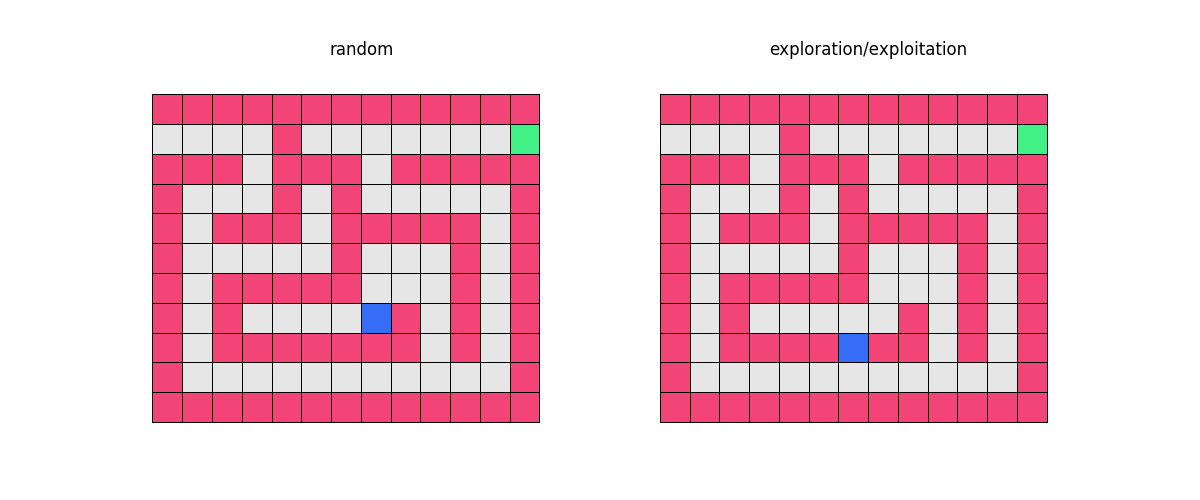
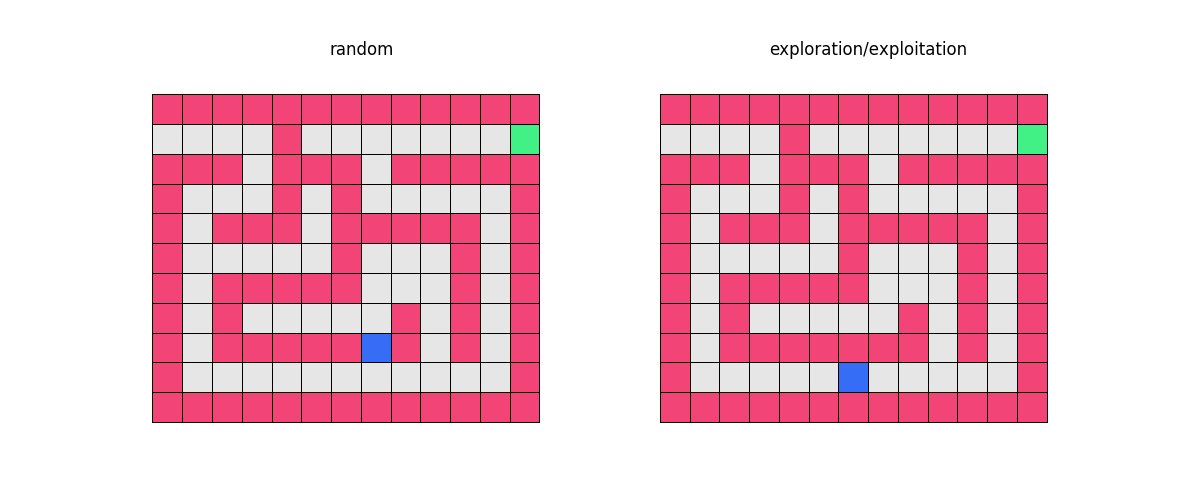
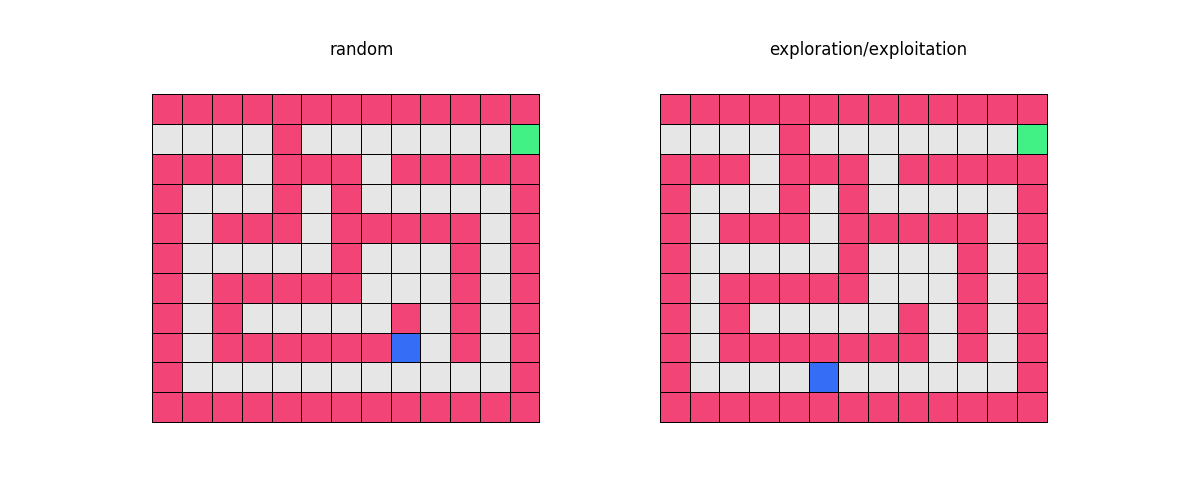
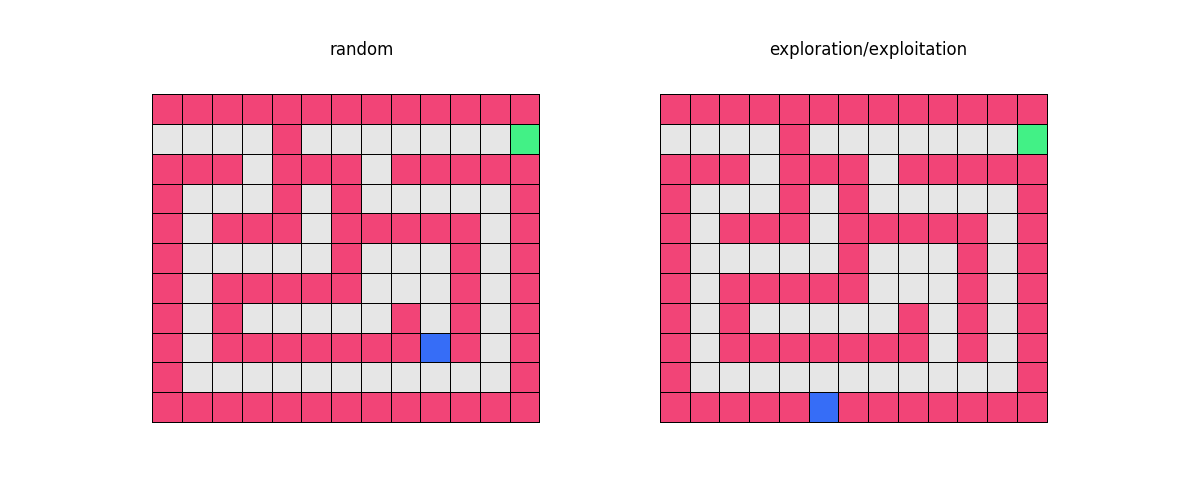
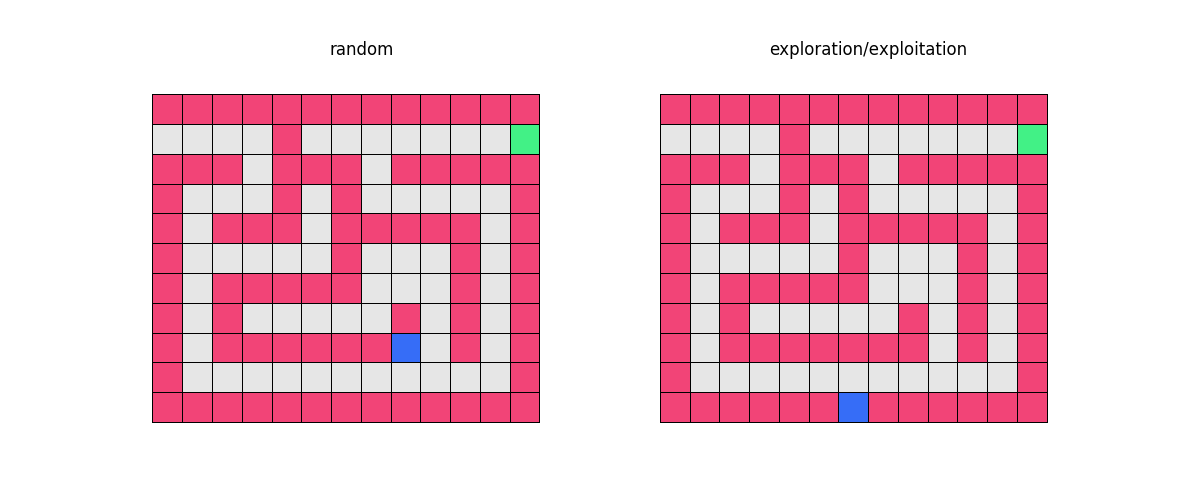
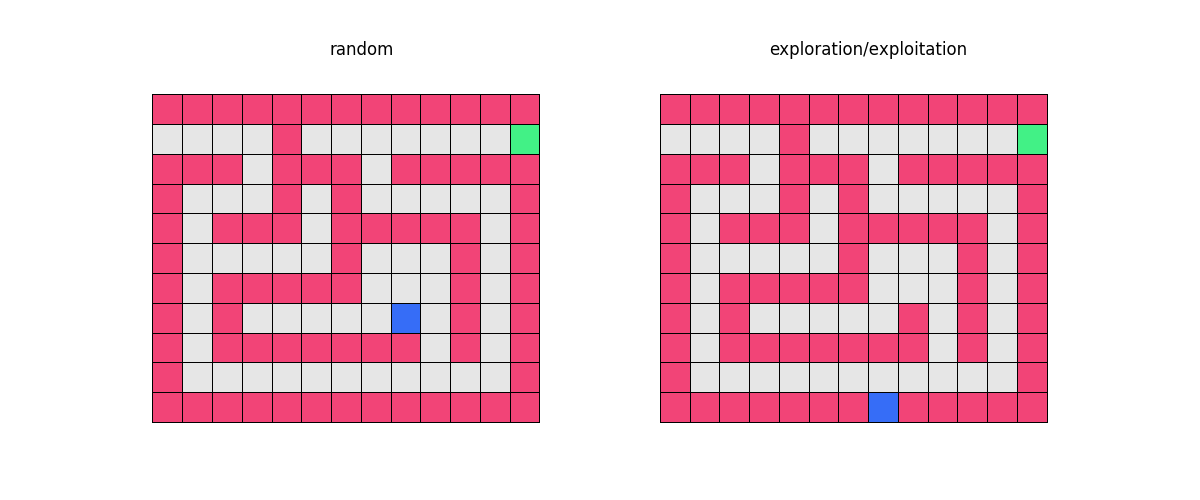
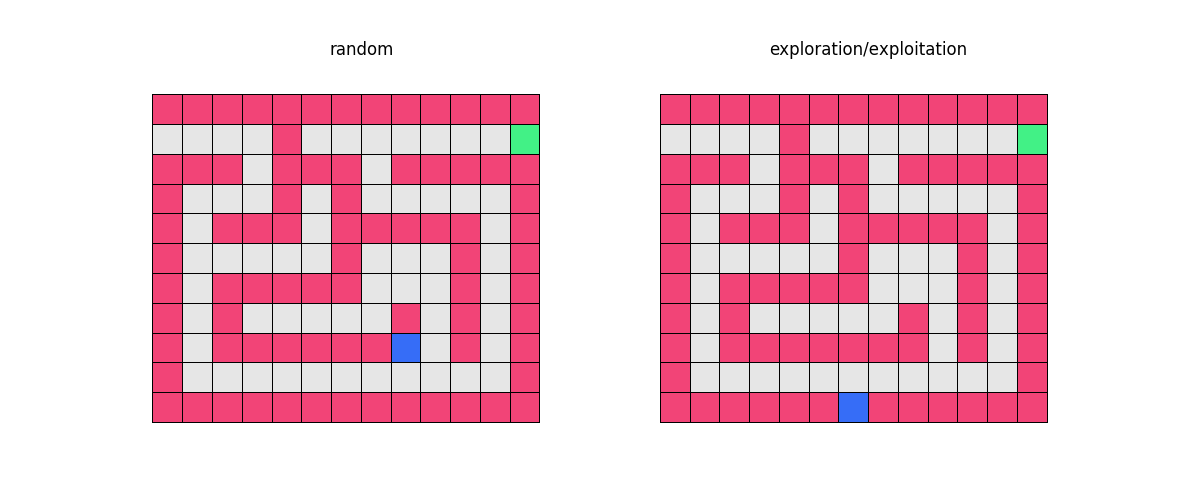
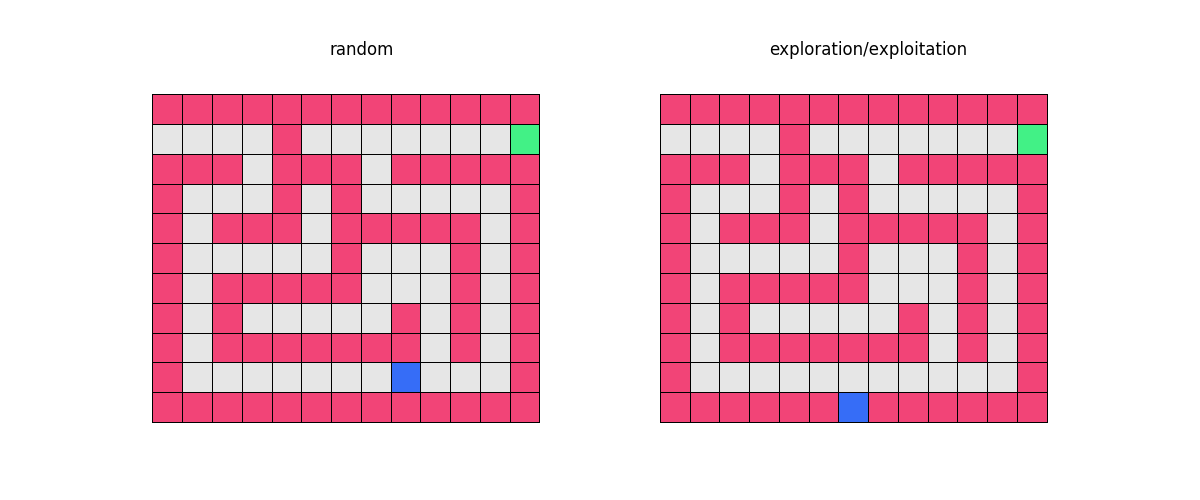
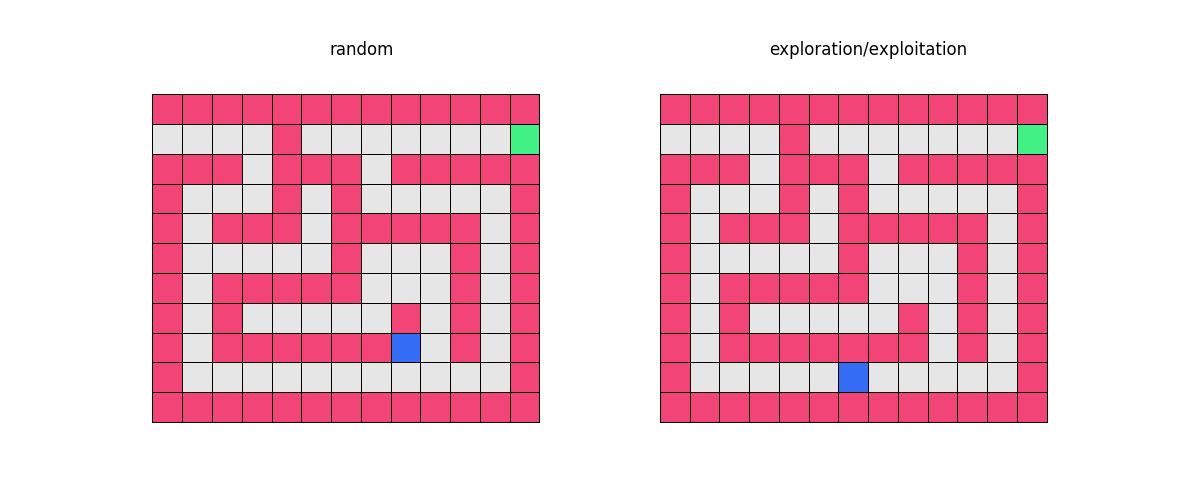
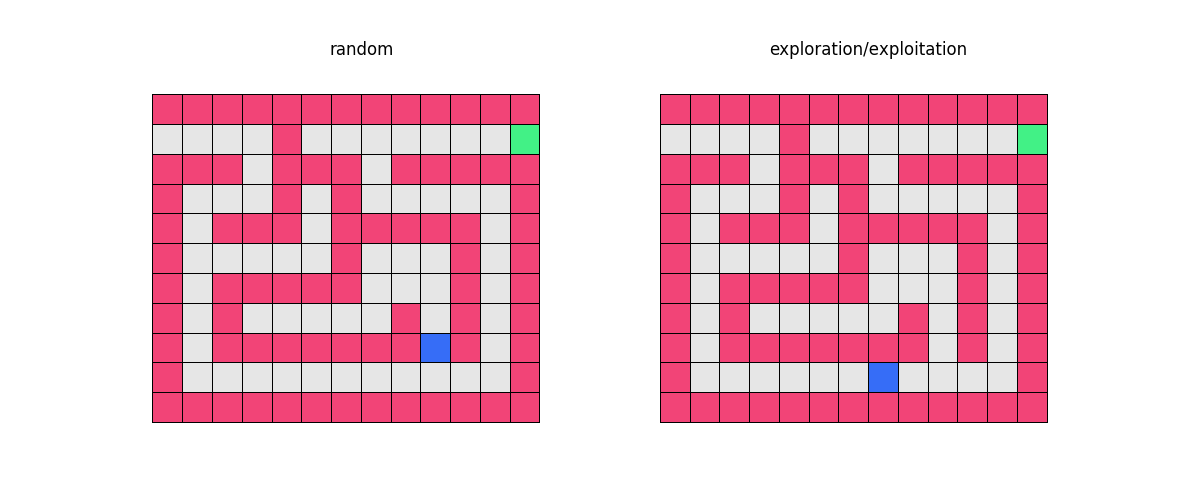
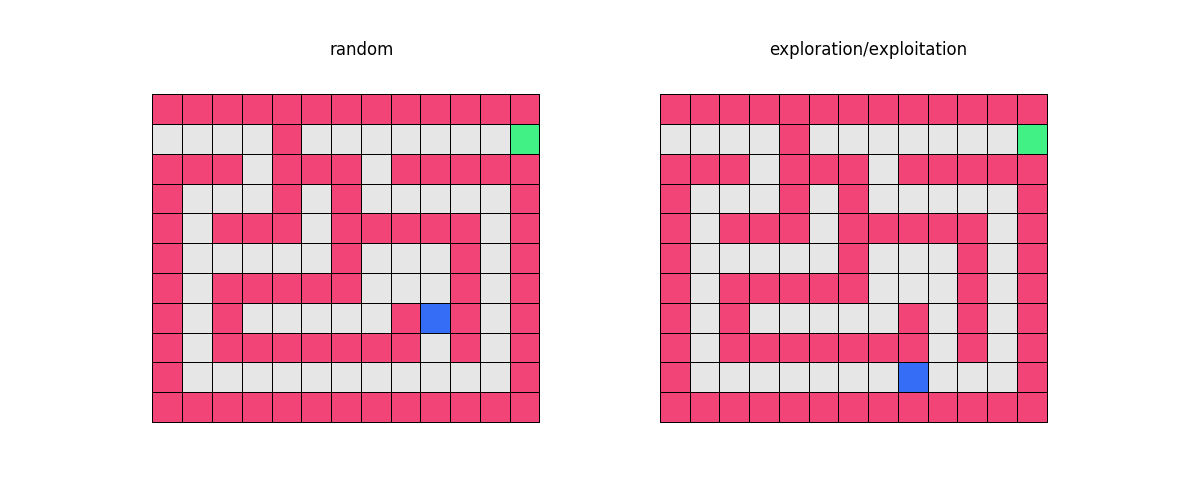
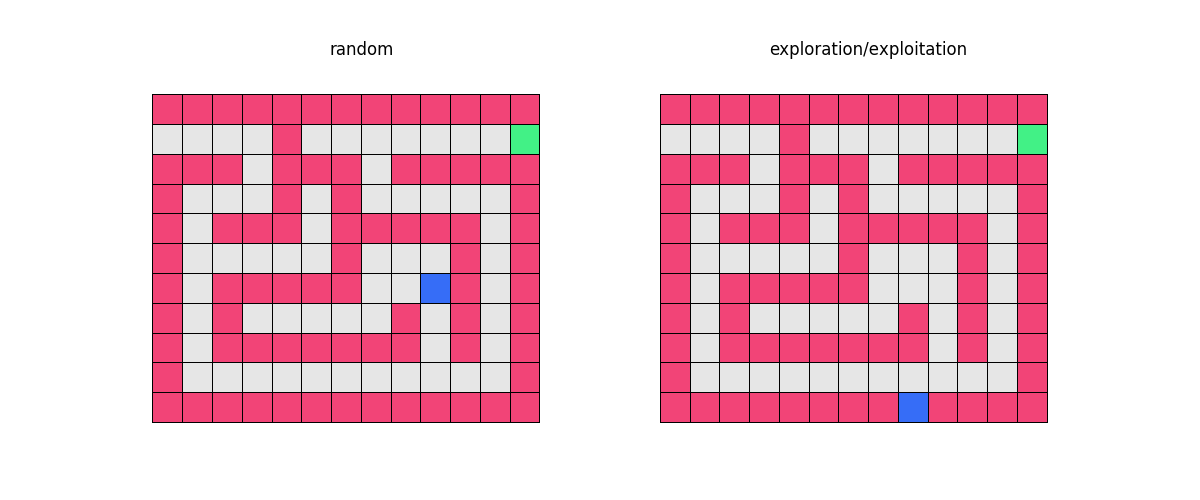
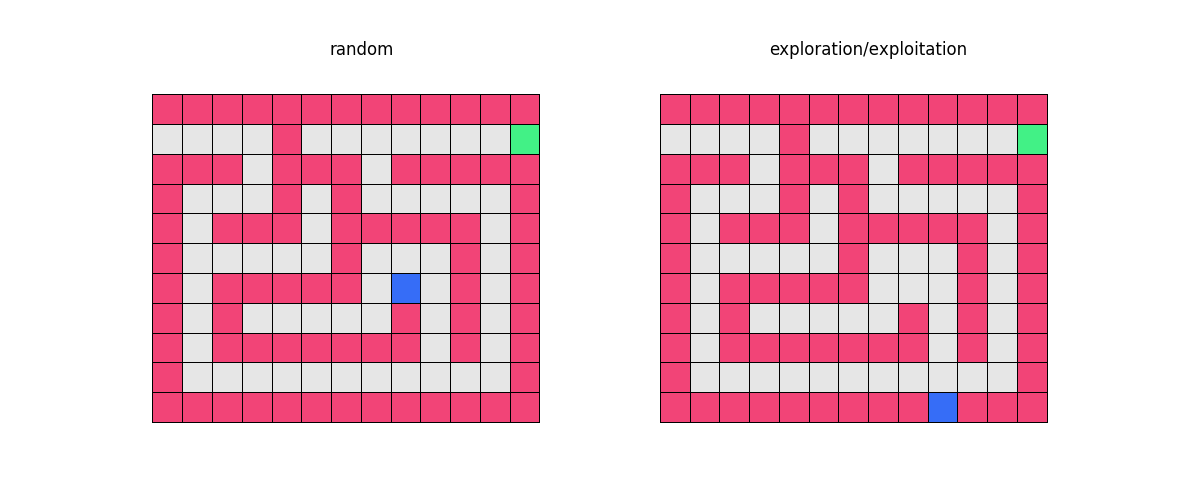
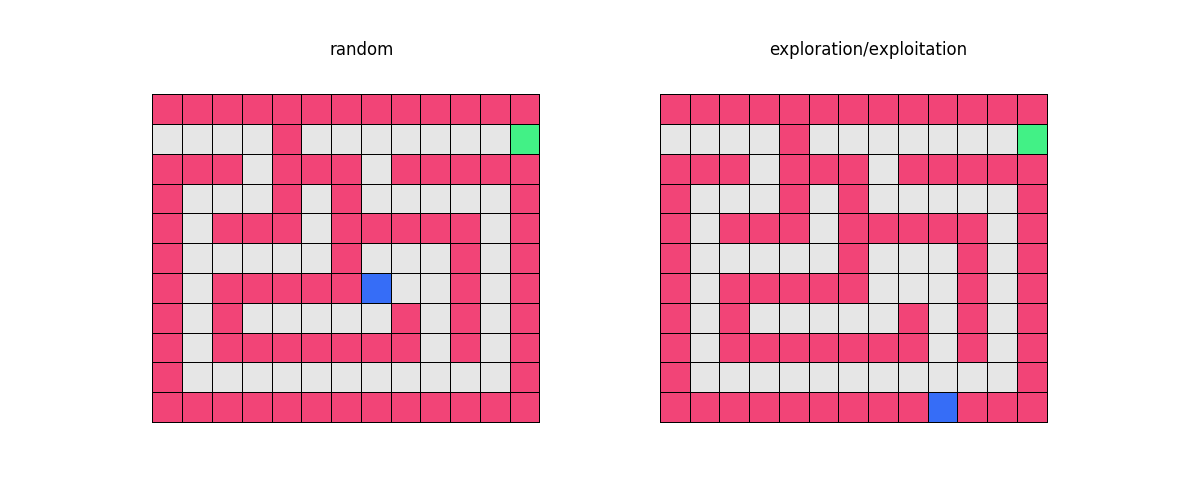
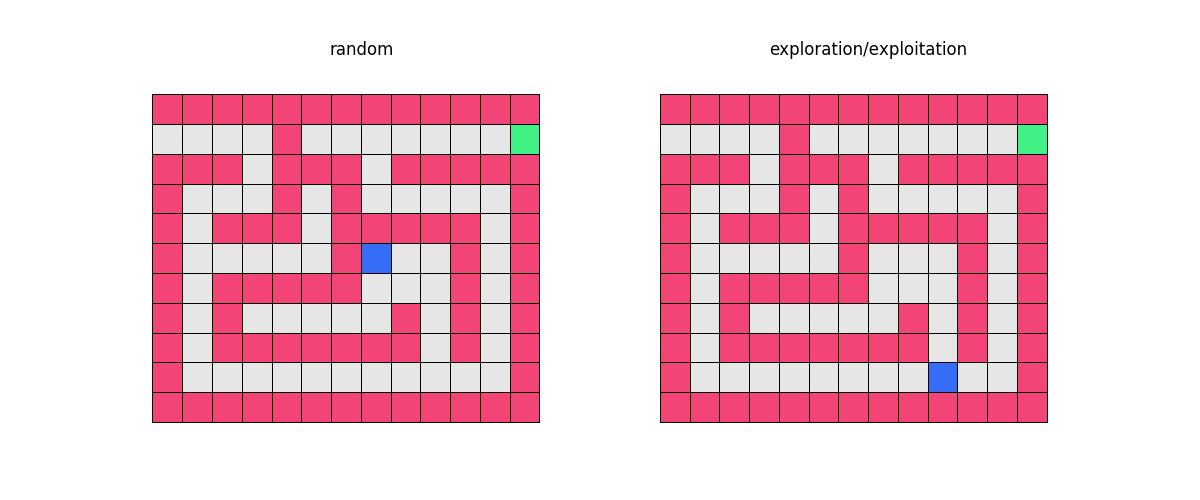
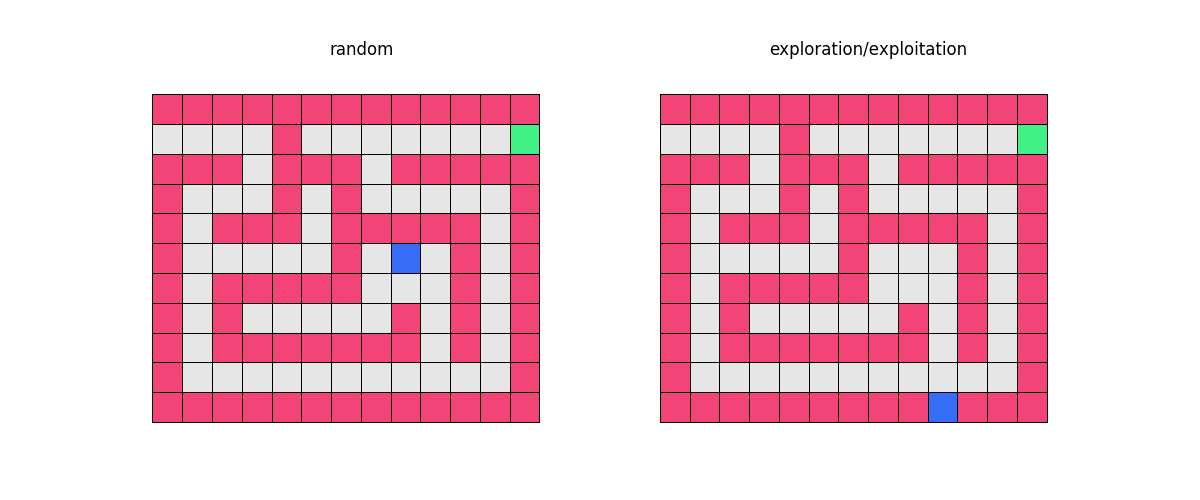
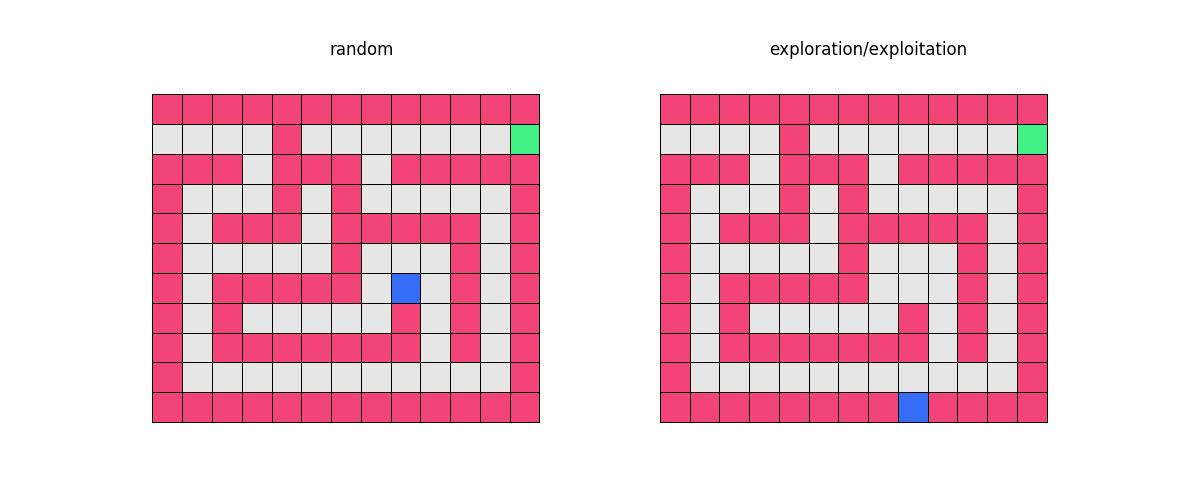
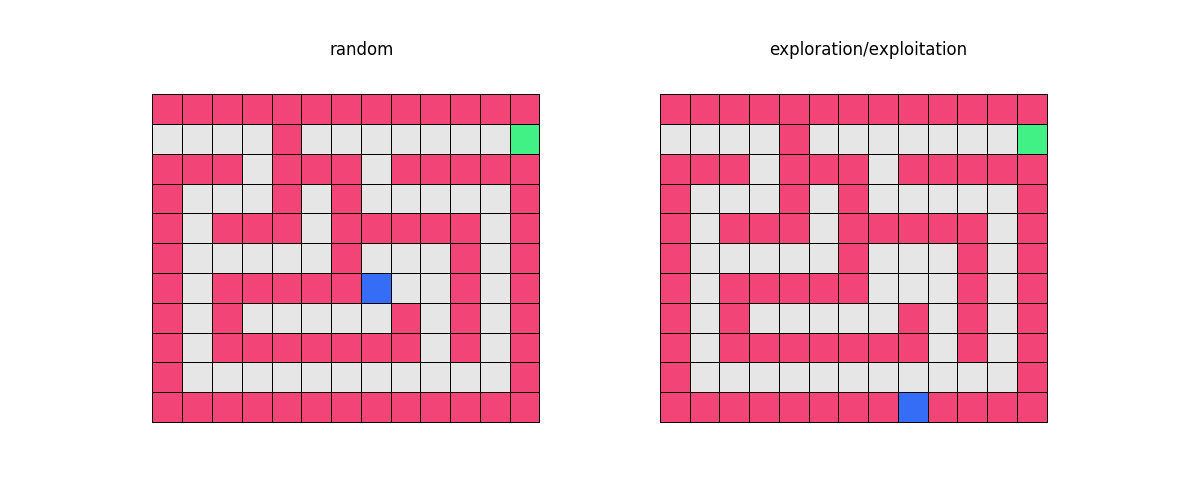
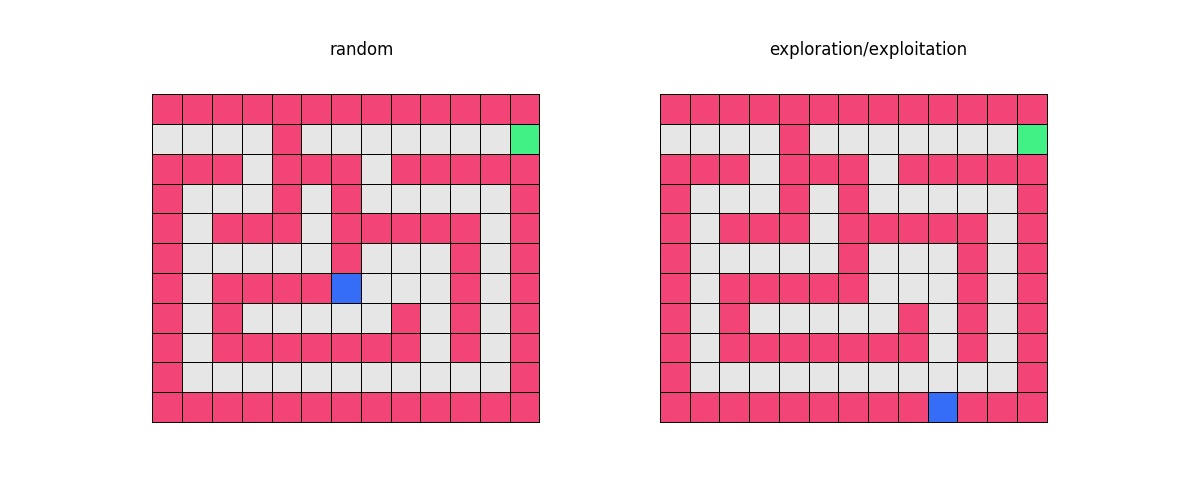
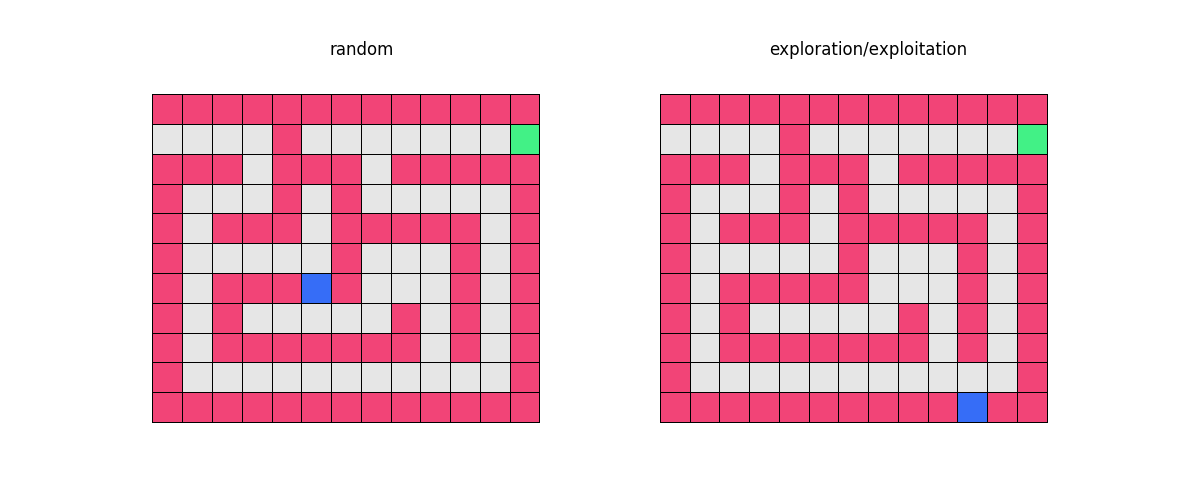
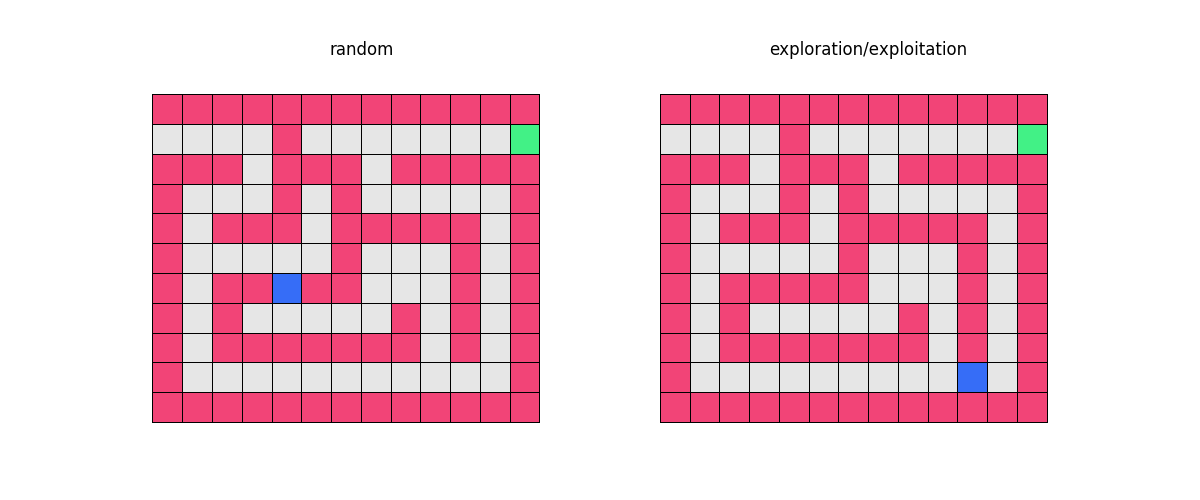
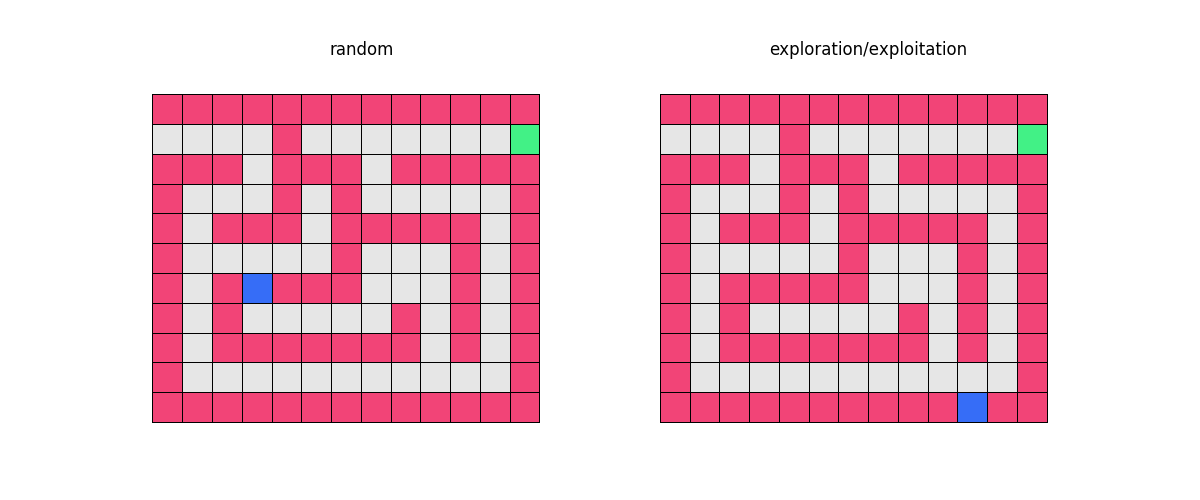
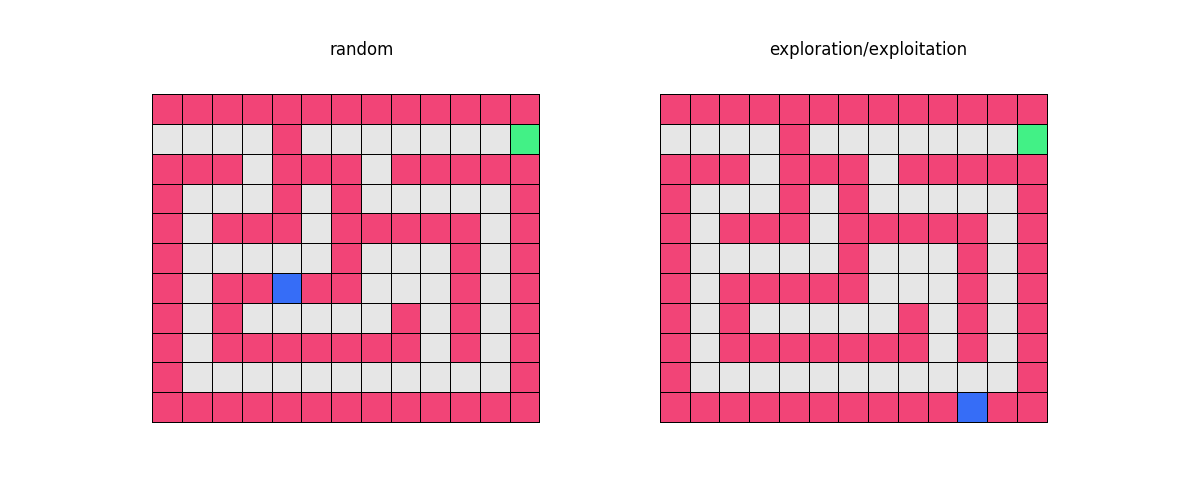
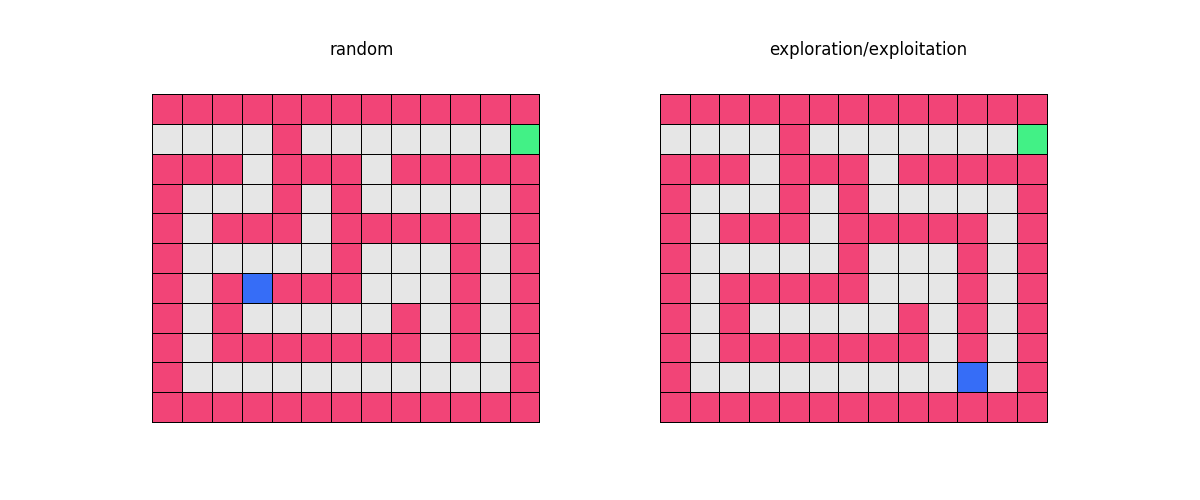
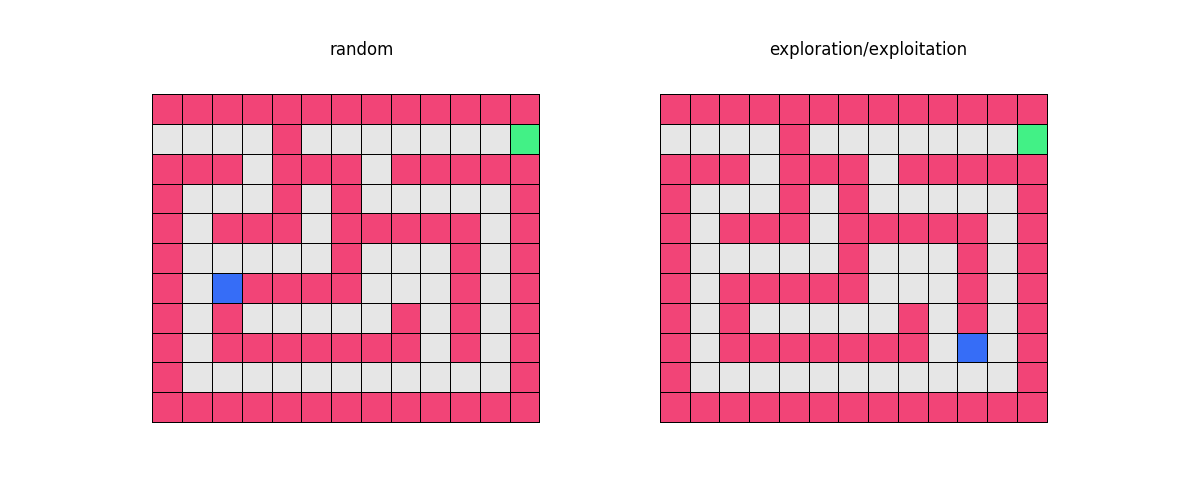
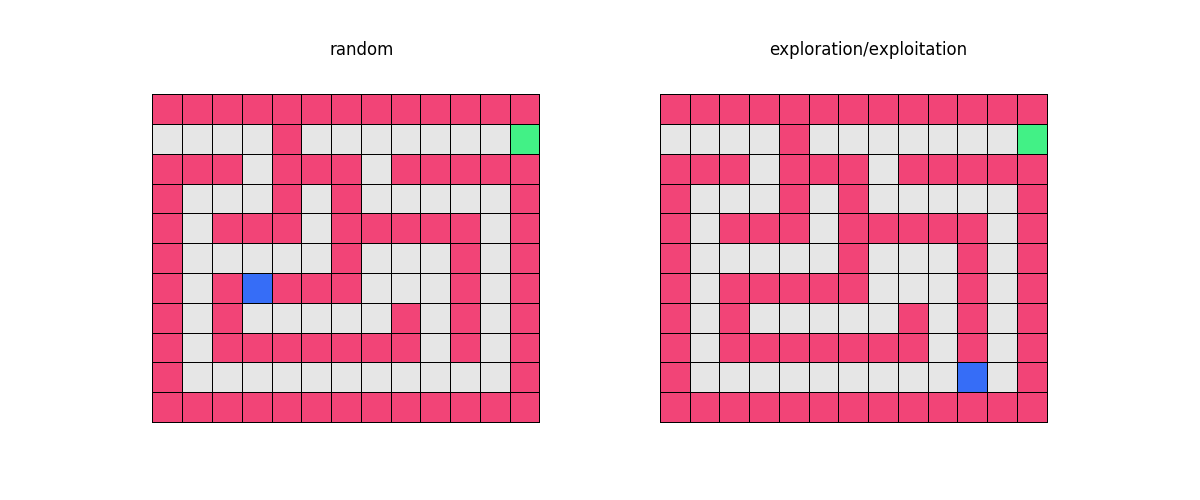
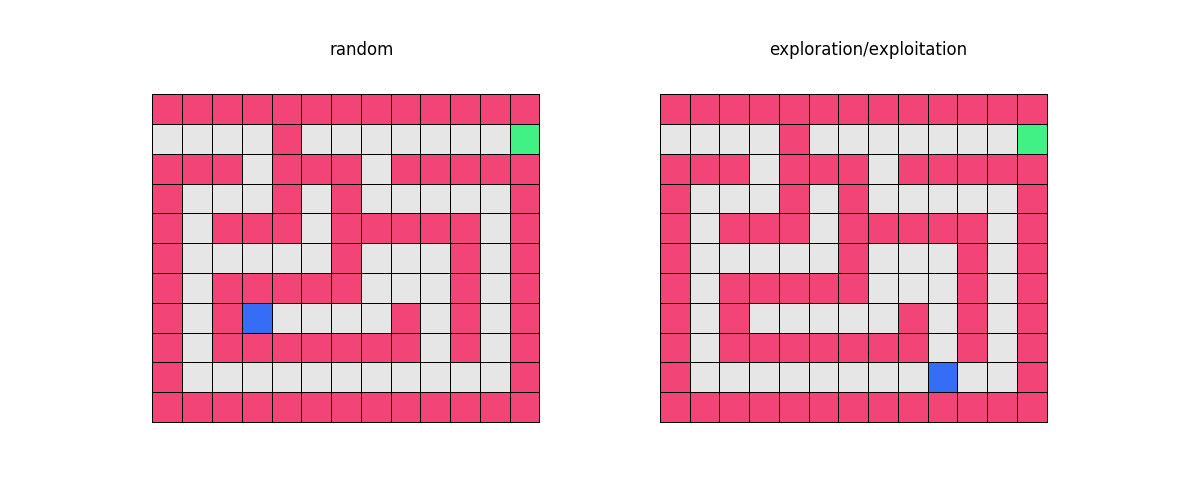
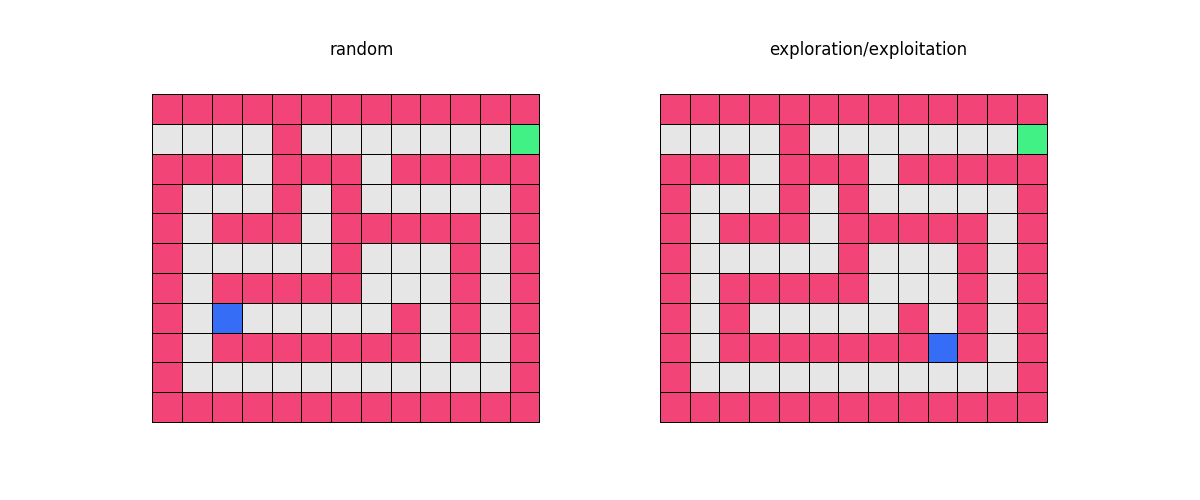
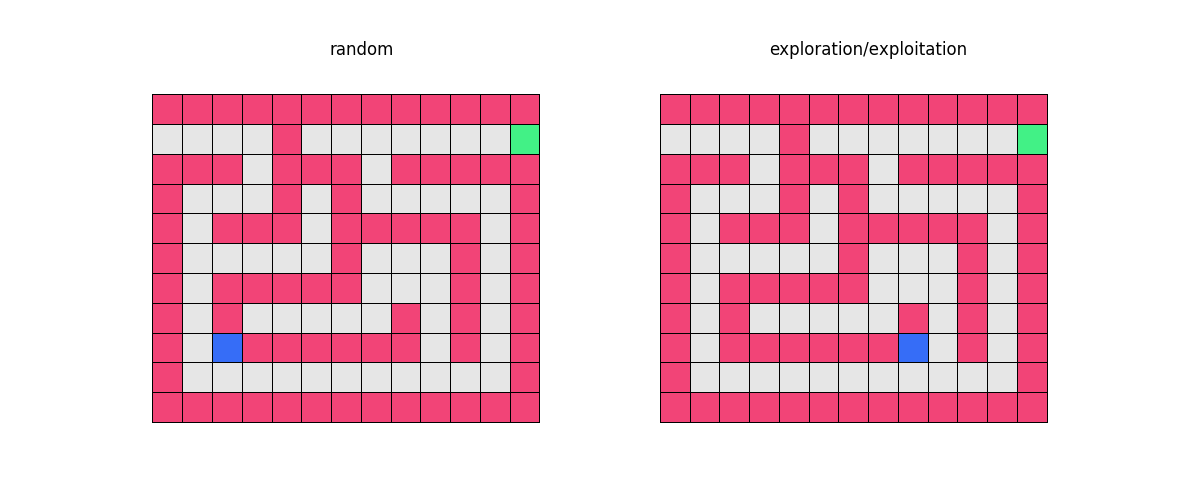
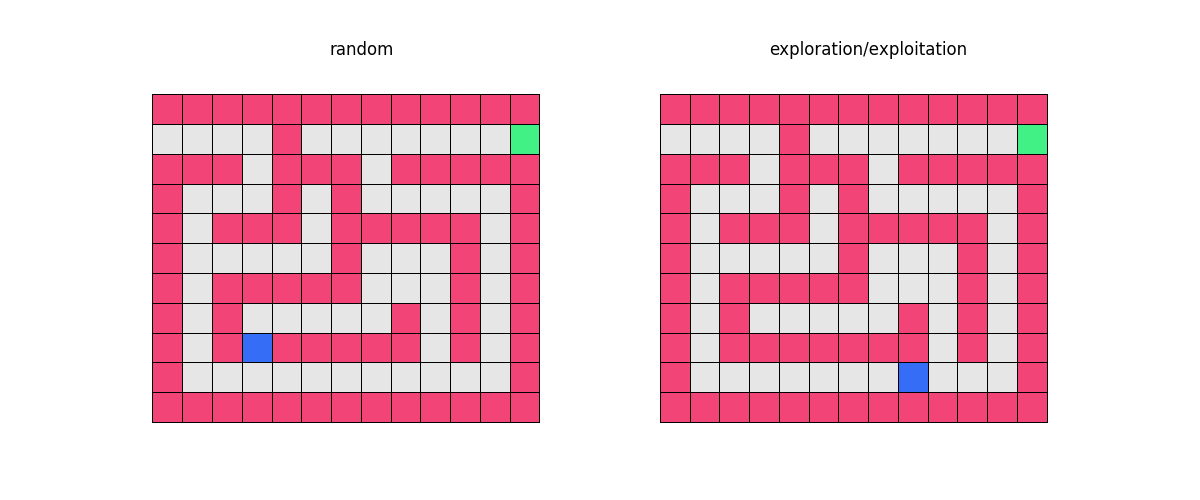
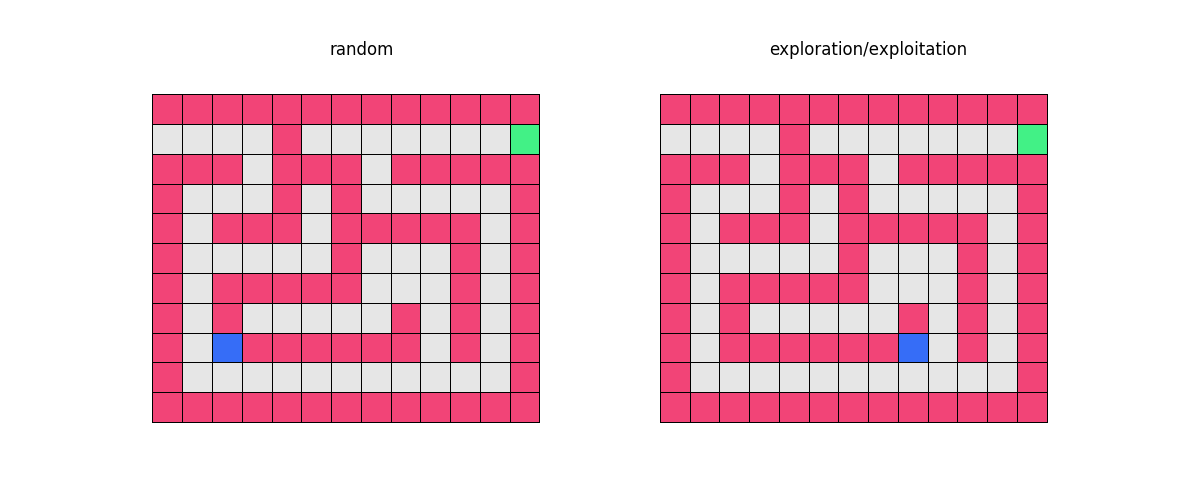
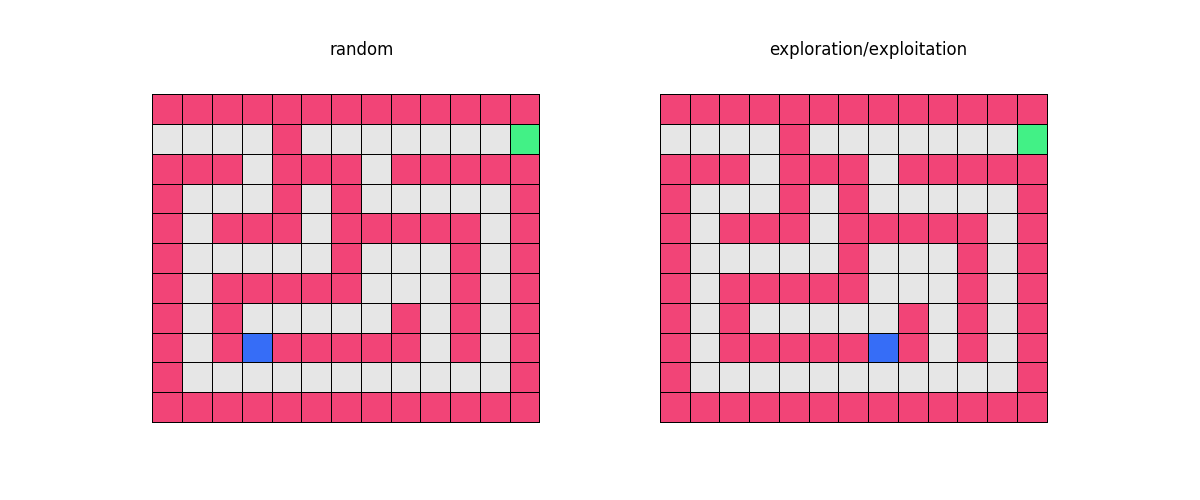
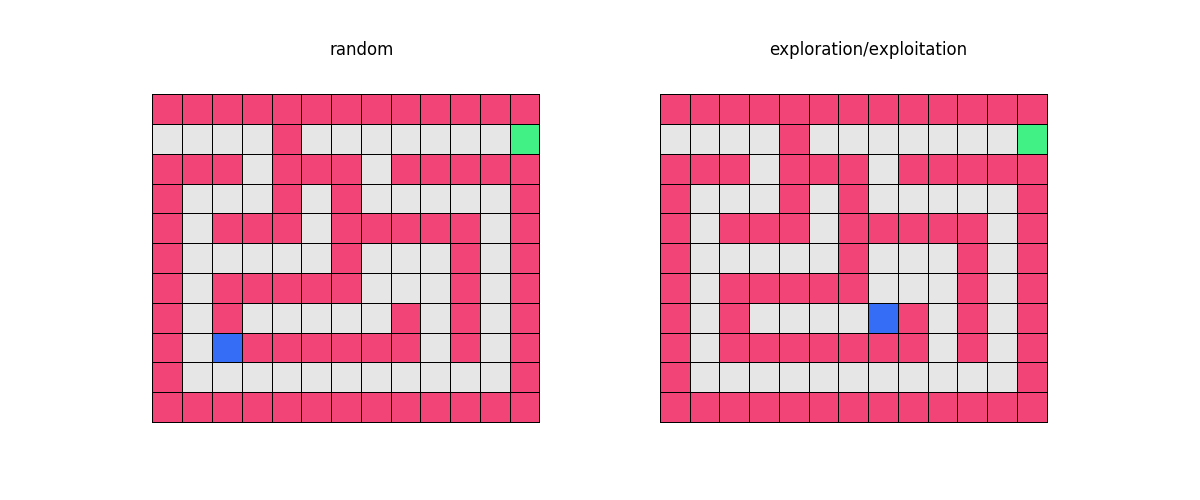
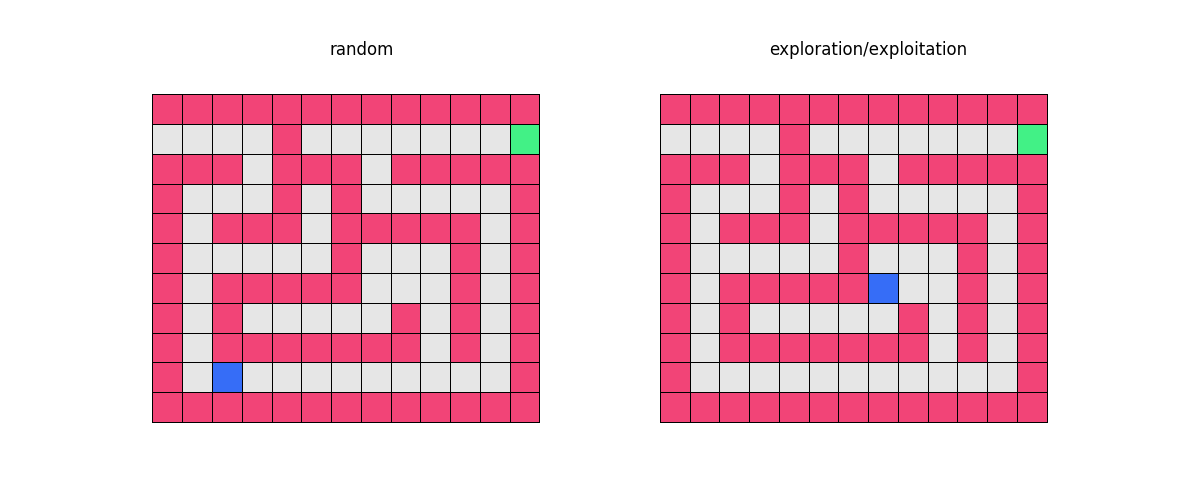
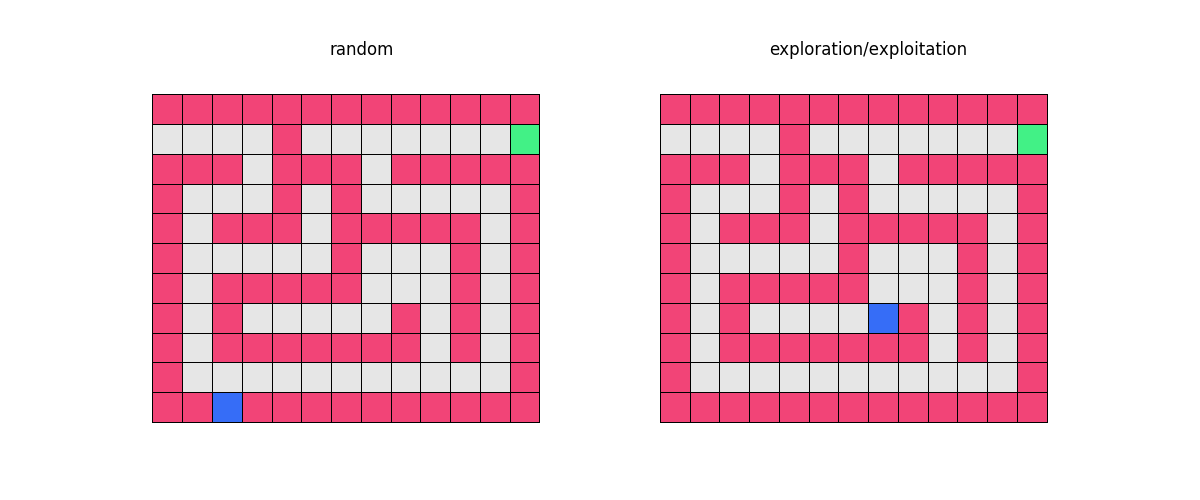
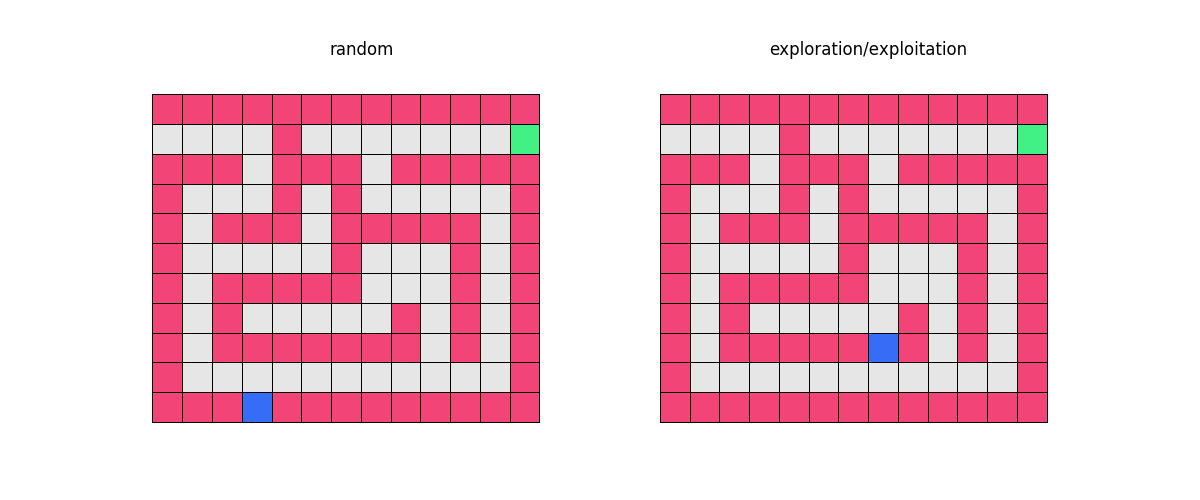
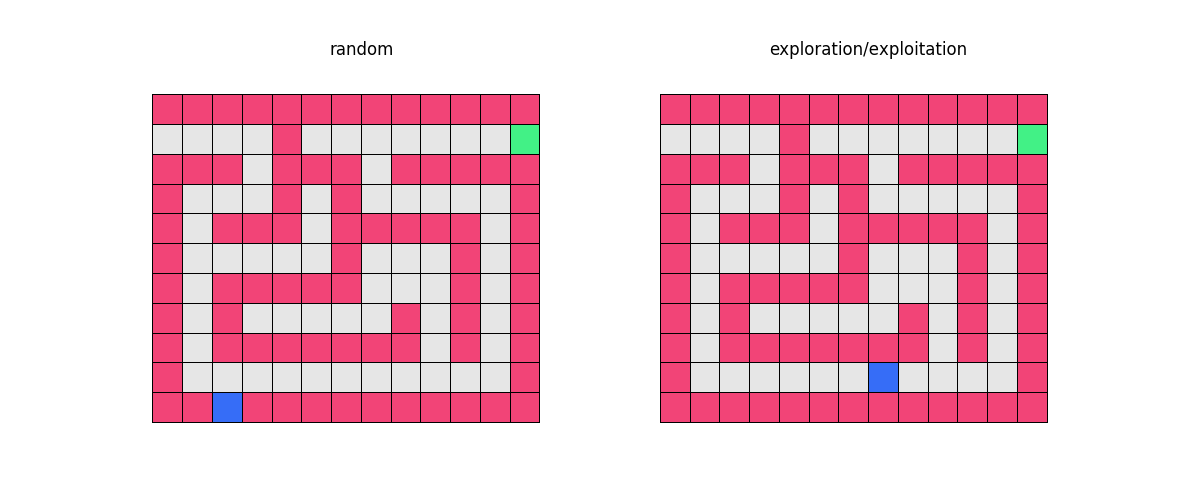
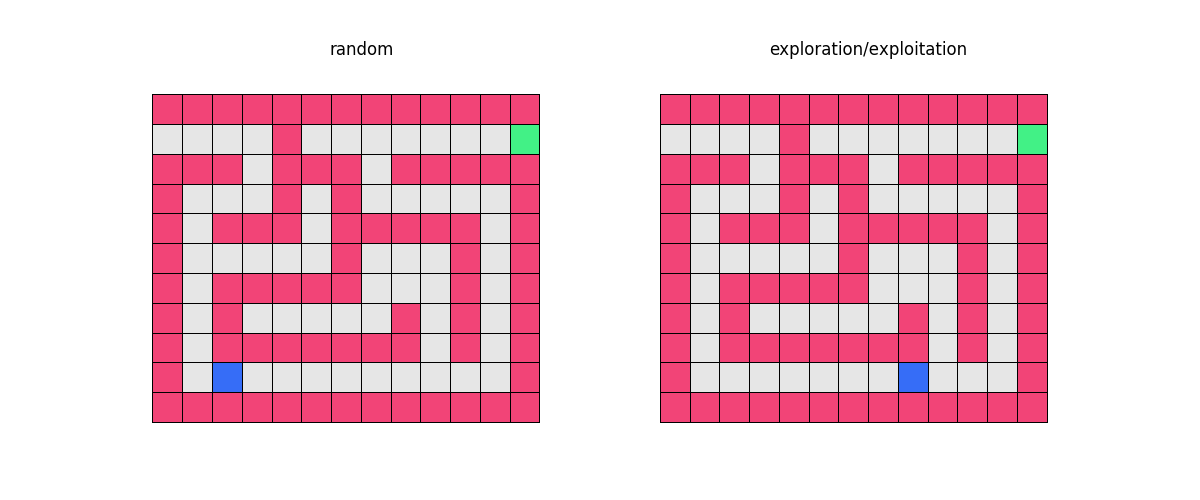
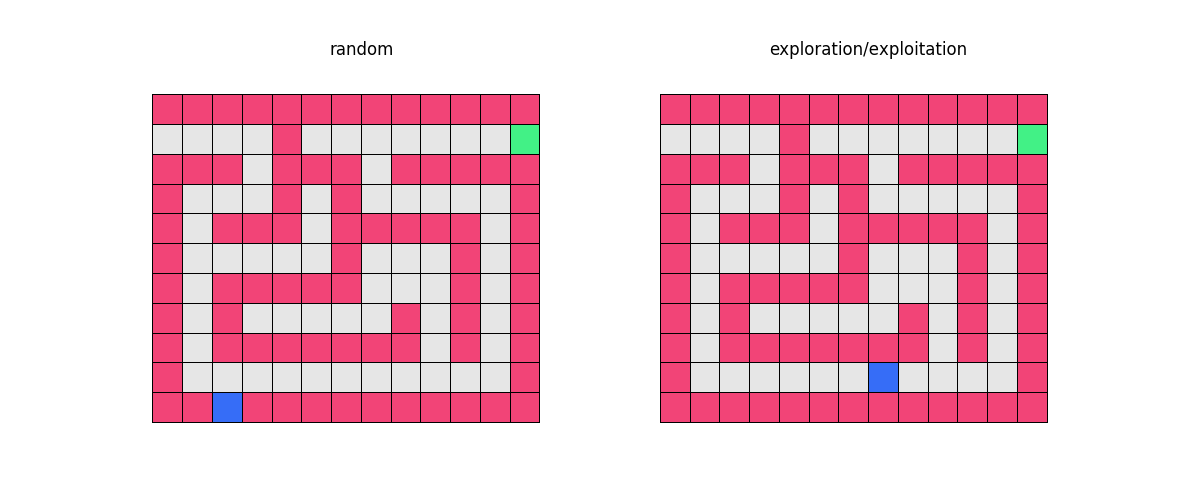
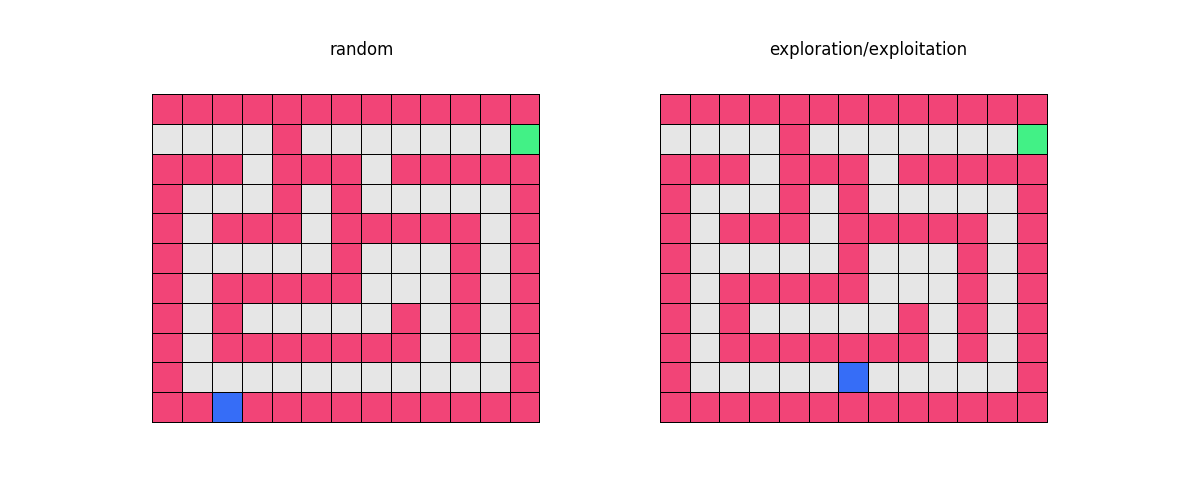
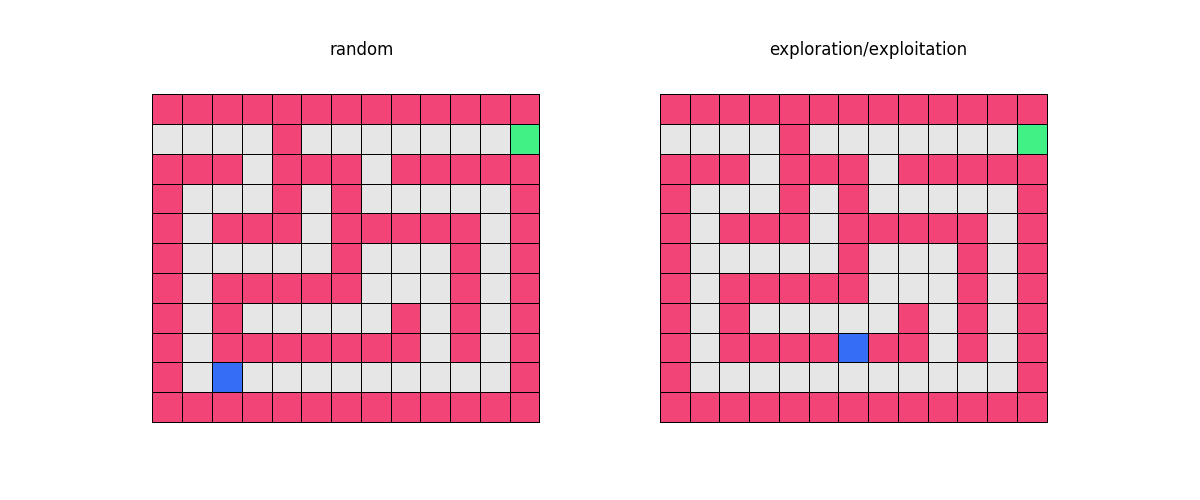
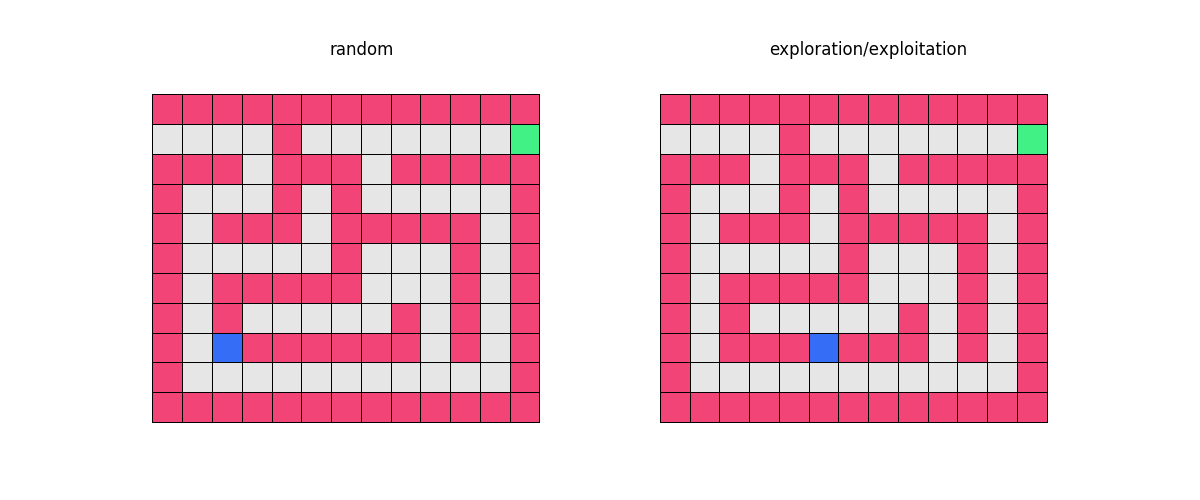
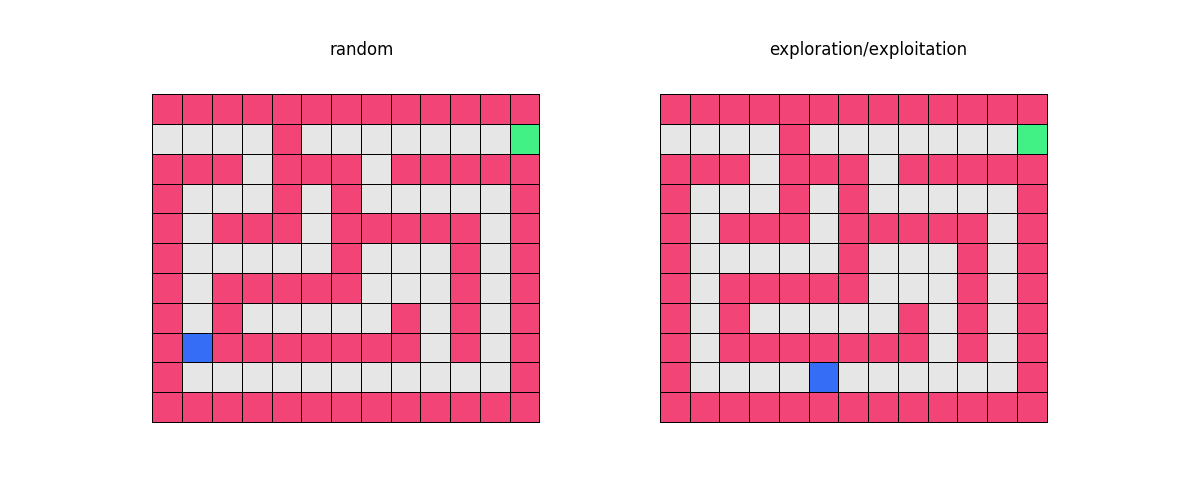
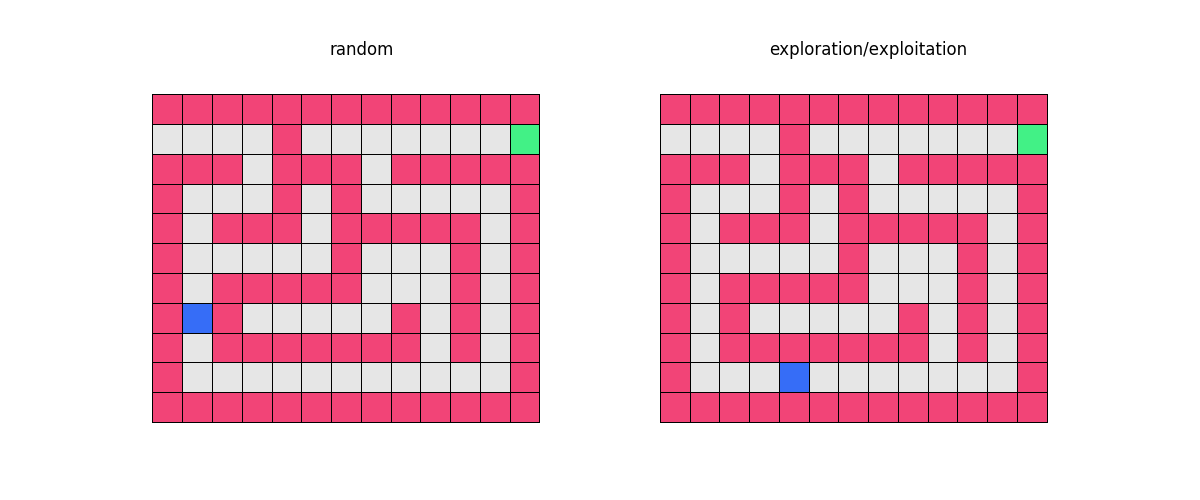
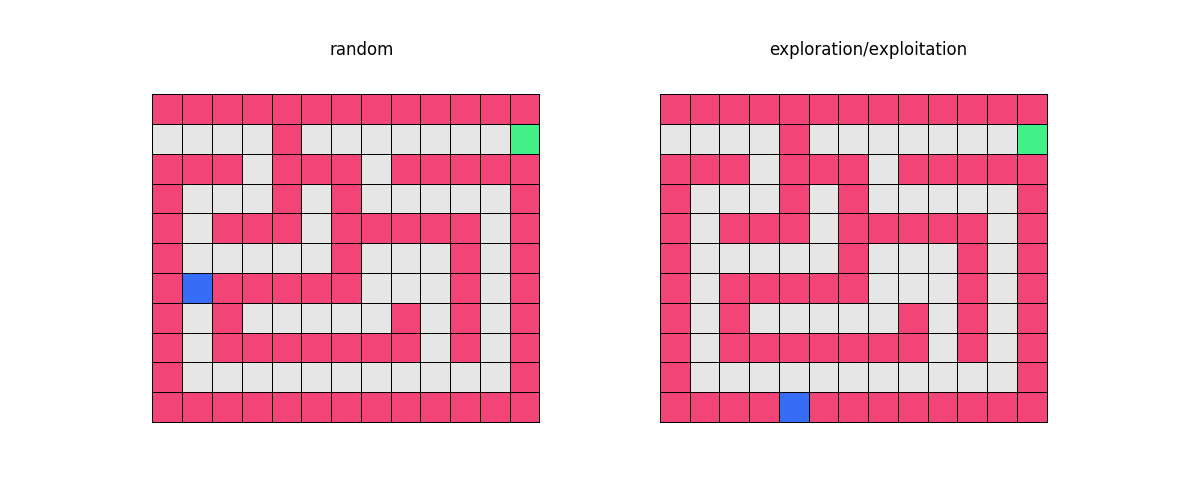
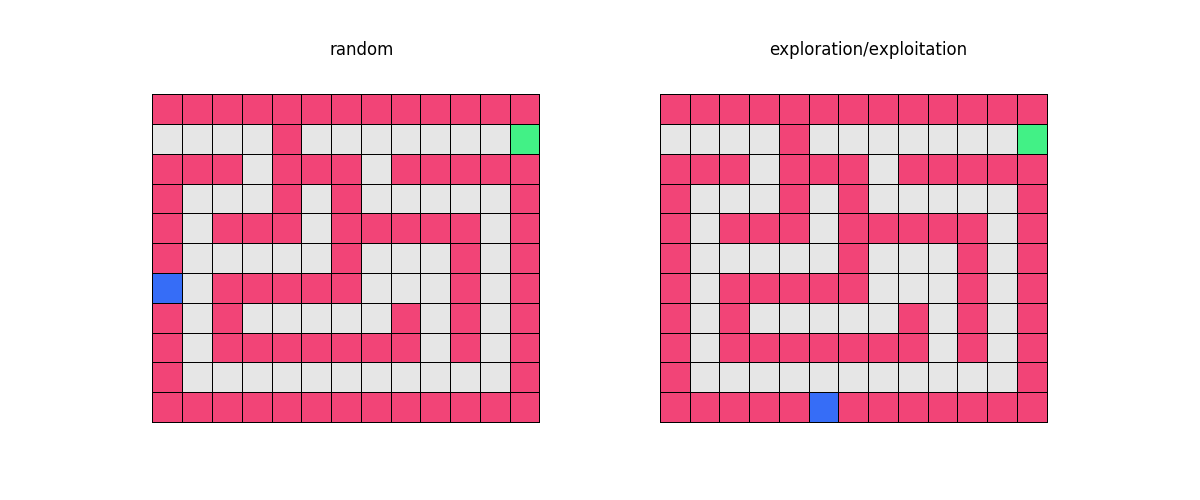
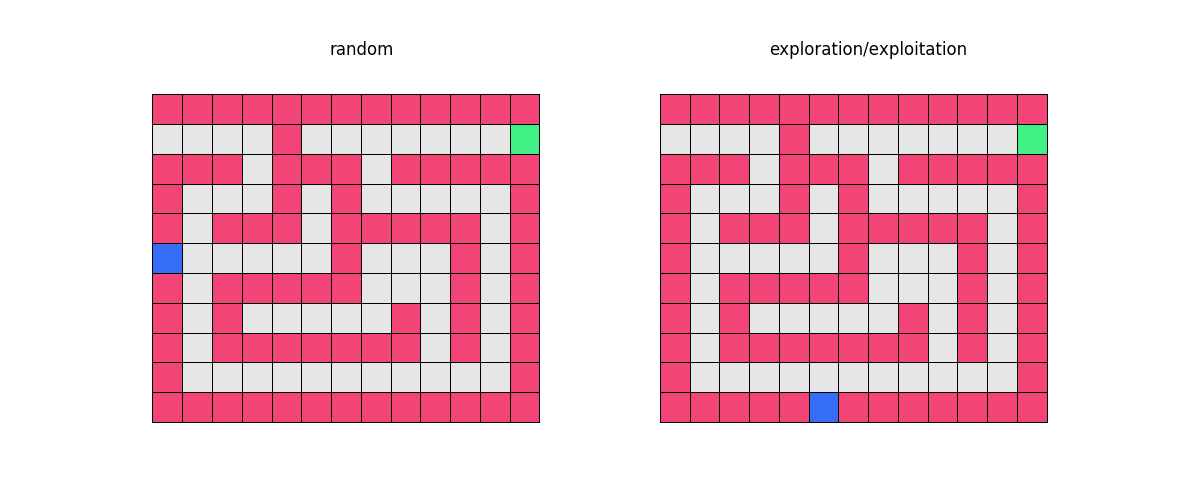
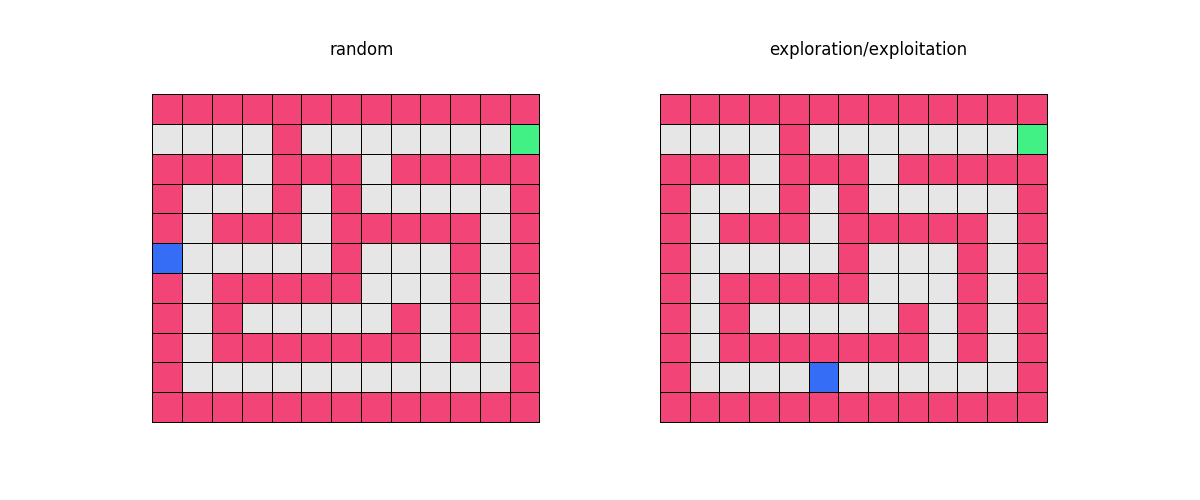
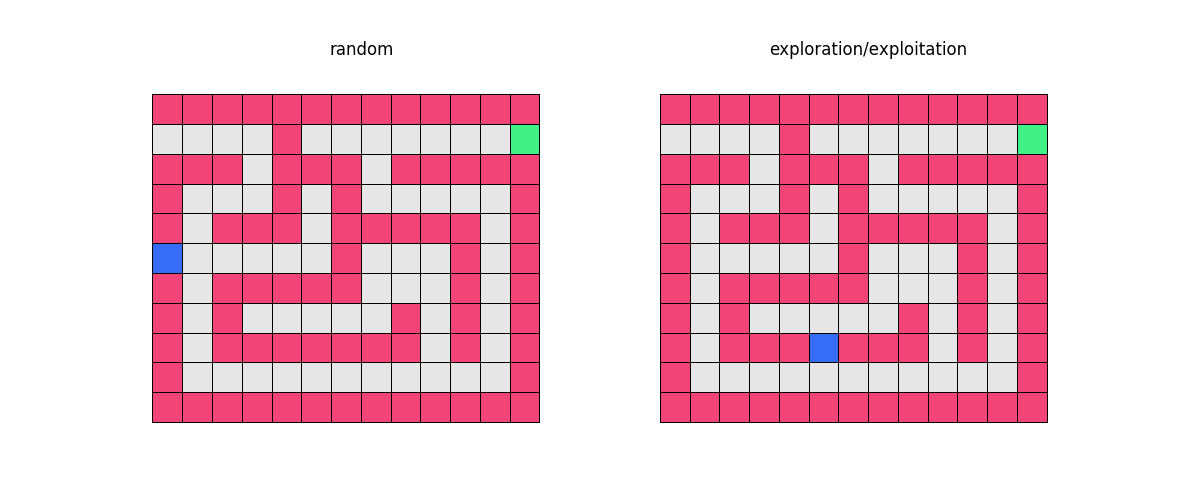
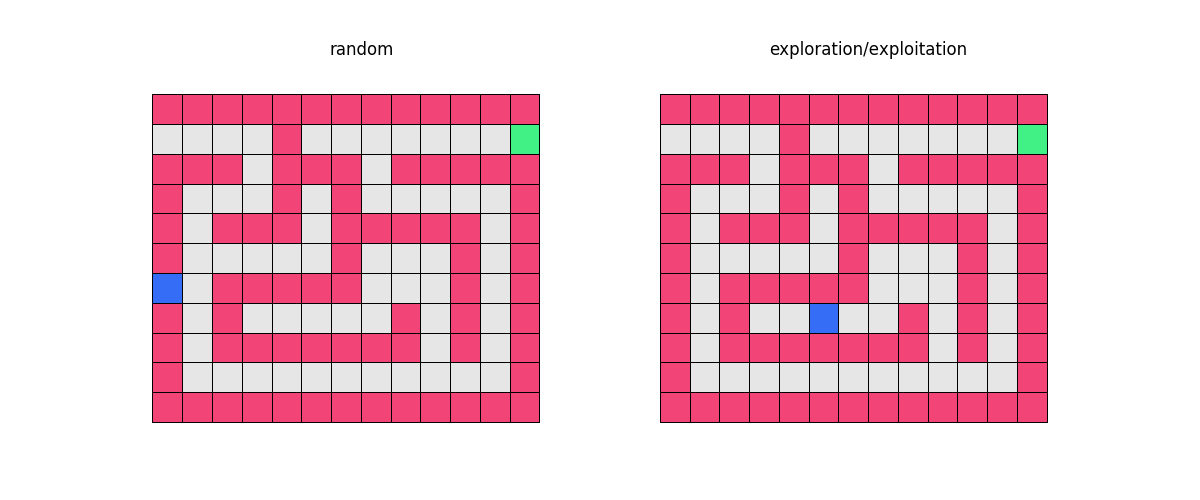
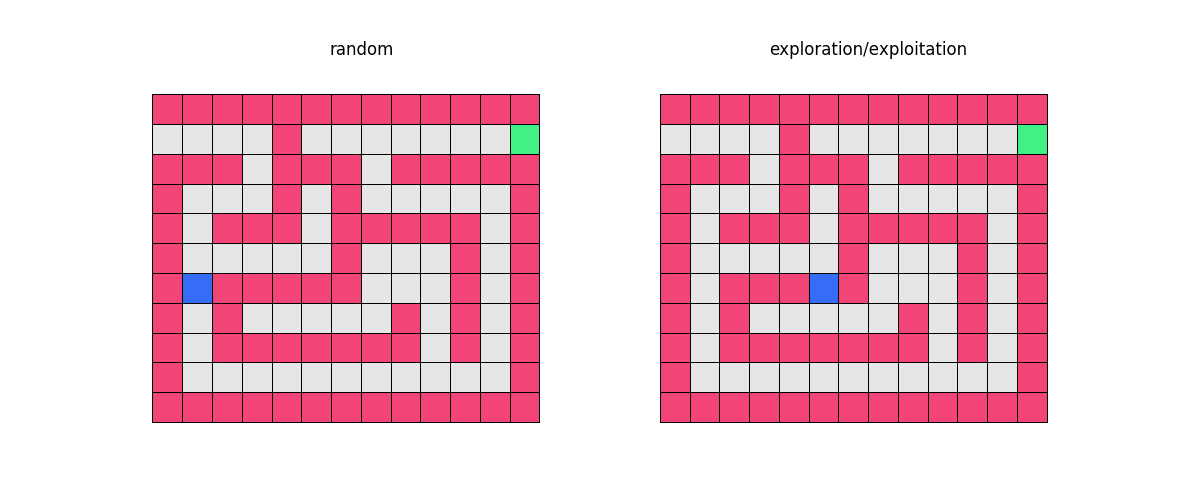
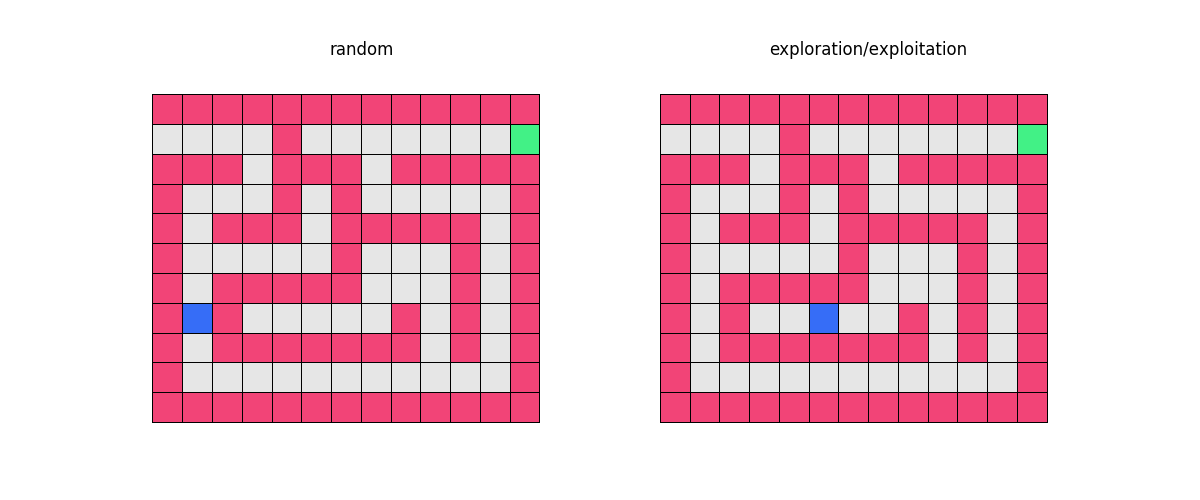
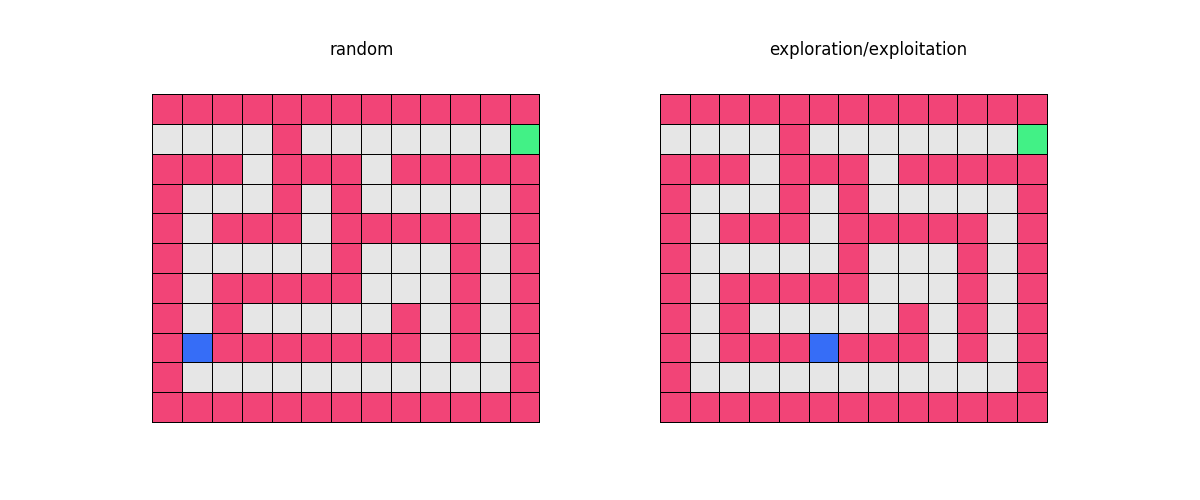
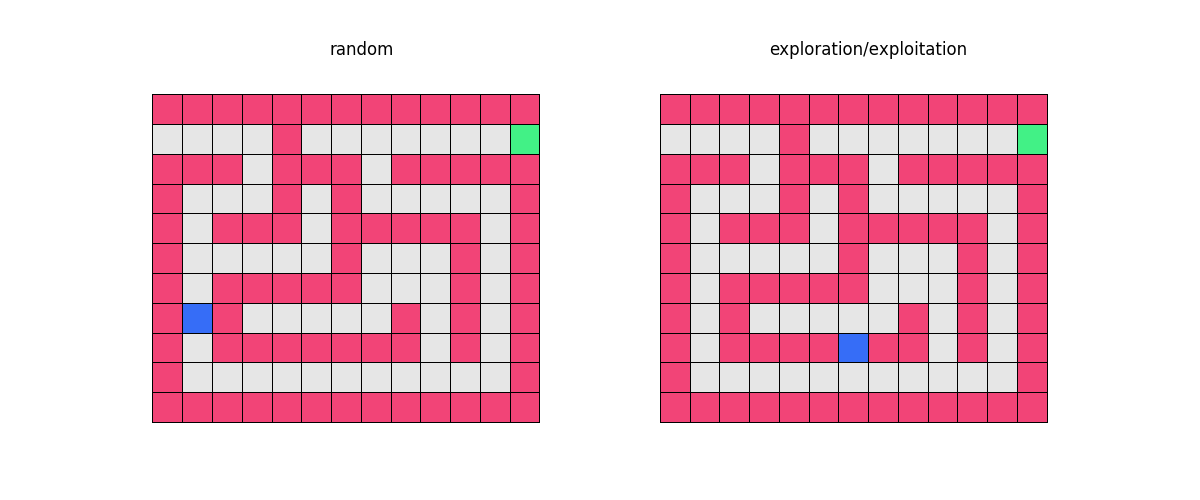
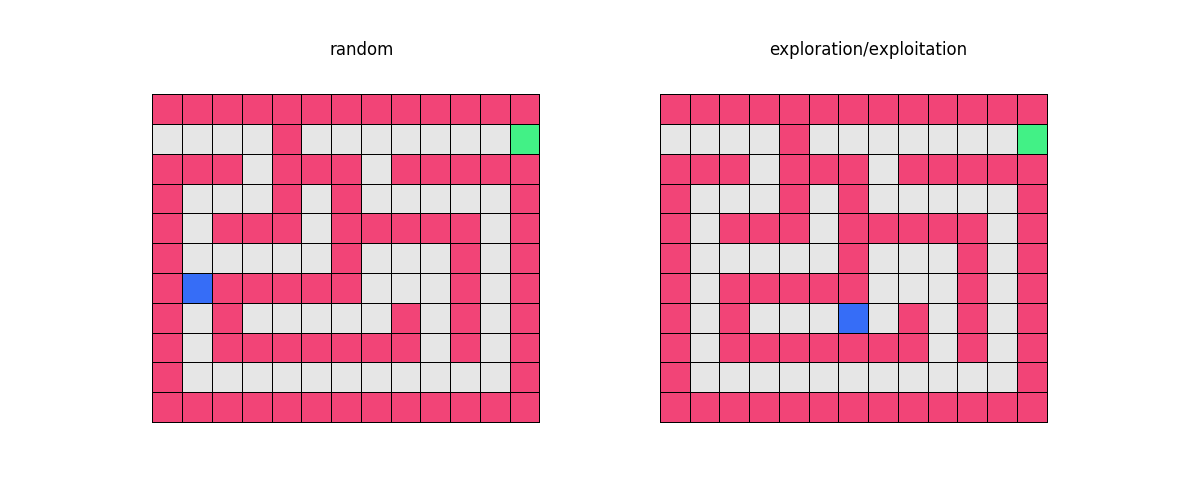
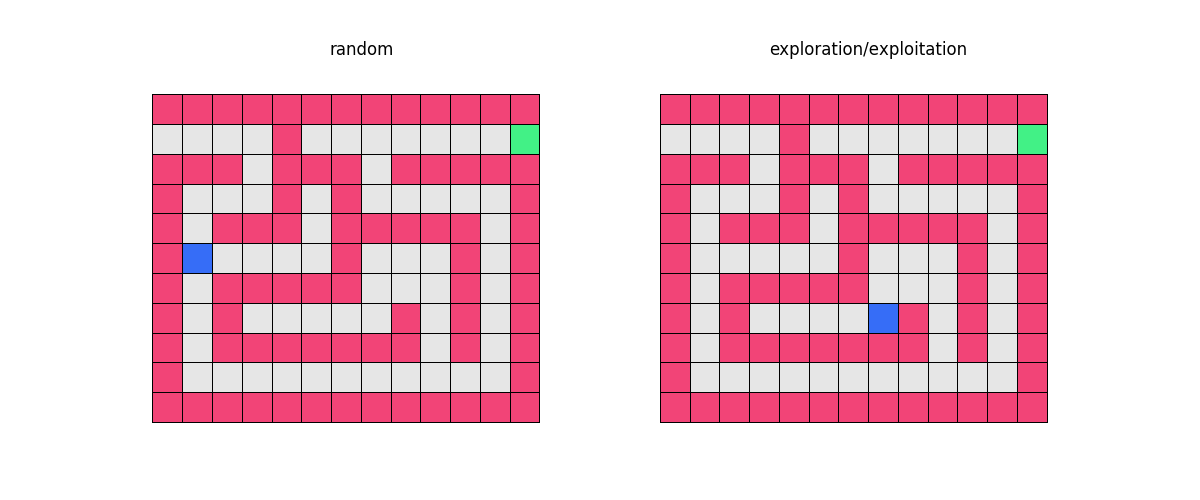
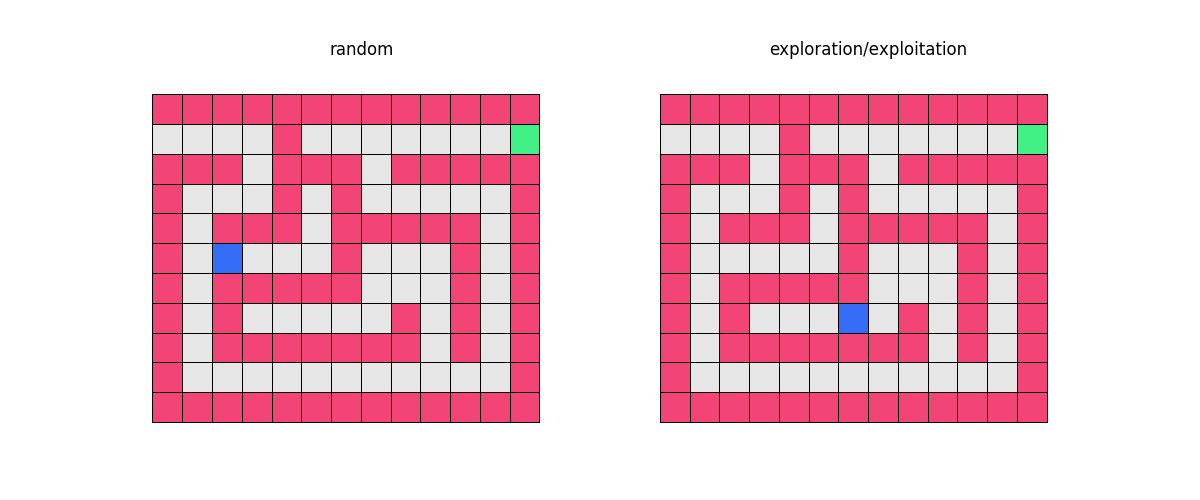
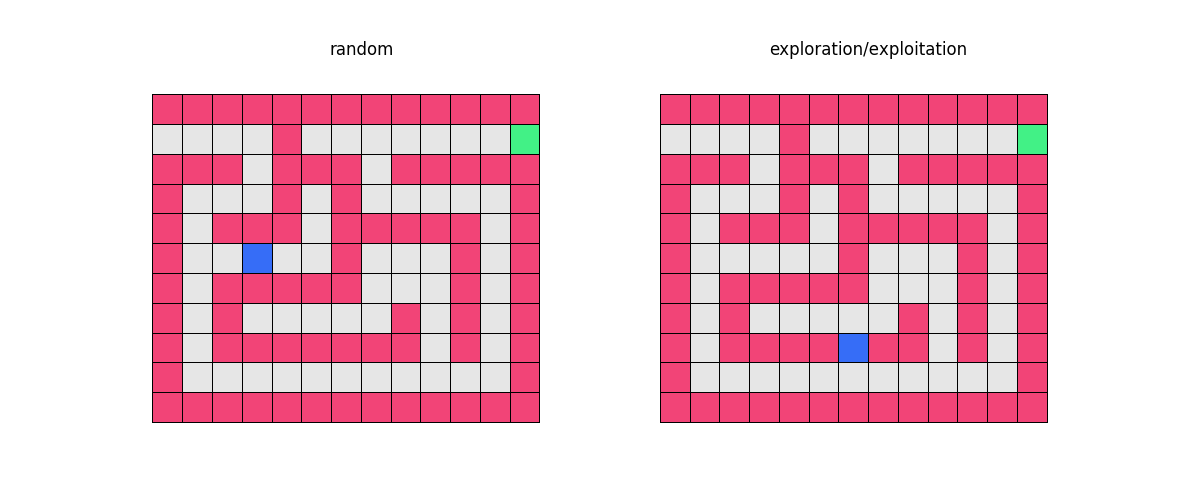
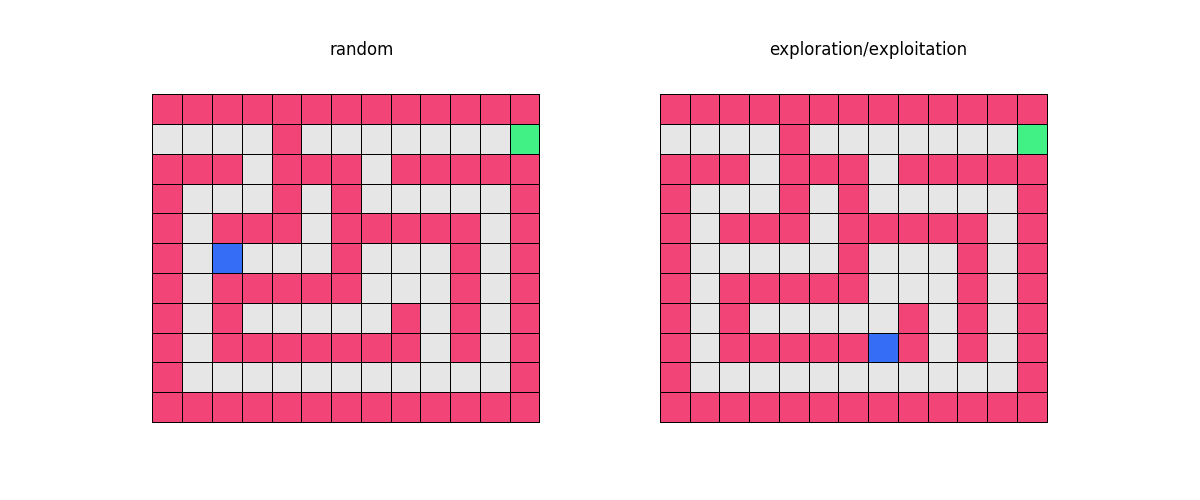
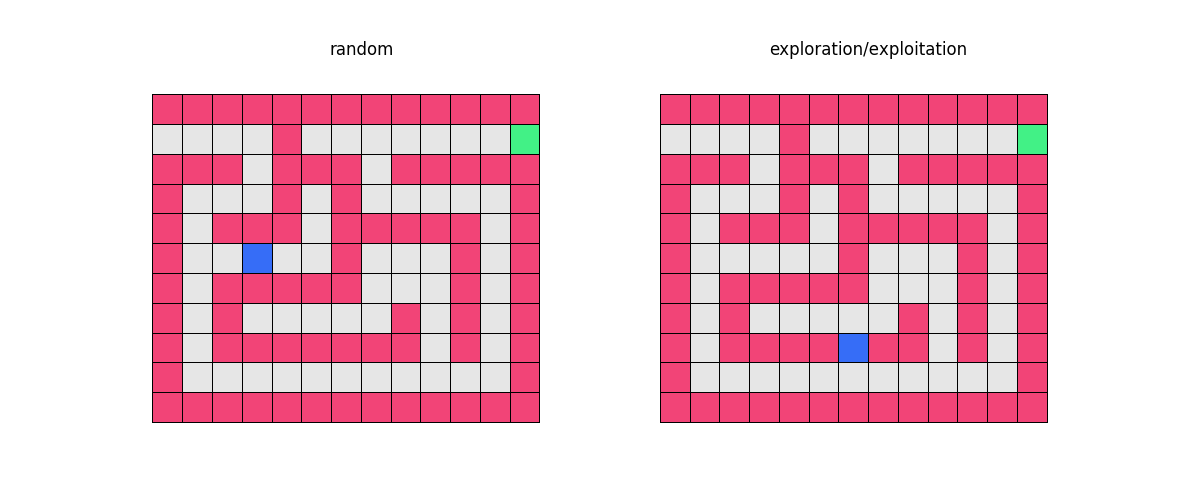
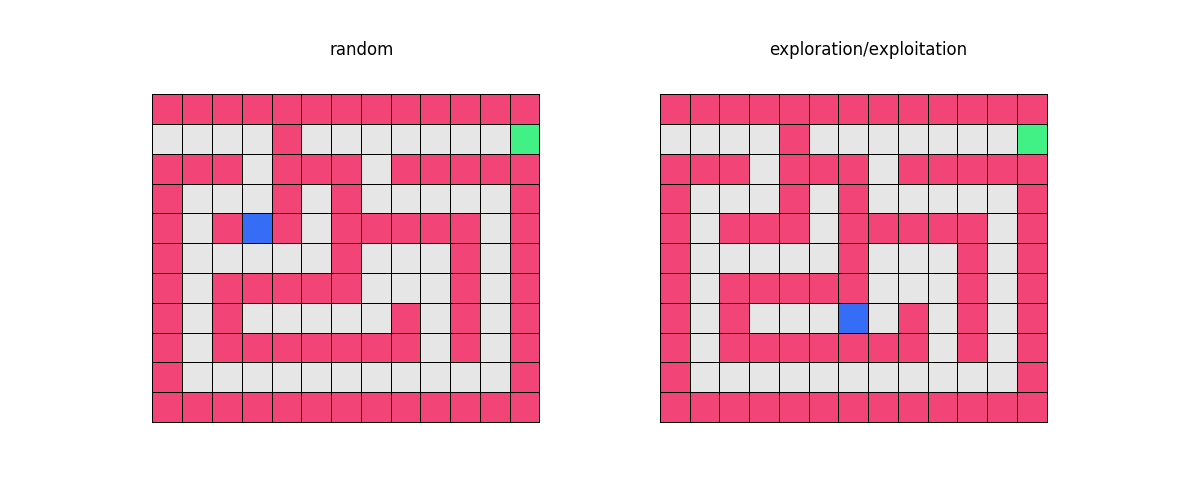
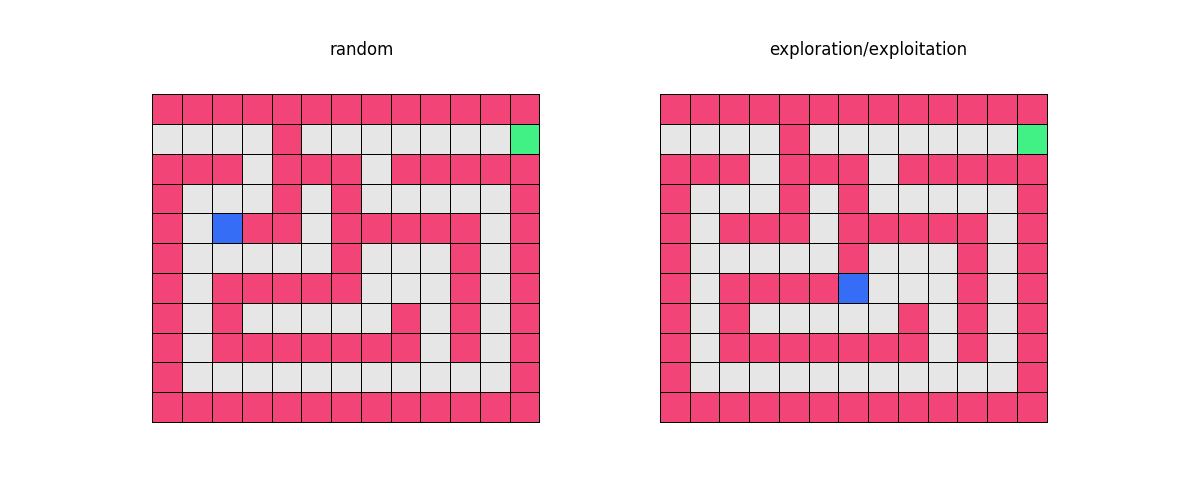
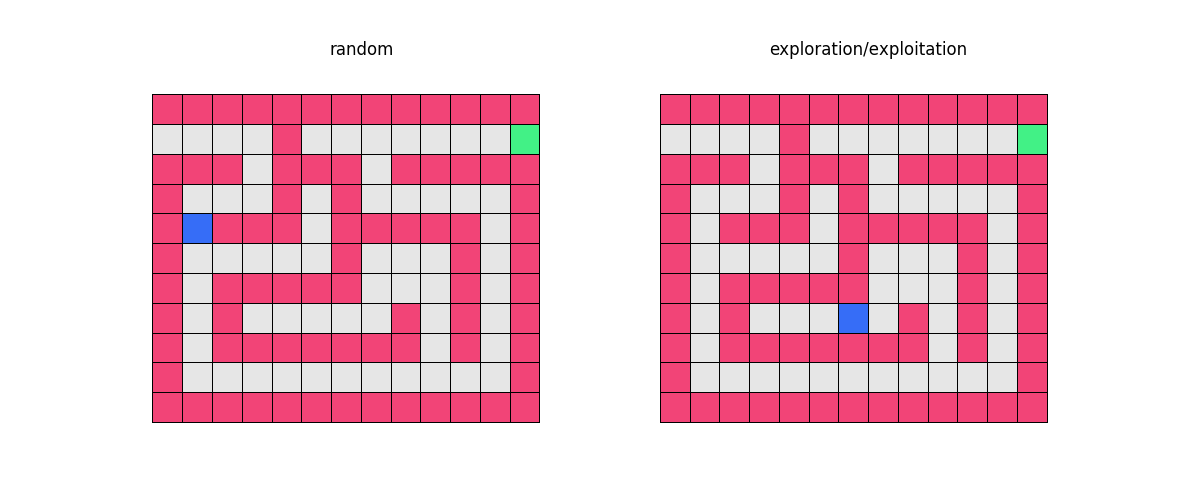
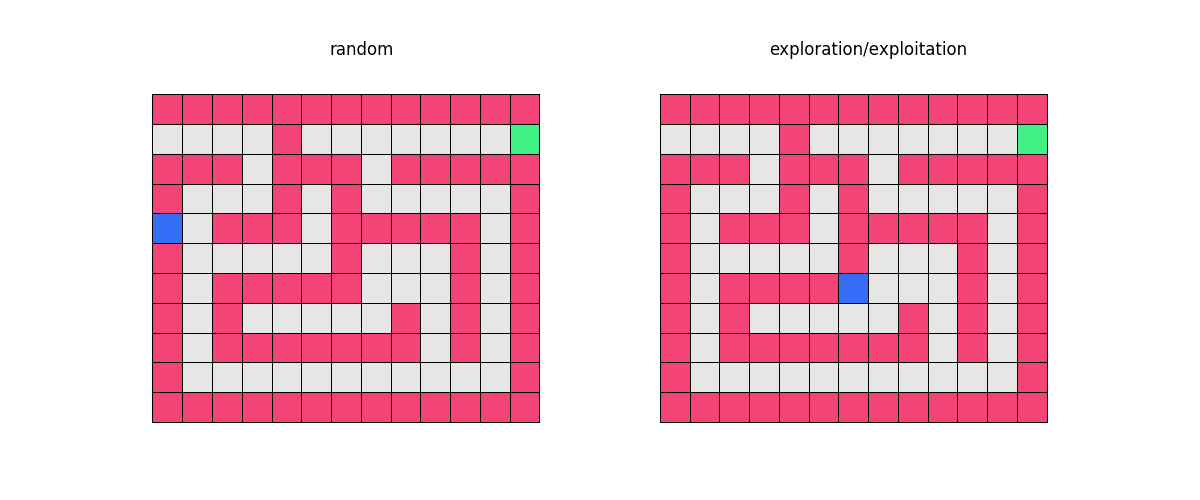
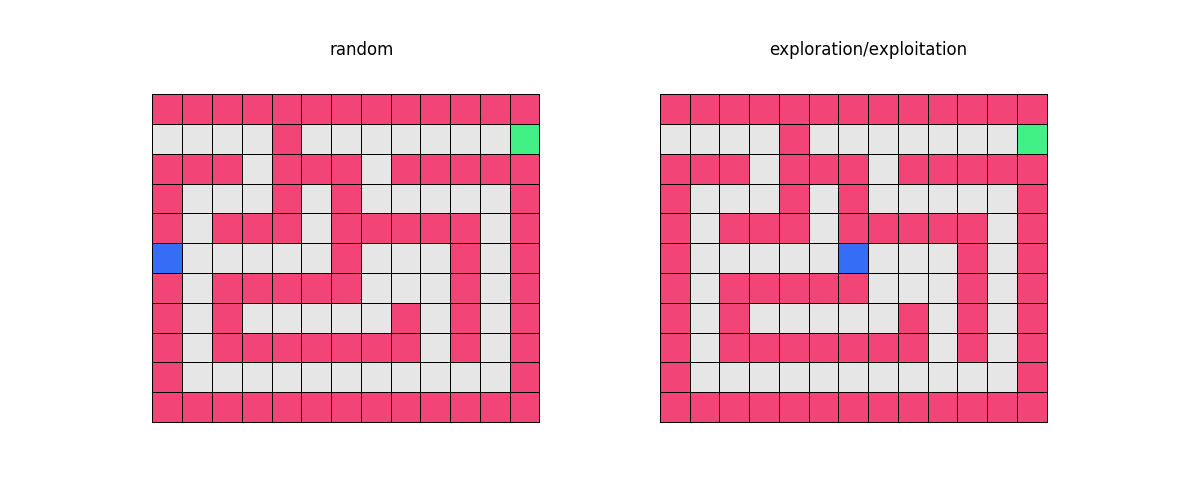
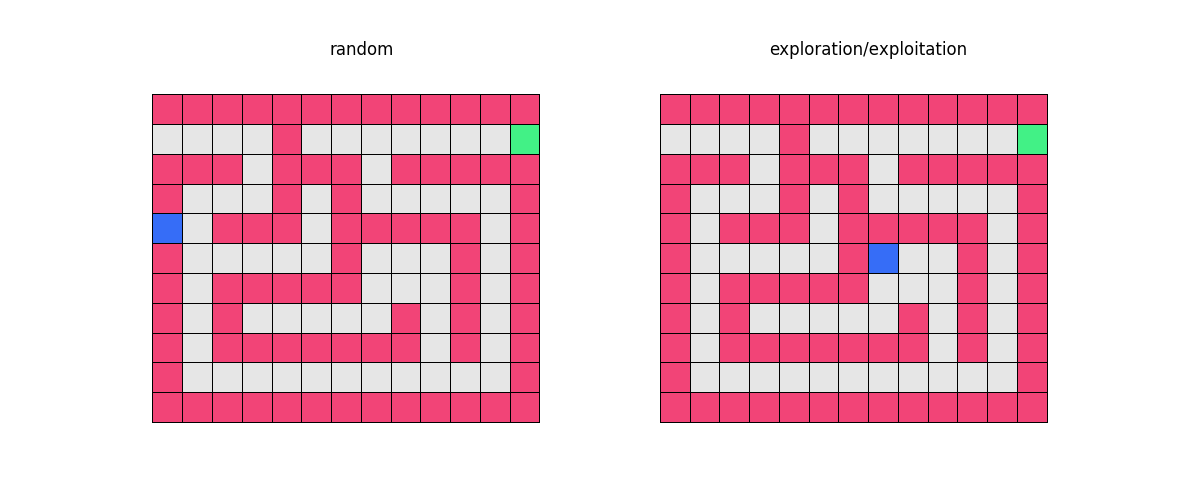
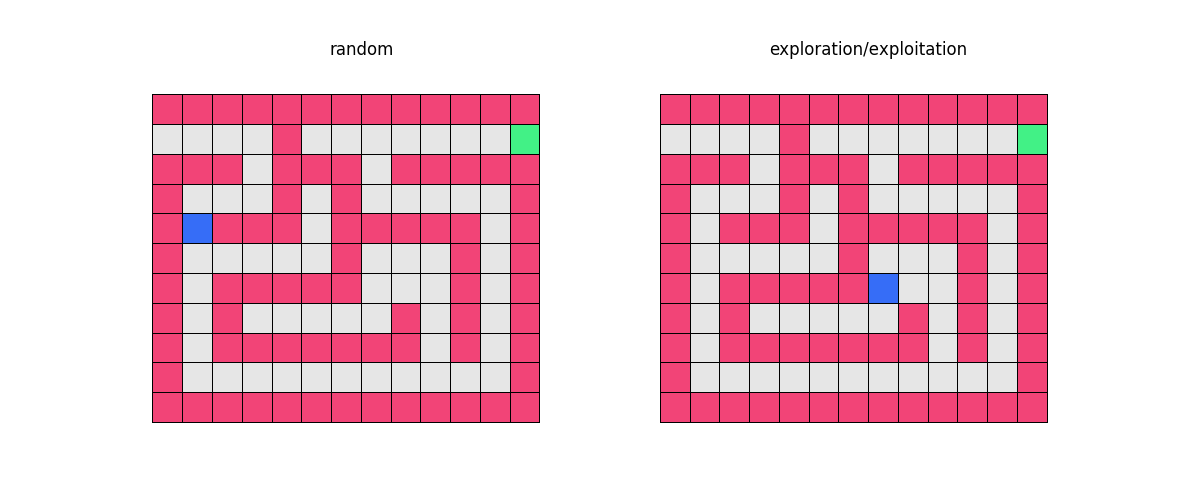
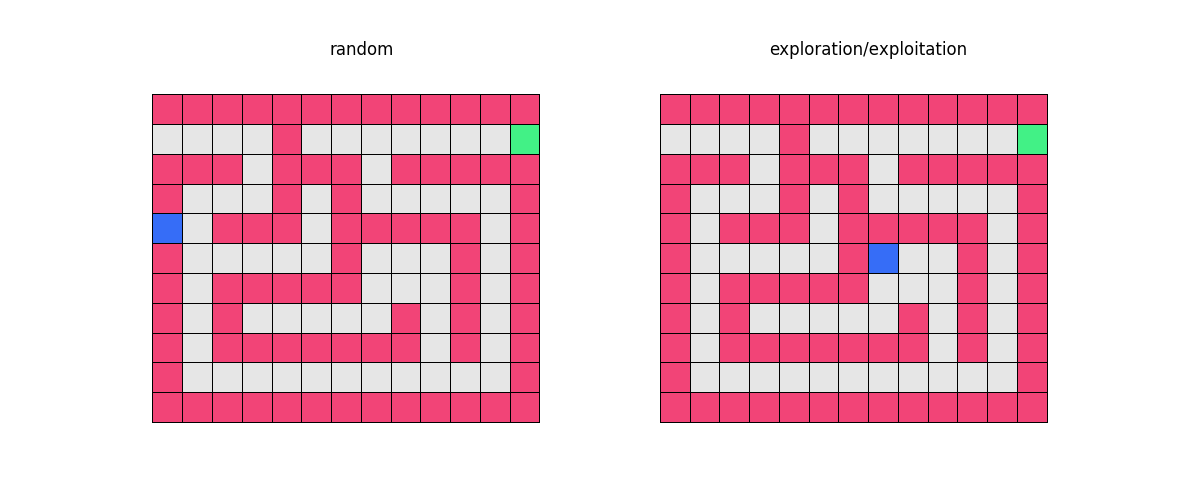
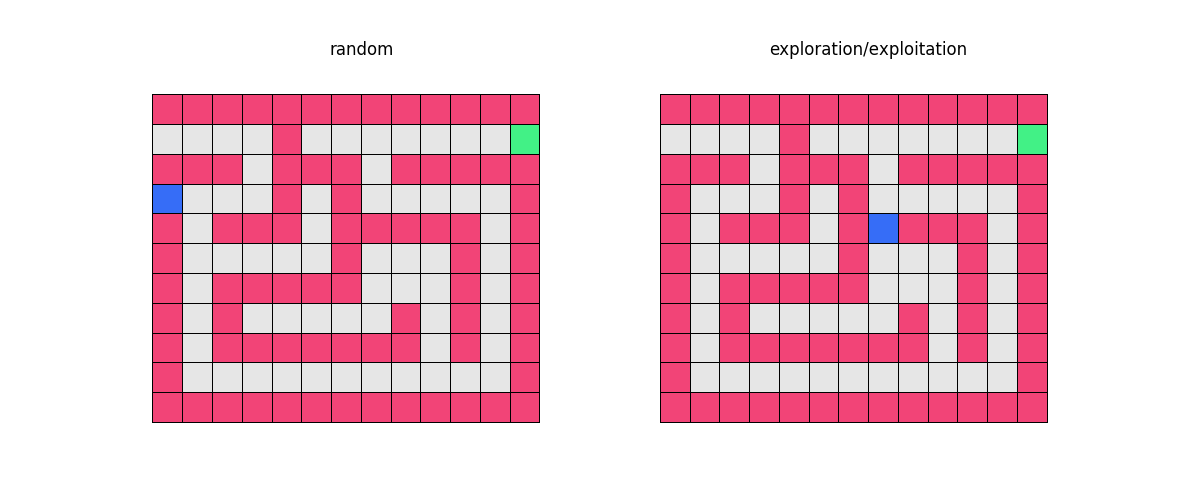
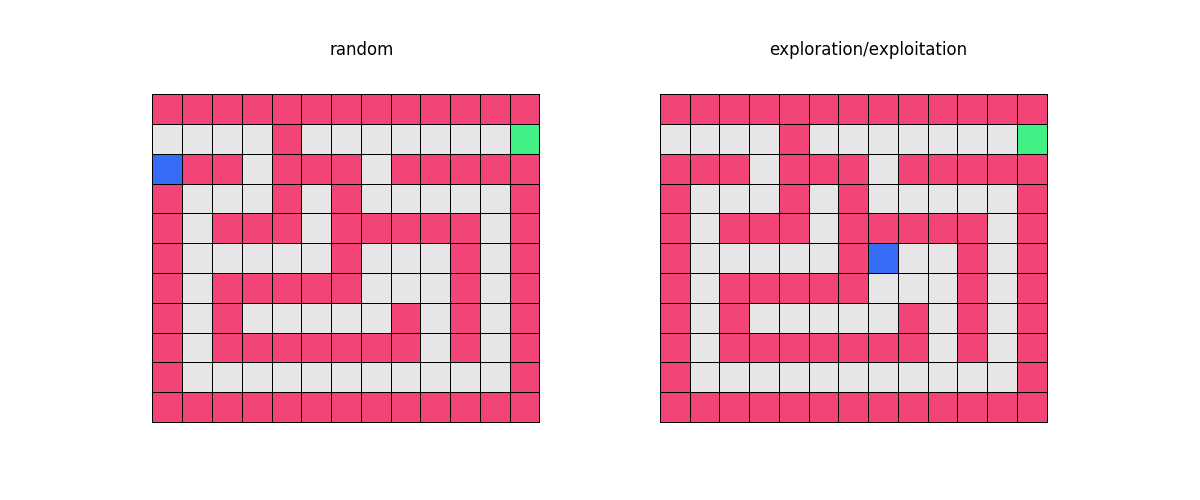
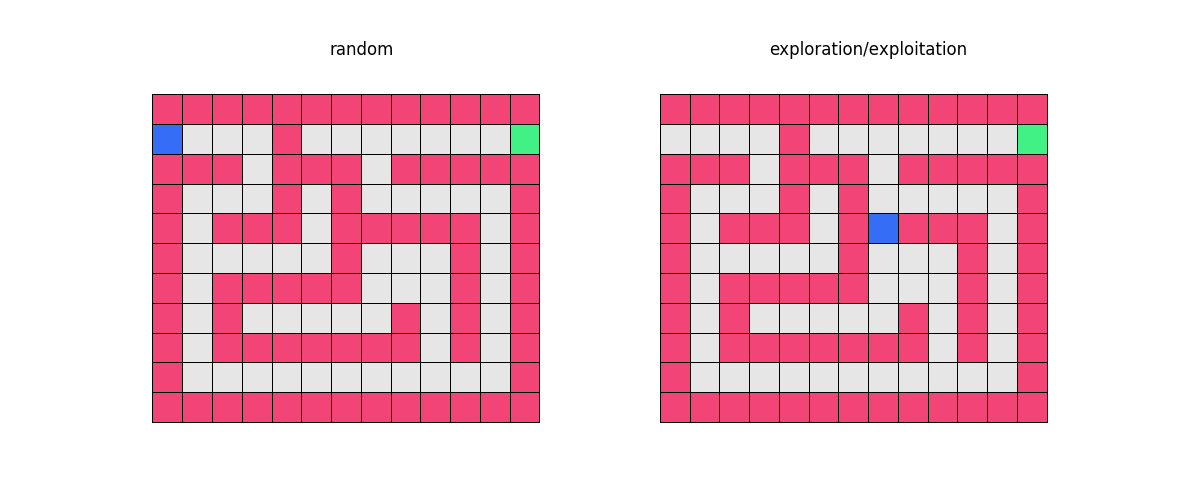
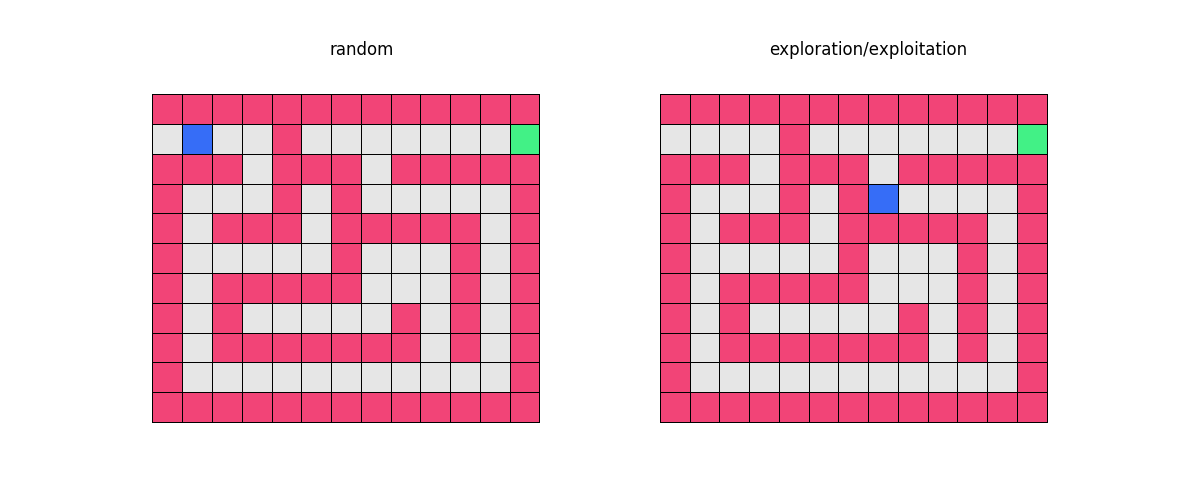
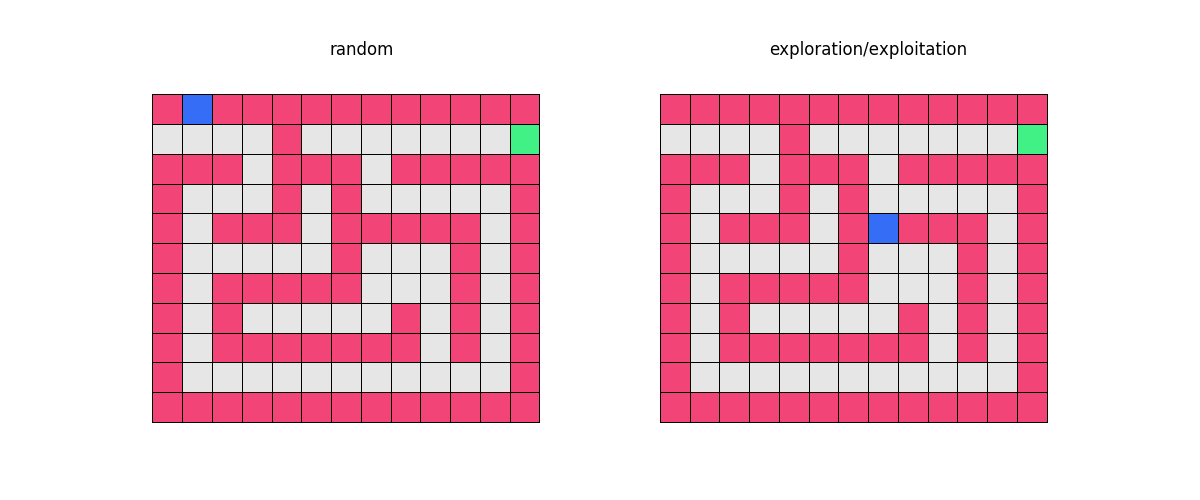
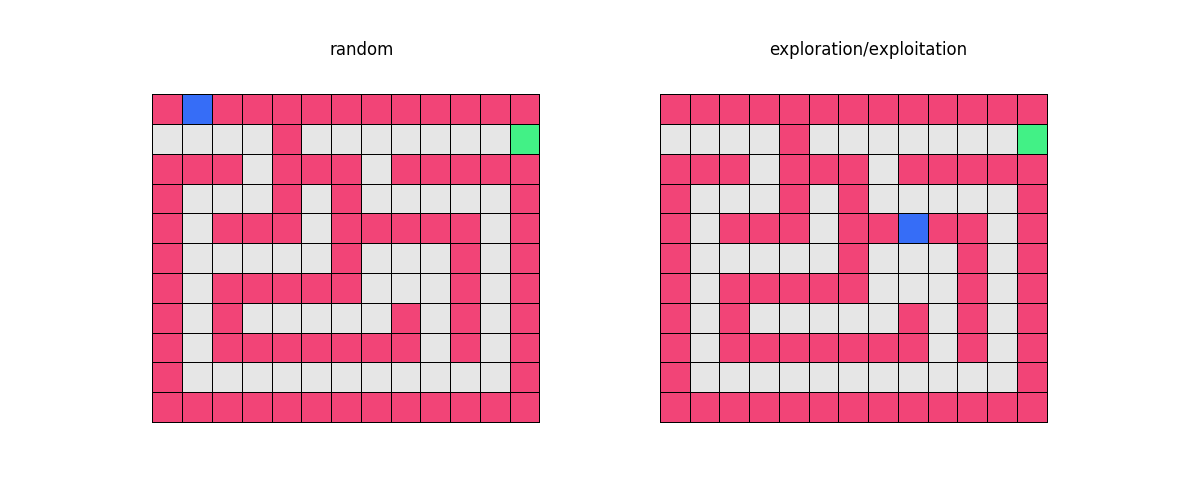
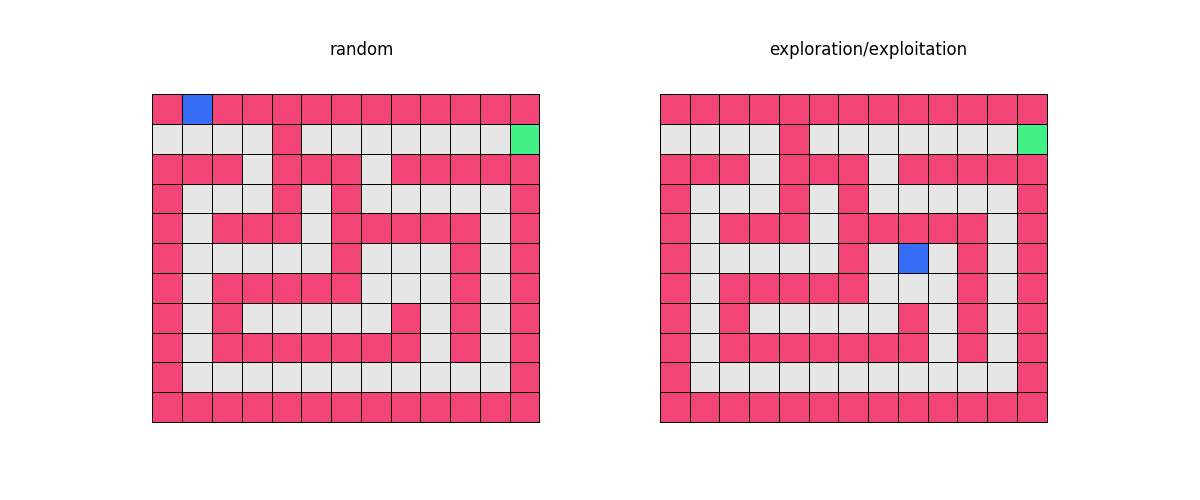
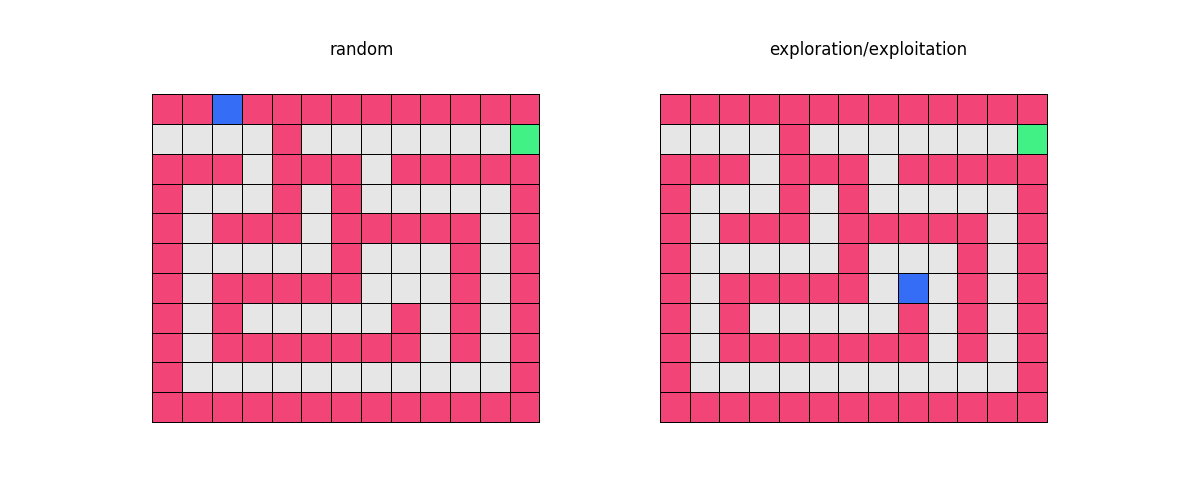
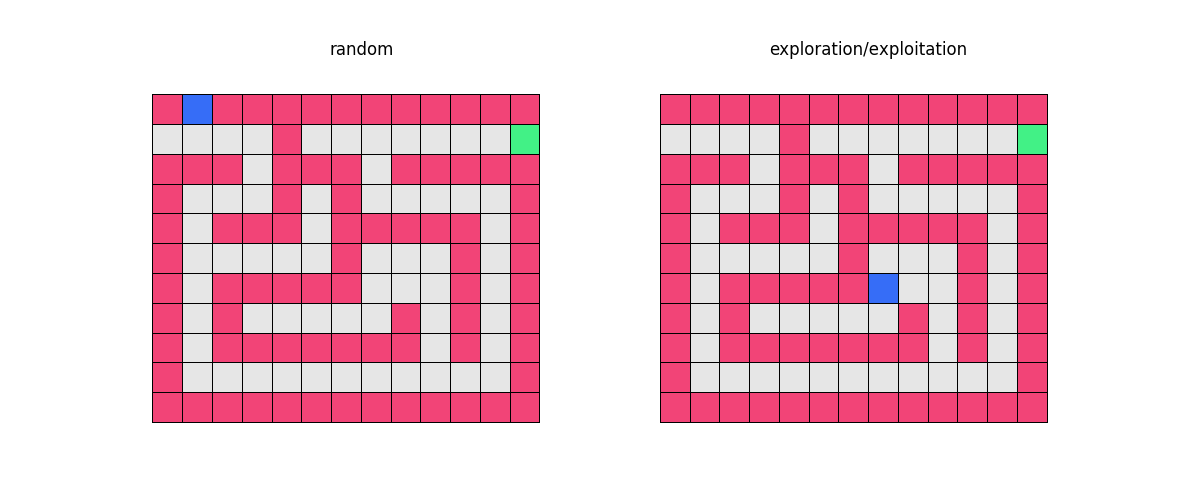
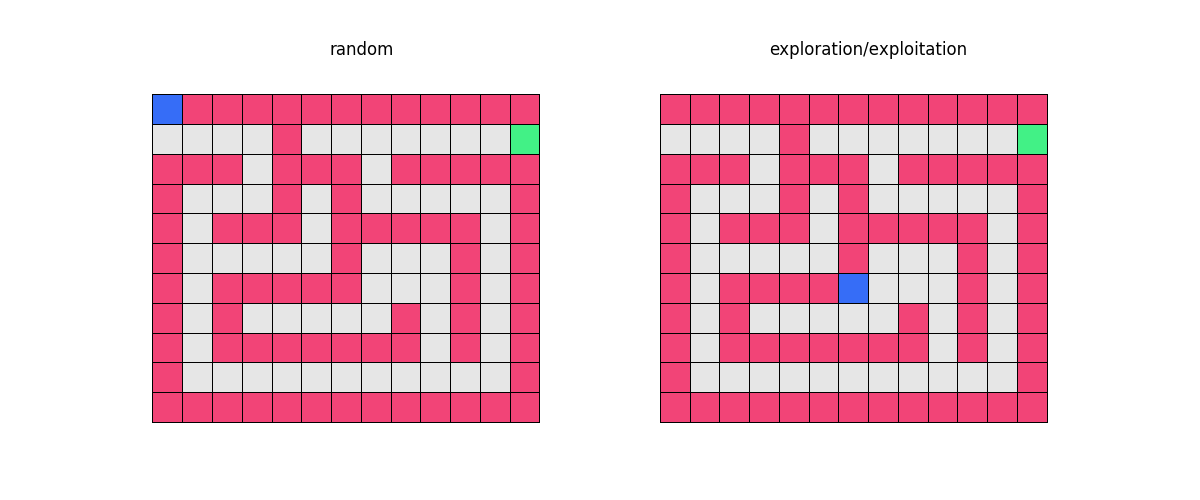
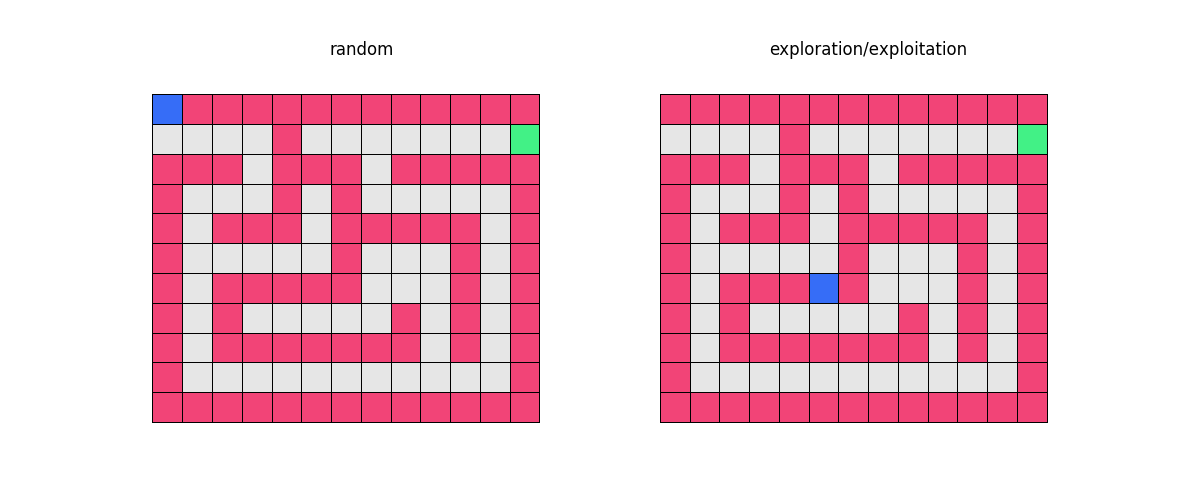
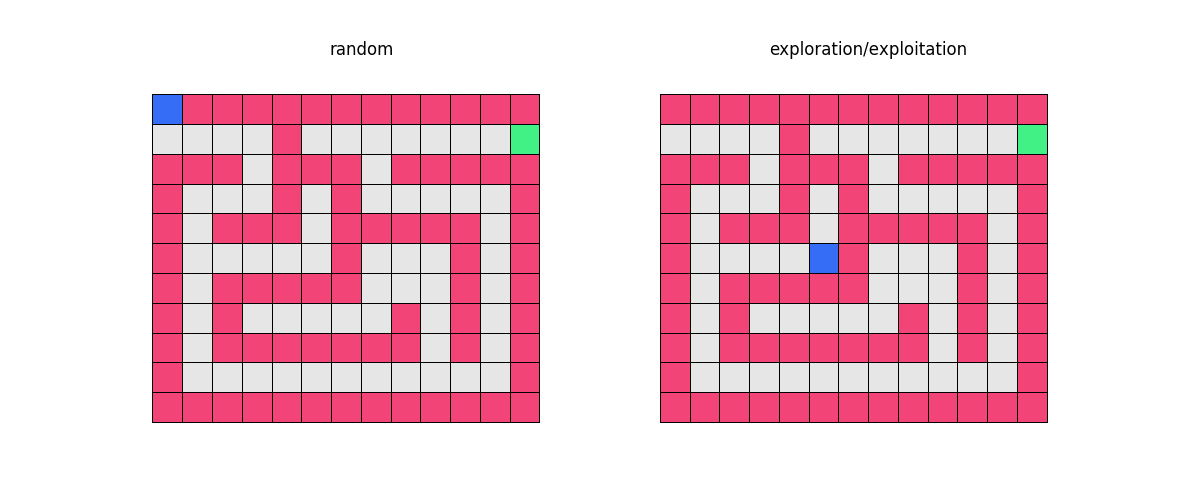
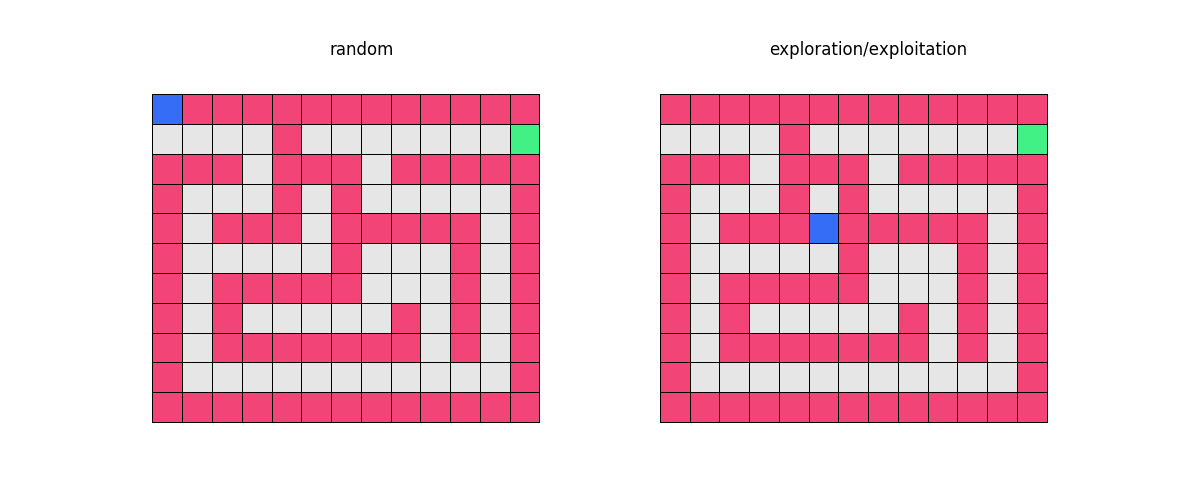
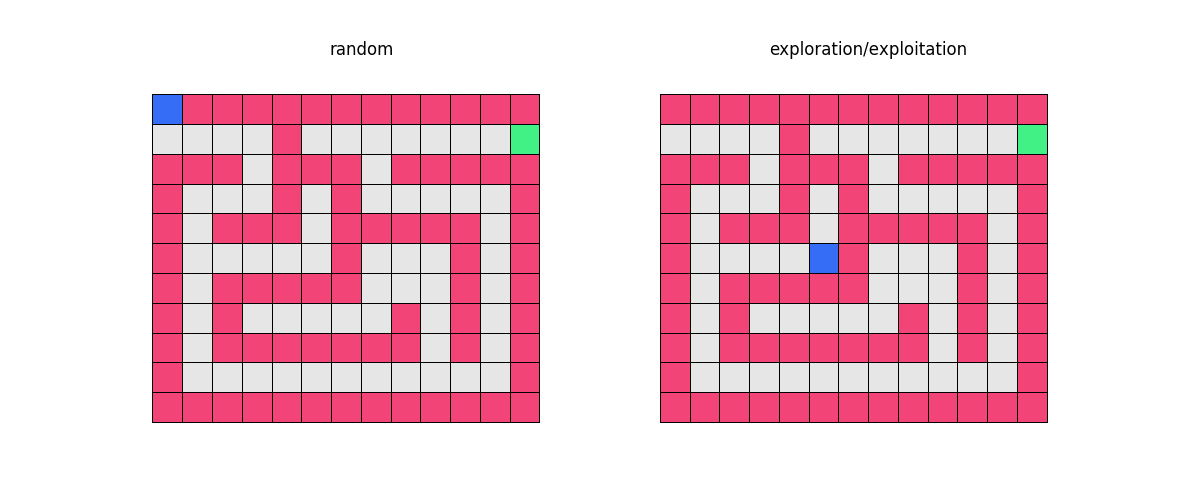
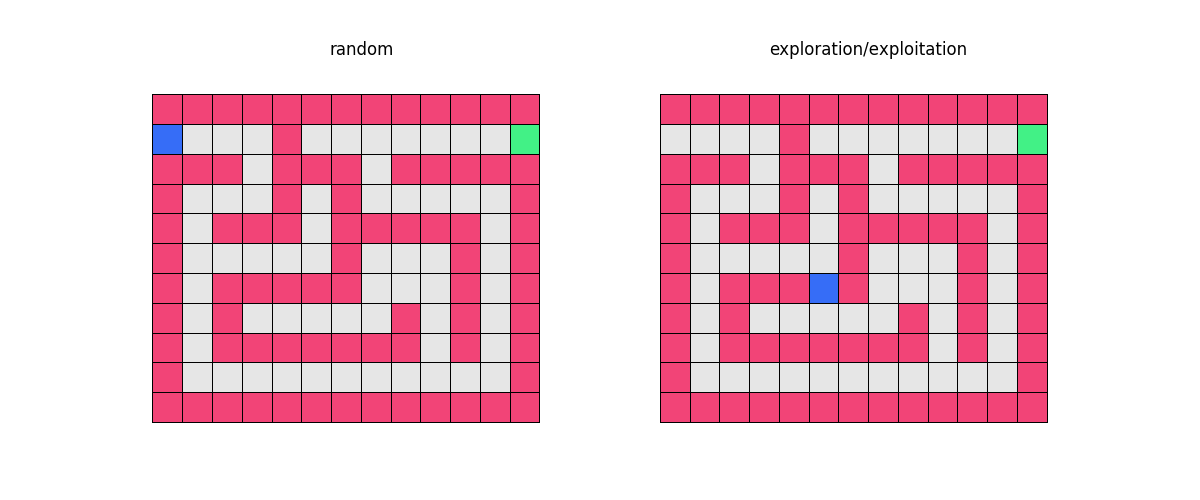
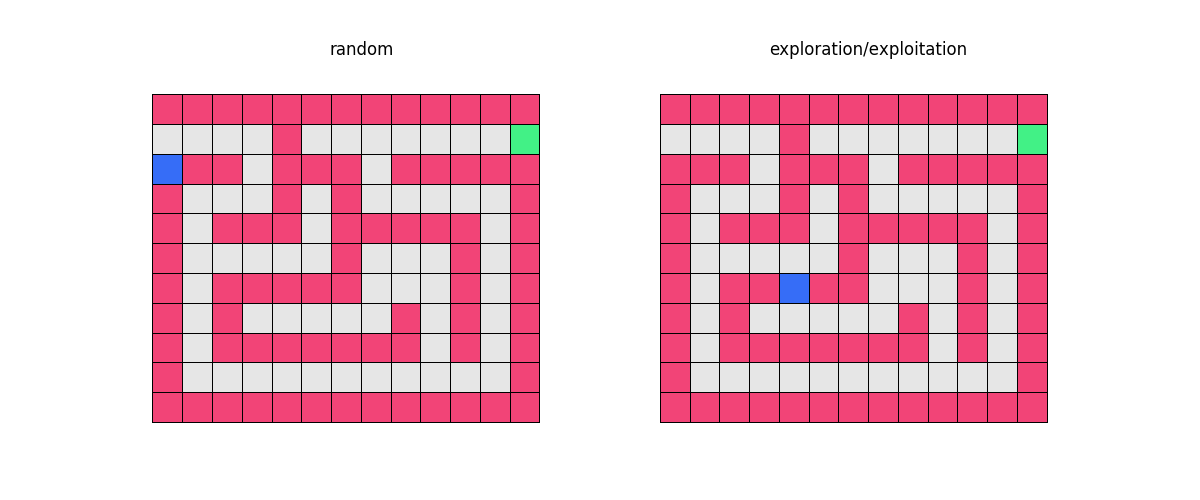
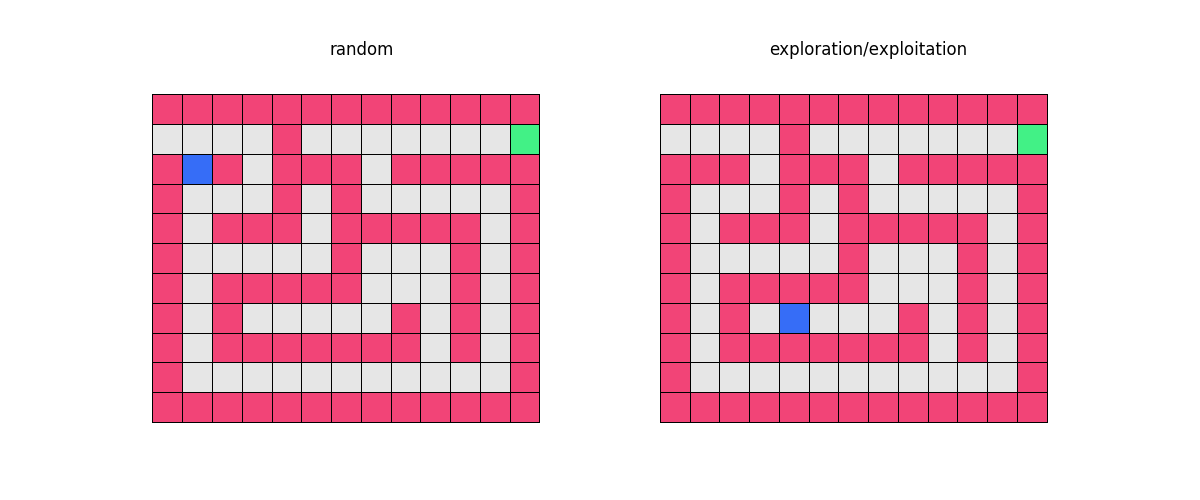
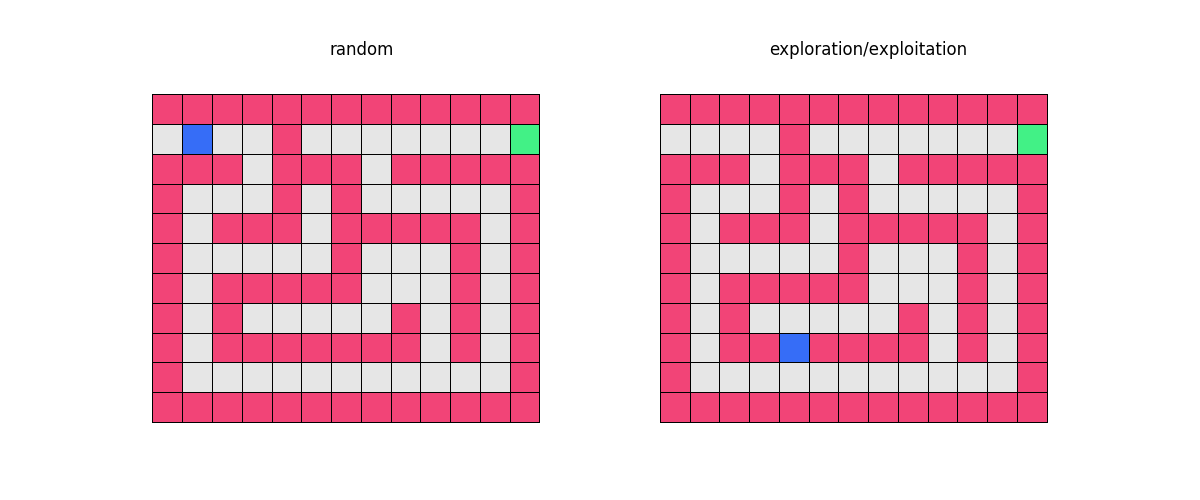
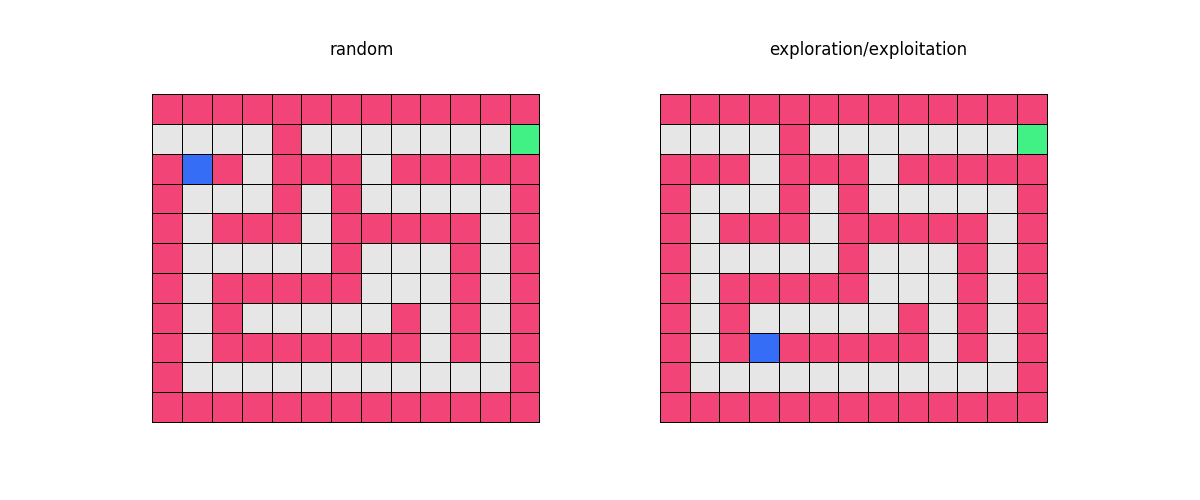
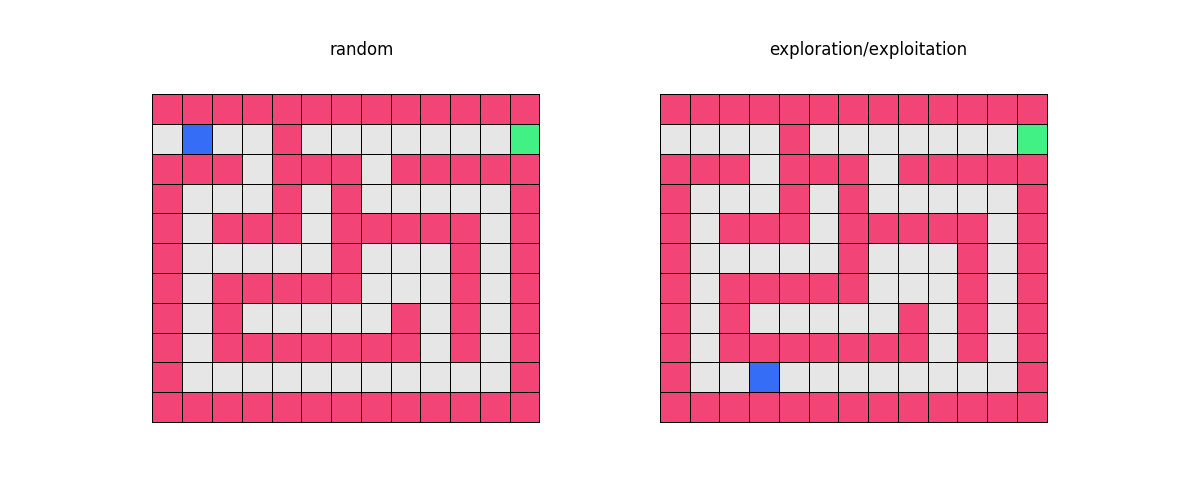
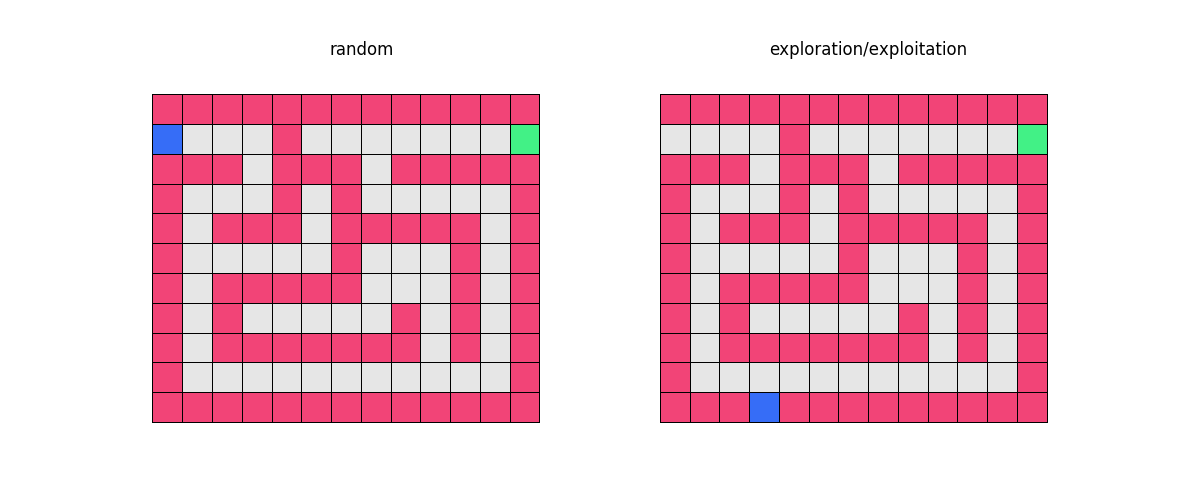
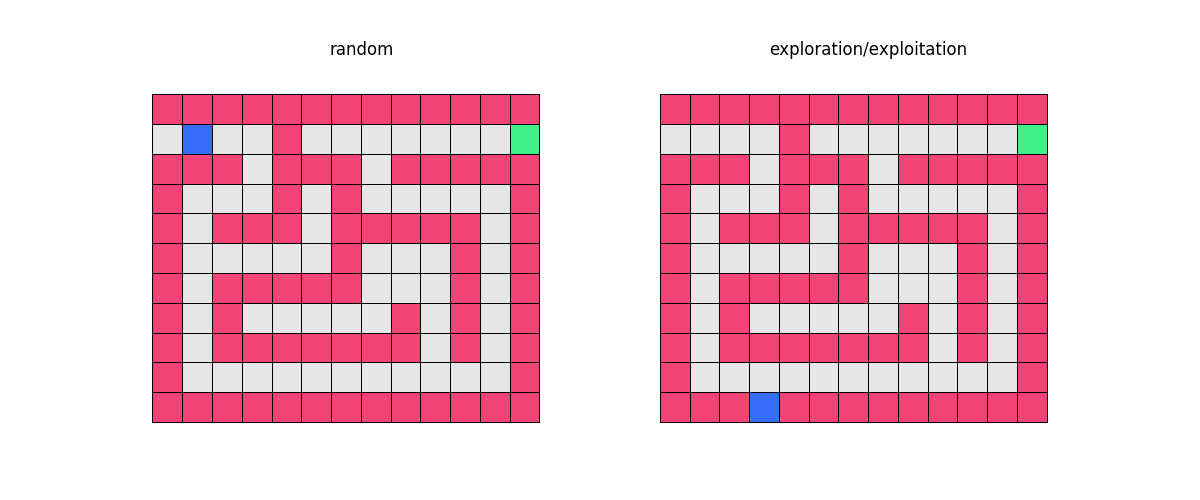
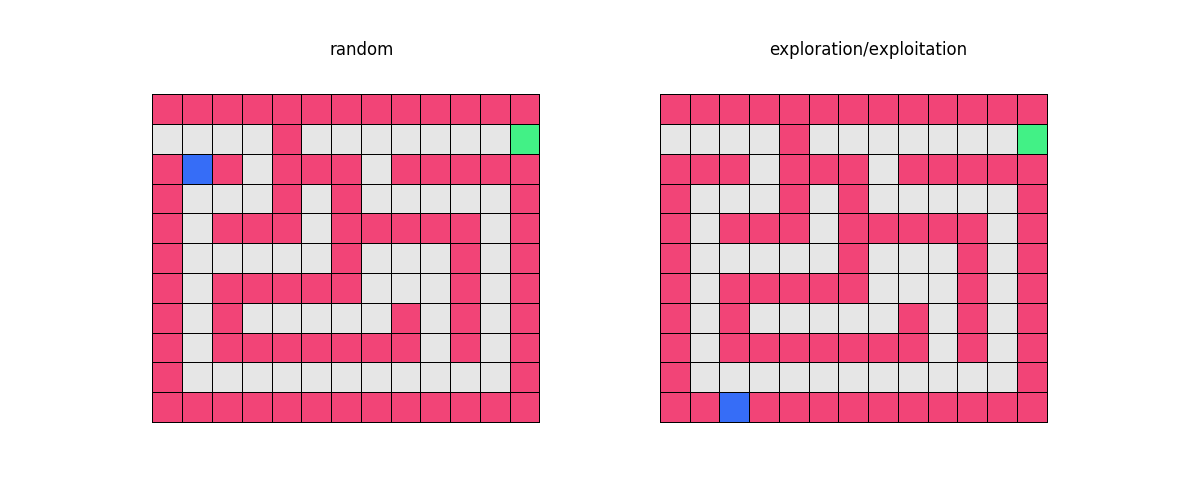
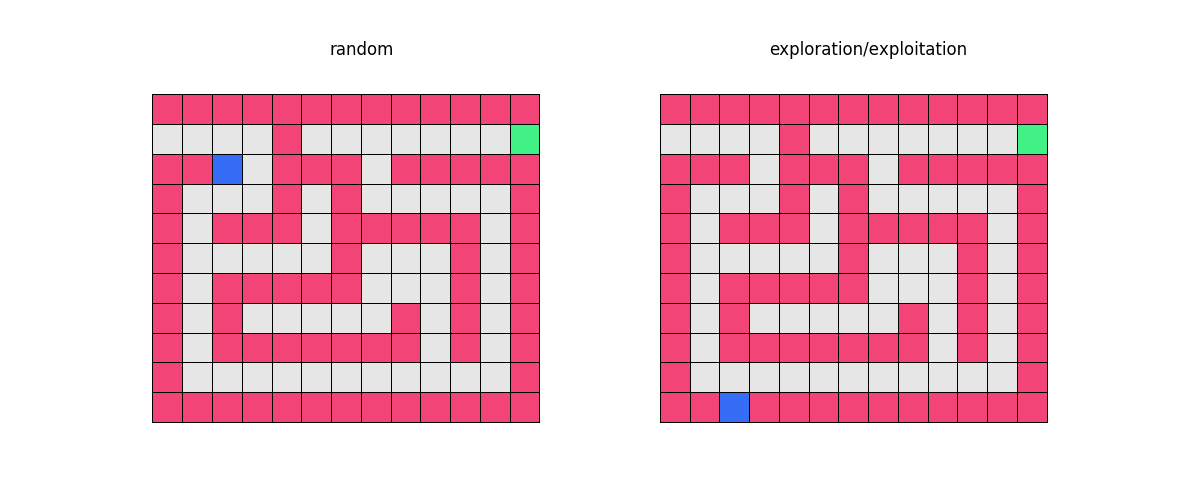

In [16]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

# run animator to compare action methods        
animator.animate_training_comparison(gridworld = small_maze,learner_1 = random_qlearner,learner_2 = exploit_qlearner, episode = 0)

- by episode 50 however things are quite different


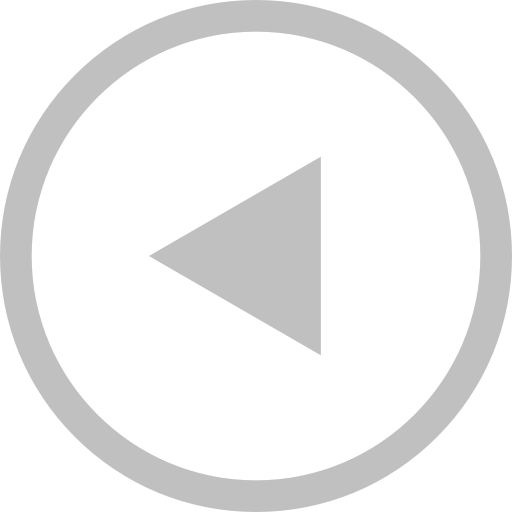
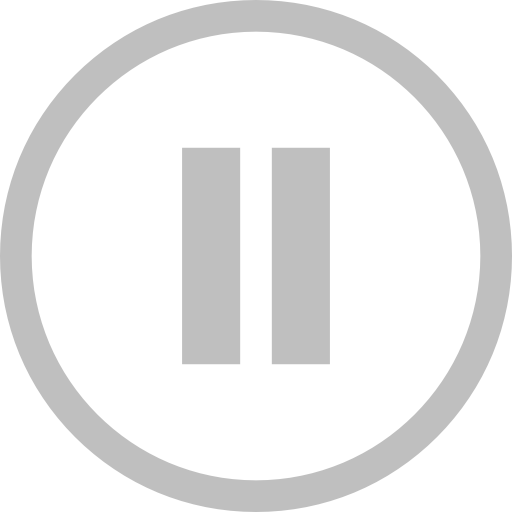
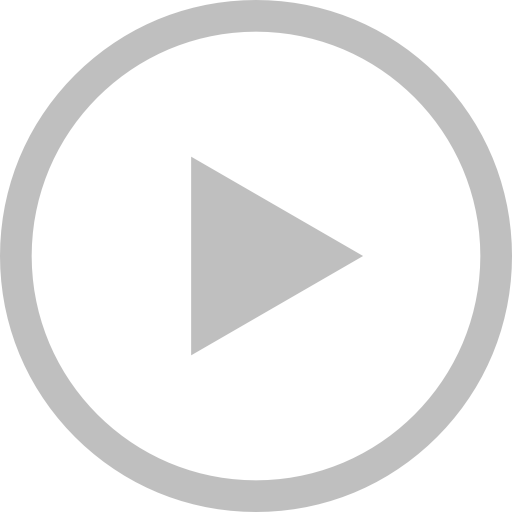
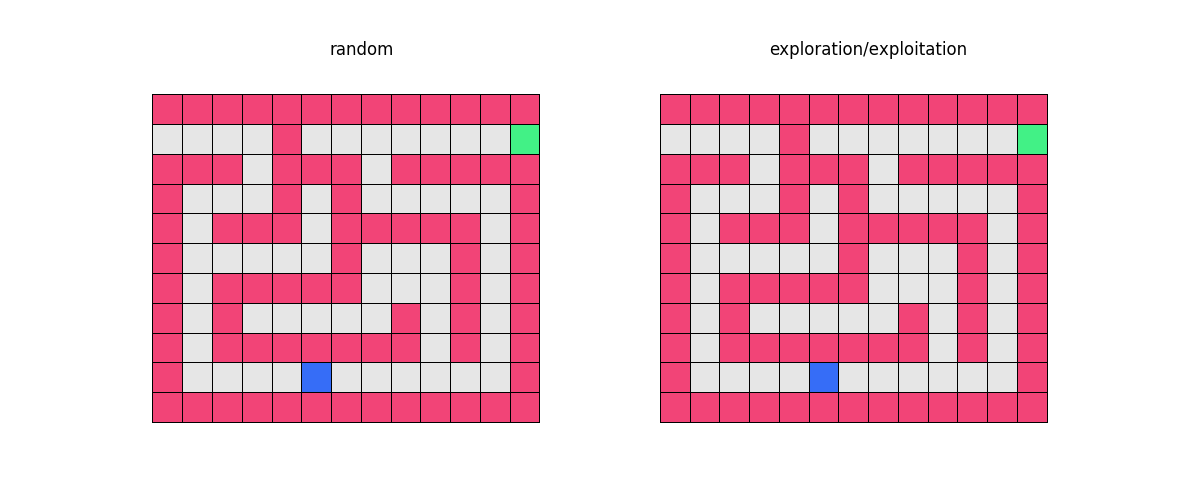
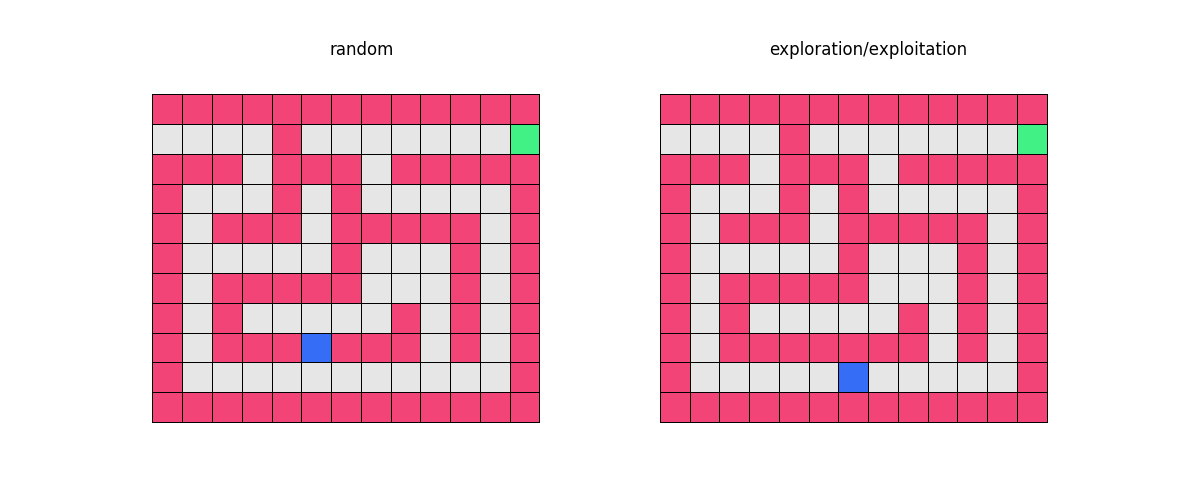
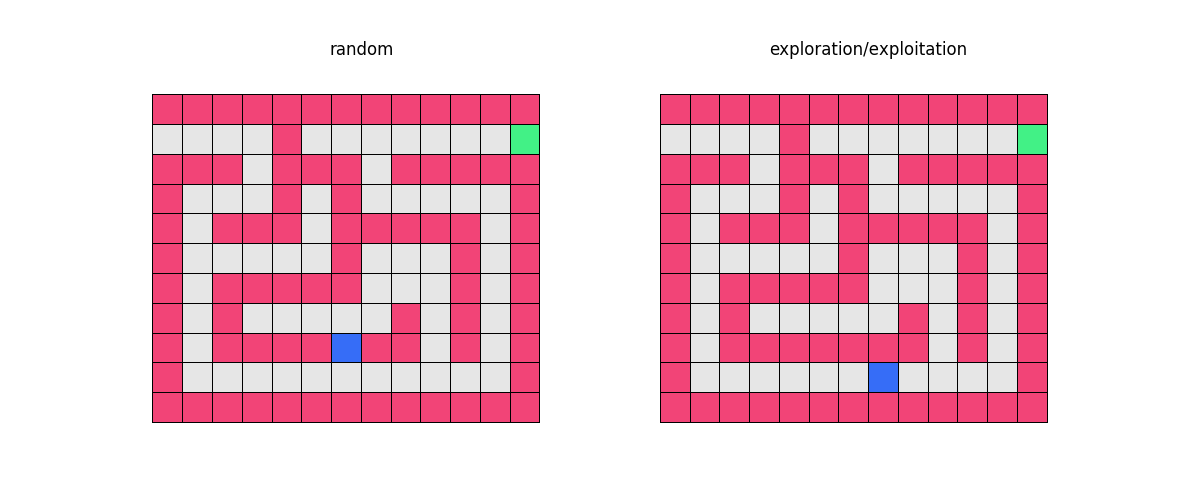
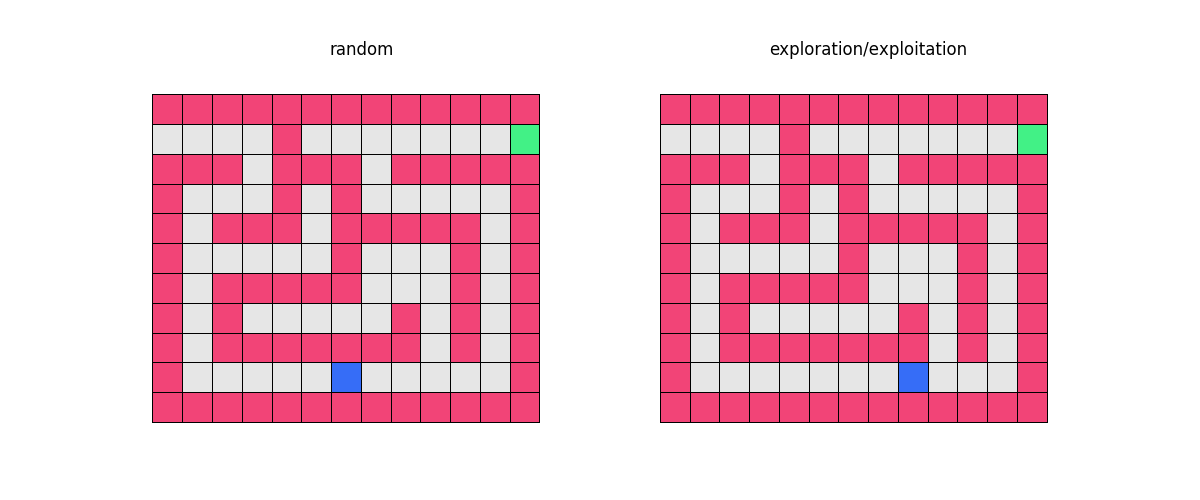
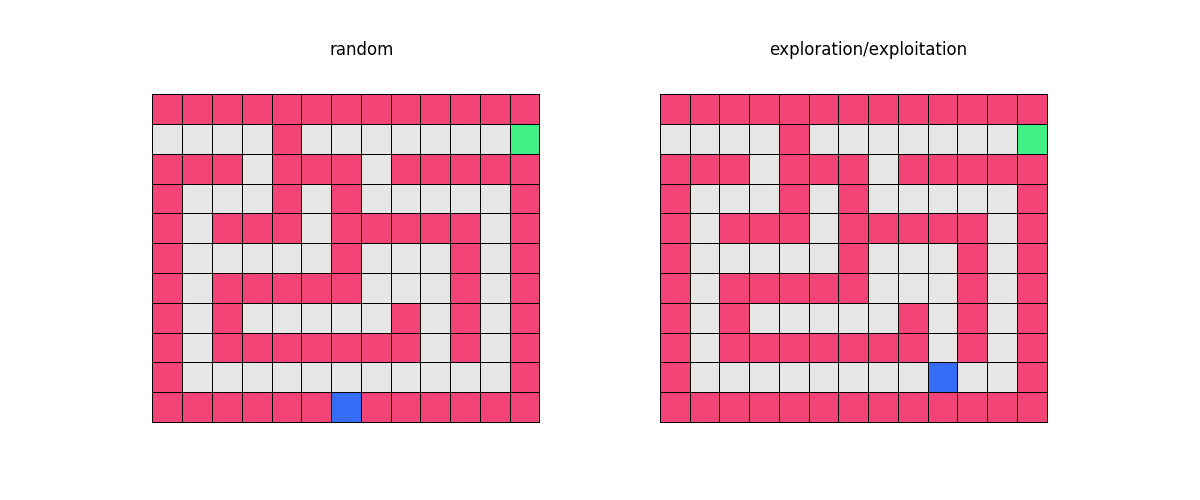
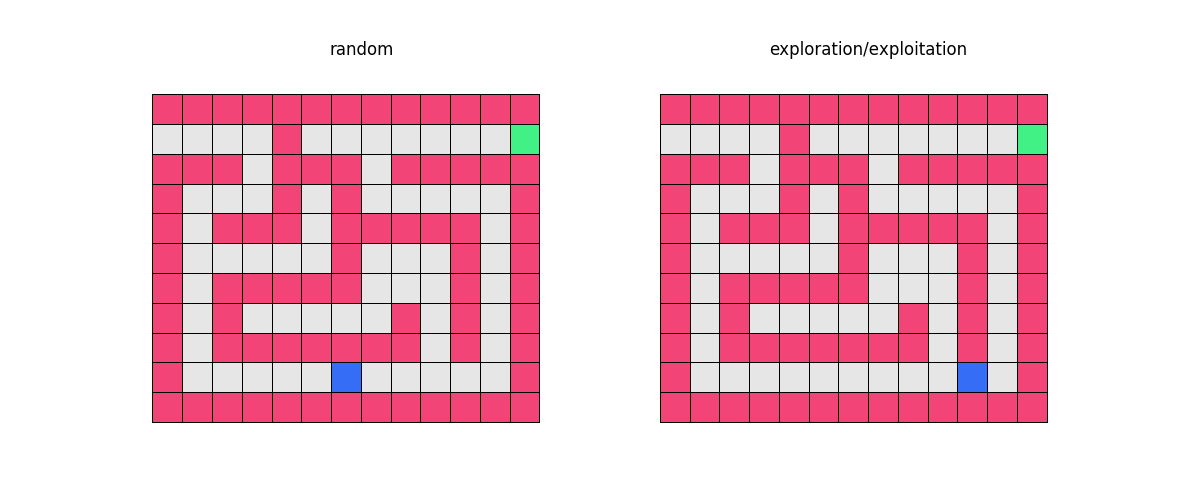
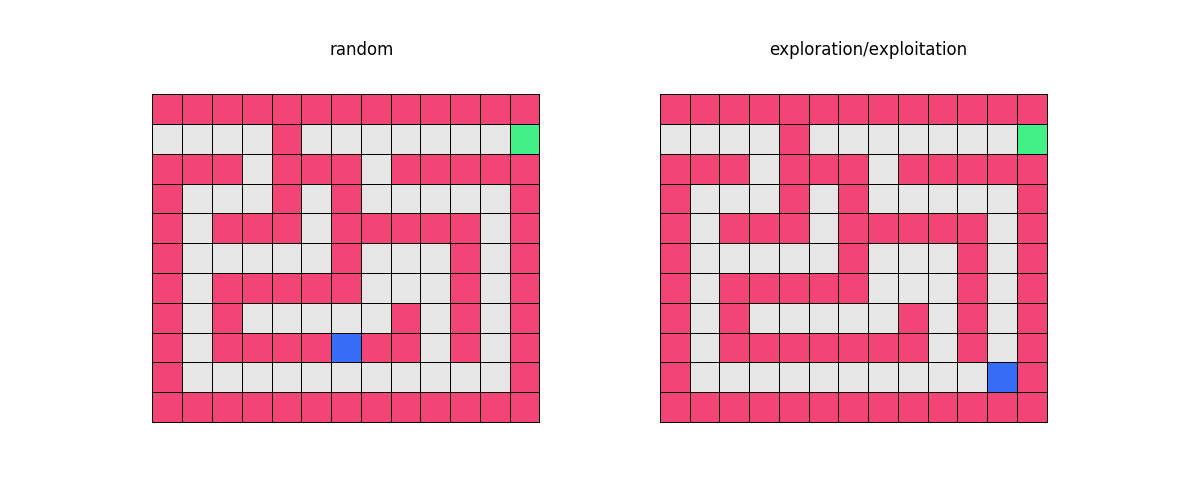
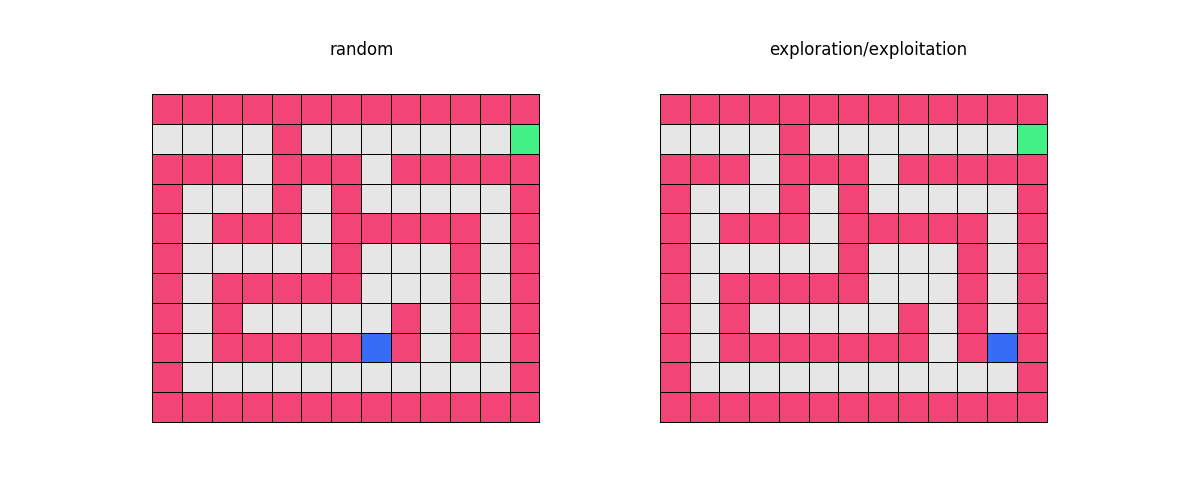
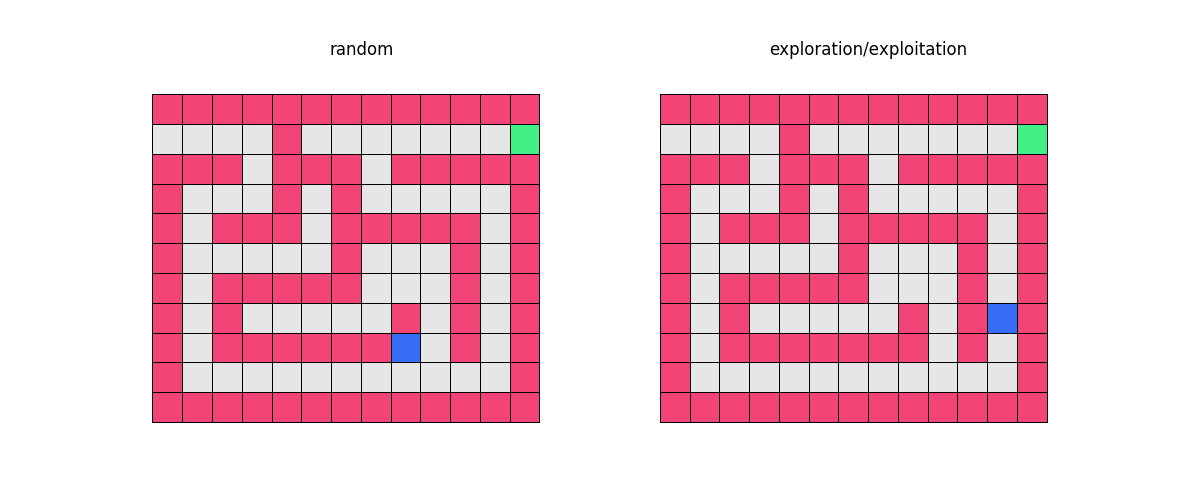
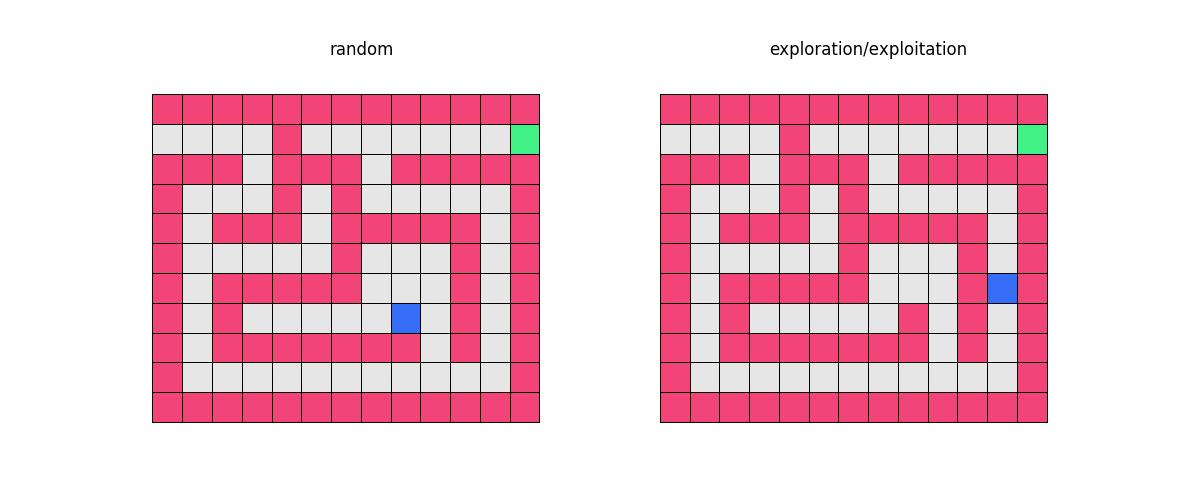
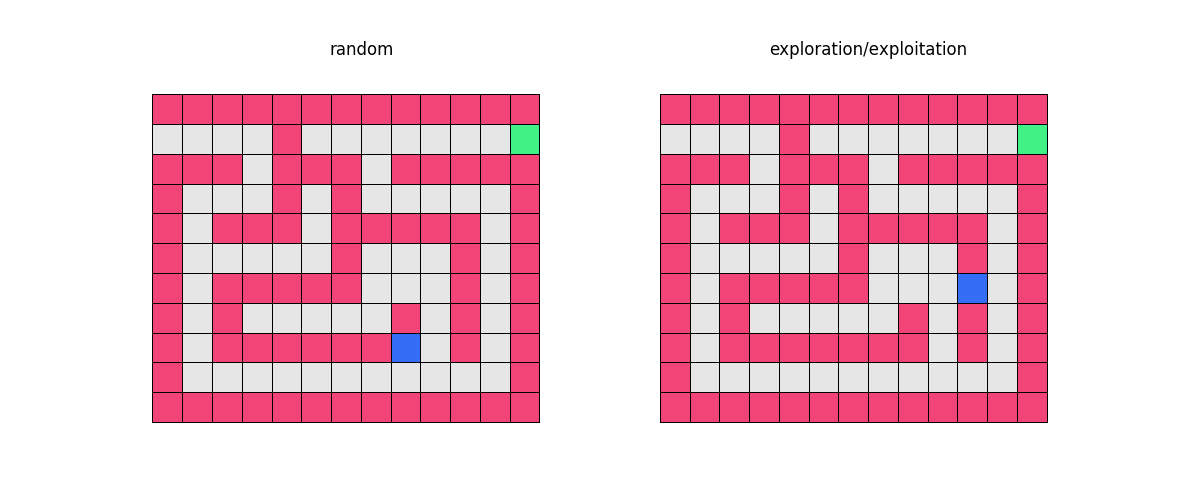
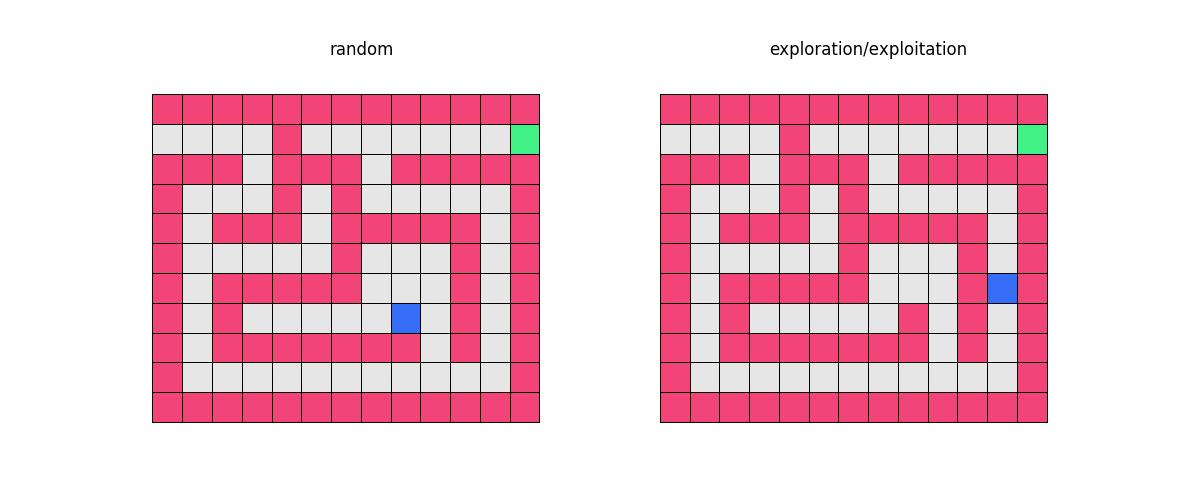
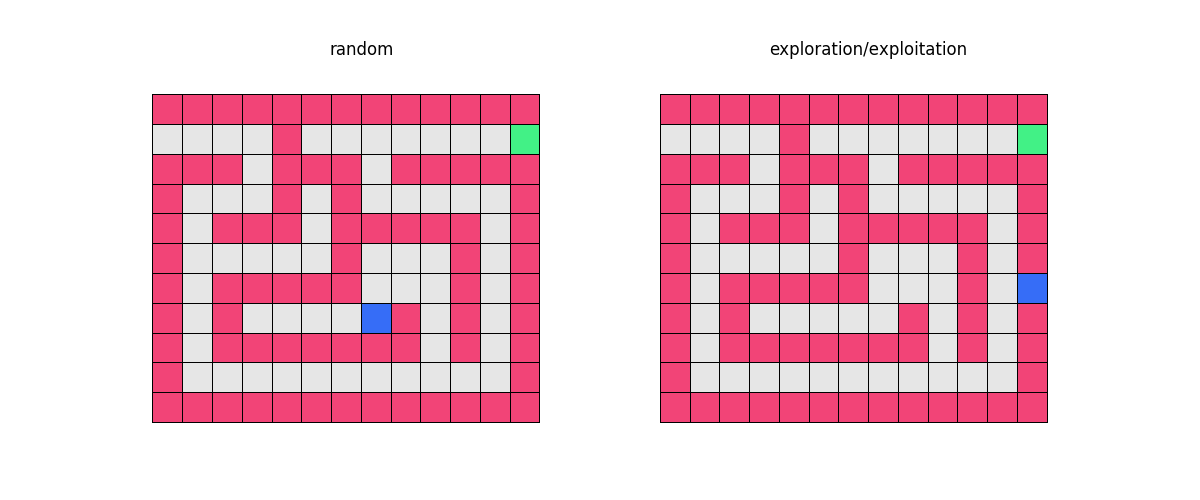
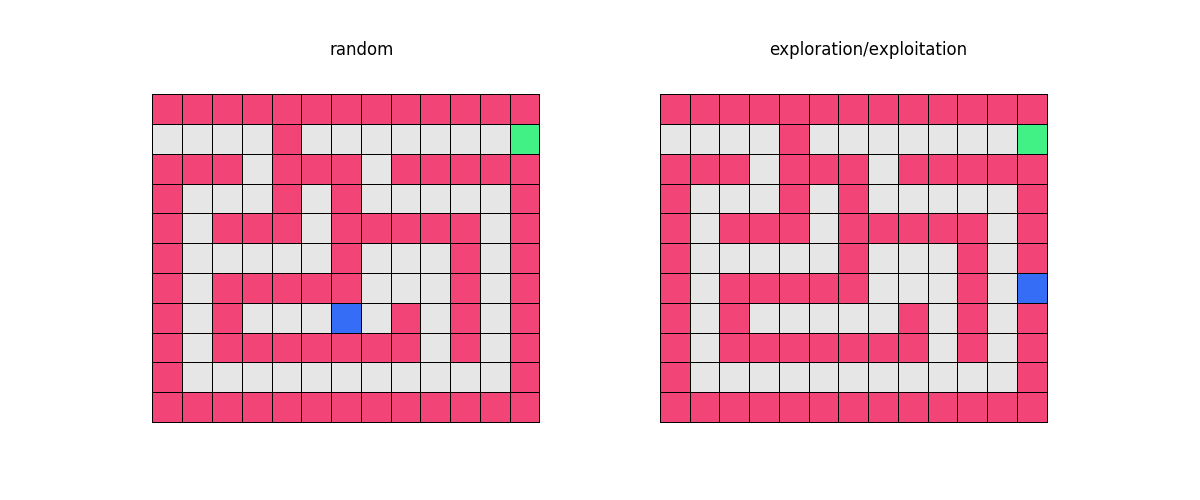
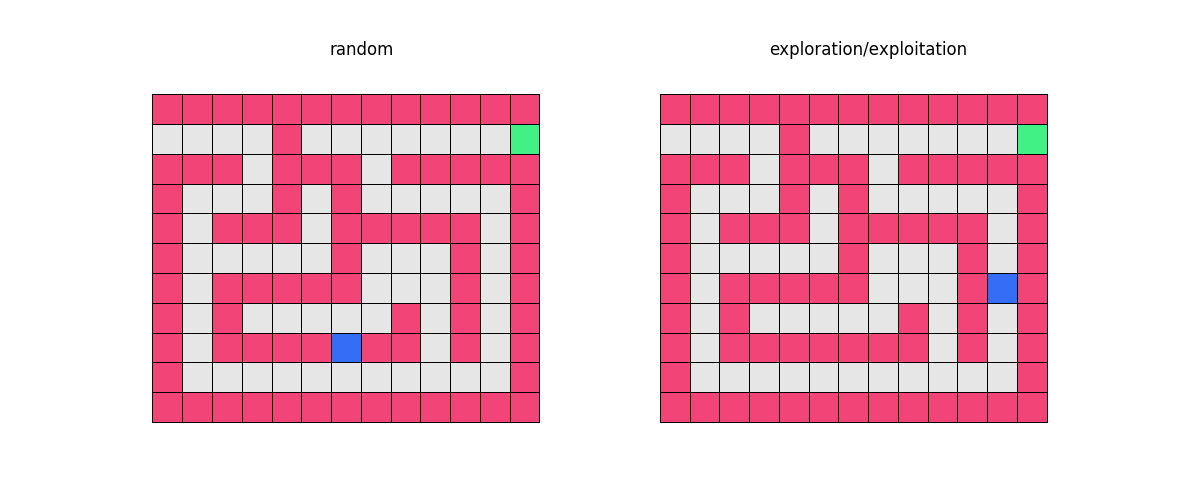
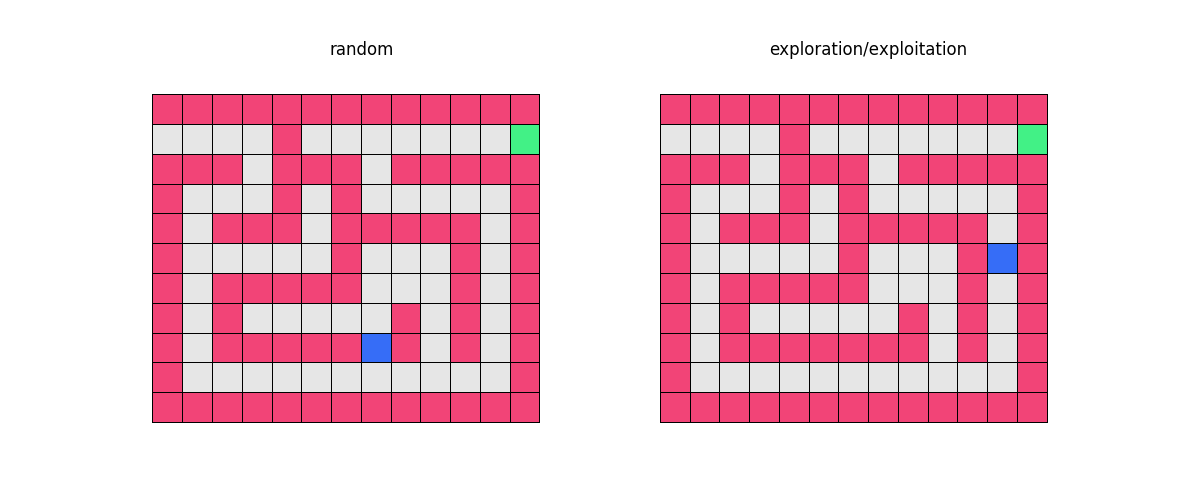
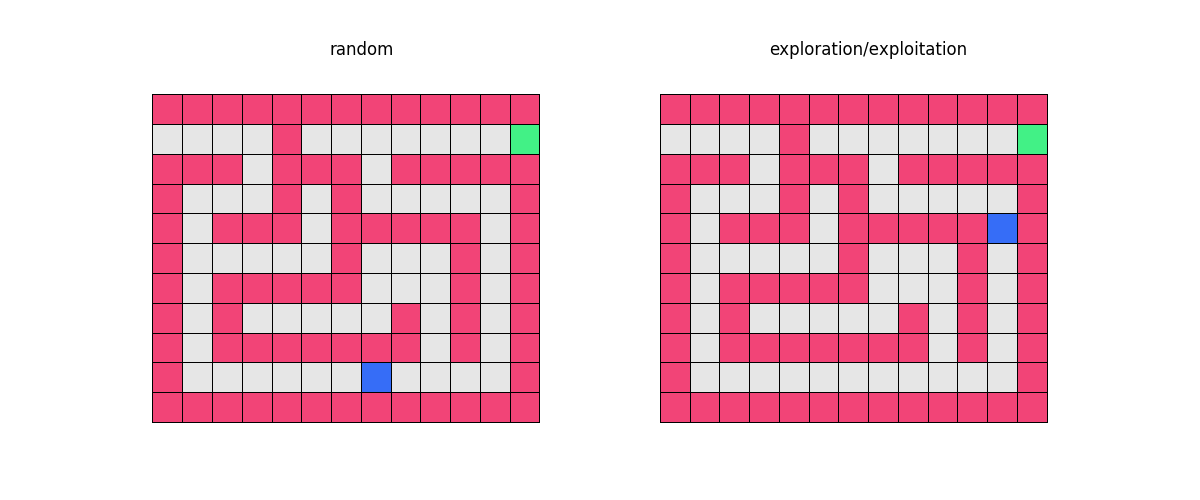
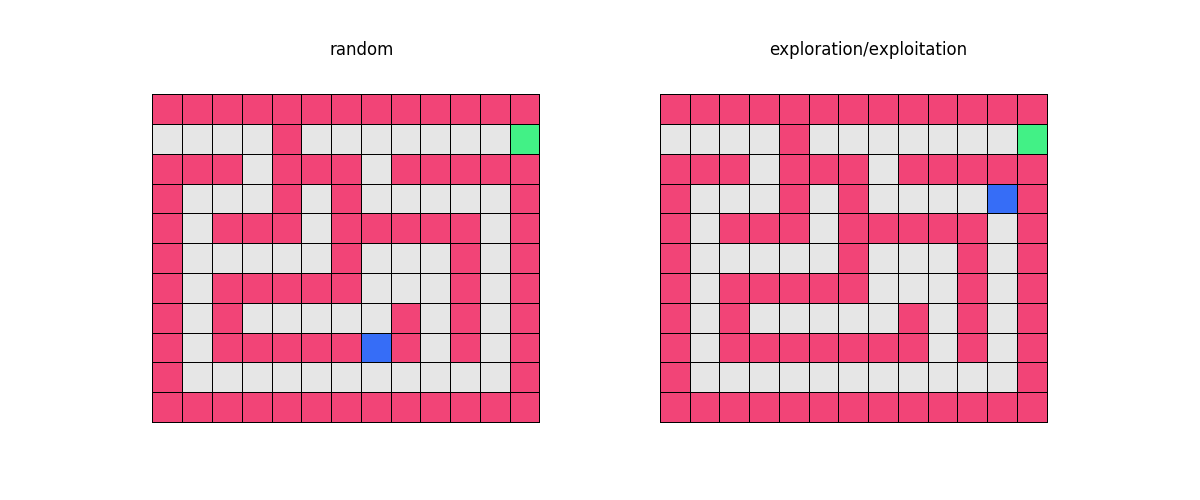
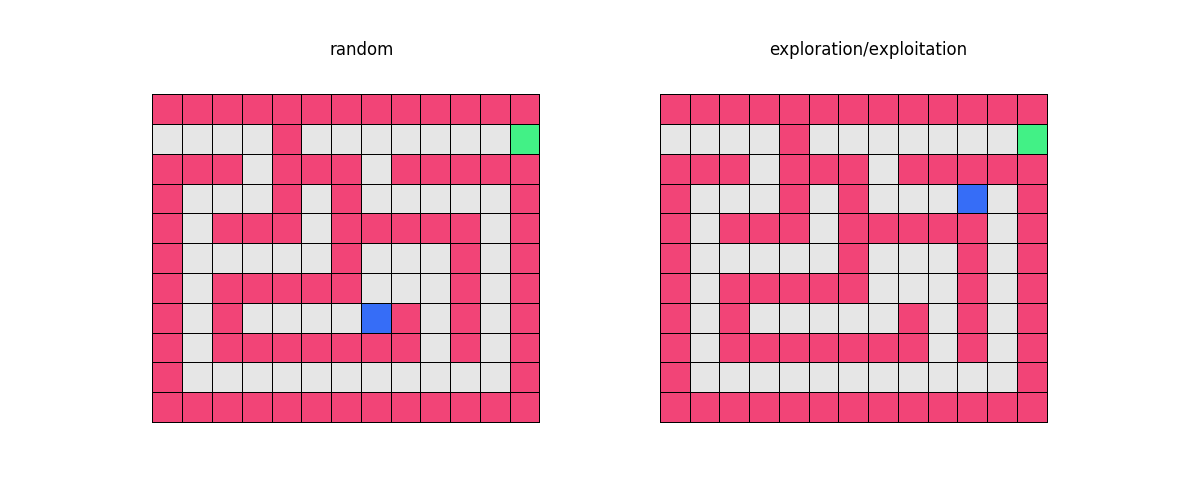
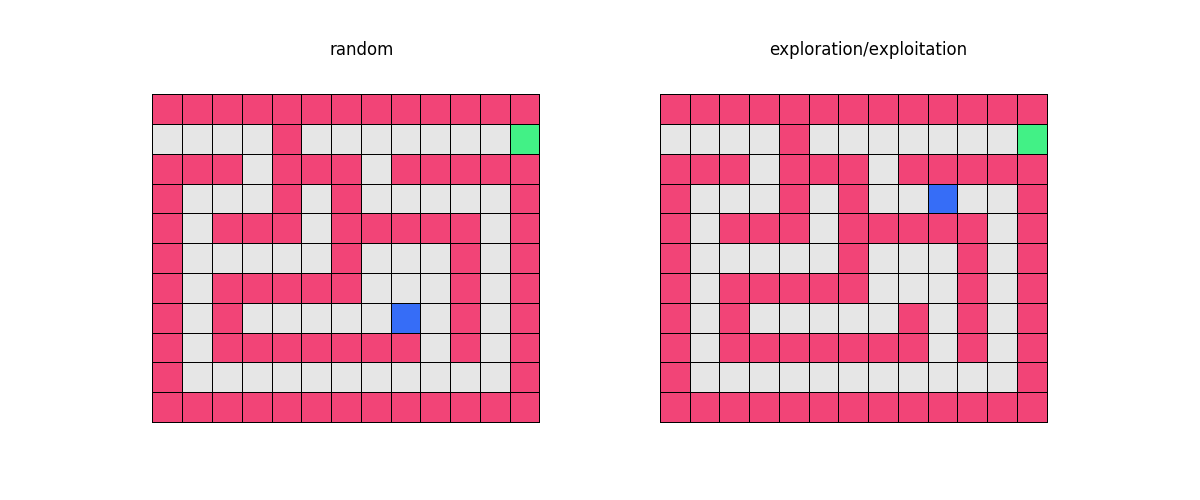
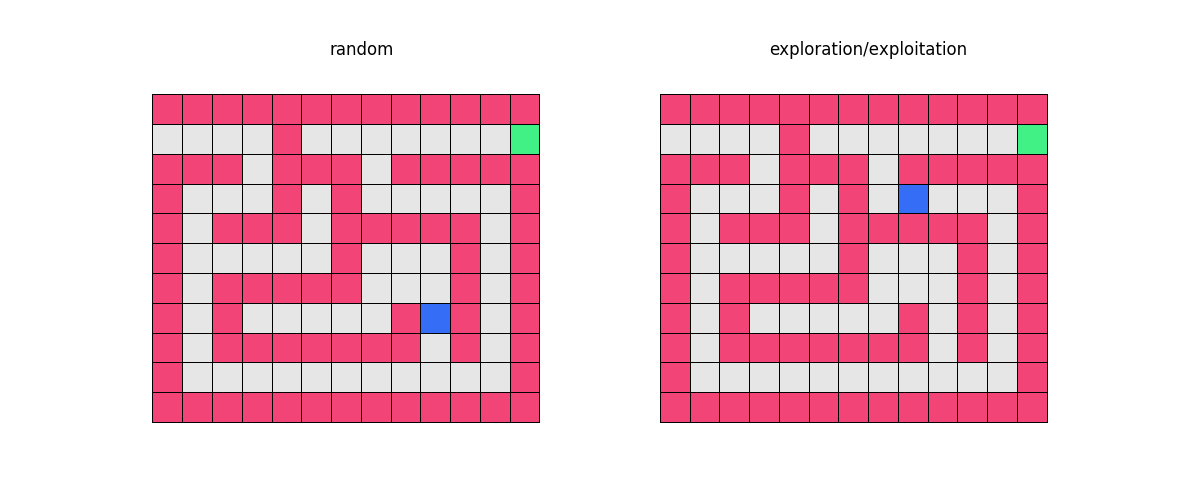
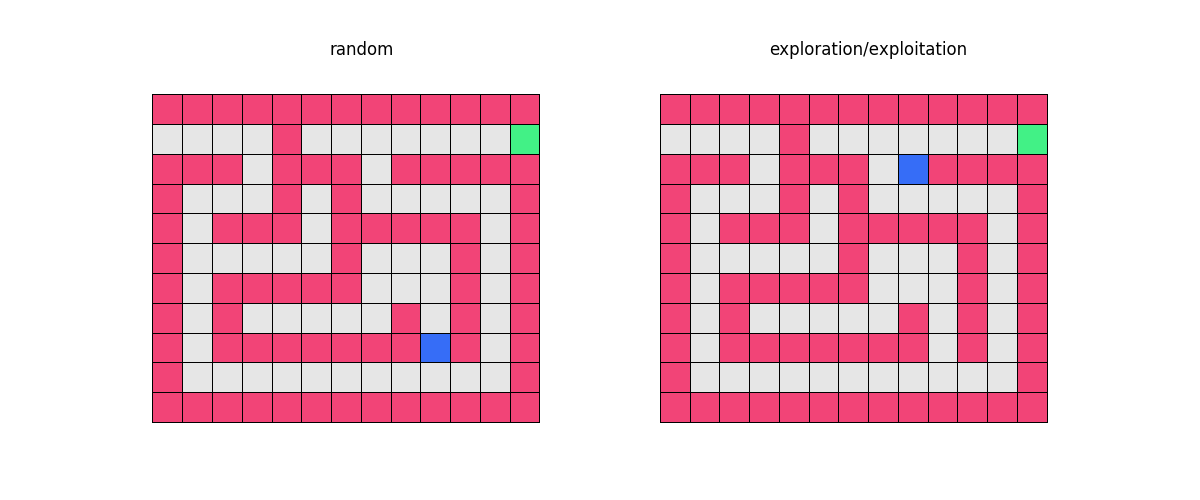
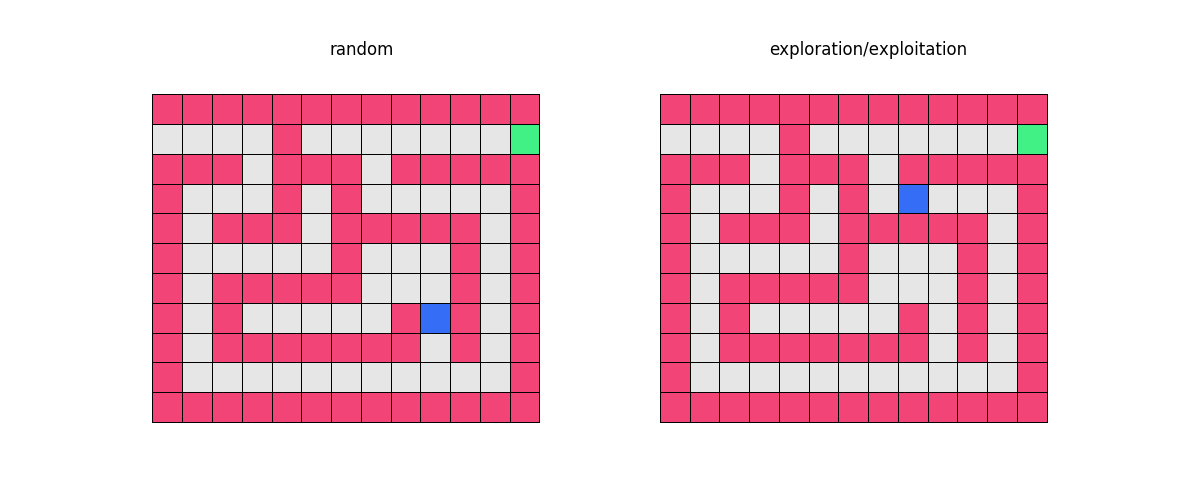
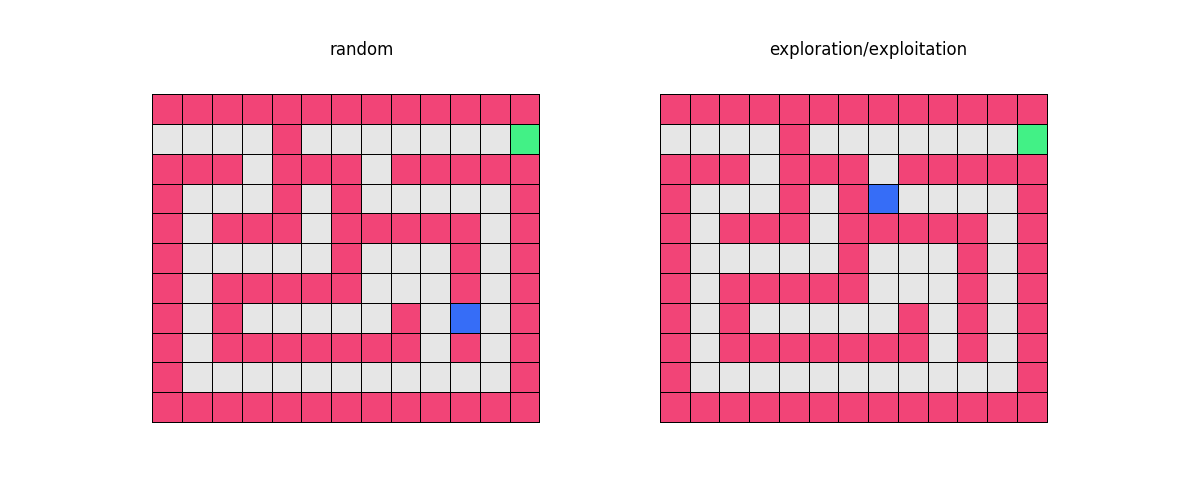
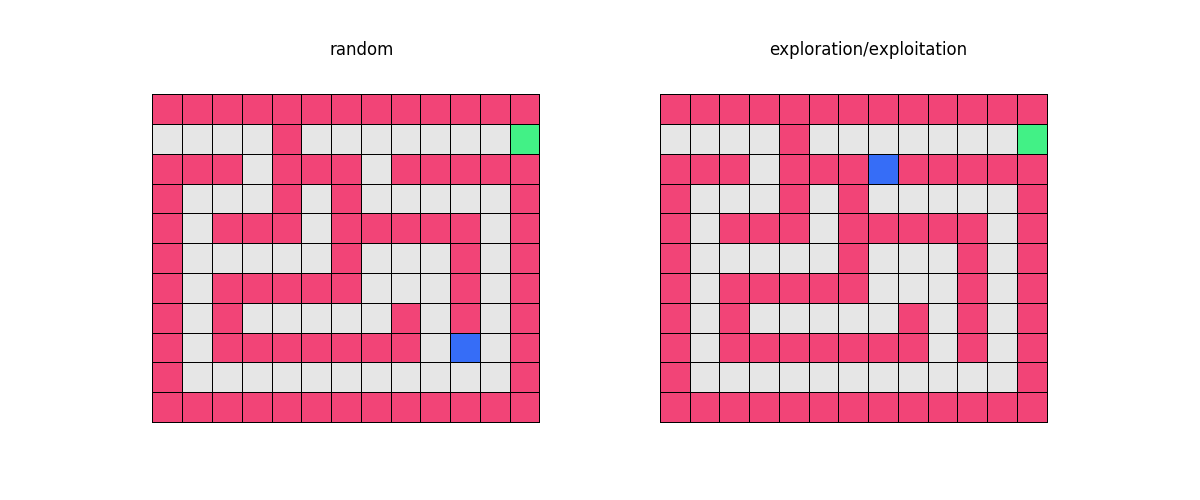
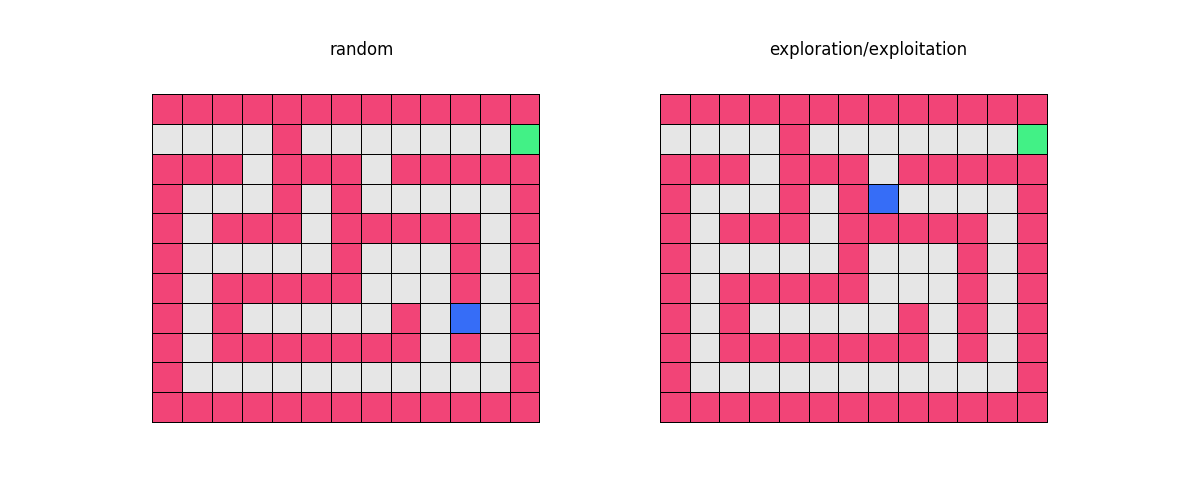
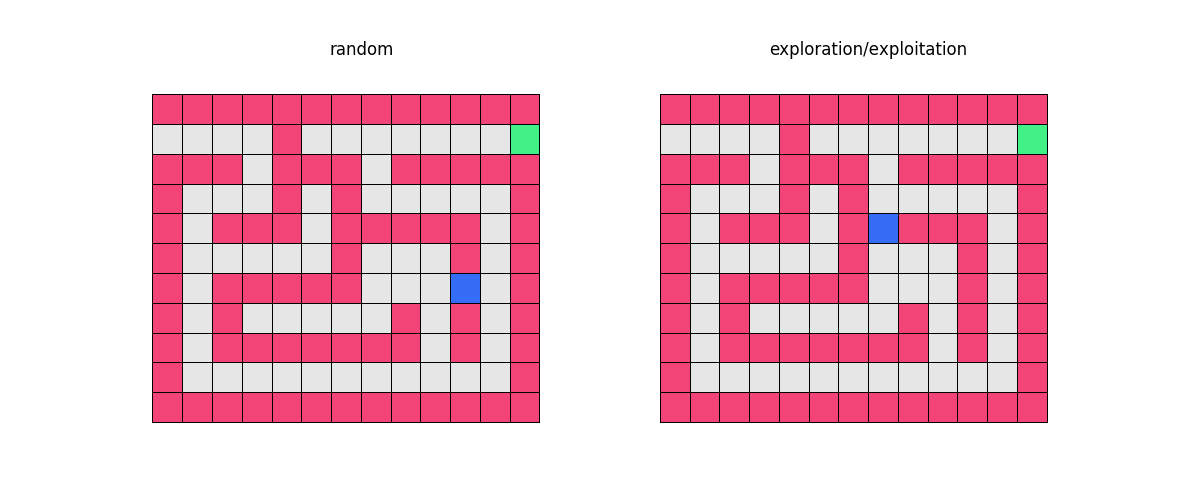
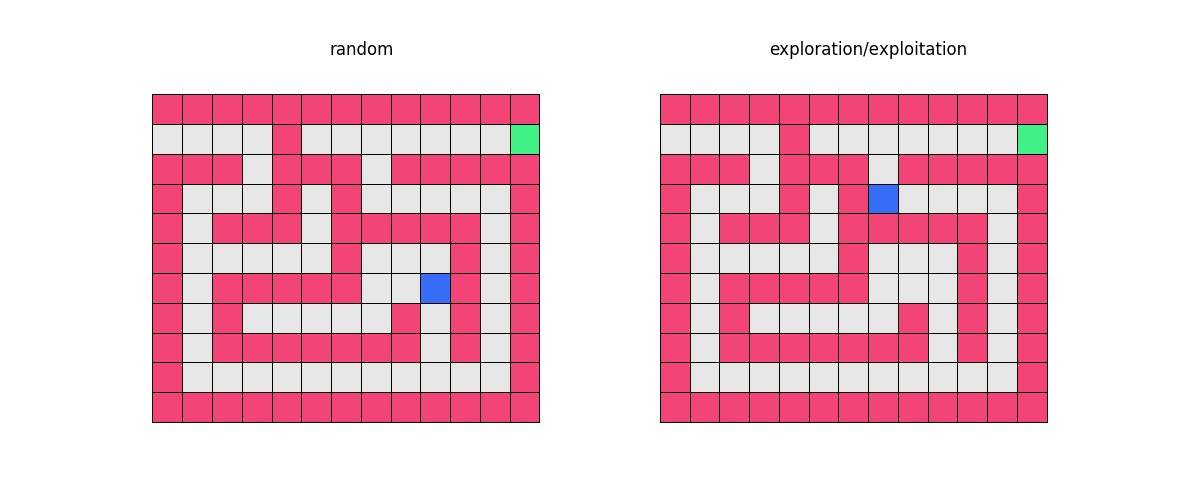
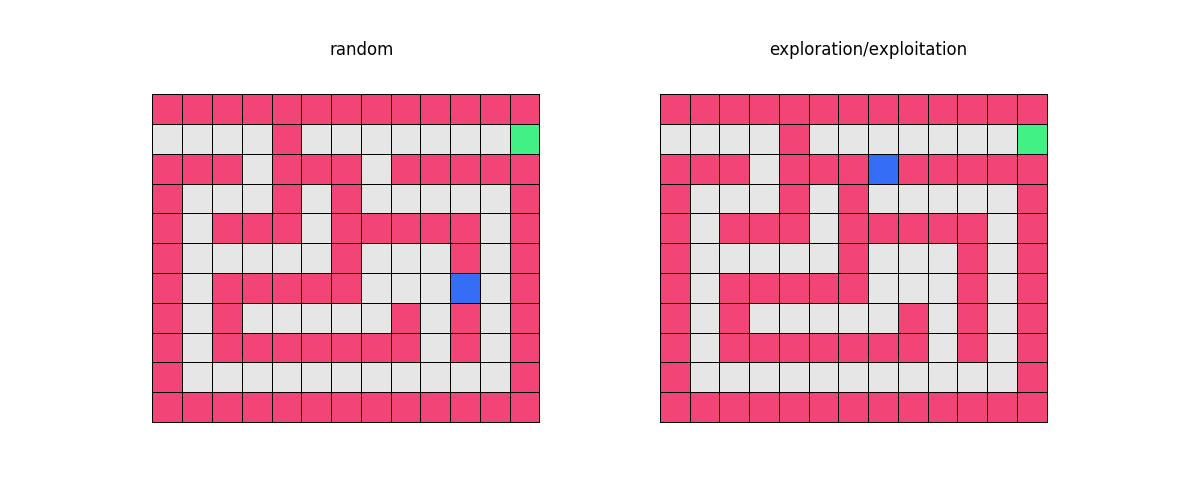
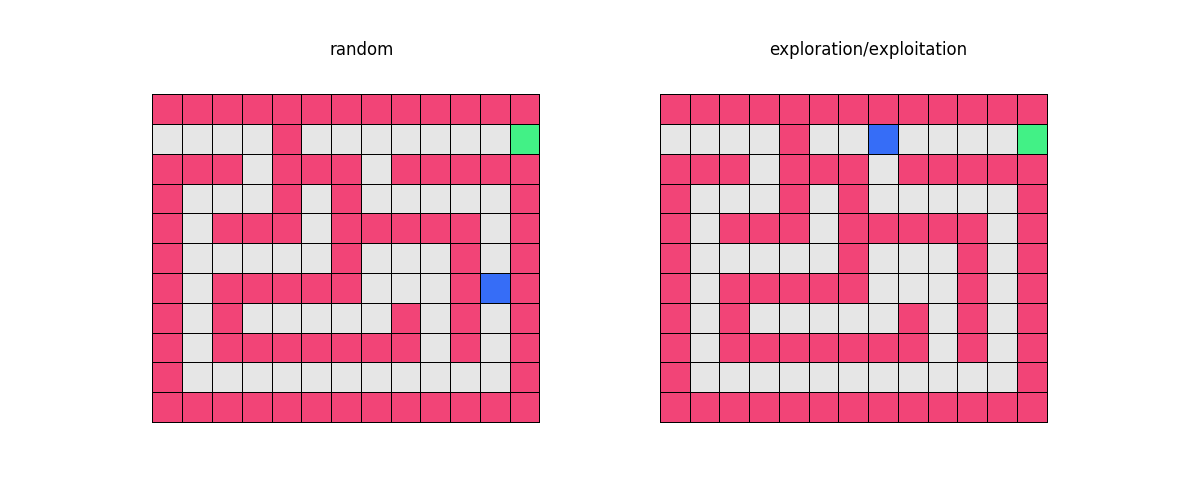
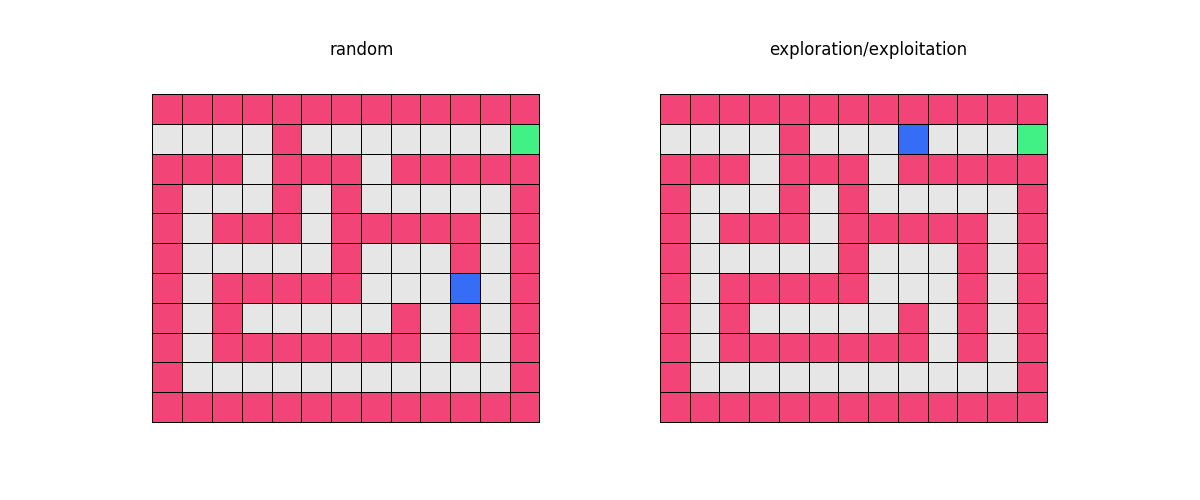
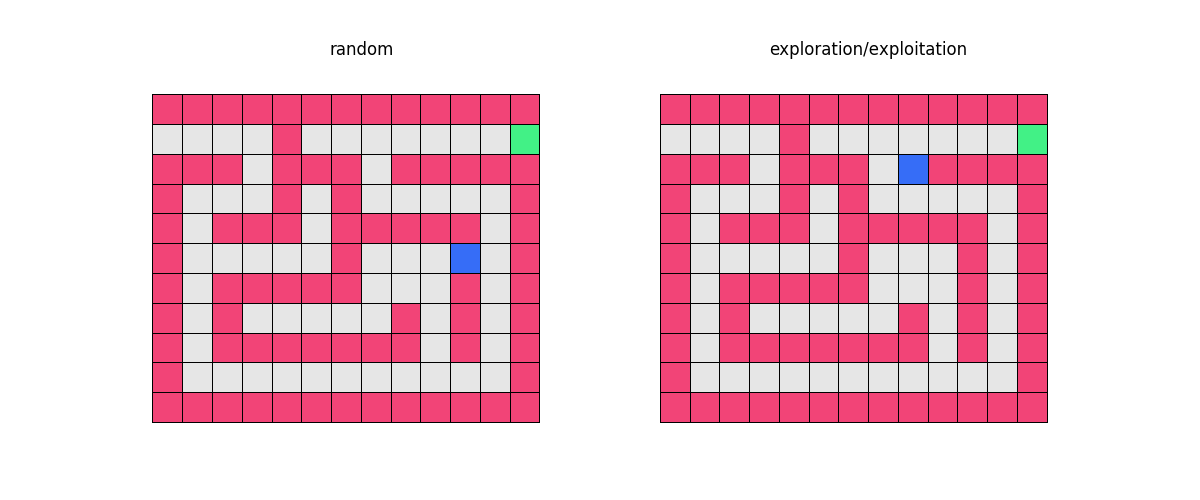
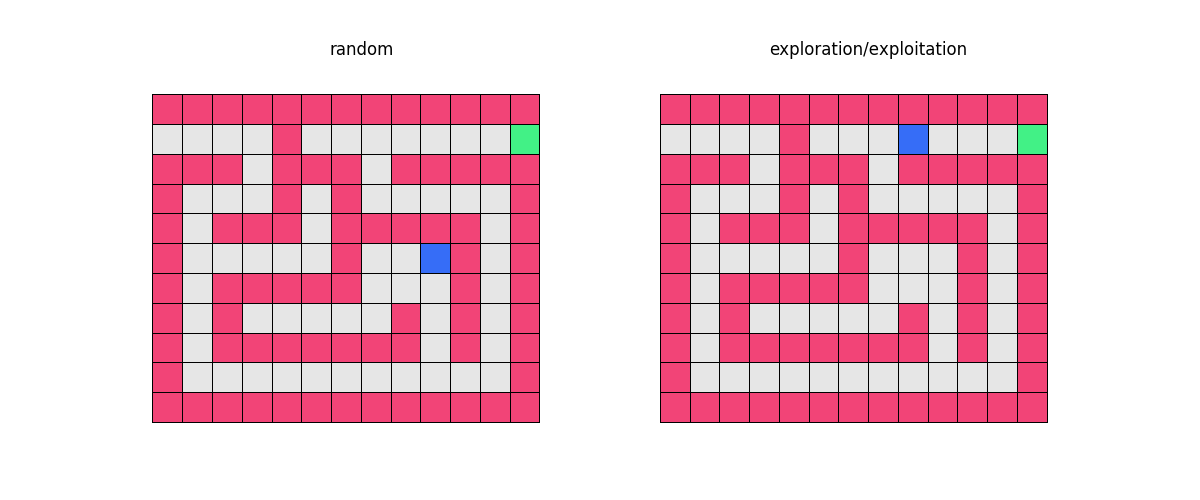
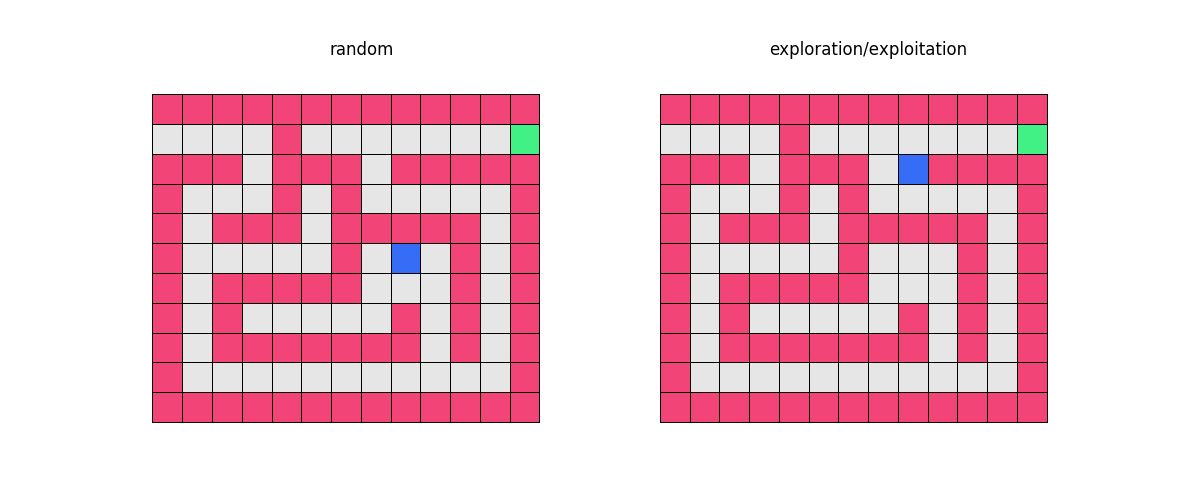
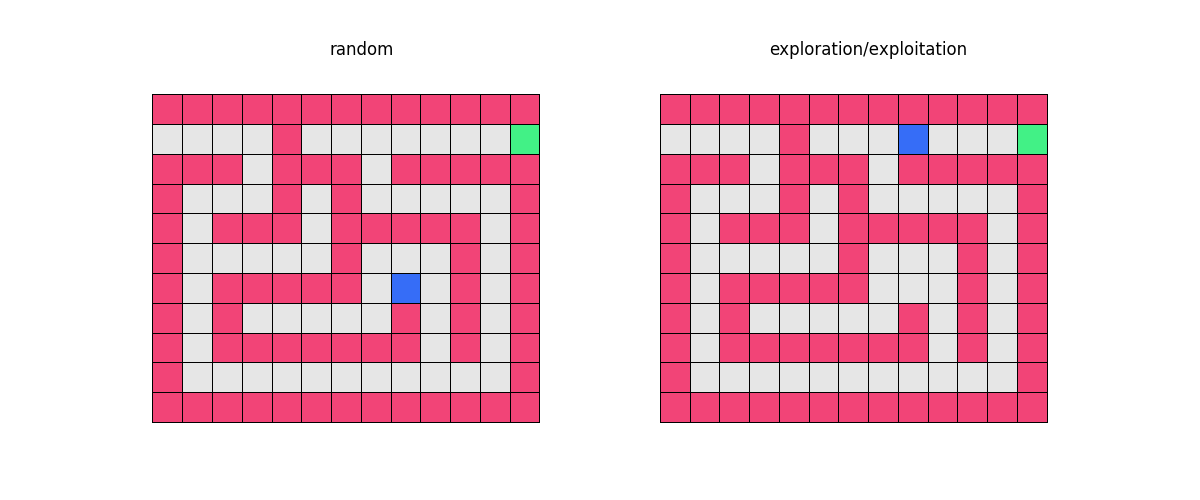
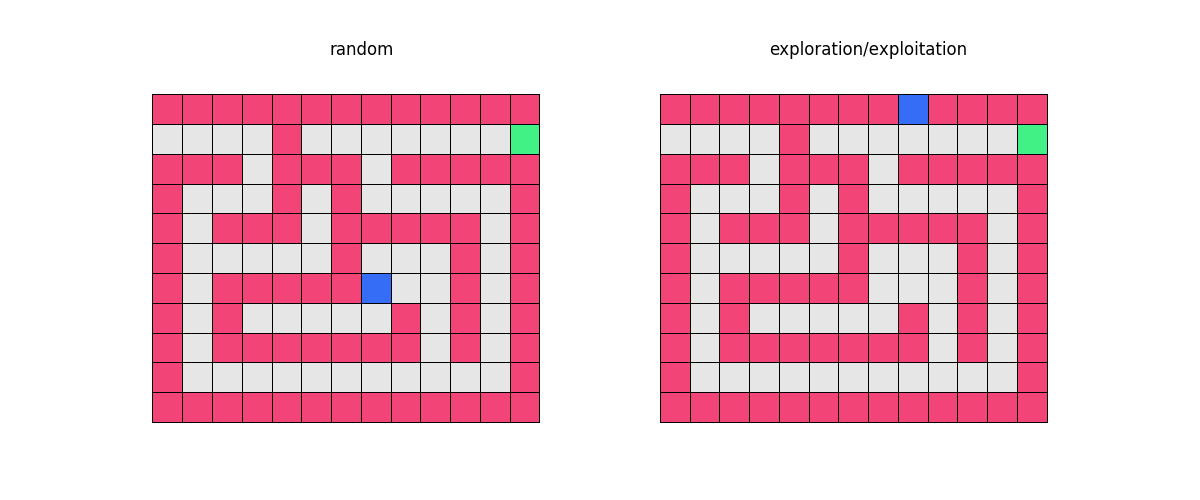
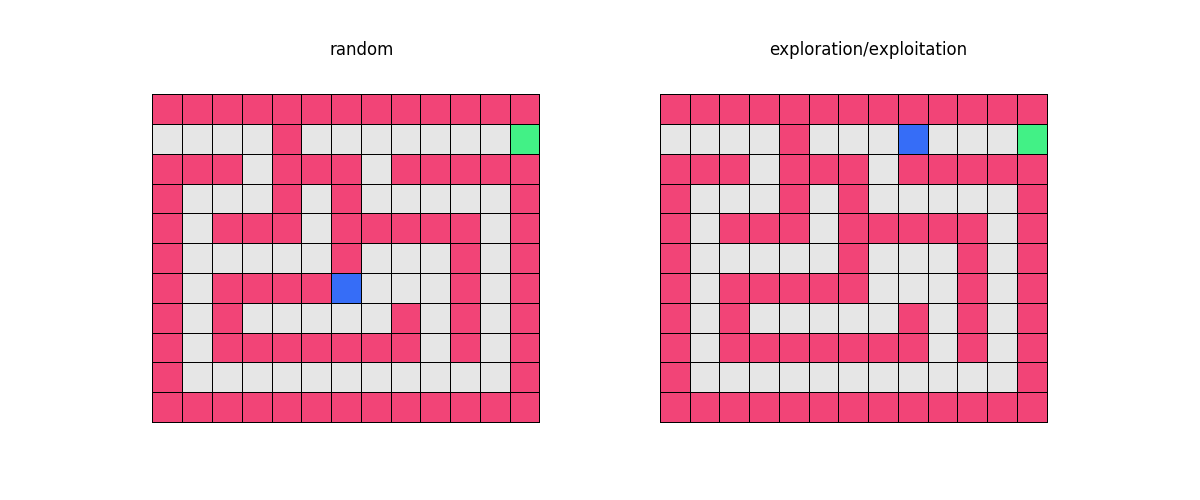
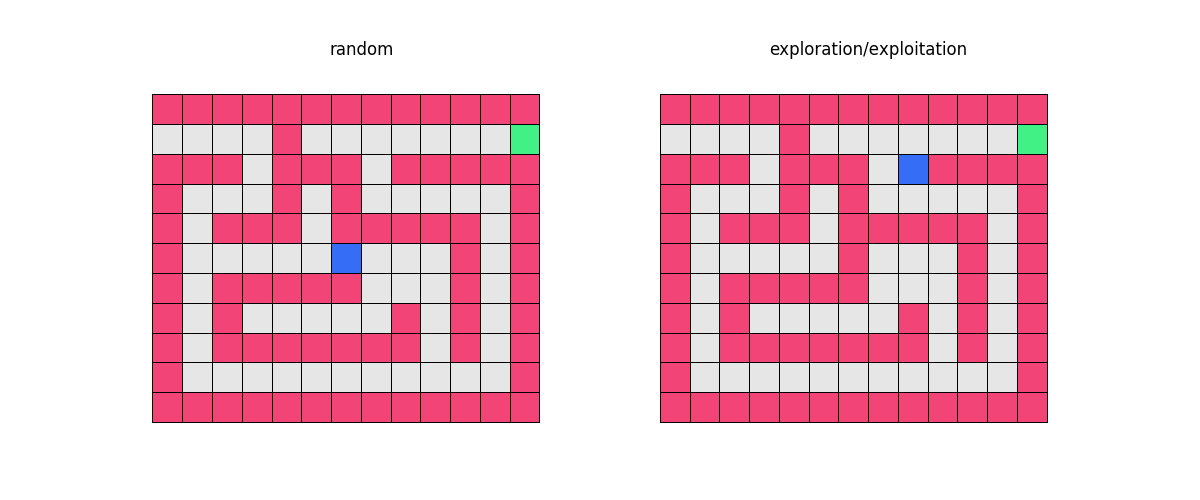
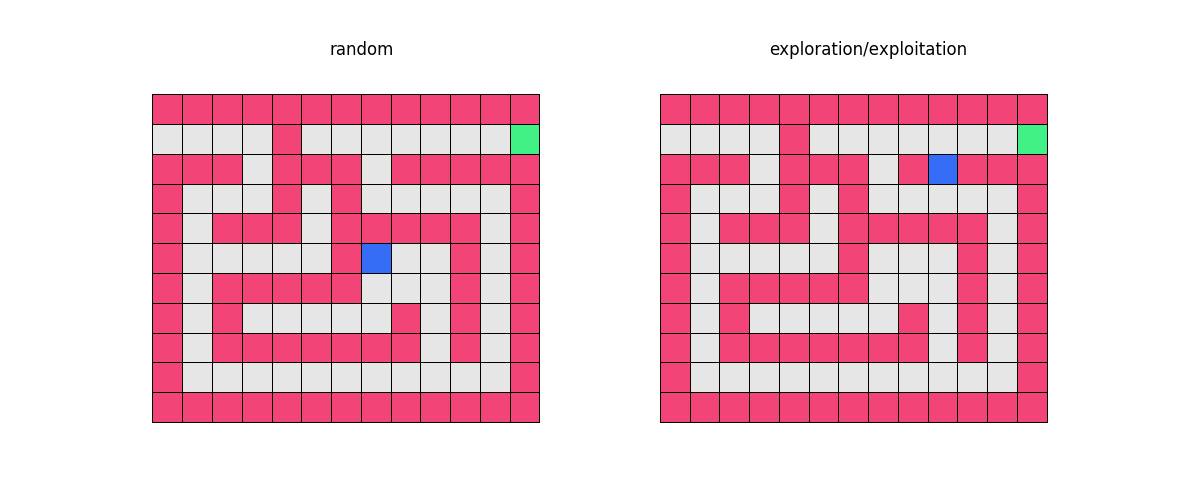
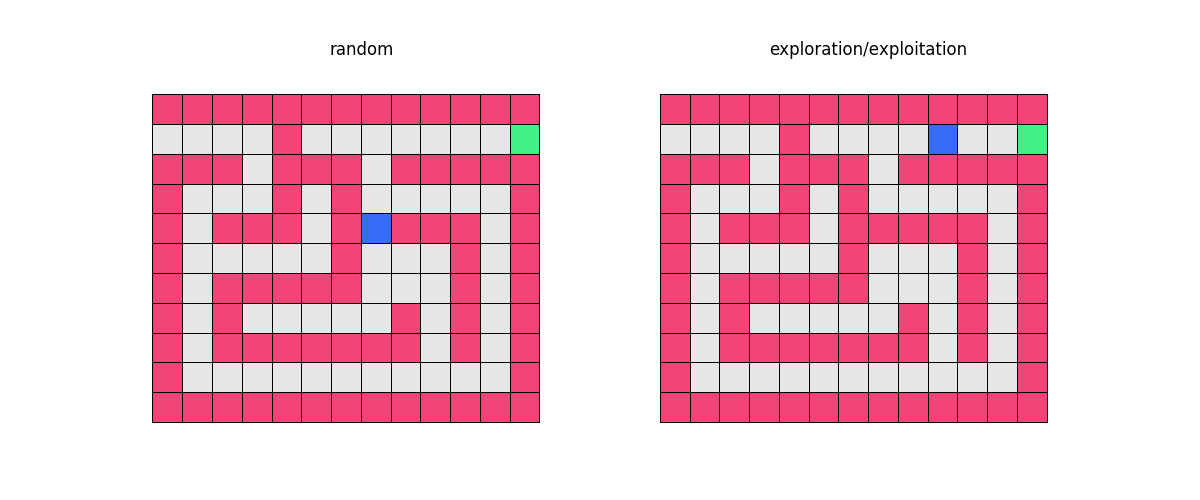
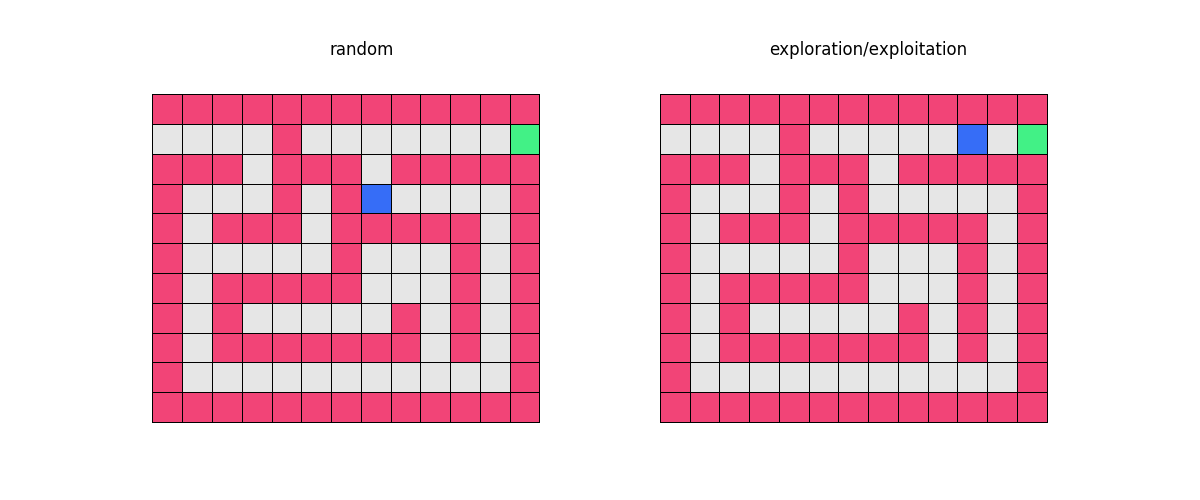
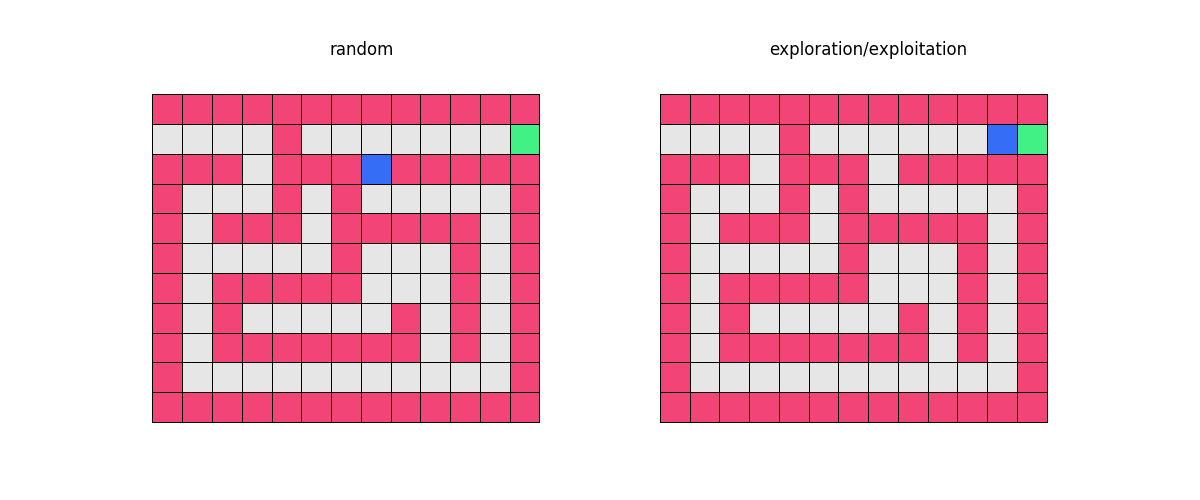
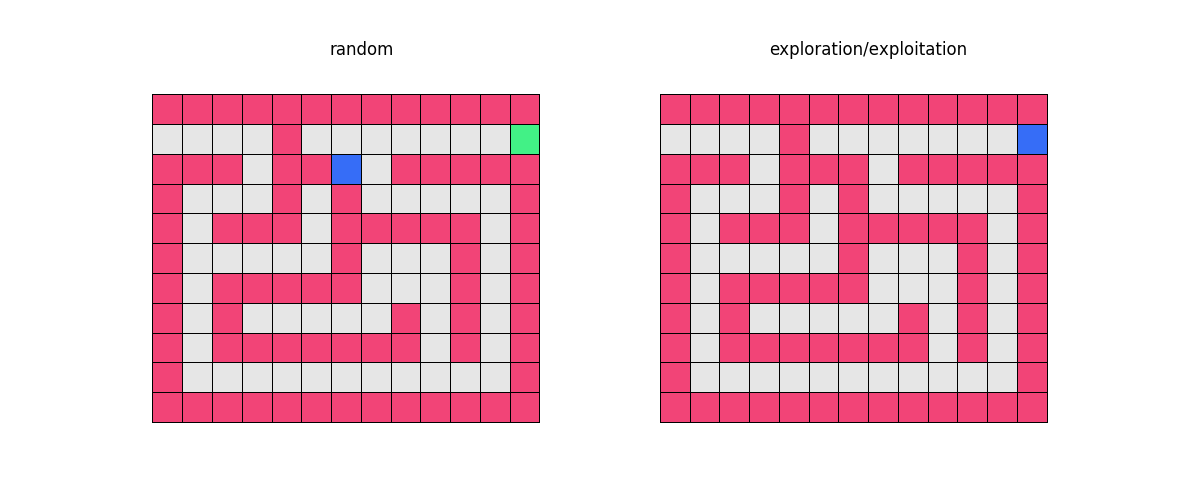
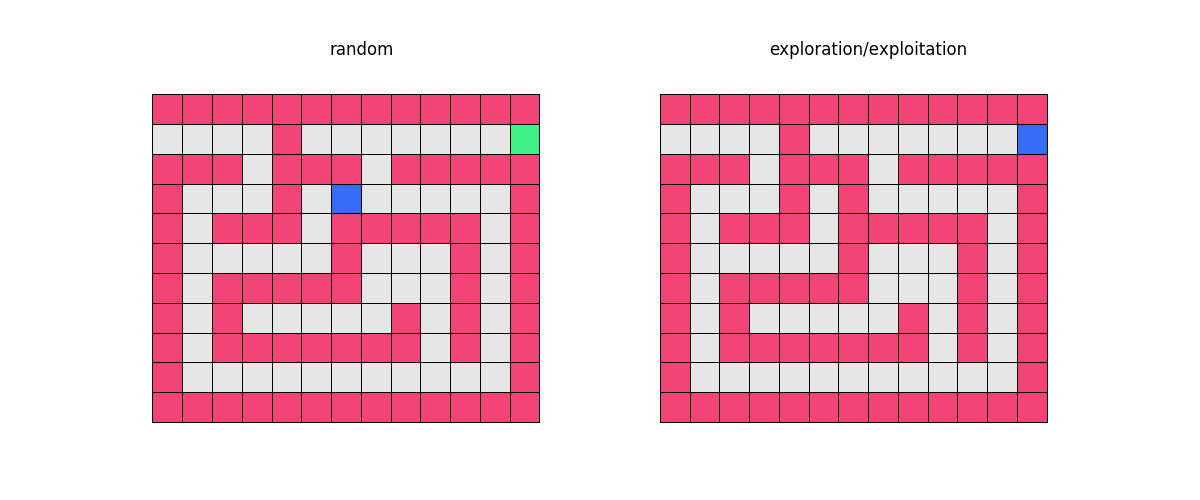
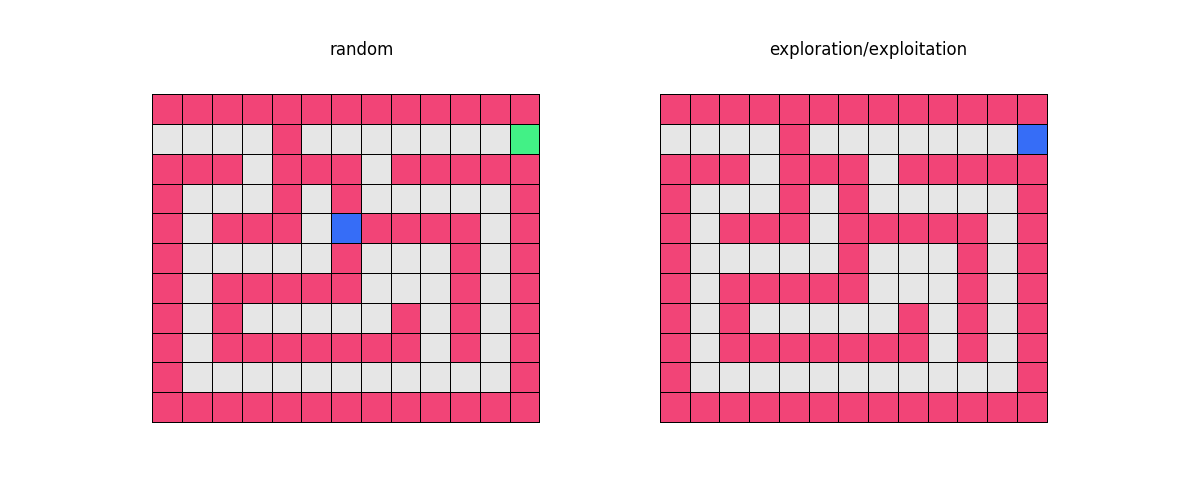
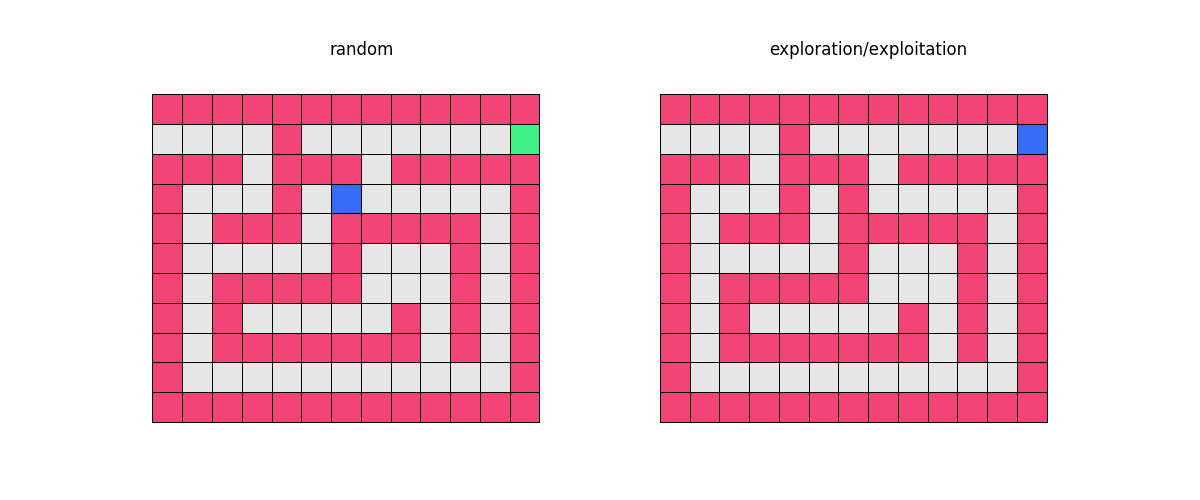
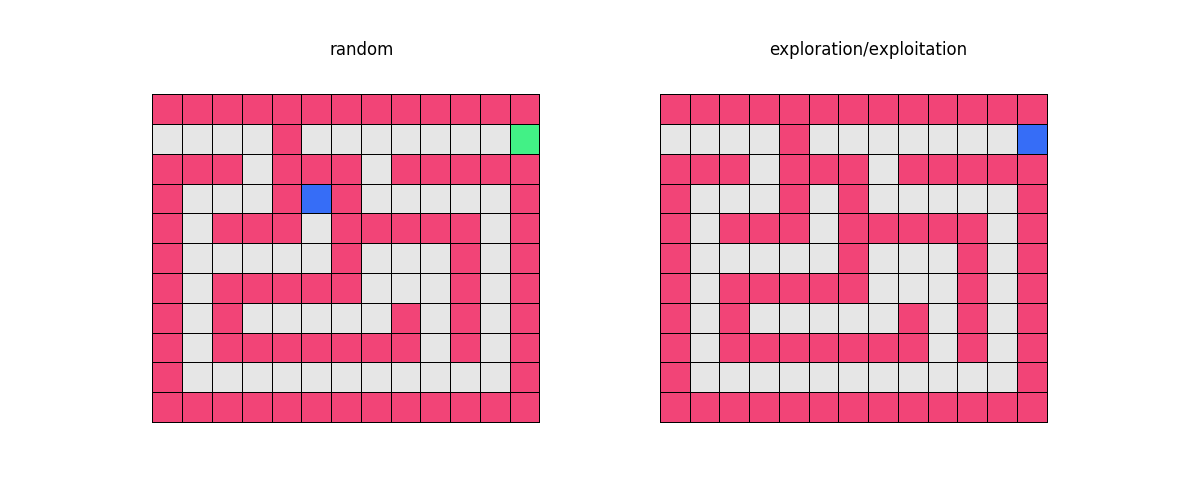
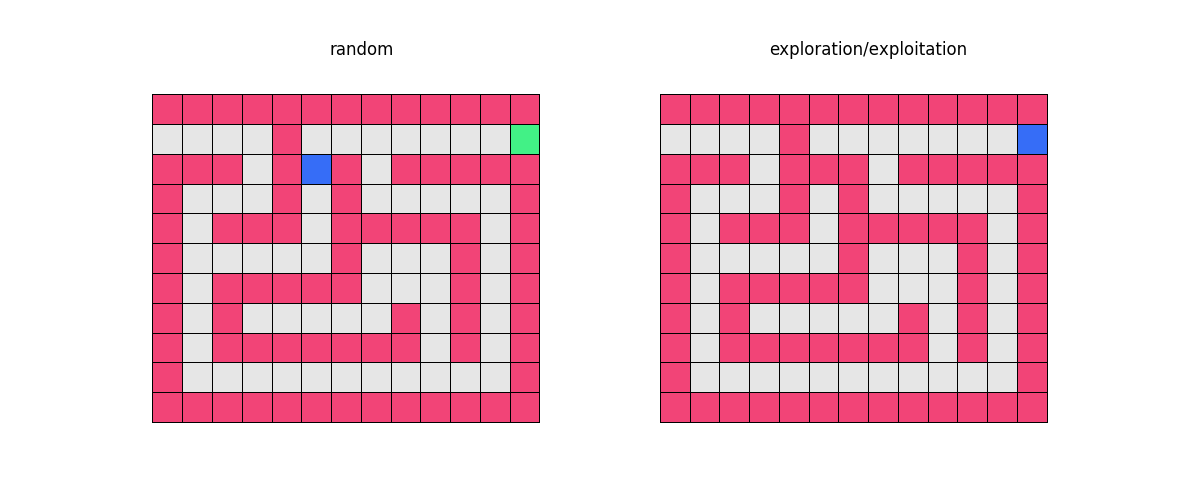
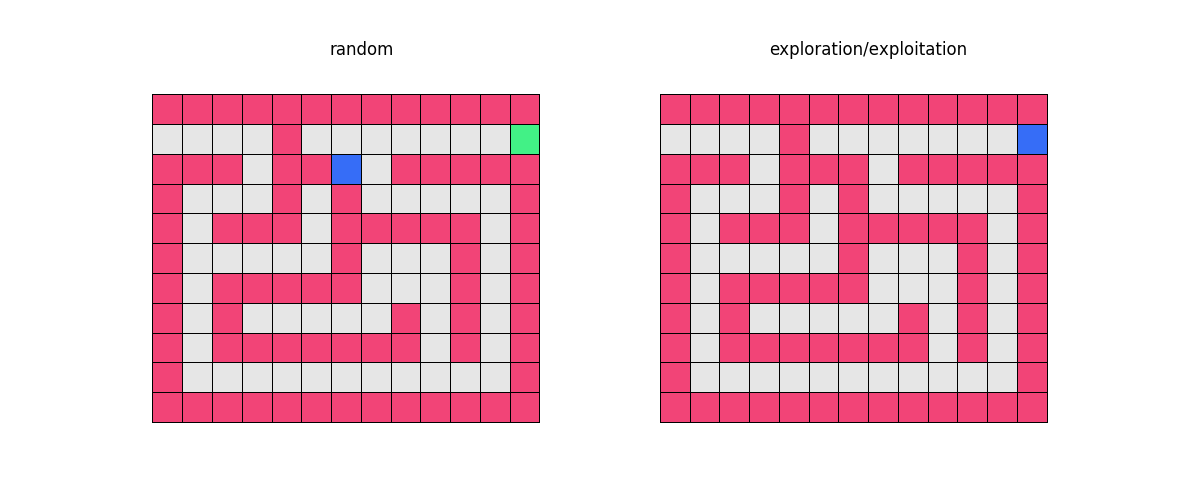
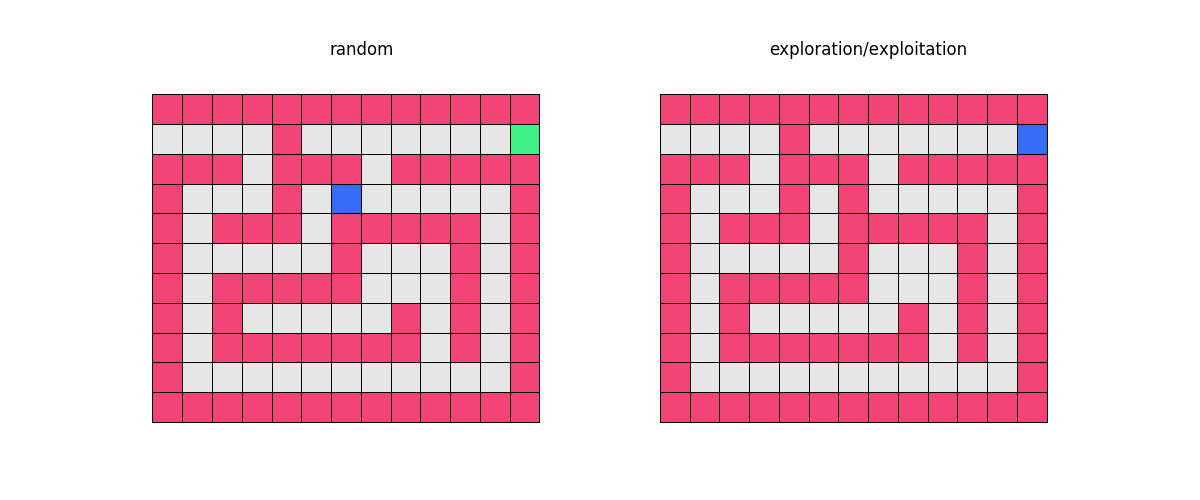
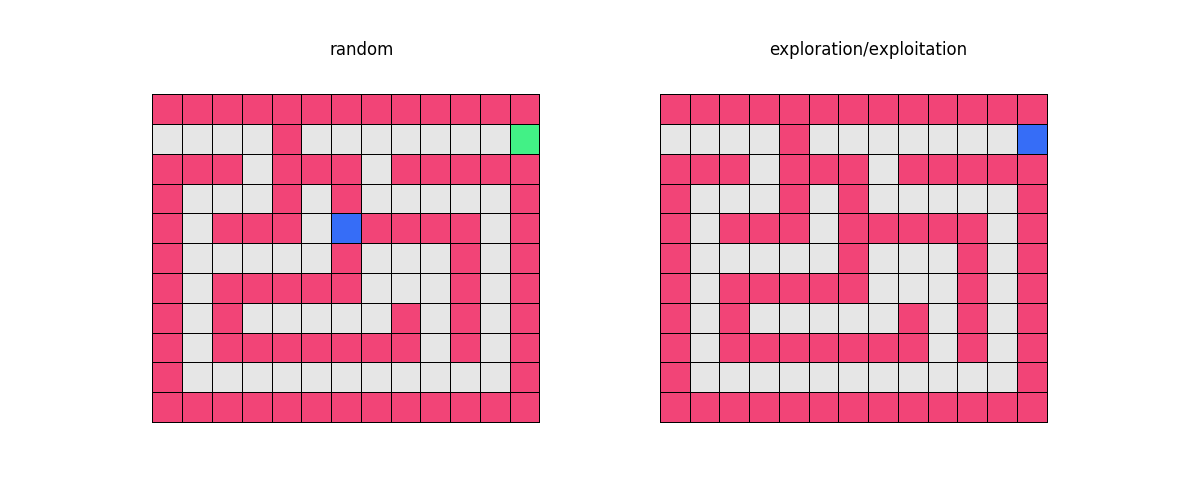
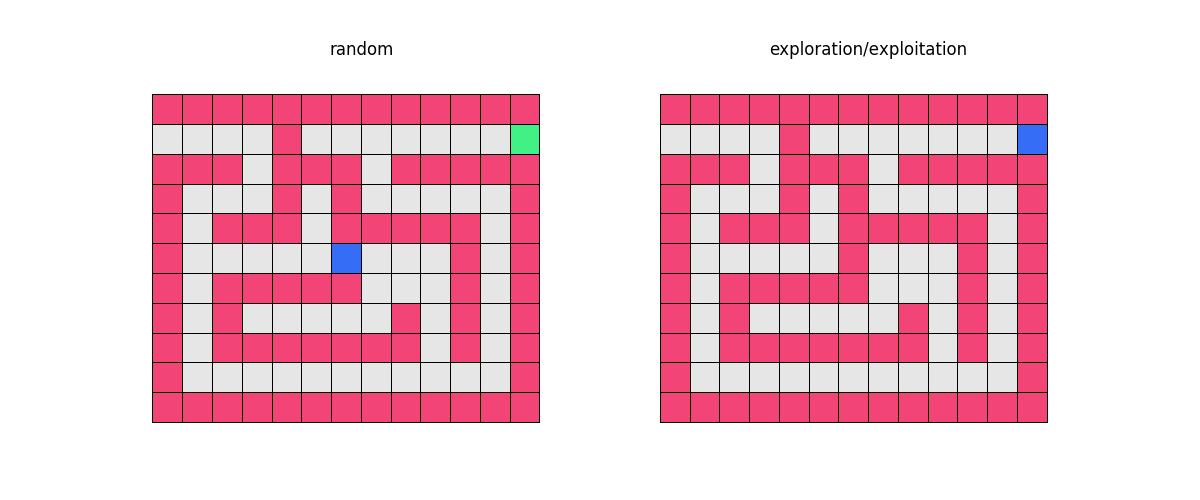
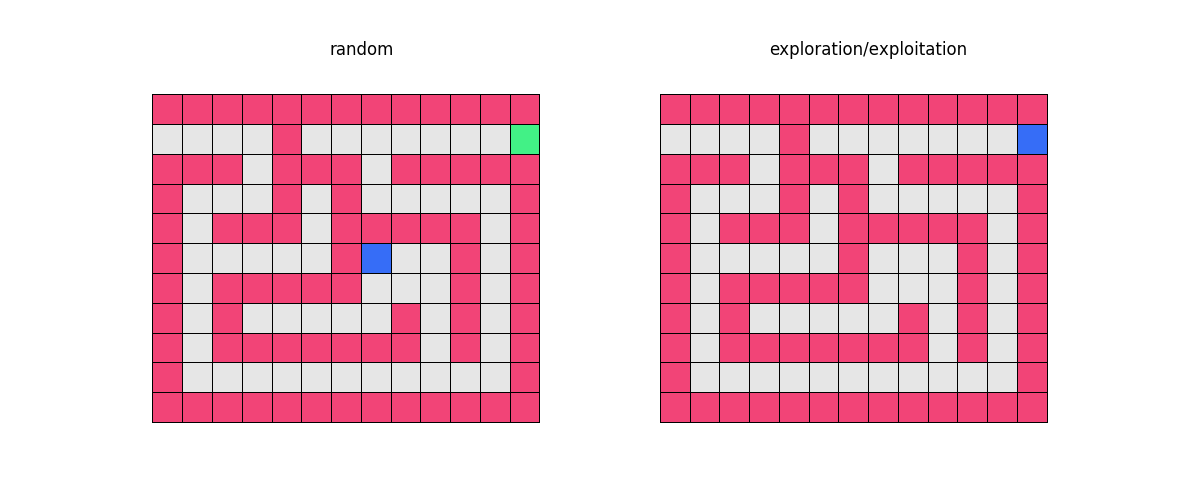
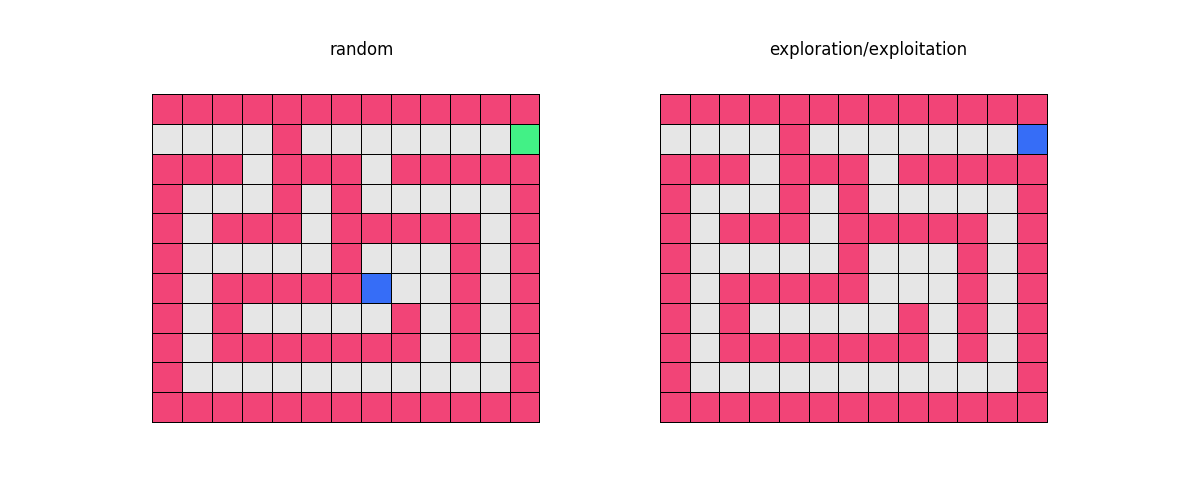
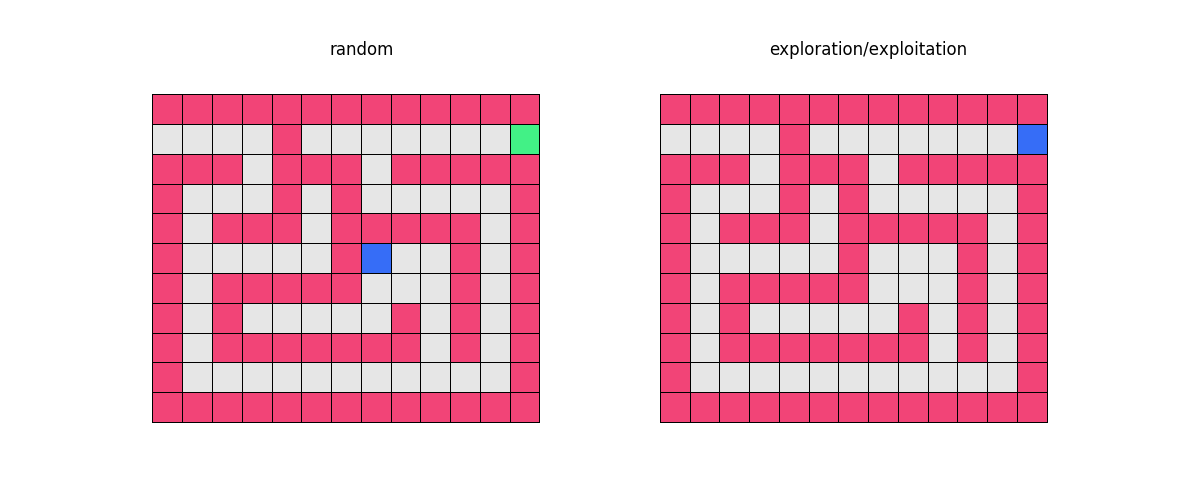
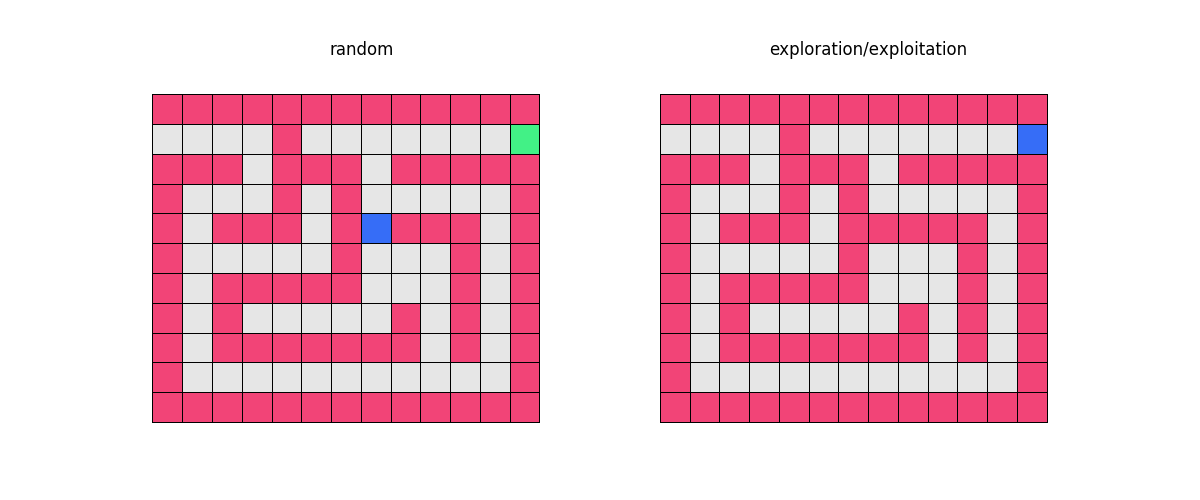
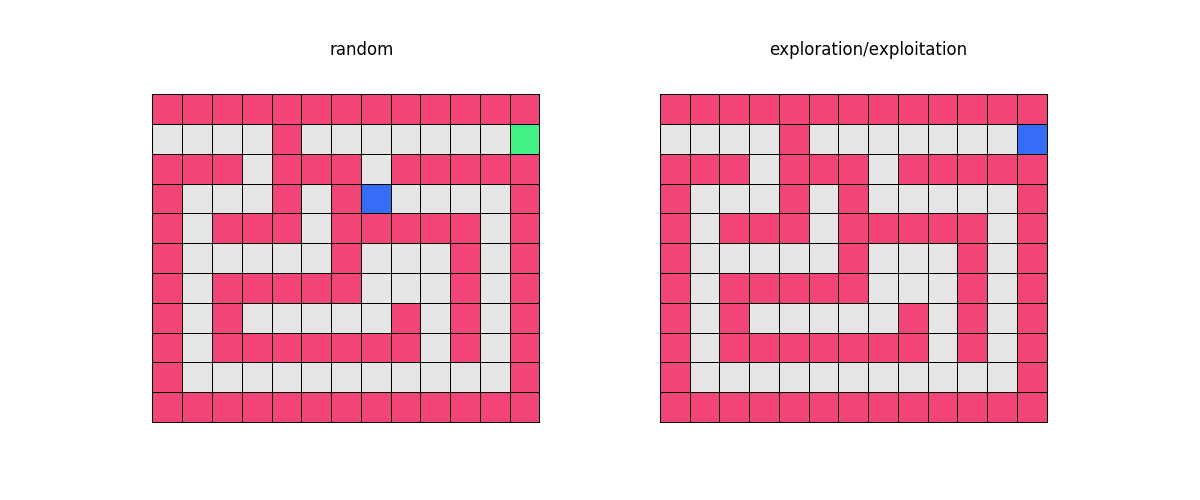
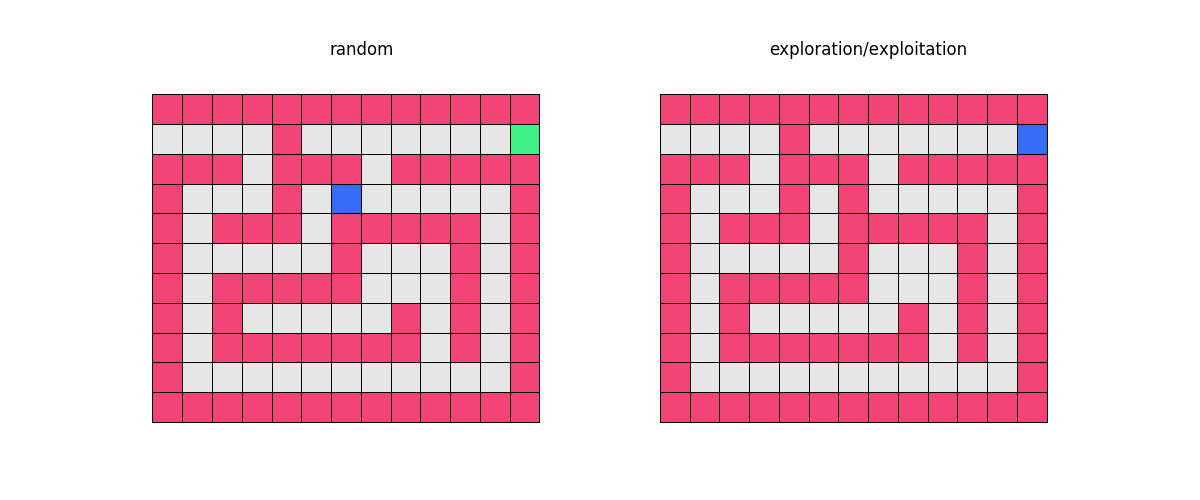
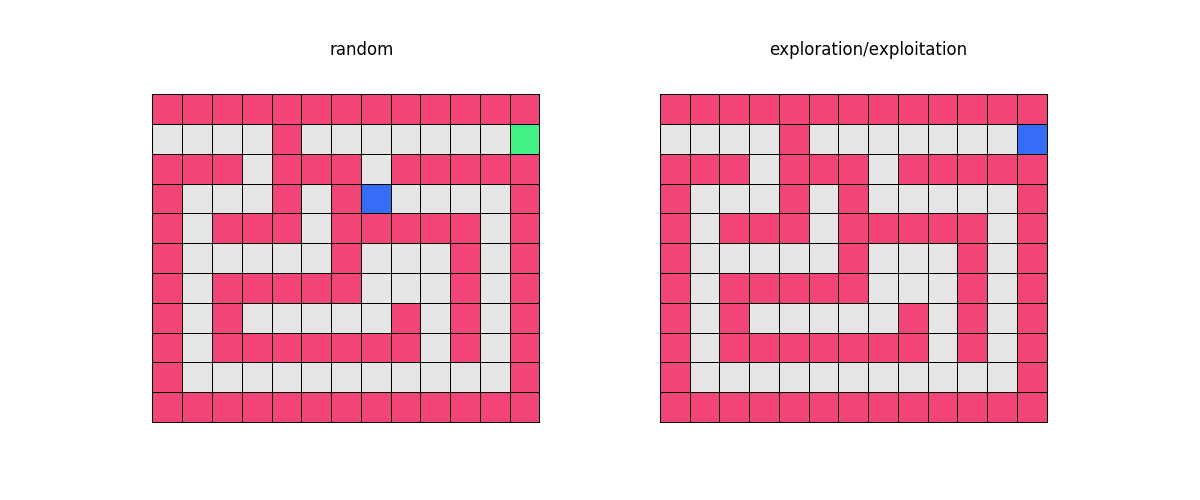
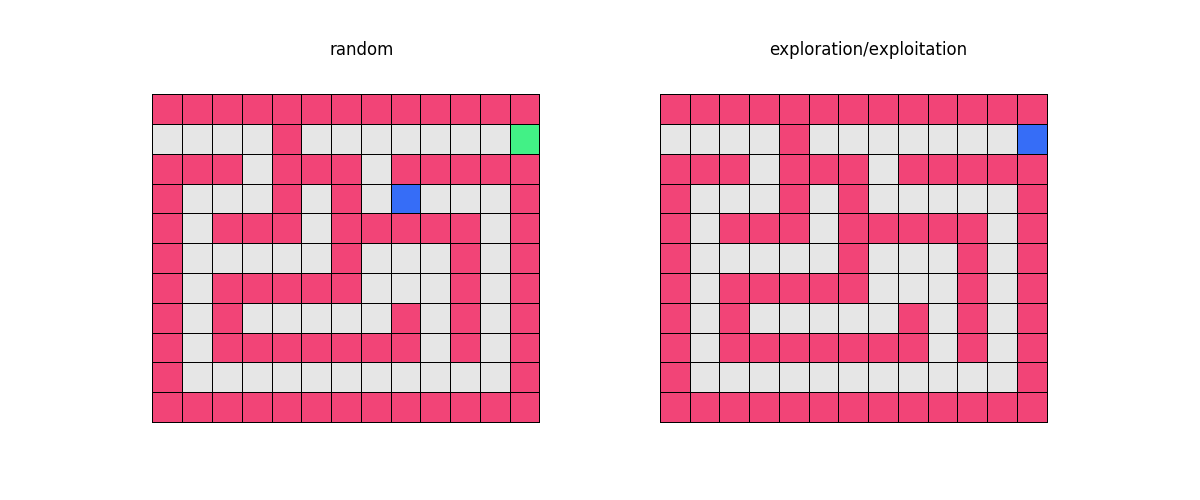
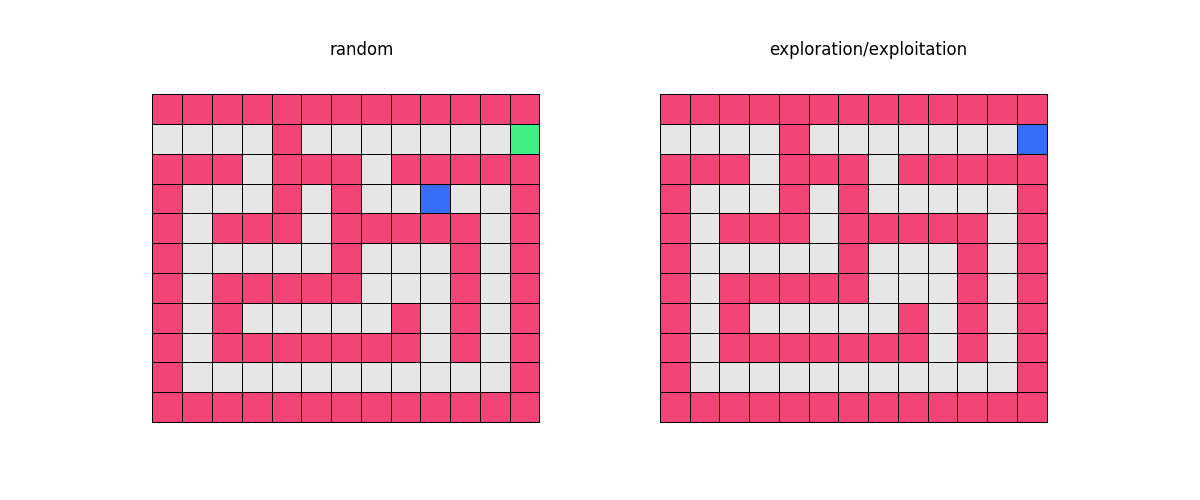
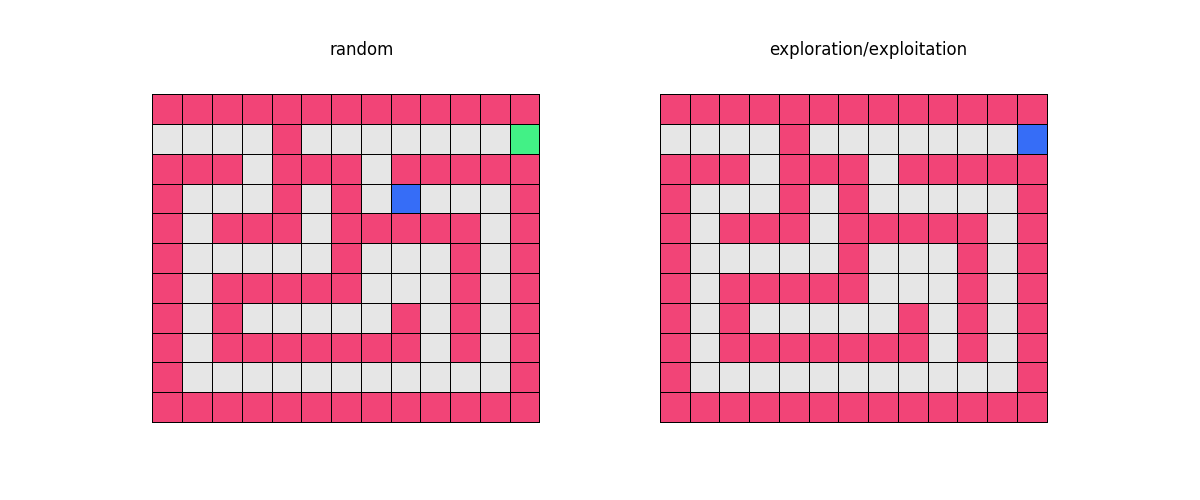
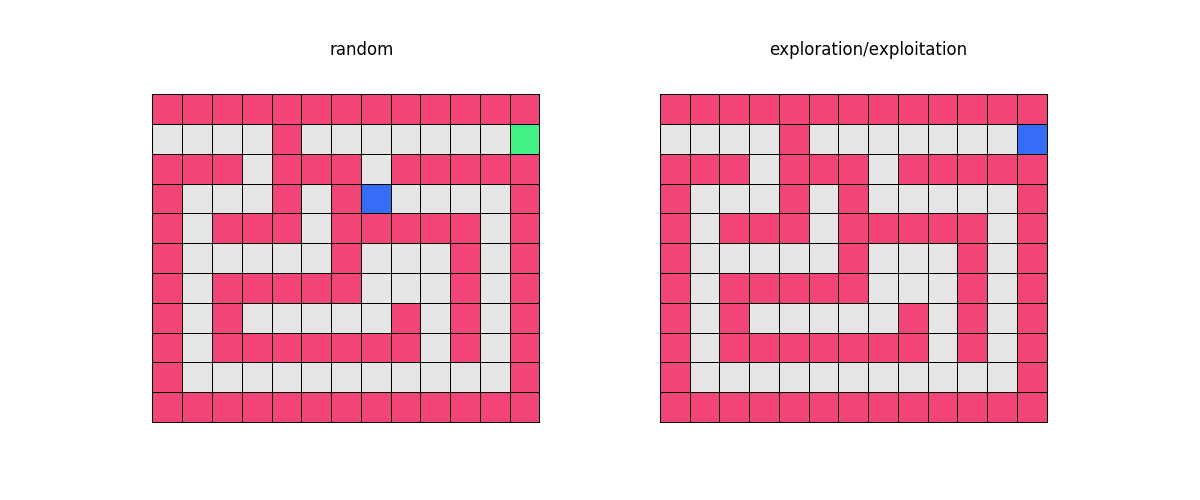
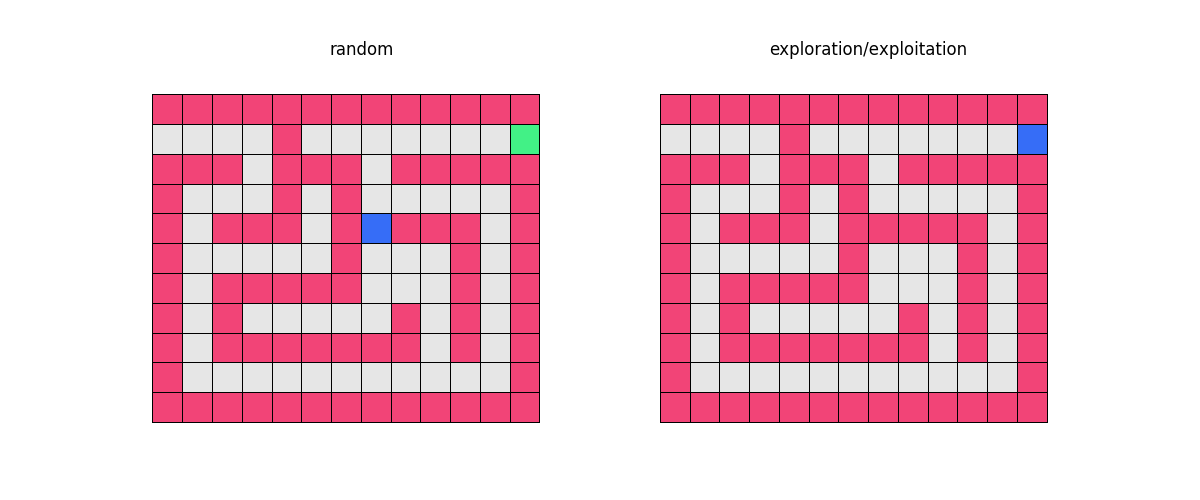
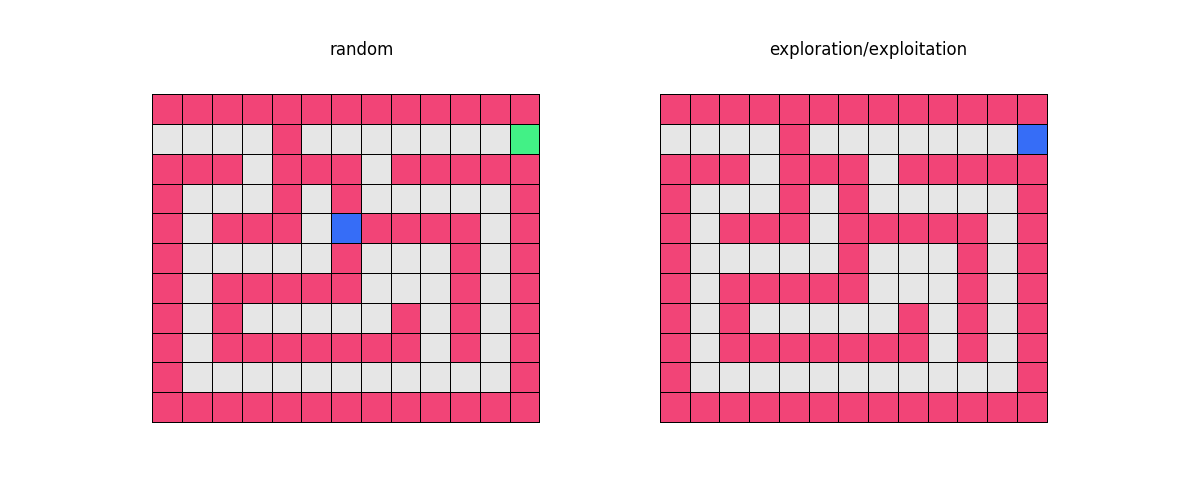
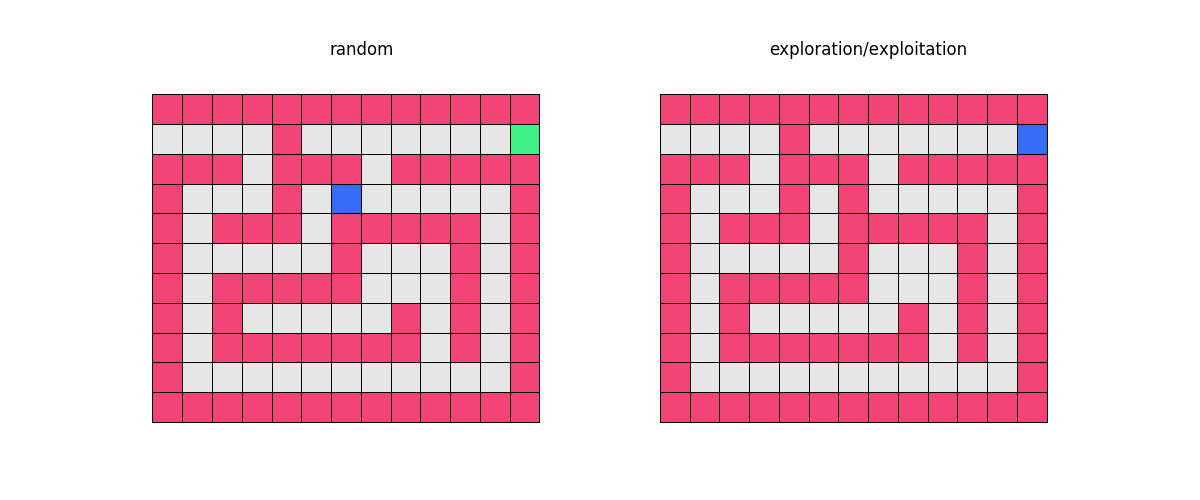
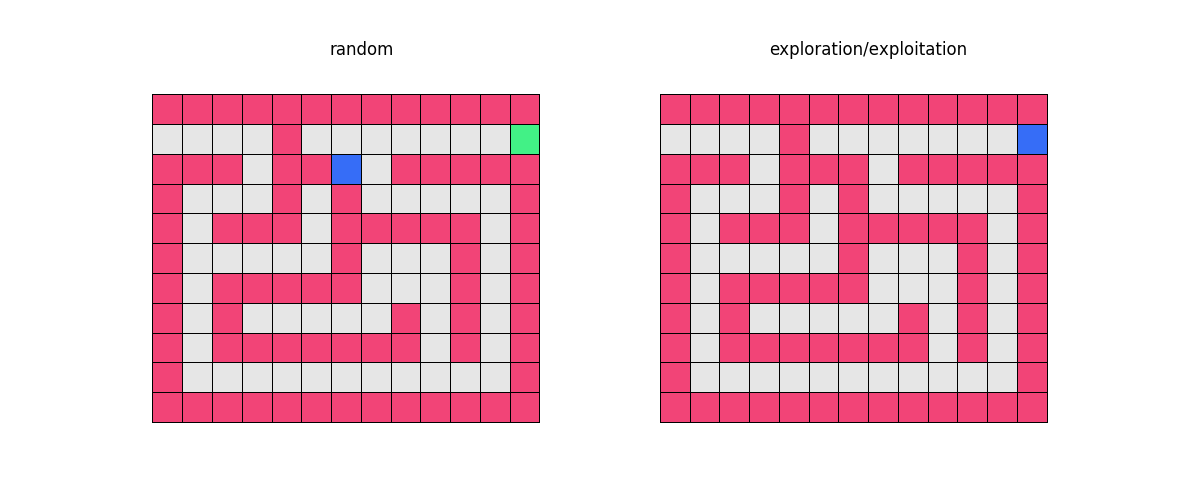
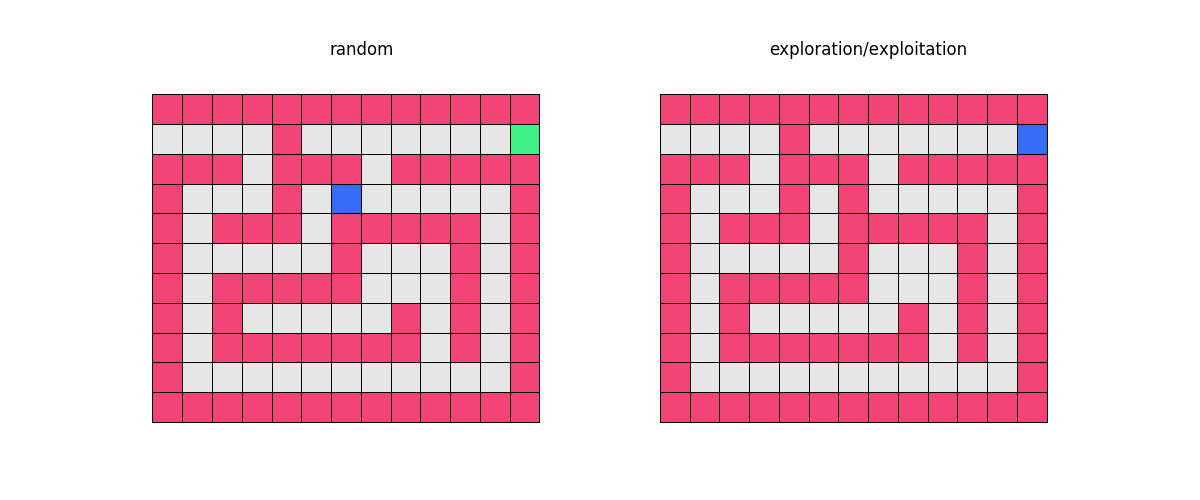
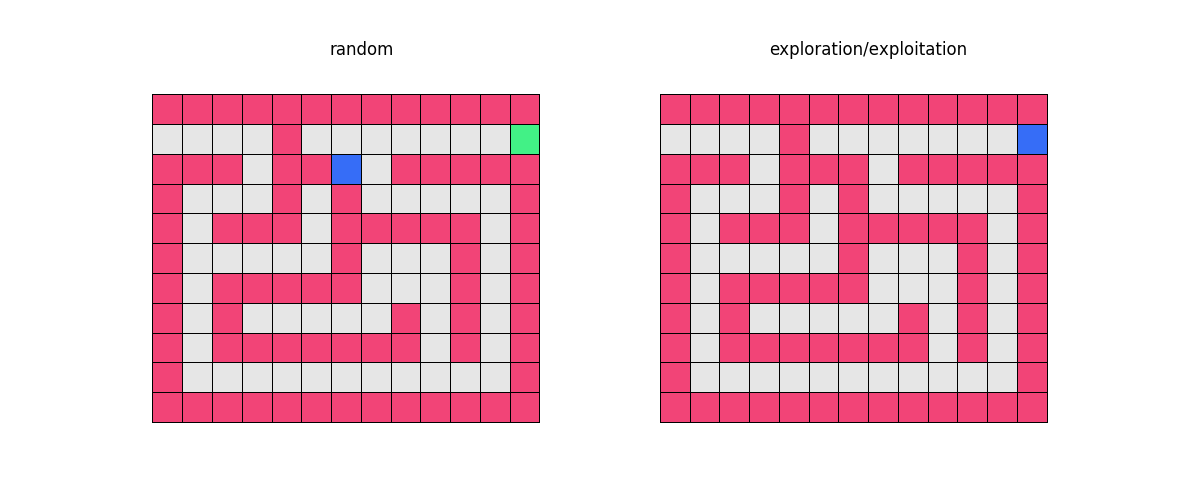
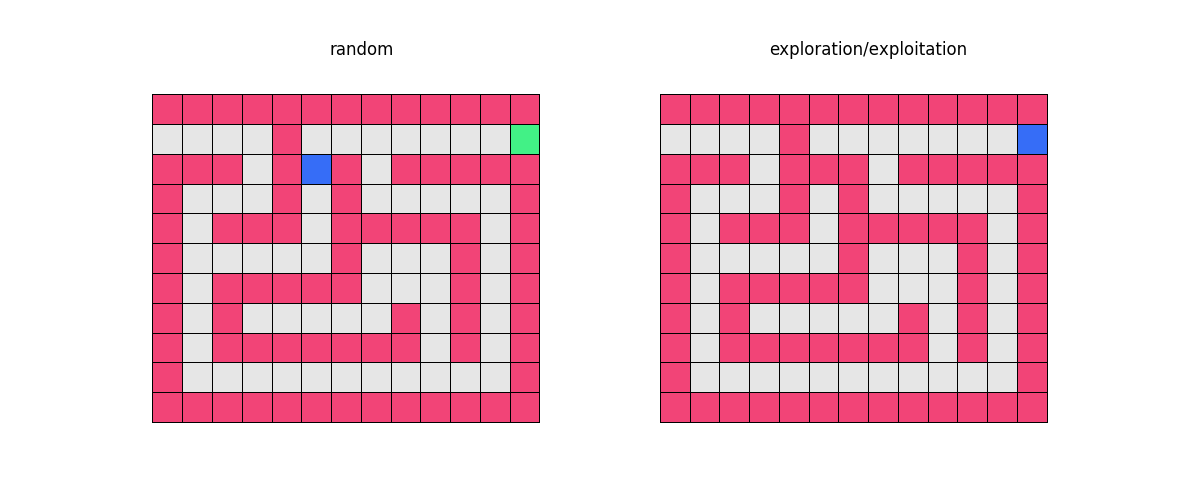
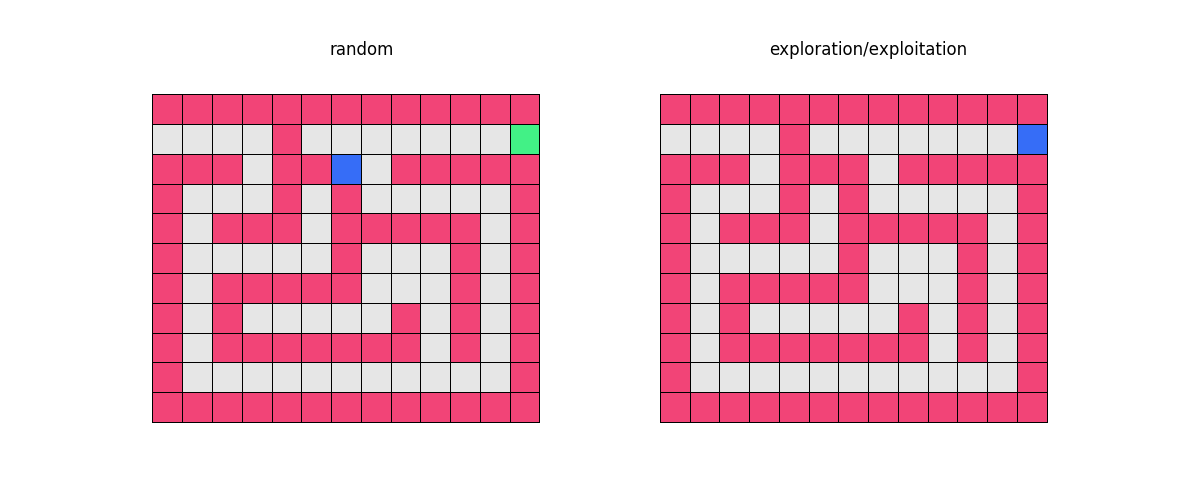
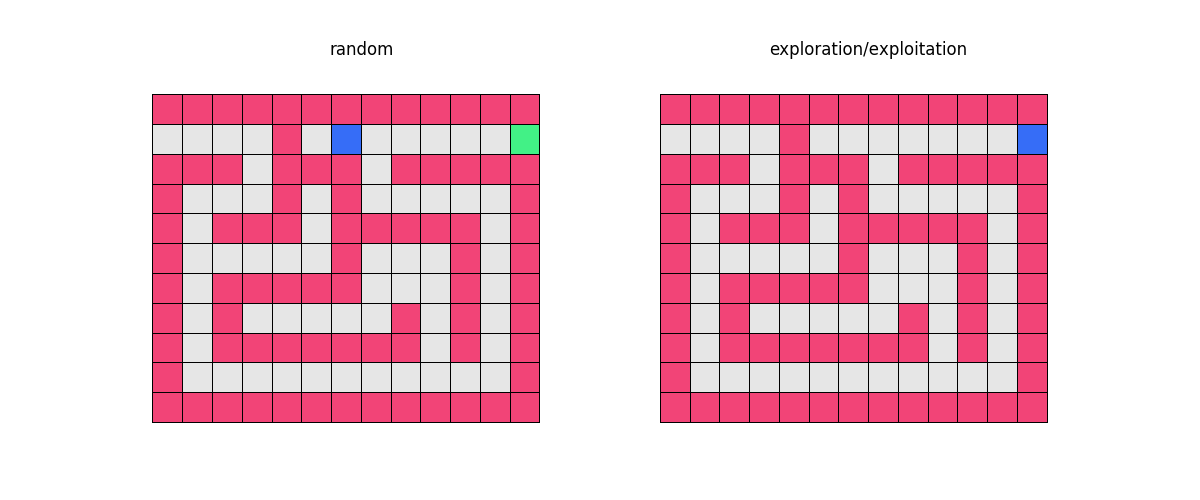
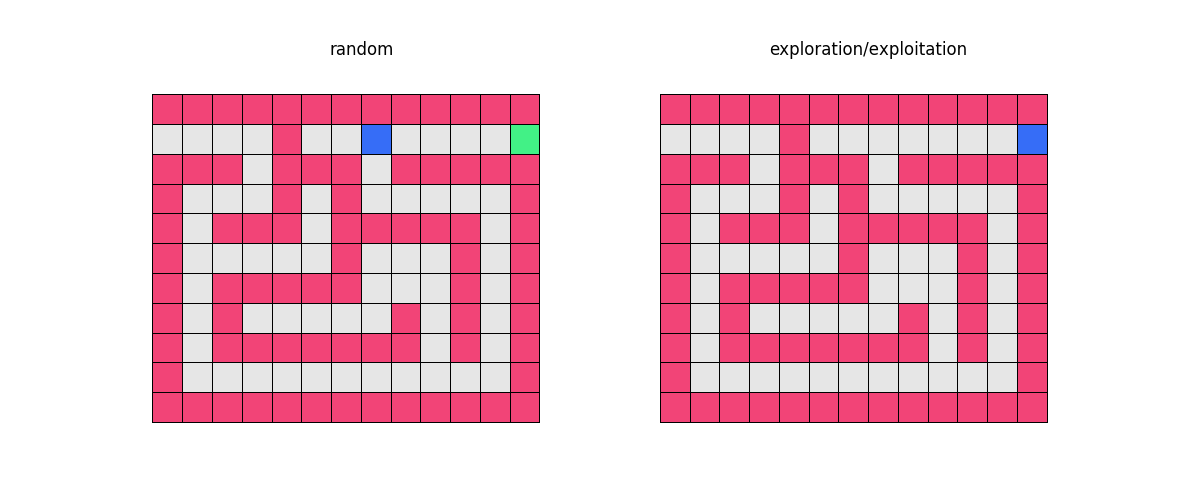
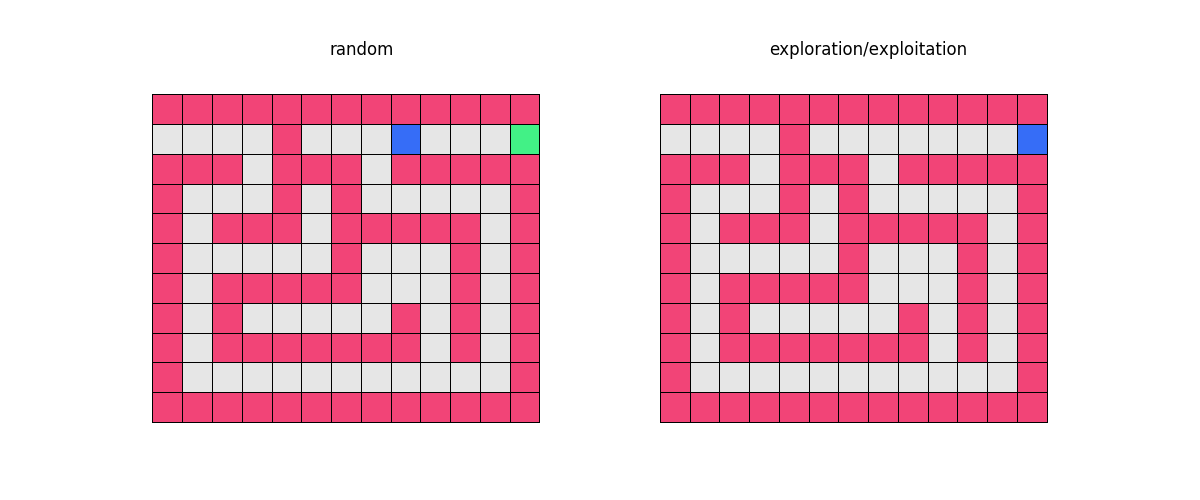
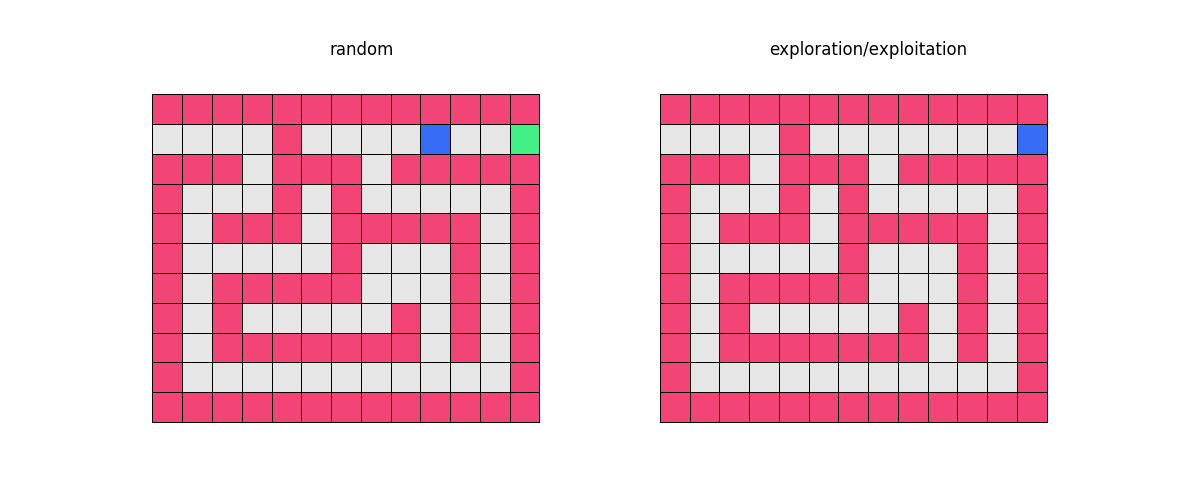
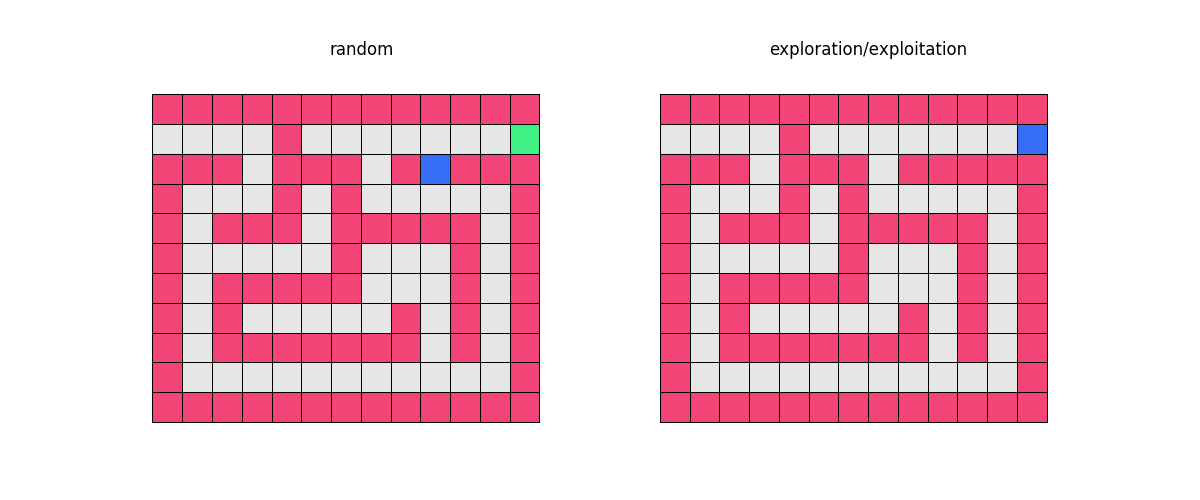
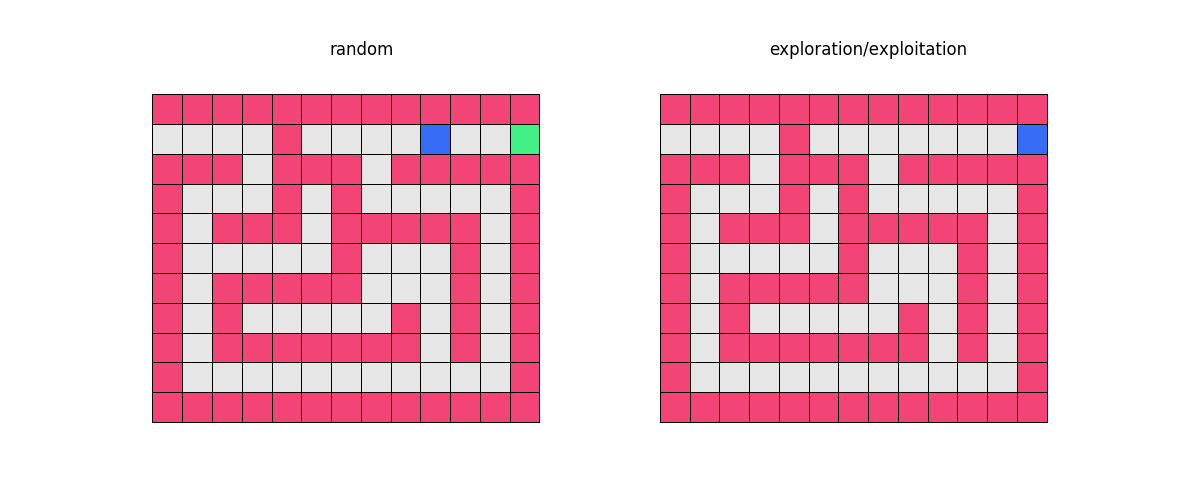
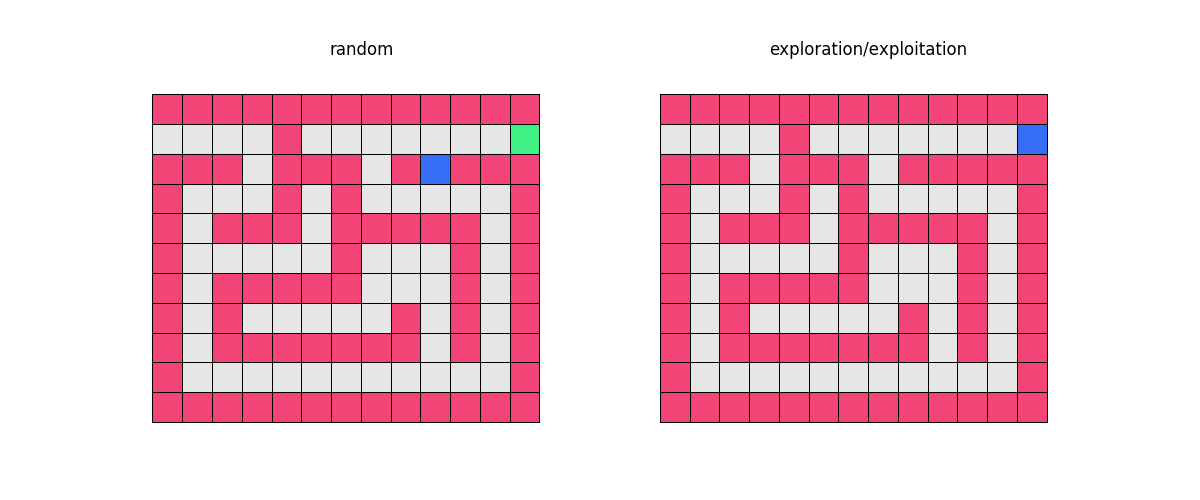
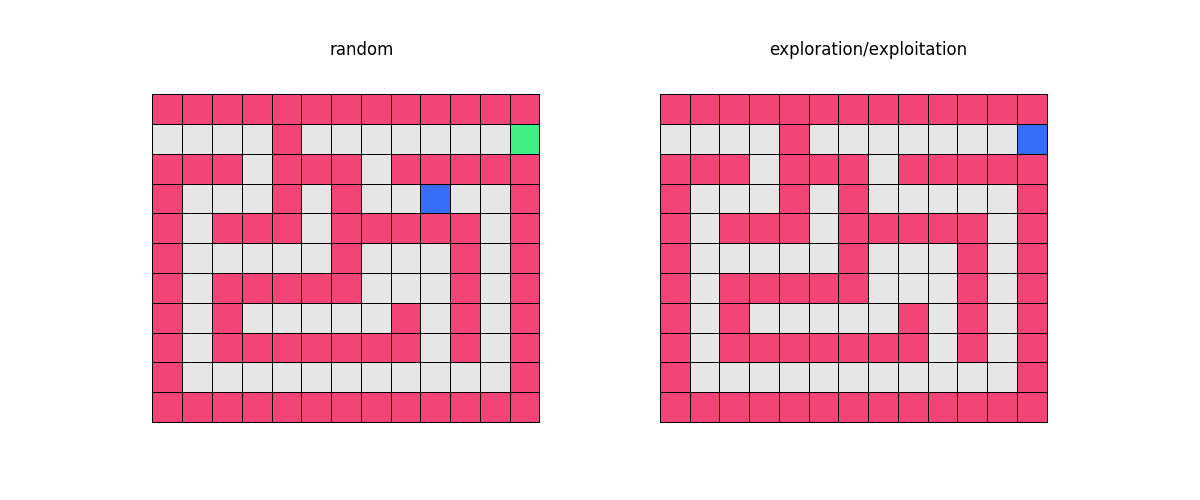
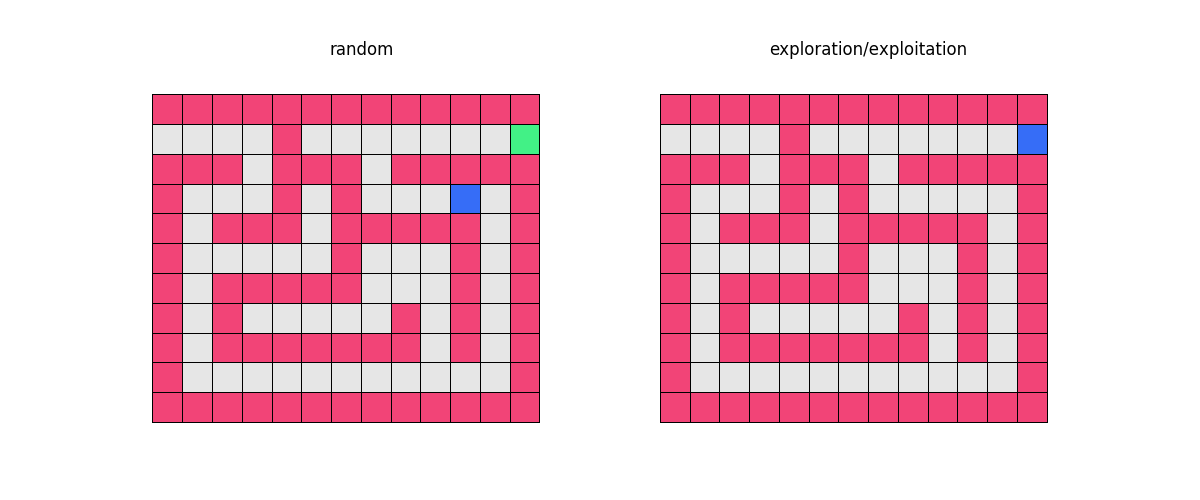
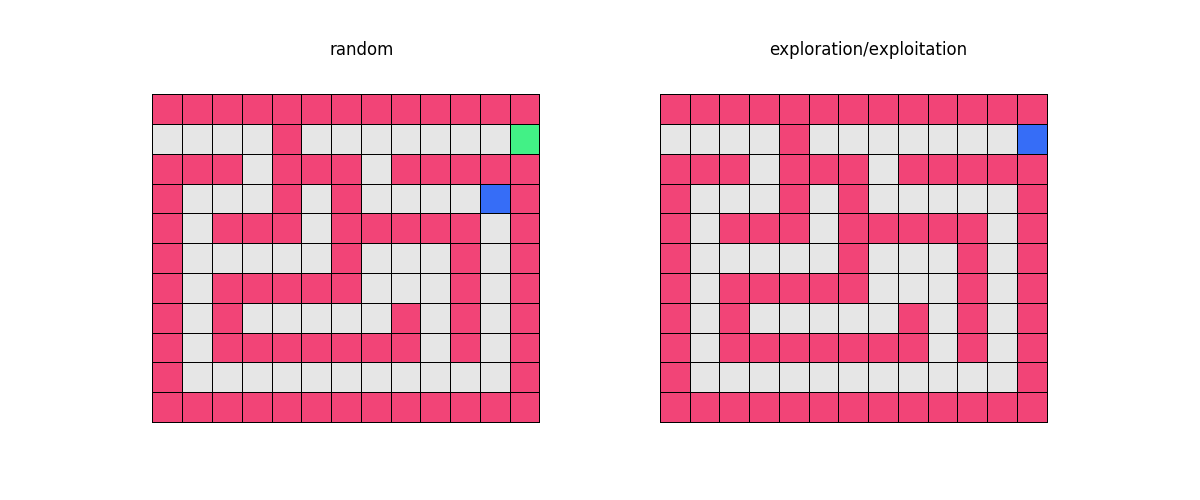
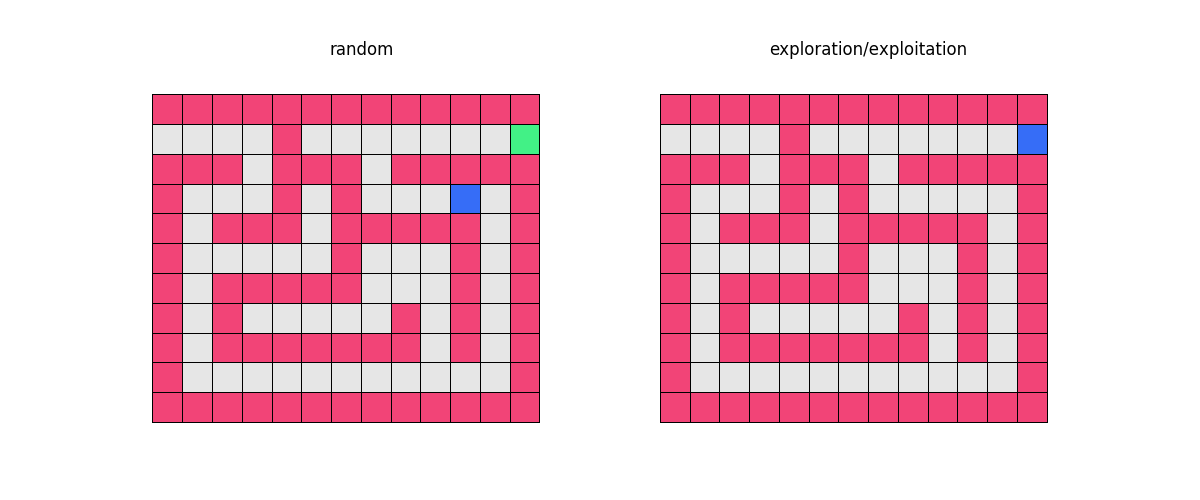
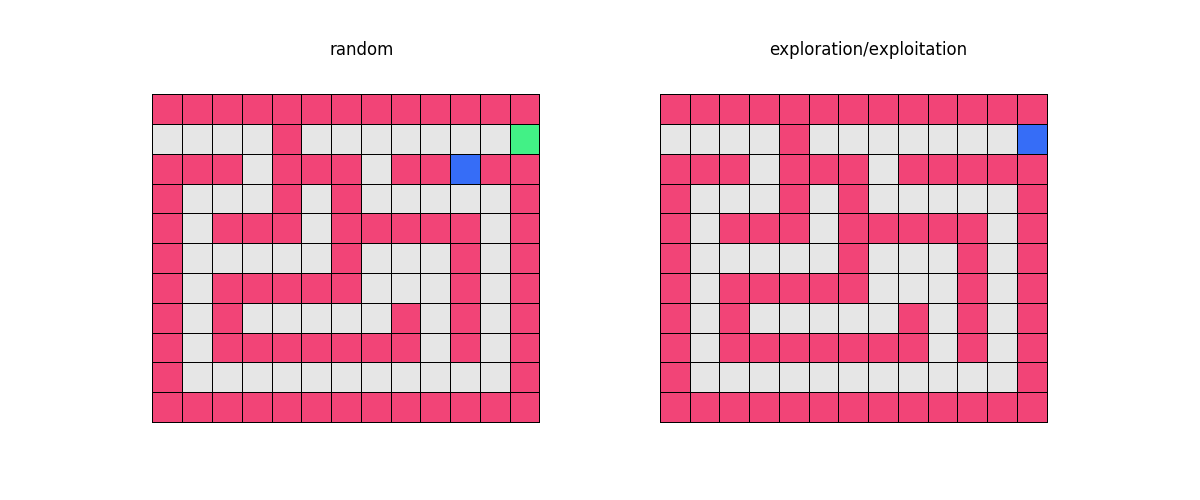
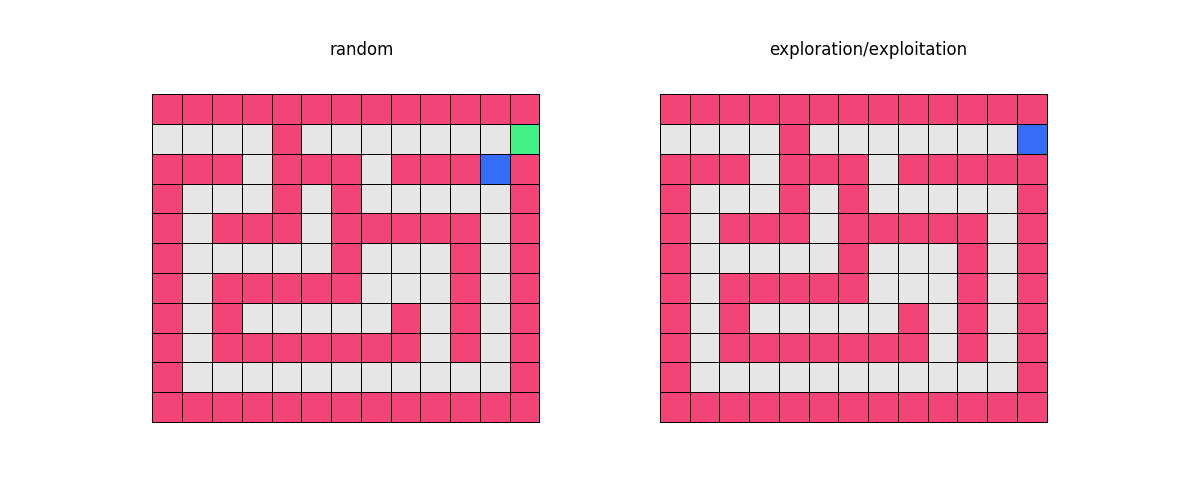
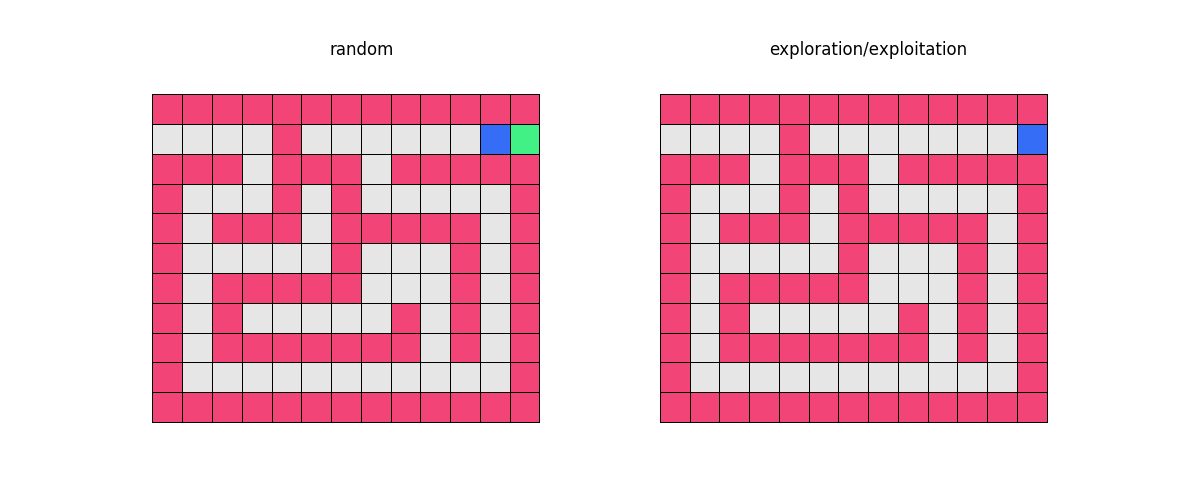
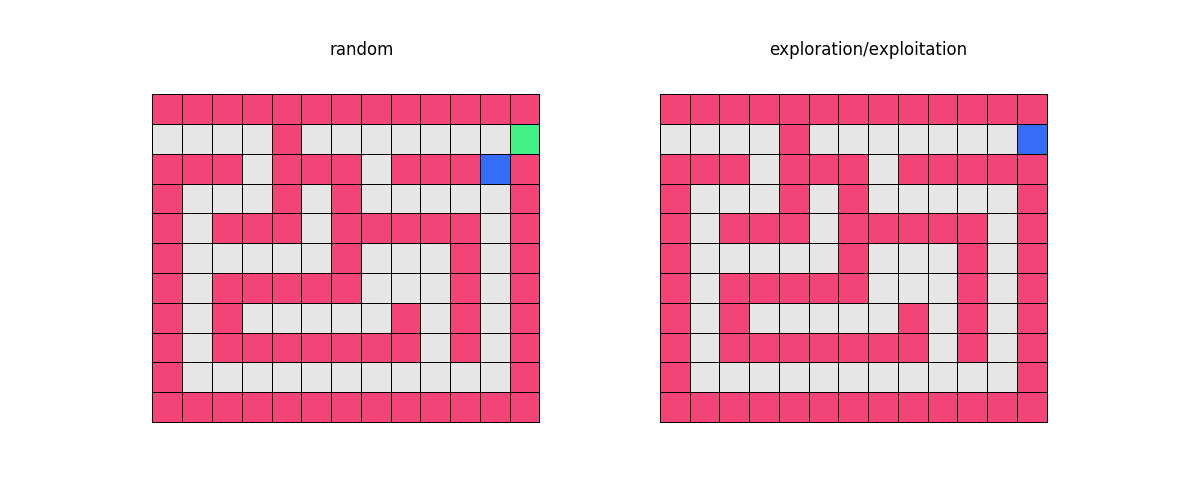
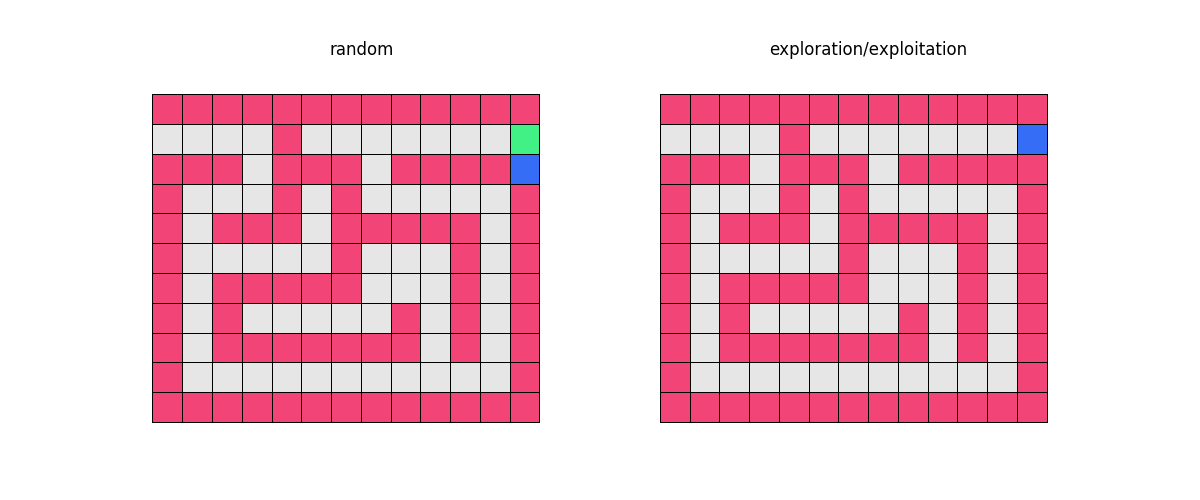
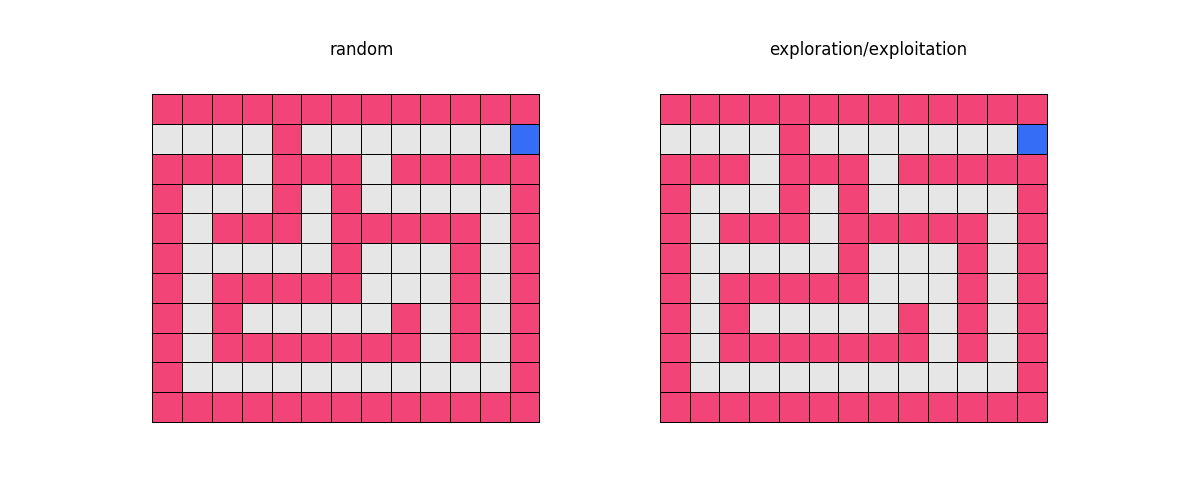

In [19]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

# run animator to compare action methods        
animator.animate_training_comparison(gridworld = small_maze,learner_1 = random_qlearner,learner_2 = exploit_qlearner, episode = 50)

## Example with small gridworld

- lets compare the two over a long set of training episodes

In [21]:
import time 

# activate this cell to see the Q learning algorithm used for gridworld above
from gridworld_lib import gridworld_qlearn

# compare random versus exploration/exploitation actions on training
training_rewards = []
methods = ['random','exploit']
for i in range(len(methods)):
    method = methods[i]
    
    # create instance of learner
    small_maze_qlearner = gridworld_qlearn.learner(gridworld = small_maze,action_method = method)
    
    # run q-learning
    start = time.clock()
    small_maze_qlearner.train(verbose = False)
    end = time.clock()
    value = (end - start)
    print 'method ' + str(method) + ' completed training in ' + str(value) + ' seconds'
    
    # record rewards and history
    training_rewards.append(small_maze_qlearner.training_reward)

q-learning algorithm complete
method random completed training in 5.840044 seconds
q-learning algorithm complete
method exploit completed training in 1.116128 seconds


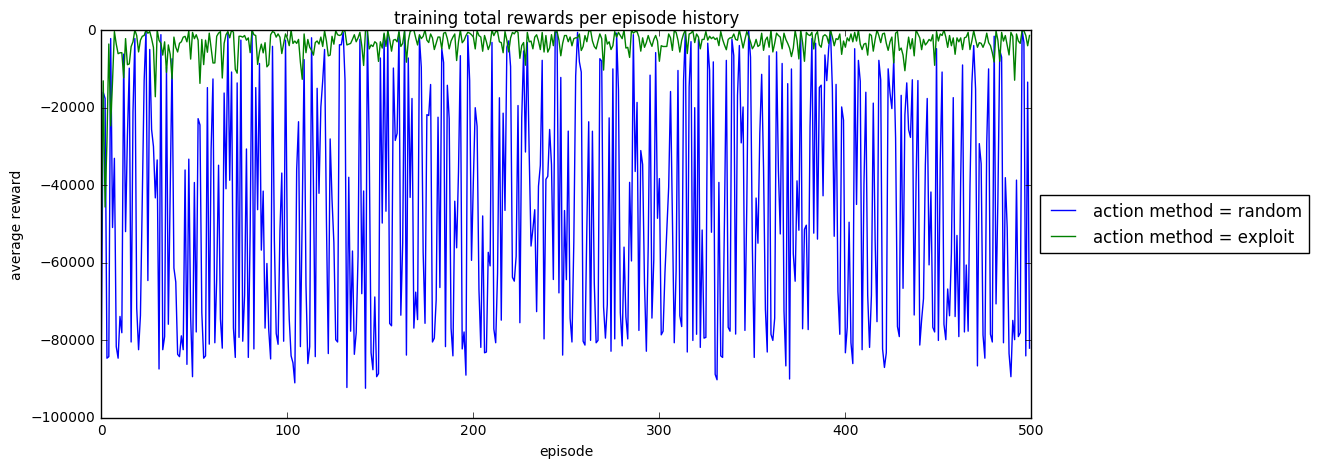

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,1,1)

for i in range(len(methods)):
    ax.plot(training_rewards[i])
ax.set_xlabel('episode')
ax.set_ylabel('average reward')
ax.set_title('training total rewards per episode history')
ax.legend(['action method = ' + str(methods[0]),'action method = ' + str(methods[1])],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Simple yet powerful enhancements to Q-Learning

## Short-term / long-term trade-off parameter

- *short-term / long-term trade-off parameter* allows trade-off between immediate and long-term reward

$$Q\left(s_{k-1},\,a_{k}\right)=r_{k}+\gamma\cdot\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{k},\,\alpha_{i}\right)$$

- $\gamma\in [0,1]$

- setting $\gamma$ to a smaller value we more heavily weight the contribution of the short-term reward $r_k$.  In this case our agent learns to take a more *greedy* approach to accomplishing our goal, at each state taking the next step that essentially maximizes the short-term reward only.


- setting $\gamma$ closer to $1$ then we have our original cost function, where we take into account equal contributions of both short-term and long-term rewards.

## Q-Learning + enhancements

---------
### Q -Learning with enhancements pseudo-code
Initialize $Q$, exploration/exploitation threshold $p\in[0,1]$, and short-term/long-term tradeoff $\gamma\in[0,1]$ 

**for** e = 1...E (the maximum number of episodes)
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Select a random initial state $s_0$ and set $k=1$
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **while** end state not reached AND maximum iteration count not met


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Choose random number $r\in[0,1]$ uniformly at random

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** $r < p$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Choose $a_k$ randomly
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**else** 


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Choose $a_k$ according to the optimal policy

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Recieve** the next state $s_k$ and corresponding immediate reward $r_k$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Update** $Q$ as 
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Q\left(s_{k-1},\,a_{k}\right)=r_{k}+\gamma\cdot\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{k},\,\alpha_{i}\right)$
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \longleftarrow k+1$

-----


# Dealing with large state spaces

## Dealing with large state spaces

- With the chess example: the number of possible configurations of chess pieces on the board is enormous - i.e., the number of states or size of state space - is on the order of $10^{120}$.  That is far larger than the number of atoms in the known universe!

- With the cart-pole example: each of the four descriptors of the environment is continuous (or finely discretized in practice) - thus the number of states is - technically speaking - infinite.  

- With the Pac-man example: if we use raw pixels as input then one state is a single frame of the game, and we have as many states as there are ways to legally arrange pixels in the game.  This is an extremely large number.  

With such RL problems the **huge number of states** makes directly computing and storing the $Q$ function/matrix impossible.

## The problem

- denote all states as $S=\left\{ \sigma_{1},\sigma_{2},...,\sigma_{N}\right\} $, and all actions $ A=\left\{ \alpha_{1},\alpha_{2},...,\alpha_{M}\right\} $, then $Q$ a matrix

$$Q=\left[\begin{array}{cccc}
Q\left(\sigma_{1},\alpha_{1}\right) & Q\left(\sigma_{1},\alpha_{2}\right) & \cdots & Q\left(\sigma_{1},\alpha_{M}\right)\\
Q\left(\sigma_{2},\alpha_{1}\right) & \ddots &  & Q\left(\sigma_{2},\alpha_{M}\right)\\
\vdots &  & \ddots & \vdots\\
Q\left(\sigma_{N},\alpha_{1}\right) &  &  & Q\left(\sigma_{N},\alpha_{M}\right)
\end{array}\right]$$

- the height (value of $N$) is the problem here

## What can we do?

- instead of storing entire column, pick flexible parameterized function and compactly represent (e.g., line, polynomial, neural network, trees)

- $h_1(s)$ for first column, $h_2(s)$ for second, etc.,...,$h_M(s)$ for final column

## Example: cart-pole

In [1]:
from my_cartpole import my_cartpole
cartpole_test = my_cartpole()
cartpole_test.qlearn(gamma=0.8,num_episodes = 100)

[2017-04-06 18:16:47,683] Making new env: CartPole-v0


q-learning process complete, best number of average steps in test runs = 199.0


In [2]:
# run a few test runs of cart-pole using the trained function approximators
cartpole_test.animate_test_run()
cartpole_test.animate_test_run()

lasted 199 timesteps
lasted 199 timesteps


## How does this adjust Q-Learning algorithm?

- Thats where we pick up next time!

<a id='bib_cell'></a>

## Notes and bibliography

[0] Harmon, Mance E., and Stephanie S. Harmon. Reinforcement Learning: A Tutorial. No. WL-TR-97-1028. WRIGHT LAB WRIGHT-PATTERSON AFB OH, 1997

[1]  There are many algorithms specifically designed to solve just this task - the most popular being [Dijkstra’s and A\* algorithms](http://www.redblobgames.com/pathfinding/a-star/introduction.html).  However the more flexible RL framework too provides great results.

[2] Lai, Matthew. "Giraffe: Using deep reinforcement learning to play chess." arXiv preprint arXiv:1509.01549 (2015).
APA	

[3]  Mnih, Volodymyr, et al. "Playing atari with deep reinforcement learning." arXiv preprint arXiv:1312.5602 (2013).
    
[4]  Image taken from http://ai.berkeley.edu/project_overview.html

[5] Watkins, Christopher JCH, and Peter Dayan. "Q-learning." Machine learning 8.3-4 (1992): 279-292.

[6]  Image taken from https://gym.openai.com/